In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(5,10):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 2000
    MAX_EPISODE_LEN = 200

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.5
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_05_nB_dqn/'
    model_path = 'model_M_05_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    init_seqCnt = 40
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]
    
    if not os.path.exists(res_path):
        os.mkdir(res_path) 
    
    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['init_path'] = init_path
        info['init_seqCnt'] = init_seqCnt
        user_list.append(MecTermDQN(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

    sess.run(tf.global_variables_initializer())
    
    tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

    env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    tflearn.config.is_training(is_training=False, session=sess)
    #Create a saver object which will save all the variables
    saver = tf.train.Saver() 
    saver.save(sess, model_path)

    sess.close()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
---------5------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}]
Initialization OK!----> user 1
Initialization OK!----> user 2
Initialization OK!----> user 3
0:r:[-10.02998952 -12.8889893  -28.74369365],p:[1.00940394 1.65098324 2.1625    ],op:[0.88809606 0.30901676 0.        ],tr:[1.21294366 1.05158098 1.0915772 ],pr:[1.64222861 1.61941534 1.80640939],rev:[0.93  2.055 2.97 ],dbuf:[ 1.08497905  6.17797859 35.86238731],ch:[4.58912266 3.02005968 3.18343053],ibuf:

21:r:[-12.10839122 -12.83449536 -27.14150592],p:[1.30897191 1.49894976 2.1       ],op:[0.79352809 0.57855024 0.        ],tr:[1.401573   1.4715778  1.22453274],pr:[1.68889988 1.76573875 1.72967143],rev:[1.02  2.015 2.96 ],dbuf:[ 3.19178244  4.89399072 33.28301184],ch:[4.52255582 4.41023371 3.75626998],ibuf:[39.0, 29.0, 22.0],rbuf:[ 1.         15.47675211 23.15916519]
22:r:[-10.86043659 -13.68079948 -32.32345925],p:[1.22584125 1.65425284 1.93      ],op:[0.78165875 0.34074716 0.        ],tr:[1.16896281 1.32256486 1.19613788],pr:[1.68660512 1.62925217 1.62736868],rev:[1.035 1.97  2.87 ],dbuf:[ 1.64587317  7.41159897 45.3469185 ],ch:[3.72063636 3.86417916 3.57806659],ibuf:[20.0, 47.5, 33.5],rbuf:[ 0.          5.50984868 42.7986892 ]
23:r:[-11.27051318 -11.64209511 -36.05482428],p:[1.21565521 1.47770706 1.9925    ],op:[0.69184479 0.53979294 0.        ],tr:[1.14857355 1.26571697 1.0890414 ],pr:[1.5891366  1.58751247 1.67528217],rev:[1.055 1.99  2.985],dbuf:[ 3.46602636  3.10919023 52.18464856

44:r:[ -8.91514851 -13.73612716 -17.32575432],p:[1.00571703 1.49465976 1.93444258],op:[0.64928297 0.27284024 0.04555742],tr:[0.98490121 1.17364514 1.10246312],pr:[1.43522709 1.62898893 1.70425895],rev:[1.03  2.165 2.88 ],dbuf:[ 1.28029702  9.79725431 14.85150863],ch:[3.61696787 4.4080173  3.22904723],ibuf:[3.0, 42.5, 8.5],rbuf:[ 6.          2.05631398 33.90994452]
45:r:[ -9.60251086 -11.56774225 -13.66820572],p:[1.00371588 1.30492893 1.79333168],op:[0.77628412 0.41007107 0.10166832],tr:[1.17863623 1.1803906  1.3567825 ],pr:[1.5901609  1.66736976 1.72358563],rev:[0.97 1.86 2.96],dbuf:[1.40502172 5.98548451 8.38641145],ch:[4.58432398 4.97184779 4.37192993],ibuf:[21.0, 41.0, 5.5],rbuf:[ 1.          2.         12.17867205]
46:r:[-10.89146111 -10.78613713 -21.9492939 ],p:[1.13854775 1.33791877 1.85693267],op:[0.58895225 0.47458123 0.03306733],tr:[1.14425239 1.04653347 1.33324892],pr:[1.44833681 1.70094659 1.5934357 ],rev:[0.99  1.94  2.835],dbuf:[ 4.50792221  3.44727426 24.9985878 ],ch:[3.6

67:r:[ -8.48450212 -12.13240654 -30.06826255],p:[1.02035363 1.51267532 1.7370692 ],op:[0.51964637 0.22232468 0.0279308 ],tr:[0.76104368 0.89841123 1.02731539],pr:[1.34236104 1.59078865 1.67366993],rev:[1.015 1.92  3.18 ],dbuf:[ 1.56900425  6.91481309 42.4865251 ],ch:[3.0633051  3.23818625 3.7971987 ],ibuf:[9.0, 37.0, 2.5],rbuf:[  1.4801579    8.60665411 106.59160375]
68:r:[-10.12806055 -10.20410207 -20.43770922],p:[1.07604576 1.29586723 2.        ],op:[0.57645424 0.24663277 0.        ],tr:[1.08441541 1.05132073 1.18271481],pr:[1.43888712 1.46602577 1.69275431],rev:[1.005 2.07  2.935],dbuf:[ 3.73112109  4.98320414 20.87541845],ch:[4.18054492 4.21135835 3.84716016],ibuf:[48.5, 4.0, 36.5],rbuf:[ 3.          4.25802315 48.40617613]
69:r:[ -8.70094827 -10.53497443 -44.43979901],p:[0.99059532 1.30977479 1.8525    ],op:[0.51440468 0.39522521 0.        ],tr:[1.05243054 0.90064468 1.27289183],pr:[1.2685594  1.69402113 1.47748562],rev:[1.105 1.87  3.015],dbuf:[ 2.35189655  4.01994887 70.35459802

90:r:[ -8.62193905 -10.73651849 -26.95476126],p:[0.89671864 1.35844207 2.1489203 ],op:[0.70078136 0.21905793 0.0160797 ],tr:[1.08010415 0.8677842  1.35390215],pr:[1.44082816 1.61090564 1.77808272],rev:[0.945 1.92  2.96 ],dbuf:[ 1.2688781   5.69803697 32.25952253],ch:[4.68201566 3.32617962 3.53040787],ibuf:[11.5, 40.5, 46.0],rbuf:[ 0.          0.84399166 14.44626323]
91:r:[ -7.97754498  -9.277596   -20.26939066],p:[0.83264522 1.19601316 1.98      ],op:[0.56485478 0.26398684 0.        ],tr:[0.96467314 0.86846573 1.50711114],pr:[1.45250983 1.59429743 1.73503635],rev:[1.05  1.925 3.115],dbuf:[ 1.98008996  3.955192   20.73878131],ch:[4.50070526 3.87731026 4.7640183 ],ibuf:[23.0, 10.0, 32.5],rbuf:[5.         5.4801579  7.07050268]
92:r:[ -7.81020755  -9.48434582 -22.76198896],p:[0.87559713 1.25134845 2.145     ],op:[0.54190287 0.29865155 0.        ],tr:[0.98853239 1.0415121  1.3509732 ],pr:[1.24449314 1.55946788 1.77969022],rev:[1.025 1.955 2.915],dbuf:[ 1.44541511  3.46869164 24.07397793],c

113:r:[ -9.0633024   -9.94529295 -17.20036679],p:[0.99421466 1.23877608 1.74096864],op:[0.48328534 0.14872392 0.01153136],tr:[1.14277077 0.67089394 1.15660989],pr:[1.27766837 1.50905337 1.78041979],rev:[1.015 1.97  2.8  ],dbuf:[ 3.35160481  6.0155859  16.87573358],ch:[5.30957971 2.85982195 4.31927426],ibuf:[44.0, 8.0, 29.0],rbuf:[1.26718993 5.44936451 6.80970839]
114:r:[ -7.57614568  -9.52937531 -16.72017546],p:[0.81651723 1.20637716 1.83274542],op:[0.57098277 0.20112284 0.02725458],tr:[0.80237734 0.74970117 1.15541525],pr:[1.3430084  1.59232345 1.72402366],rev:[0.985 1.835 2.915],dbuf:[ 1.27729135  4.98375062 14.84035092],ch:[4.13905603 3.80660479 3.70863178],ibuf:[1.0, 24.5, 0.0],rbuf:[ 1.12440224  4.37704836 17.40901043]
115:r:[ -7.96966426 -10.47973767 -45.68738344],p:[0.84074978 1.33019689 1.82      ],op:[0.45925022 0.27230311 0.        ],tr:[0.9127496  1.03020116 1.1425599 ],pr:[1.19861442 1.58871737 1.61130382],rev:[0.86  2.075 3.09 ],dbuf:[ 2.93932852  4.93447535 73.17476687],c

136:r:[ -6.99597117  -9.34003571 -18.26469965],p:[0.8162067  1.21879432 1.9786283 ],op:[0.3787933  0.28120568 0.0138717 ],tr:[0.68601139 1.01391641 1.23343869],pr:[1.23306479 1.52006963 1.80060476],rev:[0.985 2.05  2.925],dbuf:[ 2.04194233  3.68007142 16.6043993 ],ch:[3.72523343 4.01281009 3.28609588],ibuf:[24.0, 0.0, 27.5],rbuf:[1.        5.        8.3529541]
137:r:[ -7.80094581  -9.76970325 -39.4839788 ],p:[0.86021981 1.24074946 1.9225    ],op:[0.39728019 0.26175054 0.        ],tr:[0.83659525 0.95404311 1.12923597],pr:[1.31498484 1.58917861 1.53775332],rev:[1.07 2.04 2.95],dbuf:[ 3.02689162  4.51440651 59.74295761],ch:[4.52195454 3.75149156 3.4226498 ],ibuf:[43.5, 0.0, 20.0],rbuf:[ 0.          3.88574095 76.60214116]
138:r:[ -7.62716111 -10.83332331 -27.11037031],p:[0.84042996 1.32466011 1.8525    ],op:[0.45957004 0.13283989 0.        ],tr:[0.65467094 0.96253899 1.27877468],pr:[1.3876496  1.41352941 1.64611589],rev:[0.93  1.915 3.04 ],dbuf:[ 2.25432221  7.09164662 35.69574062],ch:[3.

159:r:[ -7.20545131 -12.12544644 -48.79259044],p:[0.8417944  1.24941555 1.79      ],op:[0.3932056  0.12558445 0.        ],tr:[0.91781447 0.86715367 1.46037294],pr:[1.26608075 1.47842695 1.3552705 ],rev:[1.07  1.915 3.24 ],dbuf:[ 2.06090263 10.50089287 79.68518087],ch:[5.16947642 4.90933852 4.93110499],ibuf:[21.0, 40.5, 46.5],rbuf:[  4.           2.         131.37131188]
160:r:[ -7.13943851  -8.37635661 -44.37413343],p:[0.78547173 1.07711881 1.9975    ],op:[0.49952827 0.20538119 0.        ],tr:[0.85835001 0.82238299 1.46386517],pr:[1.27781939 1.53824306 1.70482924],rev:[1.035 1.955 3.415],dbuf:[ 1.42887701  3.92771322 68.77326685],ch:[4.00469774 4.06682468 3.99761663],ibuf:[5.0, 12.5, 49.0],rbuf:[ 0.          4.         98.26111702]
161:r:[ -7.70924647  -8.52523352 -21.73271977],p:[0.84865791 1.05462334 2.14203639],op:[0.42384209 0.20037666 0.01046361],tr:[0.92235982 0.98481076 1.36242087],pr:[1.25071974 1.43377997 1.92907775],rev:[0.985 2.045 3.205],dbuf:[ 2.69349294  4.50046704 21.940

182:r:[ -6.26945438  -9.14888748 -30.86388457],p:[0.69652454 1.15855007 1.8675    ],op:[0.36097546 0.12144993 0.        ],tr:[0.78612162 0.72045213 1.18231935],pr:[1.03561256 1.56039983 1.74739572],rev:[1.01 2.   3.1 ],dbuf:[ 1.96390875  5.49777496 43.05276913],ch:[4.54891269 3.64300095 3.62244527],ibuf:[19.0, 16.0, 35.0],rbuf:[ 4.08821471  6.06757619 69.05698538]
183:r:[ -8.04291771  -9.93320958 -14.42432759],p:[0.79954283 1.19400612 1.76119462],op:[0.38045717 0.14849388 0.06880538],tr:[0.92362502 0.81793463 1.31683246],pr:[1.14494501 1.54828539 1.71552552],rev:[0.96  2.015 2.91 ],dbuf:[ 4.28583543  6.44141916 10.54865519],ch:[4.77866089 3.67139237 3.93844106],ibuf:[48.5, 21.0, 15.0],rbuf:[ 2.          3.06651558 18.49420661]
184:r:[ -6.94143893  -8.16395716 -17.74253083],p:[0.77424669 1.10963265 1.91872941],op:[0.34575331 0.15286735 0.01377059],tr:[0.6476673  0.74716168 1.26146021],pr:[1.15577406 1.47017631 1.77035172],rev:[0.995 1.945 2.825],dbuf:[ 2.68287786  3.70291432 16.16006165

205:r:[ -6.05589174  -9.09627402 -18.20214862],p:[0.73646427 1.15128307 1.95553919],op:[0.25603573 0.19621693 0.01196081],tr:[0.64733963 1.16652867 1.29710209],pr:[1.09055683 1.33031683 1.7892185 ],rev:[1.06  1.955 2.99 ],dbuf:[ 2.18678347  4.71754804 16.72929724],ch:[3.50096821 5.84663232 3.69128471],ibuf:[25.0, 27.0, 29.5],rbuf:[ 0.41259895  7.41259895 12.73442594]
206:r:[ -6.86791758 -10.02114688 -31.46419468],p:[0.77831678 1.30953165 2.14      ],op:[0.36668322 0.06546835 0.        ],tr:[0.85627287 0.70206144 1.16772569],pr:[1.14936964 1.60596715 1.86033297],rev:[0.95  2.085 3.105],dbuf:[ 2.28583516  6.29229376 41.52838936],ch:[4.9347376  3.85419379 3.46079762],ibuf:[42.5, 26.0, 44.0],rbuf:[ 0.          5.2674804  59.38826904]
207:r:[ -5.375025    -8.60884871 -44.43598587],p:[0.58827924 1.08729111 1.7325    ],op:[0.33672076 0.13770889 0.        ],tr:[0.7827662  0.9362085  0.88295644],pr:[0.980866   1.30882766 1.83546612],rev:[0.915 1.895 3.26 ],dbuf:[ 1.50005     4.96769741 71.54697

228:r:[ -5.06228713  -7.81013887 -14.61631879],p:[0.58729924 1.00292698 1.96179205],op:[0.28520076 0.15457302 0.06070795],tr:[0.55926874 0.71160822 1.2233869 ],pr:[1.07068791 1.53228474 1.91348967],rev:[1.005 1.98  3.03 ],dbuf:[1.39957426 4.04527774 9.00763758],ch:[4.38506669 5.30673719 3.29838904],ibuf:[0.0, 11.5, 2.0],rbuf:[0.62198434 5.8251979  5.57147707]
229:r:[ -6.21554924  -8.04955524 -23.20551507],p:[0.73682222 1.01680696 2.075     ],op:[0.28567778 0.13819304 0.        ],tr:[0.69217771 0.69711898 1.3991326 ],pr:[1.10846233 1.50945625 1.84773847],rev:[1.005 1.915 3.11 ],dbuf:[ 2.20609848  4.54911049 25.66103015],ch:[4.30055688 4.45234473 4.09006012],ibuf:[25.5, 14.0, 36.0],rbuf:[1.         4.21577211 8.62578463]
230:r:[ -6.88106226 -11.69538415 -22.22472714],p:[0.71336207 1.28218856 1.77007812],op:[0.31663793 0.07781144 0.00992188],tr:[0.61026881 0.75659724 0.80133149],pr:[1.229626   1.64579375 1.85544286],rev:[0.975 2.06  2.885],dbuf:[ 3.46212451  9.7907683  26.64945428],ch:[4.

251:r:[ -5.76017031  -8.7478735  -51.39163917],p:[0.68321247 1.05005103 1.8425    ],op:[0.27178753 0.13494897 0.        ],tr:[0.87222181 0.86906594 1.38308559],pr:[0.93615235 1.49215142 1.4384554 ],rev:[0.975 1.96  2.945],dbuf:[ 1.97034063  5.645747   84.35827834],ch:[5.35259788 5.10285957 3.76181976],ibuf:[27.5, 41.0, 42.5],rbuf:[ 2.          8.07266357 67.19180313]
252:r:[ -7.57097765  -9.49083423 -18.87407859],p:[0.86585855 1.16655604 1.84089623],op:[0.24664145 0.08594396 0.04910377],tr:[0.61294985 0.56594941 1.3209038 ],pr:[1.22980304 1.5813702  1.74703518],rev:[1.145 2.045 3.17 ],dbuf:[ 4.01695529  6.45666845 18.84815718],ch:[3.55931648 3.17444889 4.92444395],ibuf:[48.0, 3.0, 33.5],rbuf:[ 1.          5.77964294 72.07347894]
253:r:[ -6.75020086 -10.38481152 -29.34835929],p:[0.76682477 1.33369024 1.6625    ],op:[0.24317523 0.05630976 0.        ],tr:[0.75501398 0.76370365 1.34405893],pr:[0.98546266 1.5020892  1.37264444],rev:[0.96  2.135 2.99 ],dbuf:[ 3.40040173  6.86962303 42.071718

274:r:[ -5.0174987   -9.64500034 -14.63766107],p:[0.54336562 1.11828486 1.83126599],op:[0.29413438 0.19171514 0.00873401],tr:[0.43197917 0.86143778 1.29567835],pr:[1.04620379 1.53472489 1.76503658],rev:[1.    1.98  3.085],dbuf:[ 1.6599974   6.19000068 10.87532213],ch:[3.04509043 3.81752959 3.97371888],ibuf:[1.0, 20.5, 9.5],rbuf:[ 4.09906084  0.         16.76735818]
275:r:[ -5.28414989  -7.80539286 -24.58928131],p:[0.58024996 1.00923807 1.66935141],op:[0.18975004 0.19826193 0.03064859],tr:[0.40343426 0.94379534 1.08447648],pr:[1.0010463  1.39252029 1.79338728],rev:[0.83 1.92 3.02],dbuf:[ 2.86829977  3.53578573 32.17856262],ch:[2.85478387 4.89036682 4.02816091],ibuf:[32.0, 8.0, 4.5],rbuf:[ 1.          1.         42.87400744]
276:r:[ -5.2048968  -11.48043133 -36.21369636],p:[0.58626899 1.26828207 1.7325    ],op:[0.28123101 0.11671793 0.        ],tr:[0.62030193 0.86014623 1.28304699],pr:[1.12180847 1.51799392 1.60446049],rev:[1.01  2.005 2.975],dbuf:[ 1.73479359  9.11086265 55.10239272],ch

297:r:[ -5.2019807  -9.302335  -21.0616337],p:[0.61096457 1.16516185 1.79      ],op:[0.22153543 0.05233815 0.        ],tr:[0.57951363 0.93659684 1.15286516],pr:[0.93434568 1.3683603  1.75831026],rev:[0.915 2.145 2.965],dbuf:[ 2.0789614   6.42967001 24.22326741],ch:[3.71868464 4.57350547 3.72939206],ibuf:[28.0, 27.0, 45.5],rbuf:[ 1.41259895  7.52005241 56.26491563]
298:r:[ -7.25803363  -8.05835209 -15.6556357 ],p:[0.73874451 1.04291634 1.99101184],op:[0.26875549 0.07458366 0.02148816],tr:[0.65855824 0.70504669 1.41132048],pr:[1.13053113 1.49487591 1.88892124],rev:[1.025 2.045 3.135],dbuf:[ 4.44106727  4.94170417 11.1862714 ],ch:[4.06988006 4.07104645 3.64839744],ibuf:[48.5, 13.5, 32.0],rbuf:[0.71057151 9.36006853 8.05013833]
299:r:[ -5.92945187 -12.96362786 -43.76254452],p:[0.70550655 1.59112439 1.83      ],op:[0.25949345 0.07137561 0.        ],tr:[0.69325064 0.80408714 1.36153194],pr:[0.97272988 1.66605485 1.48015999],rev:[0.905 2.1   3.11 ],dbuf:[ 2.20890374  9.30225571 69.22508905],c

320:r:[ -5.86047902 -10.57616562 -27.46179829],p:[0.69287891 1.19266111 1.91734003],op:[0.16962109 0.06733889 0.01015997],tr:[0.58472531 0.81419142 1.18707882],pr:[0.92535037 1.50618368 1.9051607 ],rev:[1.    2.15  3.165],dbuf:[ 3.09595804  8.55233124 35.64859657],ch:[3.76913656 3.86917632 3.84420975],ibuf:[33.5, 12.5, 38.5],rbuf:[ 2.41259895  5.89575298 57.60704616]
321:r:[ -6.96667591  -8.95771635 -20.02381219],p:[0.76909557 1.14675363 1.6225    ],op:[0.21090443 0.09324637 0.        ],tr:[0.54634593 0.52822257 1.00178985],pr:[1.13468862 1.74599643 1.73695191],rev:[0.995 1.995 2.855],dbuf:[ 4.13335182  5.5154327  23.82262438],ch:[3.69440057 3.58033306 3.39231927],ibuf:[48.5, 35.0, 34.0],rbuf:[ 1.          3.95006619 57.25164693]
322:r:[ -4.47139344  -7.35795769 -38.91234199],p:[0.51946547 0.98525508 1.6925    ],op:[0.22803453 0.06224492 0.        ],tr:[0.44691138 0.60138845 1.09020344],pr:[0.97843187 1.48363011 1.60927263],rev:[0.99  1.905 3.23 ],dbuf:[ 1.46778687  4.24091537 60.89968

343:r:[ -4.9889544   -7.66006391 -16.33607356],p:[0.60676522 0.95478776 1.80772228],op:[0.19323478 0.05271224 0.02977772],tr:[0.75234882 0.75813291 1.34170491],pr:[0.80920119 1.34058257 1.7609244 ],rev:[1.075 2.025 2.96 ],dbuf:[ 1.97790879  5.24512782 14.29714712],ch:[5.09435559 4.22144865 3.59122406],ibuf:[13.5, 1.5, 23.5],rbuf:[3.89333201 6.1701854  3.3307335 ]
344:r:[ -6.48735979 -11.70085647 -70.84304847],p:[0.71514198 1.24598521 1.485     ],op:[0.20735802 0.00901479 0.        ],tr:[0.60568439 0.64447824 1.65527713],pr:[1.02463137 1.59932516 0.74678229],rev:[1.015 2.025 3.045],dbuf:[  3.74971958  10.85171294 126.83609695],ch:[3.92886352 3.75672708 5.10495669],ibuf:[44.0, 46.5, 49.0],rbuf:[  1.23779684   6.8731235  177.5881158 ]
345:r:[ -5.32504495 -10.82263691 -15.3016042 ],p:[0.63341184 1.17128722 1.70997051],op:[0.17408816 0.02871278 0.01002949],tr:[0.71207269 0.86445887 1.30281678],pr:[0.91109662 1.38866918 1.69956962],rev:[1.01  2.015 3.13 ],dbuf:[ 2.57508989  9.64527382 13.403

366:r:[ -5.11390372  -9.38411852 -20.13939873],p:[0.59478683 1.25174755 1.8675    ],op:[0.20271317 0.02075245 0.        ],tr:[0.58617357 0.74293324 0.98176489],pr:[0.95250169 1.47062608 1.7863991 ],rev:[0.86  2.18  2.825],dbuf:[ 2.25280745  6.04323704 21.60379745],ch:[4.24054328 4.01816953 2.9267744 ],ibuf:[35.0, 3.0, 28.5],rbuf:[ 0.63617839  5.3172082  39.86720259]
367:r:[ -5.99121669  -8.77796551 -32.2722424 ],p:[0.66483042 1.16818962 1.9625    ],op:[0.18516958 0.05681038 0.        ],tr:[0.42142168 0.71621464 1.49437232],pr:[1.14367012 1.58651859 1.6007823 ],rev:[0.97 2.13 2.89],dbuf:[ 3.48243339  5.30593102 44.9194848 ],ch:[3.60214838 3.81368164 4.4255315 ],ibuf:[48.0, 20.5, 49.0],rbuf:[1.23779684 6.36096731 7.96907621]
368:r:[ -4.90128605  -9.16770589 -17.11323762],p:[0.58256318 1.18331146 2.0375    ],op:[0.24243682 0.04418854 0.        ],tr:[0.46318576 0.78912587 1.11810827],pr:[1.1325695  1.47499787 1.80993636],rev:[1.055 2.115 2.985],dbuf:[ 1.5525721   6.06041178 13.85147524],ch

389:r:[ -6.91054726 -12.03904801 -34.64913676],p:[0.76934688 1.32087793 1.54      ],op:[0.16815312 0.05912207 0.        ],tr:[0.61826848 0.61215872 0.74813251],pr:[0.98539821 1.7295987  1.70394232],rev:[1.055 2.055 3.12 ],dbuf:[ 4.44609451 10.27809602 53.89827351],ch:[3.77052095 3.25369043 3.14254136],ibuf:[46.5, 44.0, 10.5],rbuf:[  0.           8.90736159 144.08503335]
390:r:[ -5.86513002  -9.16412067 -38.63652405],p:[0.67415883 1.08166136 1.9925    ],op:[0.17584117 0.06083864 0.        ],tr:[0.46741668 0.50588381 1.25833149],pr:[1.10323572 1.64367575 1.800638  ],rev:[0.98  2.07  3.135],dbuf:[ 3.23026004  6.90324135 57.34804811],ch:[3.55682933 3.44480714 3.26604611],ibuf:[45.0, 4.0, 37.0],rbuf:[ 1.41259895  8.09345659 52.20610116]
391:r:[ -6.35913113 -10.28333054 -15.6971918 ],p:[0.70238934 1.29985584 1.7375805 ],op:[0.15511066 0.04014416 0.0274195 ],tr:[0.55368749 0.78310905 1.14503682],pr:[0.90515707 1.53691569 1.80092309],rev:[1.085 2.175 2.81 ],dbuf:[ 4.14326226  7.16666108 13.744

412:r:[ -5.12818697 -13.39637266 -34.82263992],p:[0.61016464 1.43460824 1.68688795],op:[0.22483536 0.03789176 0.00561205],tr:[0.72450056 0.99765743 1.34212999],pr:[0.9030122  1.41534899 1.29822122],rev:[1.045 2.16  2.99 ],dbuf:[ 1.90637393 12.06774532 52.72027985],ch:[3.80009512 3.64913533 3.75869186],ibuf:[16.0, 35.0, 7.0],rbuf:[ 0.          6.26871756 80.56011835]
413:r:[ -4.50780514  -8.06398936 -14.83414622],p:[0.55202941 1.09790481 1.77803037],op:[0.15297059 0.05459519 0.01696963],tr:[0.57343042 0.7715826  1.28716771],pr:[0.86223236 1.47823279 1.68833679],rev:[1.055 2.105 2.92 ],dbuf:[ 1.96561028  4.60297872 11.71829244],ch:[4.44898176 4.29596978 4.02129505],ibuf:[12.0, 5.5, 20.5],rbuf:[ 4.63278675  6.19796884 12.63152968]
414:r:[ -4.63869344  -8.29804089 -16.90693308],p:[0.52937136 1.12136805 1.95311123],op:[0.23812864 0.03863195 0.00688877],tr:[0.44117493 0.53049043 1.09533256],pr:[1.00281894 1.57332718 1.95840056],rev:[1.   1.98 2.92],dbuf:[ 1.60238689  4.99608178 14.21386617],

435:r:[ -5.49808494  -8.2556026  -76.26636529],p:[0.70800432 0.99571794 1.55      ],op:[0.13449568 0.07178206 0.        ],tr:[0.64935705 0.59165658 1.2034708 ],pr:[0.73098901 1.51539331 1.26654721],rev:[0.945 1.94  3.105],dbuf:[  2.57116988   5.83620519 137.03273059],ch:[3.76414485 3.56190543 4.29742158],ibuf:[26.0, 7.0, 37.5],rbuf:[  1.           5.73711604 164.49639848]
436:r:[ -5.53231383  -7.52185659 -62.52975678],p:[0.63726164 1.0008079  1.265     ],op:[0.21523836 0.0416921  0.        ],tr:[0.59634297 0.86942566 0.95638206],pr:[0.96011435 1.25416763 1.5374601 ],rev:[1.03  1.975 3.25 ],dbuf:[  2.53962767   4.61871319 112.40951355],ch:[3.6433582  3.96191212 3.9895614 ],ibuf:[33.5, 0.0, 34.0],rbuf:[  1.13274731   3.94382365 185.23156812]
437:r:[ -4.65250978  -8.3561555  -32.82092833],p:[0.54732671 1.14723112 1.40849611],op:[0.17517329 0.06276888 0.01400389],tr:[0.61931471 0.6512203  1.40628117],pr:[0.90828781 1.42871176 0.98399702],rev:[1.03  1.94  2.985],dbuf:[ 2.08001956  4.612311 

458:r:[ -5.00470106  -8.93642957 -19.49336222],p:[0.60232504 1.05217714 1.42918696],op:[0.14017496 0.07282286 0.01831304],tr:[0.50683131 0.85981897 0.93858598],pr:[0.90221246 1.54574228 1.84378127],rev:[1.    2.125 2.855],dbuf:[ 2.58440212  6.62285915 24.51172445],ch:[3.44567685 4.85345694 3.49814111],ibuf:[19.5, 20.0, 3.0],rbuf:[ 2.          6.38125765 32.02791421]
459:r:[ -5.09591219  -7.39184898 -14.22611935],p:[0.5524794  0.96220766 1.54280605],op:[0.2250206  0.06529234 0.02219395],tr:[0.44869527 0.58300469 1.33474302],pr:[1.06004884 1.41159639 1.62115034],rev:[0.98  1.8   2.945],dbuf:[ 2.41682438  4.50869795 12.8022387 ],ch:[3.76834542 3.93410093 4.36214189],ibuf:[33.0, 6.0, 29.0],rbuf:[ 2.          1.23456908 37.70059422]
460:r:[ -5.90330717  -8.41811417 -19.65076307],p:[0.5940496  1.01037385 1.95762059],op:[0.3809504  0.08712615 0.00237941],tr:[0.54928767 0.8040281  1.29382528],pr:[1.13754123 1.44513223 1.80088958],rev:[0.97 2.   2.99],dbuf:[ 2.05661434  5.86122834 19.70152614],

481:r:[ -4.07547453 -11.54720126 -13.70753331],p:[0.48052204 1.3164297  1.72811886],op:[0.19447796 0.0385703  0.03438114],tr:[0.42443972 0.78499758 1.35624945],pr:[0.96926096 1.53993997 1.71689684],rev:[0.935 2.03  2.875],dbuf:[1.40094906 9.54440252 9.79006662],ch:[5.22456168 3.21568072 4.8835462 ],ibuf:[10.0, 43.0, 30.5],rbuf:[2.48154973 5.         5.05748764]
482:r:[ -4.36635569 -10.44241741 -81.64559938],p:[0.49765689 1.23135319 1.375     ],op:[0.22484311 0.02364681 0.        ],tr:[0.47768689 0.65130955 1.09176088],pr:[1.03439716 1.60652074 1.2420796 ],rev:[1.035 2.065 3.25 ],dbuf:[  1.50771138   8.33483483 149.54119876],ch:[3.22043037 4.06275361 4.26026262],ibuf:[4.0, 41.0, 49.0],rbuf:[  0.           7.37456131 232.23190414]
483:r:[ -4.78222942  -8.08321141 -25.56731167],p:[0.57910918 0.93006462 1.78      ],op:[0.20089082 0.11743538 0.        ],tr:[0.363572   0.71309221 1.02255858],pr:[1.08372406 1.42318536 1.94538804],rev:[1.165 1.79  3.135],dbuf:[ 1.76445884  5.69142282 33.334623

504:r:[ -5.29396704  -9.23875833 -34.6623327 ],p:[0.60800158 1.15662318 2.0575    ],op:[0.17699842 0.08087682 0.        ],tr:[0.39152022 0.37845703 1.27791656],pr:[1.09243593 1.82683968 1.84505186],rev:[0.995 2.05  3.05 ],dbuf:[ 2.73793408  6.10251666 48.7496654 ],ch:[4.21808502 3.22091665 3.9286495 ],ibuf:[30.0, 15.5, 34.0],rbuf:[ 0.         14.49349994 19.40631589]
505:r:[ -4.22879396  -9.18041676 -15.12574171],p:[0.5071505  1.04433942 1.52280612],op:[0.1603495  0.14066058 0.02969388],tr:[0.60716417 0.60738229 1.12768205],pr:[0.85323702 1.53634461 1.6901363 ],rev:[0.915 1.84  2.795],dbuf:[ 1.78258791  6.51083352 14.72648342],ch:[4.68461515 4.17971776 3.71109822],ibuf:[28.5, 28.0, 16.5],rbuf:[ 0.2692584   4.         22.13955355]
506:r:[ -5.35644858  -8.12715784 -24.22944232],p:[0.64237614 0.91986981 1.795     ],op:[0.18762386 0.06763019 0.        ],tr:[0.56009097 0.55636933 1.35737643],pr:[1.05547208 1.48347571 1.79623984],rev:[1.09  1.905 3.125],dbuf:[ 2.41289717  6.37931567 30.50888

527:r:[ -4.24507359  -9.2599262  -21.35977822],p:[0.50827346 1.01351996 1.89009095],op:[0.17422654 0.07398004 0.01990905],tr:[0.46142617 0.80500351 1.11229897],pr:[0.95309768 1.49114566 2.01992507],rev:[1.01  1.985 3.115],dbuf:[ 1.66514717  7.64485239 23.61955643],ch:[4.0518351  3.98800079 4.23440779],ibuf:[5.5, 47.0, 11.0],rbuf:[ 1.          5.334754   15.04772862]
528:r:[ -5.39959277  -8.73897222 -18.78768205],p:[0.66552146 1.11095327 2.22991881],op:[0.15447854 0.08654673 0.01008119],tr:[0.66045645 0.65788778 1.55395306],pr:[0.89760415 1.56442762 1.61734013],rev:[1.04  1.925 3.11 ],dbuf:[ 2.59918553  5.50294443 15.1753641 ],ch:[3.85746763 4.16244242 3.45145659],ibuf:[34.5, 34.5, 24.5],rbuf:[ 2.47851977  7.22246465 16.65269033]
529:r:[ -4.45059632  -8.32430376 -23.09625479],p:[0.53589183 1.04867964 1.8875    ],op:[0.18410817 0.08132036 0.        ],tr:[0.58984    0.53378456 1.36621987],pr:[0.92253324 1.48204193 1.64398952],rev:[1.005 1.835 2.94 ],dbuf:[ 1.70119264  5.34860751 27.317509

550:r:[ -3.85587738  -8.13081953 -44.80678676],p:[0.45398037 1.01292645 1.765     ],op:[0.12851963 0.00957355 0.        ],tr:[0.38523535 0.88767641 1.47814632],pr:[0.9045025  1.2661029  1.32320176],rev:[1.045 2.135 2.86 ],dbuf:[ 1.88675477  6.03663906 71.96357351],ch:[4.06567831 4.17381609 3.3669368 ],ibuf:[3.0, 0.0, 39.0],rbuf:[ 1.9697676   3.06123038 50.73038342]
551:r:[ -4.630643    -8.60321534 -42.72274375],p:[0.54283878 1.13082592 1.8325    ],op:[0.15966122 0.02917408 0.        ],tr:[0.44616604 0.63906362 0.48435891],pr:[1.03051008 1.45345562 2.07246903],rev:[1.035 2.03  3.005],dbuf:[ 2.23628599  5.60643069 67.12048749],ch:[4.41530106 3.36858468 4.14730797],ibuf:[29.5, 3.0, 24.5],rbuf:[  0.           2.49864653 114.13441154]
552:r:[ -4.38803162  -9.92944402 -11.14194817],p:[0.56906169 1.15696411 1.5161821 ],op:[0.11343831 0.08053589 0.0313179 ],tr:[0.55338309 0.55786321 1.33167589],pr:[0.8888417  1.72993651 1.69721216],rev:[1.045 1.975 2.92 ],dbuf:[1.95106323 7.48388803 6.80889634

573:r:[ -5.36336561  -6.97620361 -21.21706413],p:[0.55390139 0.87402906 2.03545463],op:[0.26859861 0.09847094 0.00204537],tr:[0.33232389 0.51037512 1.46010087],pr:[1.13429214 1.56313618 1.75391711],rev:[1.035 1.92  3.015],dbuf:[ 2.50173123  4.22740721 22.05912827],ch:[4.18600073 3.97177295 4.73439644],ibuf:[20.5, 9.0, 41.5],rbuf:[1.         5.76811539 2.85616391]
574:r:[ -4.97787011  -8.20337027 -14.35125274],p:[0.60867781 0.99447275 1.66361719],op:[0.12882219 0.06052725 0.02388281],tr:[0.5262528  0.46738291 1.16065675],pr:[0.94433519 1.65427773 1.68873345],rev:[1.04  2.065 2.99 ],dbuf:[ 2.58074022  5.85674054 11.82750549],ch:[3.71809827 3.78685477 4.51829001],ibuf:[31.5, 10.5, 6.0],rbuf:[ 0.         13.44496618 45.46551528]
575:r:[ -5.21470174  -9.49561231 -28.82732169],p:[0.49031191 1.12661376 1.9125    ],op:[0.27968809 0.09588624 0.        ],tr:[0.54920431 0.54291201 1.33124691],pr:[1.01866943 1.76886169 1.59778089],rev:[0.98  2.005 2.895],dbuf:[ 2.72940348  6.76622463 38.52964338],

596:r:[ -4.61551347  -7.79231131 -23.8914231 ],p:[0.53191176 1.01416743 1.5525    ],op:[0.12808824 0.04583257 0.        ],tr:[0.31882954 0.98017134 1.25455753],pr:[1.11122194 1.18955932 1.52335519],rev:[0.995 1.975 3.045],dbuf:[ 2.63102694  4.98462262 32.2578462 ],ch:[4.87002473 5.00238008 4.70029806],ibuf:[35.0, 15.0, 11.0],rbuf:[ 1.          3.         64.41745669]
597:r:[ -6.36589458  -8.37941775 -19.28247205],p:[0.71027235 1.09092851 2.1725    ],op:[0.27222765 0.05407149 0.        ],tr:[0.81373421 0.47830964 0.91470633],pr:[1.19520964 1.64496628 2.07054017],rev:[0.925 1.965 3.105],dbuf:[ 2.90678916  5.30883549 16.8399441 ],ch:[3.89238272 3.22052103 2.5940813 ],ibuf:[43.0, 16.0, 10.5],rbuf:[ 1.         2.9427945 34.4506988]
598:r:[ -5.82425248 -10.13003056 -15.41222005],p:[0.614179   1.14159504 1.80036215],op:[0.145821   0.00590496 0.00713785],tr:[0.49471332 0.54610786 1.21012077],pr:[0.98702233 1.65199702 1.79924496],rev:[0.97  2.115 3.07 ],dbuf:[ 4.04850495  8.78506111 12.74944009

619:r:[ -5.98817748  -7.41731779 -15.31972129],p:[0.61323405 0.95952238 2.00839028],op:[0.18676595 0.06547762 0.02910972],tr:[0.61191637 0.78187829 1.3651538 ],pr:[0.93224894 1.29804418 1.78607473],rev:[0.93  1.93  3.065],dbuf:[ 3.97635497  4.58463557 10.26444257],ch:[4.01097319 4.05404772 3.02448599],ibuf:[49.0, 11.0, 32.0],rbuf:[ 0.56877206  5.83353842 25.65082218]
620:r:[ -4.67024753  -8.27050594 -35.24979379],p:[0.56394662 1.10486731 1.8475    ],op:[0.14605338 0.05513269 0.        ],tr:[0.50340398 0.96537866 1.49713502],pr:[0.98640042 1.20659726 1.48506424],rev:[0.995 2.06  3.38 ],dbuf:[ 2.24049507  4.94101188 52.02458759],ch:[5.03817454 3.95413492 3.55698088],ibuf:[27.0, 7.0, 10.5],rbuf:[ 4.06845901 13.45924549 90.06014797]
621:r:[ -4.95959338 -12.21627954 -30.50191124],p:[0.58605088 1.43235414 2.44      ],op:[0.17644912 0.02514586 0.        ],tr:[0.70606315 0.88276375 1.21867215],pr:[0.93055572 1.30671561 2.08881732],rev:[1.005 1.95  3.15 ],dbuf:[ 2.29418677  9.85755909 36.603822

642:r:[ -4.4000816   -9.70765035 -15.25557672],p:[0.47768248 1.1125529  1.80223346],op:[0.24731752 0.0224471  0.05526654],tr:[0.51625633 0.79089743 1.56713281],pr:[1.03112236 1.46824801 1.81333585],rev:[0.975 2.065 3.225],dbuf:[ 1.5501632   8.0653007  11.93615345],ch:[4.39051536 4.1609888  4.61622537],ibuf:[16.0, 46.0, 18.5],rbuf:[ 2.41259895 18.87658048 12.74636069]
643:r:[ -4.97936874  -7.87450823 -27.20652443],p:[0.66367176 1.01464869 1.8825    ],op:[0.09382824 0.05035131 0.        ],tr:[0.66368395 0.56641261 0.90278745],pr:[0.65783617 1.47946197 1.84392986],rev:[1.035 1.935 3.065],dbuf:[ 2.38373748  5.09901646 35.58804887],ch:[3.8380436  3.92157945 2.52416281],ibuf:[22.0, 6.0, 29.0],rbuf:[ 6.29611127  7.63808235 92.65653629]
644:r:[ -5.0409793   -9.05124006 -25.11957821],p:[0.55662669 1.04624596 1.81259269],op:[0.18837331 0.03625404 0.08240731],tr:[0.6508188  0.94090489 1.76342398],pr:[0.95820818 1.380058   1.80872675],rev:[1.09  2.035 3.21 ],dbuf:[ 2.6319586   7.27748012 31.289156

665:r:[ -4.9815814  -10.37717729 -25.07384557],p:[0.54269362 1.10663756 2.40277281],op:[0.24230638 0.21586244 0.03222719],tr:[0.34951602 1.04106714 1.4739741 ],pr:[1.12992941 1.65009755 1.98533102],rev:[0.965 1.95  3.175],dbuf:[ 2.1131628   7.52935459 25.79769115],ch:[3.79563082 4.90181605 4.12586079],ibuf:[36.0, 46.5, 48.5],rbuf:[0.         5.20374841 0.        ]
666:r:[ -5.52894933 -11.96875902 -14.09902873],p:[0.60428997 1.3775     1.68033263],op:[0.19321003 0.0025     0.02216737],tr:[0.42376432 0.81954058 0.89295071],pr:[1.28975241 1.50422415 1.8996924 ],rev:[1.14  2.215 2.835],dbuf:[ 3.08289866 10.13751804 11.17305746],ch:[4.15311797 3.22108501 3.24823586],ibuf:[28.5, 28.5, 10.0],rbuf:[ 2.0417441  11.56412994 28.38102614]
667:r:[ -4.58479173 -10.47093083 -46.59701836],p:[0.55279454 1.18180494 1.6025    ],op:[0.10970546 0.03069506 0.        ],tr:[0.52955226 0.71866574 0.78617773],pr:[0.91642032 1.51113188 1.95926473],rev:[0.96  2.    2.985],dbuf:[ 2.54458347  8.81686166 77.16903672

688:r:[ -4.18373073 -11.12805091 -38.00537068],p:[0.508212   1.19075819 1.7575    ],op:[0.191788   0.01674181 0.        ],tr:[0.52718246 0.77899884 1.30775373],pr:[0.91568053 1.59057432 1.83024397],rev:[1.    2.15  3.085],dbuf:[ 1.36746145 10.18110181 58.43574137],ch:[4.09882737 4.1990348  4.52275639],ibuf:[3.5, 42.0, 35.5],rbuf:[ 4.23779684  6.70087617 24.90046006]
689:r:[ -4.6178004   -9.1449671  -15.48267017],p:[0.60056282 1.11083128 1.65263418],op:[0.10193718 0.02916872 0.00236582],tr:[0.56789226 0.80447401 1.19543287],pr:[0.74692052 1.31480093 1.72261161],rev:[0.98  1.945 3.06 ],dbuf:[ 2.2106008   6.8899342  14.41534034],ch:[3.72428605 3.85771933 3.64957473],ibuf:[25.5, 21.0, 2.5],rbuf:[ 1.95216502  3.79585497 31.87972281]
690:r:[ -4.82184782  -8.53804845 -28.65574194],p:[0.57577231 1.08281477 2.        ],op:[0.24172769 0.09218523 0.        ],tr:[0.61659157 0.72099321 1.53266204],pr:[0.97564898 1.54888019 1.62808872],rev:[1.01  2.035 3.16 ],dbuf:[ 1.46869563  5.32609691 37.3114838

711:r:[ -3.87815716  -9.41338499 -19.16419088],p:[0.47468408 1.07837817 2.0975    ],op:[0.10781592 0.02662183 0.        ],tr:[0.26523288 0.71725804 1.36828455],pr:[1.07136463 1.27372179 1.82050544],rev:[1.09  1.9   3.165],dbuf:[ 1.93131432  7.77676997 17.35338175],ch:[3.89560476 3.94180688 4.09107937],ibuf:[4.5, 5.5, 16.5],rbuf:[ 0.         2.        11.7420012]
712:r:[ -5.38270233  -8.32862988 -34.2489303 ],p:[0.56054877 1.09340307 1.7425    ],op:[0.17195123 0.01659693 0.        ],tr:[0.23333881 0.69446421 0.95994426],pr:[1.18000786 1.22352246 1.97399085],rev:[0.865 1.93  3.07 ],dbuf:[ 3.44040466  5.55725977 51.0728606 ],ch:[3.90384378 2.85469835 3.95907411],ibuf:[42.5, 1.5, 47.0],rbuf:[ 0.60012202 15.62705965 74.21297815]
713:r:[ -5.28366416 -10.393793   -16.17282617],p:[0.64987358 1.20243312 1.77      ],op:[0.23262642 0.03006688 0.        ],tr:[0.68175975 0.62189836 1.36899438],pr:[0.90835248 1.5456312  1.67211219],rev:[1.005 2.075 3.075],dbuf:[ 1.74232832  8.462586   14.64565235],c

734:r:[ -4.38104276 -10.51026418 -24.91456015],p:[0.50074232 1.09941625 1.80370064],op:[0.21175768 0.00308375 0.00379936],tr:[0.3298431  0.58231075 1.24300628],pr:[1.09930657 1.64576471 1.68057908],rev:[0.985 2.06  2.915],dbuf:[ 1.63708552  9.99552837 31.75412029],ch:[3.3777641  4.08785416 3.0256203 ],ibuf:[7.5, 36.0, 37.0],rbuf:[ 0.66958082  3.82431405 36.73686221]
735:r:[ -5.88921522  -9.84181228 -18.99557255],p:[0.51821394 1.15472407 1.62218717],op:[0.22428606 0.11027593 0.05531283],tr:[0.37033962 0.84208918 1.20137423],pr:[1.28464991 1.59494481 1.84379041],rev:[0.955 2.04  2.905],dbuf:[ 4.35343045  7.03362455 21.2161451 ],ch:[5.00806104 3.31797978 5.13142034],ibuf:[44.0, 38.0, 27.5],rbuf:[ 1.87335647 14.58458449 17.26850321]
736:r:[ -4.45594268  -8.69081347 -17.82458285],p:[0.54401469 1.09173582 1.73401181],op:[0.13598531 0.06326418 0.00098819],tr:[0.53253122 0.77243111 1.47809359],pr:[0.77078522 1.56181406 1.60923832],rev:[0.97  2.075 2.92 ],dbuf:[ 2.11188537  5.83162694 18.299165

757:r:[ -5.60805805  -7.3563101  -13.39952626],p:[0.70739717 0.95584329 1.70544843],op:[0.14260283 0.04665671 0.00455157],tr:[0.85257835 0.59466024 1.48775181],pr:[0.79440318 1.38745674 1.69176301],rev:[0.925 1.775 3.065],dbuf:[2.7161161  4.6876202  9.69905252],ch:[4.16920318 4.48746322 4.79689223],ibuf:[44.0, 25.5, 31.0],rbuf:[ 1.          6.2161915  10.54695427]
758:r:[ -4.68565397  -8.07656488 -20.79260726],p:[0.57390287 0.99697724 1.78254267],op:[0.17109713 0.07302276 0.02245733],tr:[0.5633598  0.48708662 1.22335595],pr:[0.98013537 1.66138701 1.61018976],rev:[0.94  1.895 3.11 ],dbuf:[ 1.92130793  5.45312977 23.53521451],ch:[4.14110542 3.78315621 3.60277127],ibuf:[27.0, 30.0, 18.5],rbuf:[ 0.          4.23779684 83.57855584]
759:r:[ -4.48480904  -9.04765366 -11.14863314],p:[0.5765815  0.98351693 1.41440003],op:[0.1159185  0.00648307 0.06559997],tr:[0.56738454 0.35192652 1.41726178],pr:[0.75647782 1.65014842 1.52109194],rev:[0.95  2.02  2.785],dbuf:[2.04461808 8.19530733 7.49726629],c

780:r:[ -4.7251234  -10.26386129 -29.97562544],p:[0.54409457 1.16585607 2.04      ],op:[0.17340543 0.01414393 0.        ],tr:[0.46289754 0.52187815 0.90022636],pr:[1.00852315 1.66244069 1.87953157],rev:[0.995 2.075 3.09 ],dbuf:[ 2.2752468   8.72772257 39.55125089],ch:[5.49859127 4.06232598 3.23134466],ibuf:[21.5, 28.0, 48.5],rbuf:[  3.           9.         110.54841457]
781:r:[ -4.49042069 -12.74714416 -22.13499863],p:[0.56723411 1.20632162 2.0075    ],op:[0.11526589 0.04367838 0.        ],tr:[0.40613759 0.90815427 1.1712032 ],pr:[0.82957922 1.56911415 2.00391139],rev:[0.96  2.155 3.005],dbuf:[ 2.15584138 12.99428832 24.19499726],ch:[2.91271421 4.14799854 4.29758709],ibuf:[9.5, 40.5, 49.0],rbuf:[ 1.30034577  1.         14.97708282]
782:r:[ -5.39011065  -9.30562345 -16.52045913],p:[0.68904352 1.0637481  1.76190423],op:[0.17845648 0.0887519  0.01809577],tr:[0.61758538 0.56001965 1.04916446],pr:[0.94226862 1.62296058 1.87309442],rev:[0.99 1.92 2.9 ],dbuf:[ 2.10522129  7.0862469  15.240918

803:r:[ -4.73000041 -10.06024711 -21.28280866],p:[0.50077824 1.18264805 2.145     ],op:[0.28922176 0.00735195 0.        ],tr:[0.42302859 0.62424722 1.27734746],pr:[1.12658099 1.6236326  2.1046553 ],rev:[0.98  2.16  3.195],dbuf:[ 1.56000083  8.22049422 21.11561731],ch:[4.57373617 3.77704465 4.47085972],ibuf:[15.0, 21.0, 48.0],rbuf:[ 3.60230804  5.05596108 10.59944807]
804:r:[ -4.58595271  -9.15600894 -34.6326222 ],p:[0.51562443 1.18286707 1.745     ],op:[0.23937557 0.01463293 0.        ],tr:[0.58563516 0.53375863 1.70624475],pr:[1.00314804 1.63187303 1.1862699 ],rev:[1.04  2.145 3.115],dbuf:[ 1.62190543  6.33701788 51.81524441],ch:[3.80552422 3.76949803 4.49966334],ibuf:[12.5, 8.0, 17.5],rbuf:[ 2.64841716  7.18420113 61.99706837]
805:r:[ -5.04335574  -9.60113671 -32.53273574],p:[0.56873046 1.15224624 1.71      ],op:[0.12626954 0.01775376 0.        ],tr:[0.51854141 0.75347085 0.9591911 ],pr:[0.94014947 1.29089899 1.93133118],rev:[0.97 1.88 3.01],dbuf:[ 3.13671148  7.50227341 47.96547148]

826:r:[ -5.48884975  -8.65984356 -31.02166051],p:[0.71251921 1.02448949 1.41151707],op:[0.17748079 0.06051051 0.00848293],tr:[0.57636181 0.53292196 0.68237194],pr:[1.03382608 1.6903193  1.89180871],rev:[1.125 2.08  3.165],dbuf:[ 2.07769951  6.46968712 47.84332103],ch:[3.75829461 3.985361   3.97425917],ibuf:[14.5, 9.0, 3.0],rbuf:[  0.           3.40513329 123.00648696]
827:r:[ -5.64965709  -9.66590668 -15.90572102],p:[0.7497003  1.17480055 1.6925    ],op:[0.0752997  0.07769945 0.        ],tr:[0.85050019 1.24785453 1.30498747],pr:[0.61451573 1.24461151 1.69263161],rev:[0.915 2.09  3.02 ],dbuf:[ 3.04931418  6.80681335 14.88644205],ch:[3.77883866 4.62063265 4.65912359],ibuf:[30.5, 43.5, 7.0],rbuf:[ 0.          6.52887163 11.47618359]
828:r:[ -6.20375136  -8.3363356  -53.63889503],p:[0.68348502 0.93897029 1.8       ],op:[0.20151498 0.04102971 0.        ],tr:[0.6316194  0.67010071 1.11844995],pr:[0.95803171 1.44758984 1.66186776],rev:[0.99 2.   3.31],dbuf:[ 3.55750272  6.8726712  89.27779006

849:r:[ -6.05167419 -10.10600971 -51.43502524],p:[0.57558136 1.2525     2.105     ],op:[0.32441864 0.         0.        ],tr:[0.30592121 0.73524815 0.75567851],pr:[1.54164827 1.48705398 2.30283921],rev:[1.08  2.125 3.05 ],dbuf:[ 3.10334837  7.68701943 81.82005047],ch:[3.98794278 3.22573679 4.60173504],ibuf:[35.5, 22.5, 45.5],rbuf:[ 1.41259895  3.03957532 43.79645648]
850:r:[ -3.53453138  -7.68595612 -14.54510543],p:[0.35284809 0.9949406  1.76652574],op:[0.19965191 0.0875594  0.03347426],tr:[0.16551787 0.66085726 1.40645622],pr:[1.25887303 1.48313146 1.66896236],rev:[1.025 1.89  2.975],dbuf:[ 1.54406276  4.54691223 11.09021086],ch:[4.73126806 3.40592429 4.24484039],ibuf:[2.0, 16.0, 30.0],rbuf:[ 4.65039579  2.43614582 22.22402437]
851:r:[ -6.92305243 -12.70333567 -18.07500214],p:[0.68375378 1.38341574 1.85362918],op:[0.34624622 0.07908426 0.01387082],tr:[0.48369802 1.11764059 1.15718091],pr:[1.16020014 1.43436068 1.98104592],rev:[0.945 2.1   3.085],dbuf:[ 3.54610486 10.78167134 17.475004

872:r:[ -5.23619228  -9.07436475 -14.62636332],p:[0.66037344 1.05051589 1.66033354],op:[0.11712656 0.05698411 0.00216646],tr:[0.94748605 1.09258704 1.30119938],pr:[0.57405915 1.06536447 1.73019748],rev:[1.035 1.855 2.96 ],dbuf:[ 2.69738457  7.0737295  12.62772664],ch:[4.63360511 4.77630609 3.41650428],ibuf:[33.5, 41.0, 22.5],rbuf:[1.01743884 5.28599711 8.99690338]
873:r:[ -5.88896184  -9.73700924 -17.09116591],p:[0.67212873 1.24602402 2.09657802],op:[0.14287127 0.09147598 0.02842198],tr:[0.57427368 0.94698579 1.47277312],pr:[1.01528234 1.4003636  1.81358472],rev:[1.075 1.96  3.125],dbuf:[ 3.62792368  6.09901847 12.93233183],ch:[3.89120517 3.45773409 4.14065117],ibuf:[40.0, 34.5, 35.0],rbuf:[ 1.36665681  7.18005387 11.38155995]
874:r:[ -4.36806619 -11.2285182  -17.70086276],p:[0.46414875 1.05137571 1.88568669],op:[0.13085125 0.00612429 0.00931331],tr:[0.31194102 0.61367456 1.21228645],pr:[1.0616937  1.53112799 1.85855268],rev:[1.    2.01  3.075],dbuf:[ 2.78613238 11.8820364  16.45172553

895:r:[ -5.57615104  -9.58511585 -53.74824915],p:[0.58718921 1.10586475 1.4675    ],op:[0.21531079 0.00913525 0.        ],tr:[0.32646857 0.65913412 1.49152707],pr:[1.20981459 1.40416078 0.77715087],rev:[0.925 1.955 2.94 ],dbuf:[ 3.12730207  8.0202317  92.8214983 ],ch:[3.90444178 4.09690296 4.78113361],ibuf:[41.5, 19.5, 17.5],rbuf:[  0.           0.8251979  151.76441248]
896:r:[ -5.49710768  -7.99616595 -15.7986868 ],p:[0.53694189 0.97806042 1.88173671],op:[0.12805811 0.05693958 0.09326329],tr:[0.31811687 0.67003103 1.27541579],pr:[1.20905692 1.52450834 2.00443191],rev:[1.045 2.    2.97 ],dbuf:[ 4.34421536  5.64233191 11.8473736 ],ch:[3.79792074 4.81974967 4.29844905],ibuf:[40.5, 29.0, 44.5],rbuf:[ 2.15711342  3.37484229 17.49470565]
897:r:[ -5.13791797  -7.50594489 -15.39870037],p:[0.57534724 0.9730196  1.9099982 ],op:[0.16215276 0.0444804  0.1000018 ],tr:[0.53702167 1.14924396 1.42078192],pr:[0.99507166 1.06086485 1.87522111],rev:[1.03  1.915 2.94 ],dbuf:[ 2.90083593  4.83688978 10.69

918:r:[ -6.7702837   -7.78342853 -23.25404443],p:[0.80732569 0.9491344  2.2175    ],op:[0.27017431 0.0258656  0.        ],tr:[0.63248692 0.67960509 1.1360366 ],pr:[1.11073045 1.33166799 2.00268772],rev:[0.97  1.91  3.145],dbuf:[ 2.76556741  5.81685707 24.33308886],ch:[3.22639616 4.10690193 3.55603583],ibuf:[37.5, 20.5, 32.5],rbuf:[ 3.          8.95324767 33.75513707]
919:r:[ -4.36348153  -9.06433872 -21.60840137],p:[0.51941822 1.06028241 2.22255546],op:[0.12808178 0.01721759 0.00244454],tr:[0.64333285 0.47325453 1.47649111],pr:[0.55355444 1.58687668 1.84907058],rev:[0.87  2.045 3.185],dbuf:[ 2.25196305  7.35367743 20.96680274],ch:[3.97918404 3.02660664 3.49322403],ibuf:[15.0, 10.5, 39.0],rbuf:[ 1.         12.89358395 12.02902075]
920:r:[ -5.35603137  -8.13147892 -15.64202883],p:[0.66250513 0.90176525 1.79666179],op:[0.13499487 0.08823475 0.04833821],tr:[0.77867282 0.53613306 1.36807695],pr:[0.77001611 1.54845516 1.81889334],rev:[1.075 1.835 2.9  ],dbuf:[ 2.73706275  6.36295784 12.83405

941:r:[ -5.40418695 -10.08424485 -27.58932734],p:[0.60920361 1.15031225 1.85      ],op:[0.08579639 0.08968775 0.        ],tr:[0.52333768 0.64151153 1.45852764],pr:[0.98162235 1.71378711 1.67605238],rev:[1.08  2.045 3.21 ],dbuf:[ 3.85837389  7.7684897  36.67865469],ch:[5.44545411 4.07416797 3.58657161],ibuf:[48.0, 35.0, 15.0],rbuf:[ 3.4586228   8.56094704 30.08399675]
942:r:[ -3.80141984  -8.82532346 -51.69278917],p:[0.3996691  1.00301526 1.5225    ],op:[0.2153309  0.02698474 0.        ],tr:[0.3591181  0.42997125 1.50093062],pr:[1.05070894 1.58449897 1.02801429],rev:[0.855 1.98  3.195],dbuf:[ 1.45283968  7.35064691 88.16057835],ch:[4.55894646 4.51979075 5.06176336],ibuf:[7.5, 4.0, 38.0],rbuf:[  1.02491166   7.42502738 171.21101704]
943:r:[ -5.04005939  -9.72201196 -14.316702  ],p:[0.65182214 1.07173867 1.63853796],op:[0.13317786 0.01326133 0.05146204],tr:[0.71799731 0.76426597 1.29765108],pr:[0.62894368 1.45966563 1.75695199],rev:[0.955 2.075 2.78 ],dbuf:[ 2.23011878  8.59402392 11.7334

964:r:[ -5.08292531  -8.81163476 -69.93457666],p:[0.58385424 1.01002806 1.4725    ],op:[0.13114576 0.04247194 0.        ],tr:[0.61455979 0.53570566 1.26873402],pr:[0.7615089  1.47250418 1.30855225],rev:[0.835 1.745 3.02 ],dbuf:[  3.01585062   7.09826952 125.14415333],ch:[5.2957087  4.92952969 3.85107202],ibuf:[46.5, 41.5, 38.0],rbuf:[  1.           6.40090677 126.54274632]
965:r:[ -5.19403397  -8.77275628 -17.79678445],p:[0.61719881 1.06696268 1.82095399],op:[0.19780119 0.19553732 0.00654601],tr:[0.70872065 0.793042   1.07314272],pr:[0.70553675 1.67365628 2.00837049],rev:[1.01  2.09  3.145],dbuf:[ 2.23806794  4.92051256 17.31856891],ch:[4.09831578 4.24889783 4.29203395],ibuf:[16.0, 9.5, 8.0],rbuf:[ 5.68480213 14.49727834 23.77048125]
966:r:[ -6.30369299 -10.45746073 -45.36120327],p:[0.67378295 1.24073092 1.2025    ],op:[0.18871705 0.01176908 0.        ],tr:[0.87754331 0.70867931 0.4788162 ],pr:[0.8607877  1.44351753 1.81993298],rev:[0.91  1.96  2.845],dbuf:[ 3.98238597  8.38992146 78.6

987:r:[ -4.39225918  -7.40837522 -13.11488029],p:[0.45421048 0.99088734 1.66899244],op:[0.25078952 0.07161266 0.17350756],tr:[0.15145187 0.71099042 1.86253378],pr:[1.47367103 1.39847502 1.41929247],rev:[1.05  1.925 2.84 ],dbuf:[1.73451835 4.19175045 7.80476058],ch:[2.74490713 4.01711236 5.21030465],ibuf:[10.5, 9.5, 24.5],rbuf:[0.41259895 6.1696614  6.57089393]
988:r:[ -4.65978843  -8.45760738 -15.1497682 ],p:[0.60630714 1.08347593 1.92601228],op:[0.12619286 0.03402407 0.06148772],tr:[0.50577872 0.5677756  1.39405591],pr:[0.80497923 1.54172992 1.81016016],rev:[0.885 2.03  3.01 ],dbuf:[ 1.99457687  5.74021476 10.4245364 ],ch:[4.65263628 3.13837549 3.8933044 ],ibuf:[22.0, 8.5, 17.5],rbuf:[2.         4.61821377 1.98683484]
989:r:[ -6.1628551   -7.84009194 -14.81077621],p:[0.70865477 1.06244784 1.78524278],op:[0.21884523 0.08005216 0.00725722],tr:[0.53169174 0.57866711 1.45061631],pr:[1.13009802 1.44662663 1.67334808],rev:[1.065 1.89  3.04 ],dbuf:[ 3.05071019  4.25518389 11.69655241],ch:[4.

1010:r:[ -5.32400947  -8.82222856 -16.51868105],p:[0.57394821 1.01959403 2.09048778],op:[0.21855179 0.04790597 0.06201222],tr:[0.557843   0.70062903 1.35426474],pr:[1.03951952 1.40959335 1.83199466],rev:[0.845 1.98  2.96 ],dbuf:[ 2.72301894  6.96945712 11.51236211],ch:[3.60550032 4.0006536  3.44482145],ibuf:[36.0, 7.5, 34.0],rbuf:[ 4.          6.16423972 10.2289213 ]
1011:r:[ -5.53563075  -8.73135472 -23.04697823],p:[0.65809464 0.96386813 2.11225599],op:[0.18190536 0.05863187 0.00774401],tr:[0.65013803 0.70683696 1.451836  ],pr:[0.99922444 1.55857795 1.80965423],rev:[1.1   2.205 3.11 ],dbuf:[ 2.67126151  7.23770943 24.89395646],ch:[3.92967524 4.48164688 3.44560111],ibuf:[25.5, 5.5, 30.5],rbuf:[ 1.         14.93996212  3.        ]
1012:r:[ -4.85858627 -10.17878074 -14.28616654],p:[0.66980368 1.15547112 1.818196  ],op:[0.10769632 0.04952888 0.019304  ],tr:[0.62371829 0.70238384 1.24005266],pr:[0.57371847 1.48330266 1.7180489 ],rev:[0.895 1.95  2.89 ],dbuf:[ 1.94217253  8.30756149 10.1973

1033:r:[ -4.03084933  -9.75448594 -15.7287763 ],p:[0.52970264 0.92433918 1.7242771 ],op:[0.07029736 0.03066082 0.0232229 ],tr:[0.74843424 0.47130962 1.43659652],pr:[0.64078298 1.60298135 1.74095379],rev:[1.085 1.86  3.055],dbuf:[ 2.06169865  9.95897189 13.9825526 ],ch:[3.71503829 4.61025959 4.01580216],ibuf:[6.0, 39.5, 24.5],rbuf:[2.39664561 7.81497622 9.82148345]
1034:r:[ -4.99310521  -9.78763824 -14.26529624],p:[0.55490547 1.07836764 1.84801666],op:[0.19759453 0.07163236 0.02698334],tr:[0.57918778 0.76398559 1.41289786],pr:[0.91032755 1.50131877 1.64705524],rev:[0.995 2.    3.02 ],dbuf:[2.46121042 8.07527649 9.78059248],ch:[5.05911728 3.83279572 5.44038636],ibuf:[16.5, 16.5, 6.5],rbuf:[ 0.          7.73826922 10.43779861]
1035:r:[ -5.28941057  -8.47566618 -17.95538357],p:[0.69683491 1.03337385 1.92354114],op:[0.12066509 0.15162615 0.00395886],tr:[0.79033922 1.05565821 1.38317041],pr:[0.65090133 1.37092437 1.74075107],rev:[0.925 1.88  3.135],dbuf:[ 2.40382115  5.10133237 16.63576713],

1056:r:[ -4.52459692  -9.23645426 -25.40838127],p:[0.53081198 1.10428599 1.82525273],op:[0.13168802 0.09821401 0.00724727],tr:[0.64451192 0.72628546 1.01932024],pr:[0.6294202  1.56965781 1.87760405],rev:[0.835 2.005 3.02 ],dbuf:[ 2.42419385  6.44790851 32.49176254],ch:[4.45665966 3.73960065 3.2403969 ],ibuf:[34.0, 31.5, 37.0],rbuf:[ 2.06241552  1.         64.40747184]
1057:r:[ -4.69247426 -25.30645174 -19.5304006 ],p:[0.52234343 1.22400283 1.93336968],op:[0.21515657 0.02099717 0.00663032],tr:[0.38896139 0.35755553 0.97641654],pr:[1.07251701 1.9310875  1.95713969],rev:[1.015 2.08  2.935],dbuf:[ 2.00994853 38.16290348 19.6608012 ],ch:[4.94219871 3.72419302 3.57683143],ibuf:[23.0, 43.5, 3.0],rbuf:[2.         7.99549295 5.92798021]
1058:r:[ -4.07262076  -8.57756054 -19.48155497],p:[0.46737373 1.13538308 2.11777832],op:[0.17512627 0.01711692 0.00222168],tr:[0.48298473 0.83520472 1.15636824],pr:[1.03209054 1.20907703 2.02541052],rev:[0.975 1.995 3.005],dbuf:[ 1.72024153  5.63012108 17.763109

1079:r:[ -4.2641772  -11.71011392 -40.27987312],p:[0.49832657 1.26035945 1.34131348],op:[0.15417343 0.01964055 0.00368652],tr:[0.30894926 0.63916943 1.35591817],pr:[1.07439244 1.6990992  1.29834398],rev:[1.04  2.145 3.07 ],dbuf:[ 2.00335441 10.62022784 67.10974624],ch:[3.14532448 4.55197969 5.26444993],ibuf:[12.0, 34.5, 14.5],rbuf:[ 1.          3.         98.81809819]
1080:r:[ -4.78332548  -7.39647335 -18.79050541],p:[0.51297912 0.85691257 1.74130187],op:[0.19952088 0.10058743 0.00619813],tr:[0.57622896 0.50362673 1.14177398],pr:[1.10373679 1.65430679 1.9664126 ],rev:[0.875 1.965 3.095],dbuf:[ 2.44165097  5.21794669 20.10601083],ch:[4.59258129 5.11214986 4.11469672],ibuf:[38.0, 8.0, 24.0],rbuf:[ 0.         5.6404326 22.4666773]
1081:r:[ -4.46082168  -9.39283608 -14.34815416],p:[0.55182063 1.12239518 1.70225096],op:[0.11067937 0.13510482 0.02774904],tr:[0.57779084 0.67170429 1.31561843],pr:[0.77471571 1.5802682  1.64833924],rev:[1.155 1.99  2.85 ],dbuf:[ 2.29664336  6.21067215 11.396308

1102:r:[ -5.96774519  -9.6866665  -84.44227946],p:[0.66216825 1.16032997 1.49      ],op:[0.15283175 0.03717003 0.        ],tr:[0.6913921  0.72306181 1.46543309],pr:[0.83673306 1.45754285 0.99953428],rev:[0.93 1.93 3.1 ],dbuf:[  3.78549039   7.39833299 153.98455892],ch:[3.17031086 3.9321373  5.26871379],ibuf:[34.5, 37.0, 47.5],rbuf:[  1.           5.97079829 174.50652546]
1103:r:[ -4.52847712  -8.31532617 -16.2741534 ],p:[0.46630971 0.98605153 1.6125    ],op:[0.22119029 0.02894847 0.        ],tr:[0.21245182 0.36432777 1.26779711],pr:[1.42994189 1.69916471 1.66381924],rev:[1.15  2.015 2.96 ],dbuf:[ 2.18195423  6.48065233 16.4233068 ],ch:[3.42407796 3.78180757 4.72306633],ibuf:[13.5, 4.5, 3.0],rbuf:[2.71057151 3.5136132  9.77448229]
1104:r:[ -5.09674937  -7.41418793 -18.03242774],p:[0.54602609 0.91961962 1.91681216],op:[0.19397391 0.03538038 0.06568784],tr:[0.42531198 0.38828966 1.26365084],pr:[1.03605394 1.56665923 1.88635499],rev:[0.925 1.845 2.935],dbuf:[ 2.79349873  5.27837585 16.2398

1125:r:[ -6.06167344 -10.86752266 -35.74770479],p:[0.7554944  1.16877369 1.605     ],op:[0.1795056  0.00122631 0.        ],tr:[0.67430872 0.49578247 1.36125913],pr:[0.8882214  1.72485211 1.14604093],rev:[1.05 2.   2.88],dbuf:[ 2.77334688 10.03504531 55.44540958],ch:[3.45618764 3.85523835 3.69378762],ibuf:[37.0, 48.0, 18.0],rbuf:[ 1.          4.16751295 92.53998849]
1126:r:[ -5.96480879 -12.26166489 -15.07832516],p:[0.62841235 1.13712095 1.97404502],op:[0.21408765 0.00287905 0.02345498],tr:[0.73732137 0.65084673 1.65025664],pr:[0.92905024 1.62111991 1.61521903],rev:[1.03  2.085 3.075],dbuf:[ 3.50461757 13.12332978 10.18165031],ch:[4.16210117 4.42165272 4.9508441 ],ibuf:[40.0, 42.5, 43.5],rbuf:[ 0.          6.82454593 11.82723177]
1127:r:[ -5.75966177  -9.94561603 -30.00439507],p:[0.54199321 1.13901801 1.9645728 ],op:[0.22800679 0.07098199 0.0179272 ],tr:[0.43881197 0.90156045 1.43678311],pr:[1.21413028 1.2769543  1.65703351],rev:[1.02  1.825 3.075],dbuf:[ 3.81932354  7.79123206 40.18379

1148:r:[ -4.43778077  -7.72333168 -14.02724147],p:[0.51865961 0.91114371 1.70714863],op:[0.16134039 0.01635629 0.03035137],tr:[0.42571313 1.1752313  1.45332592],pr:[0.98712994 0.84906542 1.69817821],rev:[1.045 1.81  2.915],dbuf:[ 2.07556155  6.17166337 10.67948294],ch:[3.01708023 4.68565813 4.60043153],ibuf:[1.5, 29.0, 43.5],rbuf:[2.         6.01377879 7.76736501]
1149:r:[ -4.50382617  -8.24080325 -63.70514989],p:[0.55406307 1.0832747  1.5525    ],op:[0.14343693 0.0467253  0.        ],tr:[0.55412579 0.77420083 0.56496571],pr:[0.82372763 1.34123106 1.67454206],rev:[0.99  2.015 2.99 ],dbuf:[  2.03265233   5.1816065  111.88529978],ch:[3.62855771 4.18529759 3.12099778],ibuf:[24.0, 15.5, 43.5],rbuf:[  1.           3.85439595 193.59844618]
1150:r:[ -5.65671963  -7.9740044  -12.96295998],p:[0.73424052 1.03747678 1.52260238],op:[0.20325948 0.04002322 0.03739762],tr:[0.78075052 0.78539063 1.15498724],pr:[0.89338111 1.3566018  1.69196862],rev:[1.   1.89 2.87],dbuf:[ 1.93843926  5.1730088  10.325

1171:r:[ -4.81847543 -11.96512396 -23.90265955],p:[0.62262474 1.22954963 2.10906525],op:[0.17487526 0.03045037 0.01343475],tr:[0.37229237 0.56323869 1.35103418],pr:[1.11589824 1.75505652 1.66114877],rev:[1.055 2.145 3.085],dbuf:[ 1.66195086 11.33024792 26.58031909],ch:[3.04002061 3.79415876 3.38154121],ibuf:[11.5, 31.0, 6.0],rbuf:[ 1.          4.30033994 24.96421738]
1172:r:[ -5.62423979 -26.26973982 -76.31022512],p:[0.67262633 1.14928481 1.4175    ],op:[0.21987367 0.04071519 0.        ],tr:[0.66912033 0.41170067 0.75685796],pr:[1.06877843 1.87968145 1.1895036 ],rev:[0.965 2.02  2.89 ],dbuf:[  2.32347959  40.63947964 138.44545025],ch:[5.12280353 4.58629995 3.22548674],ibuf:[33.5, 44.5, 45.5],rbuf:[2.76061663e-02 3.00653877e+00 2.34227687e+02]
1173:r:[  -7.04466877  -11.76825951 -107.83661816],p:[0.71279735 1.37356835 1.05      ],op:[0.37220265 0.00143165 0.        ],tr:[0.41943626 0.60636374 0.94809228],pr:[1.24490254 1.70059756 0.65549835],rev:[1.    2.155 3.18 ],dbuf:[  3.23933755   

1194:r:[ -4.9620047   -9.05819963 -28.539201  ],p:[0.62010581 1.15679903 1.87185186],op:[0.11989419 0.02820097 0.00064814],tr:[0.68460164 0.74511037 1.18231333],pr:[0.70979242 1.42914372 1.35866221],rev:[1.    2.035 2.865],dbuf:[ 2.5240094   6.26639926 38.353402  ],ch:[4.44656106 3.29061584 3.35048231],ibuf:[20.0, 27.5, 31.5],rbuf:[ 2.86150203  7.35587131 96.37283689]
1195:r:[ -7.31878921  -7.68764489 -14.71666618],p:[0.84722856 1.0017966  1.51024591],op:[0.10277144 0.0157034  0.02975409],tr:[0.60298611 0.46457094 1.049164  ],pr:[0.82046689 1.4497679  1.79015768],rev:[0.995 1.885 2.91 ],dbuf:[ 5.13757841  5.20028978 14.03333236],ch:[3.67784085 3.61775619 4.18095022],ibuf:[44.5, 3.5, 6.0],rbuf:[ 1.52743822  5.94454383 29.00444522]
1196:r:[ -6.4541891  -10.41579125 -65.47588138],p:[0.74691194 1.16044818 1.5725    ],op:[0.31808806 0.00205182 0.        ],tr:[0.81099445 0.74364366 0.11428314],pr:[1.05577671 1.28540549 2.24860628],rev:[1.065 2.09  3.05 ],dbuf:[  2.25837821   9.2065825  115.2

1217:r:[ -6.03216004  -9.04170788 -19.18385212],p:[0.71923128 0.87111252 1.95051277],op:[0.08326872 0.01638748 0.01198723],tr:[0.81908504 0.51594905 1.09873637],pr:[0.59957586 1.60229166 1.96870829],rev:[0.97 1.99 2.85],dbuf:[ 4.03932008  9.20841576 18.74270423],ch:[4.02129602 4.85891066 3.38632428],ibuf:[42.0, 25.0, 38.0],rbuf:[ 1.8770722  10.19576806  0.26795091]
1218:r:[ -6.35712438  -8.6517569  -16.16804714],p:[0.6869853  0.93744833 2.01487998],op:[0.2055147  0.03505167 0.00762002],tr:[0.63167596 0.34603644 1.2192945 ],pr:[1.20204961 1.57545171 1.80188815],rev:[1.095 1.96  3.035],dbuf:[ 3.78924876  7.5785138  12.11109429],ch:[6.77724731 3.75122881 3.29399818],ibuf:[47.5, 5.5, 10.5],rbuf:[ 0.         21.91260674 14.22173051]
1219:r:[ -4.66733272 -10.62875786 -52.64091695],p:[0.53742195 1.06777571 1.595     ],op:[0.14757805 0.09472429 0.        ],tr:[0.53433108 0.67057545 1.36435818],pr:[0.88017185 1.62658186 1.12486787],rev:[0.99  1.895 3.1  ],dbuf:[ 2.48466544  9.63251573 89.331833

1240:r:[ -5.51354779  -8.37710046 -18.97894984],p:[0.55063413 1.00240878 1.82772926],op:[0.19186587 0.04509122 0.03477074],tr:[0.45097428 0.76485728 1.33819587],pr:[1.06197355 1.31714378 1.71861475],rev:[0.95  1.955 2.89 ],dbuf:[ 3.60209557  6.27920091 19.33289968],ch:[5.27607592 3.56838328 4.00601333],ibuf:[42.0, 6.5, 46.5],rbuf:[ 2.          5.13053242 29.62821222]
1241:r:[ -4.41595635  -8.25301112 -23.58164003],p:[0.53022691 1.02174938 2.1725    ],op:[0.15977309 0.04825062 0.        ],tr:[0.4622274  0.89525247 1.00379495],pr:[0.88590177 1.20161406 2.12657431],rev:[0.955 1.905 3.02 ],dbuf:[ 1.9319127   5.80602225 25.43828006],ch:[3.5975395  3.67899992 3.26493026],ibuf:[15.0, 26.0, 41.0],rbuf:[ 1.          6.97399693 18.92614791]
1242:r:[ -4.59220334  -9.17357084 -16.54865413],p:[0.50489692 1.0525     1.60410476],op:[0.14760308 0.         0.04089524],tr:[0.24752649 0.63734751 1.32141077],pr:[1.14135053 1.51766122 1.60155415],rev:[0.93 2.15 2.82],dbuf:[ 2.65940669  7.82214167 16.647308

1263:r:[ -4.21188524  -7.48059431 -37.00564937],p:[0.45880597 0.91376936 2.1525    ],op:[0.19869403 0.02123064 0.        ],tr:[0.43713646 0.55922407 1.11232347],pr:[0.86524608 1.50479513 2.16275865],rev:[0.945 2.02  3.11 ],dbuf:[ 1.84877048  5.61118862 52.48629874],ch:[3.04635466 3.82384385 3.51026137],ibuf:[6.0, 8.5, 39.5],rbuf:[3.         6.41771654 6.48357496]
1264:r:[ -4.34891174  -8.91029701 -32.94897857],p:[0.51027399 0.96572446 1.6025    ],op:[0.18222601 0.00177554 0.        ],tr:[0.49132778 0.43787673 1.3078862 ],pr:[0.75067547 1.60194291 1.33592674],rev:[0.985 2.015 3.2  ],dbuf:[ 1.77282347  8.14559401 49.87295713],ch:[3.43871721 4.11928041 4.0037974 ],ibuf:[5.5, 19.0, 12.5],rbuf:[  2.57673887  14.67049796 123.73741194]
1265:r:[ -6.74210041  -9.66572341 -25.49123771],p:[0.64614691 1.12883656 1.99      ],op:[0.16385309 0.02616344 0.        ],tr:[0.37756394 0.64348894 1.20918579],pr:[1.14867553 1.50710668 1.7700826 ],rev:[0.995 2.    3.145],dbuf:[ 5.38420081  7.78144682 31.08247

1286:r:[ -4.57945794  -9.82927893 -15.61851536],p:[0.47460845 1.14511402 1.53727341],op:[2.62891549e-01 8.98859824e-02 2.26586794e-04],tr:[0.4140816  0.99930024 1.14266784],pr:[0.84611975 1.44766345 1.80383202],rev:[0.92  2.065 2.91 ],dbuf:[ 1.78391588  7.30855785 15.86203072],ch:[4.41125464 4.21760567 5.21741295],ibuf:[2.0, 48.0, 23.0],rbuf:[ 4.          4.03938169 15.74951109]
1287:r:[ -4.388582    -9.47529424 -16.14385943],p:[0.5453742  0.91216414 1.55060999],op:[0.0971258  0.02283586 0.00189001],tr:[0.3999347  0.56908316 1.06226504],pr:[0.90463629 1.51053312 1.84822249],rev:[1.135 2.035 2.935],dbuf:[ 2.35216399  9.60058849 16.76271885],ch:[4.02643896 3.17268732 4.30269711],ibuf:[5.5, 20.5, 29.5],rbuf:[ 4.3246065  18.29036613 34.99796829]
1288:r:[ -4.18969374  -9.88592448 -19.04533636],p:[0.4502374  1.13124275 1.43038737],op:[0.2122626  0.03125725 0.00211263],tr:[0.37301599 0.52975796 1.35309224],pr:[0.9594061  1.69333882 1.73266659],rev:[0.96  2.025 3.1  ],dbuf:[ 1.75438747  8.1468

1309:r:[ -5.30463311 -11.3536048  -19.07010628],p:[0.62997116 1.25304105 2.0625    ],op:[0.14252884 0.04695895 0.        ],tr:[0.55574627 0.75858061 1.17956858],pr:[0.82145972 1.5612861  1.86744176],rev:[0.945 2.045 3.085],dbuf:[ 2.88426621  9.7072096  17.51521255],ch:[3.06060742 3.7729754  3.72019532],ibuf:[32.0, 44.0, 24.5],rbuf:[ 0.          4.22481651 32.09793335]
1310:r:[ -3.9947213   -9.77441321 -20.59951071],p:[0.4123344  1.21046603 2.06537342],op:[0.2126656  0.01453397 0.00962658],tr:[0.28483721 0.97877482 1.14711334],pr:[1.0789775  1.37338666 1.84688436],rev:[0.925 2.11  2.885],dbuf:[ 1.7394426   7.29882642 20.44902141],ch:[4.40834292 4.24947458 2.9476673 ],ibuf:[7.5, 40.0, 30.5],rbuf:[ 3.          3.95036602 14.77005405]
1311:r:[ -5.97932094  -9.86258222 -56.61451901],p:[0.56658076 1.15084034 1.6975    ],op:[0.19091924 0.00915966 0.        ],tr:[0.41093396 0.55612386 1.02112673],pr:[1.20787911 1.53314064 1.50468066],rev:[0.92  2.04  3.045],dbuf:[ 4.38364187  8.12516444 96.254

1332:r:[ -5.74922517 -12.48934195 -58.49790226],p:[0.69329134 1.42759367 1.9225    ],op:[0.08670866 0.01740633 0.        ],tr:[0.52714785 0.8424998  1.84718805],pr:[0.92527182 1.3845495  0.44090963],rev:[1.08 2.03 3.04],dbuf:[ 3.69845035 10.52868391 97.77080452],ch:[3.40650806 3.12685146 3.72461206],ibuf:[42.5, 48.0, 34.5],rbuf:[  1.          13.82128631 184.88046579]
1333:r:[ -4.48396262  -9.88944791 -23.48643421],p:[0.50077307 1.23670284 2.2175    ],op:[0.24172693 0.04329716 0.        ],tr:[0.44024561 0.70577628 1.24022949],pr:[1.06813792 1.4435283  1.99794902],rev:[0.97 2.   3.15],dbuf:[ 1.54292524  6.97889583 24.79786842],ch:[4.01828815 3.11683926 4.12518599],ibuf:[2.5, 26.0, 42.5],rbuf:[ 0.62536198 16.8771215  24.86429817]
1334:r:[ -5.046049    -9.85497892 -17.41243895],p:[0.59065713 1.20459329 1.93      ],op:[0.18684287 0.06040671 0.        ],tr:[0.3907986  0.51265505 1.12550227],pr:[1.02726963 1.74584697 1.92795741],rev:[1.055 2.1   2.955],dbuf:[ 2.317098    7.05995785 15.524877

1355:r:[ -5.20404766 -10.83258464 -16.49552816],p:[0.64016783 1.26285033 1.88773681],op:[0.08733217 0.01214967 0.00226319],tr:[0.70726667 0.93990801 1.35618567],pr:[0.66840166 1.25631498 1.72833831],rev:[1.02  2.03  2.965],dbuf:[ 3.13309533  8.91516928 14.09105633],ch:[4.77969406 3.59011131 4.19140174],ibuf:[33.0, 34.5, 31.5],rbuf:[1.43461716 6.57402708 8.17835553]
1356:r:[ -4.19204419  -7.41507085 -24.18527177],p:[0.53122891 0.91255354 1.955     ],op:[0.14127109 0.08994646 0.        ],tr:[0.7983749  0.8146881  0.97077218],pr:[0.55708203 1.36226949 2.00756137],rev:[0.97  1.875 2.905],dbuf:[ 1.65908838  4.8051417  28.82054355],ch:[4.74234089 4.35033759 3.17994746],ibuf:[5.0, 23.5, 32.5],rbuf:[ 4.38866317  5.31450408 17.83328952]
1357:r:[ -5.05647466  -9.718523   -37.77074032],p:[0.69532634 1.00438137 1.6175    ],op:[0.14967366 0.12561863 0.        ],tr:[0.8120223  1.01743801 1.10584425],pr:[0.52812068 1.53896654 1.68635345],rev:[0.95 2.01 3.16],dbuf:[ 1.66294933  8.13704599 59.36648064]

1378:r:[ -4.32403935 -10.58555353 -13.82448007],p:[0.50596017 1.08591265 1.66867516],op:[0.15403983 0.22158735 0.02382484],tr:[0.59110015 1.00413264 1.32937493],pr:[0.80499084 1.68331622 1.85026673],rev:[0.955 2.    3.04 ],dbuf:[ 2.04807871  8.09610706 10.72396015],ch:[4.13609193 4.64847024 4.61913786],ibuf:[11.5, 47.0, 23.0],rbuf:[2.         4.03943991 1.33841037]
1379:r:[ -5.4221614   -8.8929707  -13.73515709],p:[0.59009898 1.13495517 1.82181096],op:[0.18490102 0.08254483 0.10818904],tr:[0.59665629 0.85195024 1.22478247],pr:[1.03484343 1.55137402 1.83352779],rev:[1.085 2.03  2.89 ],dbuf:[3.0943228  5.6109414  8.17031419],ch:[4.57911095 4.75539508 3.68422643],ibuf:[36.5, 33.5, 11.0],rbuf:[ 2.          1.         13.69210383]
1380:r:[ -5.40044086  -6.89756591 -26.27790162],p:[0.66281255 0.76508637 1.47      ],op:[0.16218745 0.09991363 0.        ],tr:[0.57678659 0.49974852 0.59517957],pr:[0.95667    1.53636978 1.90091579],rev:[0.975 1.735 2.925],dbuf:[ 2.55088172  5.14513182 37.85580324

1401:r:[ -5.15527558 -10.74322975 -16.00723631],p:[0.59677317 1.26000381 2.2520495 ],op:[0.23572683 0.06749619 0.0154505 ],tr:[0.70594175 0.7823311  1.54314766],pr:[0.93944128 1.44344282 1.52412351],rev:[1.08  1.975 3.005],dbuf:[1.98555116 8.2114595  9.33947263],ch:[4.72555126 3.59051951 4.0521813 ],ibuf:[10.0, 36.0, 19.0],rbuf:[1.16784931 3.         9.37332159]
1402:r:[ -5.61296241  -7.40045277 -52.27767262],p:[0.61324954 0.9153742  2.0325    ],op:[0.19425046 0.0546258  0.        ],tr:[0.55801778 0.6844592  1.93588577],pr:[1.0866673  1.3559132  0.40058658],rev:[0.995 1.955 3.08 ],dbuf:[ 3.15092482  5.10090555 84.23034524],ch:[3.68833451 4.39015405 4.03718092],ibuf:[46.0, 1.0, 22.5],rbuf:[  5.2210232    4.52717506 171.20553039]
1403:r:[ -5.65401795 -10.83920488 -60.89389521],p:[0.56608545 1.22464517 1.87      ],op:[0.25891455 0.17035483 0.        ],tr:[0.48706429 1.11222135 2.03726051],pr:[1.28187265 1.31546414 0.22884436],rev:[0.92  2.015 2.955],dbuf:[  3.05803591   7.72840975 103.087

1424:r:[ -5.32234408  -7.16359045 -27.96351404],p:[0.62593423 0.89228244 1.915     ],op:[0.15656577 0.15021756 0.        ],tr:[0.55789   0.5374983 1.1186706],pr:[0.90514074 1.67273235 1.9784233 ],rev:[0.885 1.94  3.115],dbuf:[ 2.81968815  3.90218089 36.77702809],ch:[3.4344782  4.11338621 3.75933938],ibuf:[40.0, 4.0, 42.5],rbuf:[ 8.23779684  2.26502861 46.0812194 ]
1425:r:[ -4.29151657  -7.7430777  -18.14328337],p:[0.43098059 1.05012544 1.45109594],op:[0.20401941 0.06737456 0.05140406],tr:[0.4639005  1.03652201 1.36112233],pr:[1.10473539 1.28179546 1.73791087],rev:[1.01  2.04  3.015],dbuf:[ 2.23303314  4.3111554  21.26156674],ch:[4.45067977 4.19796    5.17463402],ibuf:[11.5, 19.0, 4.5],rbuf:[3.12317046 2.24731175 4.48088276]
1426:r:[ -6.57901332  -6.76856344 -14.08834331],p:[0.76778019 0.81732744 1.80967244],op:[0.20471981 0.10017256 0.03032756],tr:[0.97434201 0.74063233 1.41994048],pr:[0.8764112  1.49037633 1.64667616],rev:[1.105 1.995 2.98 ],dbuf:[3.43302664 4.36212687 9.77668663],ch:

1447:r:[ -4.02357593  -8.97048525 -17.18870677],p:[0.52380717 1.08335411 1.93071629],op:[0.10619283 0.05414589 0.00928371],tr:[0.41374477 0.56055024 1.45663043],pr:[0.79629058 1.73827368 1.70681341],rev:[1.02 2.11 3.03],dbuf:[ 1.74715185  6.56597051 14.97741353],ch:[3.13392619 4.52837875 5.45030702],ibuf:[3.0, 18.5, 33.5],rbuf:[2.32936115 4.         8.49880893]
1448:r:[ -3.18721249 -11.10753731 -17.88115389],p:[0.37080636 1.21623575 1.84931619],op:[0.11919364 0.01626425 0.01318381],tr:[0.17460668 0.83741179 1.14154355],pr:[0.93906294 1.33315965 1.81559235],rev:[0.92  1.945 2.77 ],dbuf:[ 1.47442497  9.89007462 17.13730778],ch:[2.82306908 3.4293371  4.02320756],ibuf:[1.5, 43.0, 41.5],rbuf:[2.         3.         5.94028649]
1449:r:[ -5.93736261  -8.63112232 -21.07599163],p:[0.56103518 1.12135492 1.955     ],op:[0.39146482 0.08864508 0.        ],tr:[0.35848507 0.68175911 1.03678984],pr:[1.55859694 1.49439157 2.04864818],rev:[0.975 1.955 3.175],dbuf:[ 2.34972521  5.16224464 22.60198327],ch:

1470:r:[ -6.23269186  -9.27818024 -14.48658304],p:[0.73457027 1.10850312 1.66469998],op:[0.23042973 0.07899688 0.02030002],tr:[0.72851322 0.85119702 1.07210113],pr:[0.90989563 1.45964097 1.81639698],rev:[1.015 1.955 2.845],dbuf:[ 2.81538372  6.68136049 12.12316608],ch:[3.49104599 3.46624663 3.5159559 ],ibuf:[43.0, 29.5, 6.0],rbuf:[0.5912644  4.61344858 3.76281567]
1471:r:[ -8.47910584 -10.99455112 -25.53526044],p:[0.94637612 1.25958524 1.9475    ],op:[0.06112388 0.02291476 0.        ],tr:[0.75732128 0.88559659 0.91500853],pr:[0.73692275 1.37837857 2.05931633],rev:[1.165 1.935 3.07 ],dbuf:[ 6.88321169  9.16410225 31.59552087],ch:[2.77551888 4.19247001 3.88467532],ibuf:[47.5, 48.0, 35.0],rbuf:[ 1.88870641  1.         54.13502837]
1472:r:[ -4.98847014  -9.37047645 -21.05705896],p:[0.66847375 1.08127755 1.9225    ],op:[0.06152625 0.01122245 0.        ],tr:[0.90882548 0.92504835 0.99052834],pr:[0.28875643 1.03693659 2.10477829],rev:[0.935 1.91  3.03 ],dbuf:[ 2.67694029  7.81595291 22.889117

1493:r:[ -5.44889114  -9.47273941 -22.72383589],p:[0.49888128 1.26580096 2.0875    ],op:[0.31861872 0.03919904 0.        ],tr:[0.31333545 0.99426536 0.91568832],pr:[1.426083   1.17146308 2.13972113],rev:[0.905 2.04  3.02 ],dbuf:[ 2.72278228  5.89547882 24.57267179],ch:[3.45443407 3.67454259 3.00843431],ibuf:[42.0, 9.5, 36.5],rbuf:[ 1.          5.87583065 29.4181108 ]
1494:r:[ -5.70247442  -9.84101033 -13.20175913],p:[0.73689236 1.11652562 1.54570482],op:[0.16560764 0.01597438 0.01179518],tr:[0.9010994  0.57505029 1.03246079],pr:[0.6228579  1.67868469 1.78507974],rev:[0.93  2.085 2.79 ],dbuf:[ 2.37994884  8.35702066 10.82851827],ch:[3.88075629 3.69864078 3.84673503],ibuf:[28.0, 33.5, 17.5],rbuf:[ 1.          5.90990738 14.55757301]
1495:r:[ -4.46972797  -8.8740374  -20.74582131],p:[0.5258453  1.06756476 1.8175    ],op:[0.1216547  0.15743524 0.        ],tr:[0.78713538 0.99190939 1.12805405],pr:[0.51350054 1.51560316 1.77058933],rev:[0.85 2.01 2.92],dbuf:[ 2.46445594  5.4980748  23.316642

1516:r:[ -4.98589322  -7.7081153  -15.38246856],p:[0.64054774 1.0369451  1.61568452],op:[0.18195226 0.1780549  0.03181548],tr:[0.55715811 0.77212905 1.13026745],pr:[0.97138921 1.57986604 1.70139732],rev:[1.015 1.985 2.855],dbuf:[ 1.74678643  3.2662306  14.28993713],ch:[4.88442665 4.42751842 4.92332252],ibuf:[17.5, 7.5, 12.5],rbuf:[ 1.          2.41259895 24.70349916]
1517:r:[ -4.19821081 -11.75018322 -24.97941685],p:[0.47902459 1.43025569 1.6375    ],op:[0.19597541 0.04724431 0.        ],tr:[0.36958733 1.40671859 1.18016345],pr:[0.96037651 1.05485042 1.46966045],rev:[0.845 2.08  2.87 ],dbuf:[ 1.64642162  8.72536644 33.58383371],ch:[3.55260349 3.76838119 4.35585289],ibuf:[17.0, 49.0, 45.5],rbuf:[ 1.          3.85055317 89.53521925]
1518:r:[ -4.43525178  -8.1691557  -23.2281147 ],p:[0.55829625 1.02936254 2.2175    ],op:[0.11920375 0.15313746 0.        ],tr:[0.46486571 0.98388599 1.0806167 ],pr:[0.78789922 1.51717288 2.02492464],rev:[0.995 2.045 2.975],dbuf:[ 2.09550356  4.51331139 24.281

1539:r:[ -5.79986191  -8.58283062 -35.08944132],p:[0.61226852 1.03478347 1.6575    ],op:[0.32523148 0.05771653 0.        ],tr:[0.53873371 0.47078556 1.18728126],pr:[1.18862871 1.64094546 1.49883763],rev:[0.96 1.97 3.21],dbuf:[ 2.22472383  6.24066124 53.60388263],ch:[3.85816695 3.8789925  4.39483827],ibuf:[24.0, 14.5, 3.5],rbuf:[  1.           3.41259895 108.27622109]
1540:r:[ -5.27525518  -9.56573893 -16.27827438],p:[0.49186212 1.15768796 2.13489761],op:[0.37063788 0.05981204 0.03510239],tr:[0.53280508 0.96035553 1.14506984],pr:[1.11523234 1.36241246 2.01790129],rev:[1.03  2.025 2.935],dbuf:[ 1.92551037  6.95647786 10.85654876],ch:[4.60499208 4.7018077  4.4718234 ],ibuf:[18.0, 38.5, 41.5],rbuf:[5.         4.87095598 7.94890301]
1541:r:[ -6.09128954  -9.94935402 -26.69543034],p:[0.62961532 1.25220193 1.8125    ],op:[0.22038468 0.08029807 0.        ],tr:[0.59208798 0.99835838 1.03055893],pr:[1.02083352 1.38792698 1.95741775],rev:[0.96  2.215 3.065],dbuf:[ 3.68257908  6.57370805 35.265860

1562:r:[ -5.16936793  -8.36864195 -21.17783503],p:[0.54290327 1.08281686 1.885     ],op:[0.31959673 0.08718314 0.        ],tr:[0.62646032 0.62006298 1.0766622 ],pr:[1.03190015 1.58931439 2.07590127],rev:[0.955 1.88  3.16 ],dbuf:[ 1.71373585  5.0372839  23.50567006],ch:[5.51374978 3.40011436 4.42677835],ibuf:[14.0, 31.0, 25.5],rbuf:[ 5.          6.61071159 26.98730425]
1563:r:[ -4.23536397  -7.8190078  -17.37902062],p:[0.51386924 0.99190221 1.8125    ],op:[0.16613076 0.09059779 0.        ],tr:[0.59132831 0.70132814 1.08638464],pr:[0.86389851 1.43097945 2.03474567],rev:[0.93  1.835 3.17 ],dbuf:[ 1.67072795  4.81301559 16.63304124],ch:[4.65327301 3.40327013 4.16714464],ibuf:[8.0, 15.0, 11.5],rbuf:[ 4.90780992  2.3552857  21.27393697]
1564:r:[ -4.43871346  -9.88029052 -28.67325925],p:[0.47106608 1.14250545 1.70755361],op:[0.20393392 0.13749455 0.00494639],tr:[0.20910087 0.95580598 1.0939584 ],pr:[1.28332809 1.39597906 1.7849487 ],rev:[0.93 1.94 3.27],dbuf:[ 2.12742692  6.96058104 40.221518

1585:r:[ -5.28062191  -8.2440165  -15.05338414],p:[0.68152797 0.9294686  1.85182974],op:[0.11847203 0.1055314  0.00067026],tr:[0.63175103 0.91573312 1.17629697],pr:[0.73982306 1.52123333 1.88480125],rev:[1.02 2.12 3.03],dbuf:[ 2.56124382  6.138033   11.58176829],ch:[3.61274978 5.01661107 4.13183983],ibuf:[29.5, 24.0, 20.0],rbuf:[ 3.          1.41259895 13.93720785]
1586:r:[ -6.43674809 -10.75659043 -15.10628904],p:[0.7945308  1.17171693 1.86229678],op:[0.0754692  0.13078307 0.06520322],tr:[0.69733865 0.78917692 1.29937045],pr:[0.74855375 1.59152619 1.88240587],rev:[1.035 1.935 2.895],dbuf:[ 4.17349618  8.48818087 10.93757807],ch:[3.92186831 4.33692965 3.96476174],ibuf:[43.5, 48.5, 40.0],rbuf:[0.61137067 6.79660748 5.14421191]
1587:r:[ -5.70067751 -10.62780021 -18.82021827],p:[0.69075808 1.18009115 1.53949266],op:[0.23674192 0.04990885 0.02550734],tr:[0.70287452 0.99063076 1.26259636],pr:[1.00885016 1.3586203  1.68858624],rev:[1.11  2.12  3.205],dbuf:[ 2.12635502  8.95560042 21.99043654

1608:r:[ -4.81613006 -11.67911757 -17.75516896],p:[0.62324391 1.53204733 1.95155561],op:[0.03175609 0.02795267 0.00344439],tr:[0.77737614 1.29375917 1.12114738],pr:[0.47916269 1.11370343 1.98045961],rev:[0.99  2.14  3.025],dbuf:[ 3.08226012  7.75823513 15.96033793],ch:[4.45924108 4.31093404 4.61830679],ibuf:[36.0, 31.0, 41.0],rbuf:[ 1.          1.41259895 26.28978249]
1609:r:[ -5.16009519  -8.84227992 -15.37459125],p:[0.74236307 1.11377312 1.81416553],op:[0.08763693 0.09622688 0.00083447],tr:[0.87776452 0.70894997 0.90293897],pr:[0.46228066 1.56699619 1.93727733],rev:[1.035 1.96  2.815],dbuf:[ 2.02019037  5.58455983 12.59918251],ch:[4.1560891  3.45743051 3.33710575],ibuf:[20.5, 24.0, 13.5],rbuf:[3.41864314 1.         8.5450088 ]
1610:r:[ -4.35453484  -8.12788326 -24.00857757],p:[0.53166395 0.9959871  1.5875    ],op:[0.17083605 0.0565129  0.        ],tr:[0.44971319 0.65027254 0.84065205],pr:[0.90576016 1.52088929 1.96934956],rev:[0.99 2.   2.86],dbuf:[ 1.68406969  5.73076653 32.14215515

1631:r:[ -5.07484435  -8.17954249 -17.33253186],p:[0.59278848 0.98712298 1.8725    ],op:[0.16471152 0.28037702 0.        ],tr:[0.69558055 0.99365071 0.86721936],pr:[0.80922693 1.37419404 2.12410905],rev:[0.89  1.895 2.97 ],dbuf:[ 2.57468871  3.68408499 15.94006373],ch:[4.26220758 4.95234495 3.89487146],ibuf:[36.5, 11.0, 10.0],rbuf:[1.70965527 2.         5.7343186 ]
1632:r:[ -4.82235434  -9.34086183 -20.09314249],p:[0.61082632 1.17145602 1.73179819],op:[0.11417368 0.20604398 0.00070181],tr:[0.63288329 0.91237699 1.00033506],pr:[0.7427207  1.69991081 1.86746181],rev:[0.975 2.1   3.065],dbuf:[ 2.39470868  4.90672367 22.86128499],ch:[3.64000171 3.58171665 3.26938716],ibuf:[31.5, 30.0, 24.5],rbuf:[ 2.34309849  3.63976955 64.61950269]
1633:r:[ -4.805353   -10.63272029 -54.04153988],p:[0.5135665  1.14763169 1.525     ],op:[0.2689335  0.03486831 0.        ],tr:[0.43150944 1.038542   0.11670808],pr:[1.16222302 1.10152054 2.23107802],rev:[0.945 2.05  2.96 ],dbuf:[ 1.78570599  9.44044059 92.83307

1654:r:[ -4.04395247 -11.53367871 -23.47118088],p:[0.53350668 1.32546475 1.81784225],op:[0.11149332 0.01453525 0.00465775],tr:[0.84519468 1.07575259 1.32004547],pr:[0.55775762 1.26222655 1.86679066],rev:[0.98  2.22  3.075],dbuf:[ 1.63790493  9.66735741 28.71736176],ch:[4.55868994 3.99269093 3.72238598],ibuf:[4.0, 21.0, 26.0],rbuf:[5.99472157 5.62984631 4.81464159]
1655:r:[ -4.74845492 -11.34856789 -14.35695886],p:[0.6218206  1.37489908 1.92335427],op:[0.0581794  0.03510092 0.05414573],tr:[0.65258114 0.56744546 1.28685121],pr:[0.72383877 1.81087468 1.71906321],rev:[1.12  2.105 2.92 ],dbuf:[2.69690984 8.59713578 8.93891773],ch:[4.1430404  3.22734641 3.92826871],ibuf:[21.5, 45.5, 7.0],rbuf:[1.         2.71007707 6.39789664]
1656:r:[ -5.23012143  -9.5094472  -18.36501162],p:[0.62842779 1.25902249 1.86451542],op:[0.15907221 0.14597751 0.01548458],tr:[0.62232733 1.45370274 1.44519138],pr:[0.97141272 1.05420525 1.48176794],rev:[0.99  2.055 2.79 ],dbuf:[ 2.58524287  4.9688944  17.93002324],ch:

1677:r:[ -5.1212502  -10.06993611 -24.14191421],p:[0.65998175 1.23573027 2.2775    ],op:[0.14501825 0.04426973 0.        ],tr:[0.69802079 1.08307036 1.65574458],pr:[0.78722965 1.13517229 1.73507141],rev:[1.015 1.9   3.29 ],dbuf:[ 2.1925004   7.33987221 25.50882842],ch:[4.58099638 3.1513999  3.70700794],ibuf:[12.0, 41.5, 45.5],rbuf:[ 1.          0.12553259 25.33680301]
1678:r:[ -5.41513018 -11.68654244 -11.87427749],p:[0.5618204  1.43846499 1.58548519],op:[0.3831796  0.01403501 0.03951481],tr:[0.3214148  1.63619983 1.00680542],pr:[1.42277128 0.89000429 1.83779734],rev:[0.98  2.035 2.785],dbuf:[1.38026036 8.84808488 7.49855498],ch:[3.61616976 4.95203448 4.47161235],ibuf:[9.0, 47.0, 1.0],rbuf:[3.         4.50718506 3.26799021]
1679:r:[ -5.89961642  -8.40207659 -18.72855131],p:[0.83743552 0.87812637 1.79900725],op:[0.13256448 0.04687363 0.00599275],tr:[0.9976804  0.57735623 1.00338782],pr:[0.76063196 1.34358332 1.89862304],rev:[1.165 1.97  2.935],dbuf:[ 2.09923285  7.55415318 19.40710263],

1700:r:[ -5.33291943  -7.49393082 -14.99067304],p:[0.80046797 1.06022645 1.68855936],op:[0.03953203 0.04727355 0.05644064],tr:[0.89565841 1.3258713  1.04360073],pr:[0.34262719 0.85081341 1.88465131],rev:[0.99 1.91 2.94],dbuf:[ 2.26583886  3.91286163 12.53134607],ch:[3.41540282 4.61090255 3.36815989],ibuf:[3.0, 18.0, 9.5],rbuf:[ 1.          3.86472622 26.75788027]
1701:r:[ -5.98821979  -7.82282096 -14.87664337],p:[0.81792809 0.98135732 1.8125    ],op:[0.12457191 0.03114268 0.        ],tr:[1.09668179 1.04985531 1.42562868],pr:[0.64251247 0.9869742  1.75269968],rev:[0.965 1.92  3.105],dbuf:[ 2.55143958  5.52064191 11.62828673],ch:[4.36311176 4.26113717 4.16184532],ibuf:[38.5, 0.0, 18.5],rbuf:[1.         0.         3.83432905]
1702:r:[ -4.78034903  -9.19041718 -15.53776182],p:[0.57995639 1.21420182 1.7276454 ],op:[0.23004361 0.04329818 0.0273546 ],tr:[0.59047102 1.11340172 0.99928748],pr:[0.83819451 1.14772589 1.86114863],rev:[0.95  2.015 2.795],dbuf:[ 1.46069807  5.80583435 13.52552364],c

1723:r:[-12.04033478  -8.7412904  -23.39805951],p:[0.75754004 0.98169777 2.2825    ],op:[0.07745996 0.06830223 0.        ],tr:[0.60173095 1.26835991 1.38577307],pr:[0.76867658 1.05474368 1.94076741],rev:[0.955 1.945 3.22 ],dbuf:[15.73066956  6.9825808  23.97111903],ch:[3.31005207 5.84729252 3.68659938],ibuf:[48.5, 45.0, 46.0],rbuf:[ 1.          2.42403341 24.69190271]
1724:r:[ -4.05843818 -10.85709405 -16.32386736],p:[0.53839011 1.23896707 2.14399598],op:[0.08910989 0.05603293 0.08850402],tr:[0.3953681  0.67463778 1.65247868],pr:[0.86883341 1.54151928 1.56952846],rev:[0.99  1.895 2.87 ],dbuf:[ 1.84187636  8.7641881  10.32273473],ch:[3.69432077 2.97012646 3.73307166],ibuf:[8.5, 37.0, 27.5],rbuf:[ 1.          2.50983397 16.67683124]
1725:r:[ -4.53937649  -7.94770855 -17.58768162],p:[0.51546589 1.01202425 1.85585953],op:[0.21203411 0.09797575 0.00914047],tr:[0.41264876 1.07550315 1.40389916],pr:[1.14496492 1.39479513 1.71062821],rev:[0.915 2.105 3.05 ],dbuf:[ 1.80375299  4.79541709 16.525

1746:r:[ -4.785859    -8.02154861 -12.62288463],p:[0.49907298 1.01875774 1.65400181],op:[0.25842702 0.16374226 0.06099819],tr:[0.64016761 0.8839515  1.20610508],pr:[0.88840166 1.39518032 1.81000796],rev:[1.015 1.89  2.91 ],dbuf:[1.996718   4.21809722 8.09576926],ch:[3.91404338 3.56310758 4.81111985],ibuf:[6.0, 8.5, 11.5],rbuf:[ 2.          1.         12.15850822]
1747:r:[ -5.01480542 -10.74757607 -17.80250347],p:[0.54280071 1.0964915  1.97224162],op:[0.17719929 0.0160085  0.01025838],tr:[0.71231382 1.09248187 1.34668928],pr:[0.70701897 1.07533736 1.88817799],rev:[0.85  1.935 3.105],dbuf:[ 2.82961083 10.37015213 15.78000693],ch:[3.95926488 4.82919697 3.95255971],ibuf:[39.5, 42.0, 25.5],rbuf:[0.25402196 4.73635147 1.        ]
1748:r:[ -5.58055003  -7.85998068 -15.17066269],p:[0.67789154 1.01758931 2.09428831],op:[0.17210846 0.06991069 0.02071169],tr:[0.72486833 0.62679879 1.17268788],pr:[0.88497339 1.52042557 1.82839714],rev:[1.06  1.985 2.955],dbuf:[2.66110006 4.84496137 9.19132538],ch:

1769:r:[ -4.94496584 -10.07441593 -11.2291637 ],p:[0.55616852 1.23365402 1.56094114],op:[0.25883148 0.10384598 0.04655886],tr:[0.40460233 1.08583545 1.38699098],pr:[1.07296682 1.38051567 1.5722396 ],rev:[1.045 2.01  2.885],dbuf:[1.73993167 6.77383186 6.38332741],ch:[3.54017374 4.51671894 4.31627634],ibuf:[9.0, 48.0, 6.5],rbuf:[0.8791441  3.65039579 3.76468453]
1770:r:[ -5.17061005  -8.00665638 -55.21728895],p:[0.64967059 0.91540833 1.7175    ],op:[0.11032941 0.18209167 0.        ],tr:[0.49754257 0.81924969 0.38043767],pr:[0.9005745  1.60743868 2.22536908],rev:[1.01  1.86  3.205],dbuf:[ 2.7412201   5.03831276 93.25957789],ch:[3.97413427 5.11171959 3.36531858],ibuf:[39.5, 36.5, 29.0],rbuf:[  1.97845695   9.06316376 148.83864901]
1771:r:[ -5.38779264  -8.3345161  -21.29538172],p:[0.57365304 1.07632182 2.075     ],op:[0.32884696 0.06617818 0.        ],tr:[0.32431567 0.86270673 1.04791307],pr:[1.29375487 1.34001929 2.08875821],rev:[1.13  1.905 3.065],dbuf:[ 1.75058529  5.24403219 21.8407634

1792:r:[ -6.05813331  -8.59760335 -24.84518903],p:[0.63954294 1.19215114 1.47      ],op:[0.30795706 0.16534886 0.        ],tr:[0.85490666 0.98906759 1.10259546],pr:[1.10349827 1.38182837 1.72988939],rev:[0.865 1.87  2.775],dbuf:[ 2.64126663  3.6202067  34.99037807],ch:[5.12058031 3.22967321 3.46679911],ibuf:[48.0, 17.0, 34.0],rbuf:[ 1.          1.         22.50302947]
1793:r:[ -5.34868222  -9.64113876 -17.52162166],p:[0.5511293  1.26310769 2.17838961],op:[0.2938707  0.01939231 0.00161039],tr:[0.68797604 1.1184616  1.59137116],pr:[1.01081943 1.25923631 1.63594755],rev:[0.985 2.235 3.04 ],dbuf:[ 2.24736445  6.45727752 13.24324331],ch:[5.06619645 4.52743527 3.33987123],ibuf:[27.5, 17.5, 40.0],rbuf:[1.         7.2453364  2.99877774]
1794:r:[ -4.61242511  -9.79604577 -17.06034777],p:[0.50972433 1.4060547  1.98202421],op:[0.13527567 0.0514453  0.02047579],tr:[0.38408927 1.06265694 0.93491237],pr:[0.95219252 1.14542529 2.08181416],rev:[0.995 2.005 2.79 ],dbuf:[ 2.77485023  5.01709153 14.09569

1815:r:[ -4.96135428  -9.40226413 -20.893596  ],p:[0.4711855  1.07918519 1.43359981],op:[0.3888145  0.22581481 0.00140019],tr:[0.63894181 1.06448862 1.12583797],pr:[1.13377925 1.45517477 1.56795294],rev:[0.945 1.905 2.92 ],dbuf:[ 1.32270856  5.75452825 27.437192  ],ch:[4.61922417 4.49778324 4.30275533],ibuf:[4.5, 47.5, 5.5],rbuf:[ 0.96165178  2.10988563 51.12192722]
1816:r:[ -5.57614233  -7.85917606 -18.29221546],p:[0.53397712 0.91151366 1.7275    ],op:[0.37102288 0.08098634 0.005     ],tr:[0.44570296 1.37625537 0.93281829],pr:[1.23368801 0.97298401 1.93197761],rev:[0.945 2.04  2.88 ],dbuf:[ 2.10228466  5.79335211 19.25943092],ch:[3.70557956 5.65319214 3.34805228],ibuf:[26.0, 23.0, 38.0],rbuf:[ 3.15840783  0.40044906 46.47446549]
1817:r:[ -6.88249863  -9.40883203 -14.78905804],p:[0.82654098 1.15280021 1.75824808],op:[0.06845902 0.03469979 0.00425192],tr:[0.89585501 0.93286676 1.23513958],pr:[0.64928104 1.21357426 1.80972795],rev:[1.035 1.955 2.97 ],dbuf:[ 4.81499726  6.94266406 11.9531

1838:r:[ -5.62133689 -10.29405084 -16.98172103],p:[0.9043959  1.24420117 1.6375    ],op:[0.0656041  0.08079883 0.        ],tr:[1.1284417  1.04749071 1.20059847],pr:[0.47217061 1.3302875  1.85781363],rev:[1.02 1.93 3.02],dbuf:[ 1.54267378  7.33810169 17.58844207],ch:[4.02722291 4.04922752 4.71106698],ibuf:[10.5, 45.5, 18.0],rbuf:[ 1.          4.41259895 10.31758024]
1839:r:[ -6.89214343  -7.93950825 -16.85211506],p:[0.77323521 1.11962916 2.15631158],op:[0.05426479 0.14037084 0.04368842],tr:[0.77267075 1.01961245 1.19152163],pr:[0.71018703 1.17975734 1.90516081],rev:[1.03  1.855 2.87 ],dbuf:[ 5.50928686  3.27901651 11.70423013],ch:[3.55322816 3.84351454 3.13054046],ibuf:[46.0, 5.0, 44.5],rbuf:[ 3.17359999  1.02027829 15.14802706]
1840:r:[ -4.47050802  -9.32068735 -18.44457364],p:[0.57973973 1.24449763 2.115     ],op:[0.14526027 0.07300237 0.01      ],tr:[0.58066072 0.96985031 1.20246711],pr:[0.78726343 1.42002656 1.94549183],rev:[0.98  2.075 2.975],dbuf:[ 1.69101605  5.46637471 15.639147

1861:r:[ -4.9086226   -7.4083111  -14.42271107],p:[0.56805446 0.96456342 1.73328886],op:[0.29694554 0.05043658 0.00171114],tr:[0.66122744 1.01339632 1.23509183],pr:[0.98021522 1.03448617 1.4143302 ],rev:[0.95  1.94  2.745],dbuf:[ 1.1672452   4.6666222  11.49542215],ch:[3.64985129 4.04040846 3.54727432],ibuf:[0.0, 6.0, 2.0],rbuf:[ 2.59349262  7.20552524 21.42956998]
1862:r:[ -8.26557332  -8.84086561 -21.39728494],p:[1.04406051 1.16973921 2.1125    ],op:[0.04343949 0.10276079 0.0025    ],tr:[1.07808104 0.97994948 1.40054608],pr:[0.5707058  1.45492509 1.74670369],rev:[0.985 2.04  3.18 ],dbuf:[ 5.65614663  4.95673122 21.64456987],ch:[4.14193828 4.98690994 4.21046699],ibuf:[49.0, 27.5, 28.0],rbuf:[ 0.          2.33409611 37.20562908]
1863:r:[ -5.76697382  -7.8258136  -52.3930356 ],p:[0.6763987 1.0699159 1.58     ],op:[0.1886013 0.0425841 0.       ],tr:[1.05248594 1.15761807 0.59675967],pr:[0.75541364 0.9239665  2.04520474],rev:[0.985 1.855 2.985],dbuf:[ 2.88394764  4.5266272  88.98607121],c

1884:r:[ -4.42982133  -7.5381711  -13.23020551],p:[0.58288349 0.84903395 1.60357699],op:[0.08461651 0.03096605 0.02142301],tr:[0.76653001 0.52790874 1.51067991],pr:[0.48719234 1.52946292 1.42774149],rev:[1.02  1.98  2.795],dbuf:[ 2.18464266  6.2763422  10.21041103],ch:[3.75949093 4.22444423 4.91619121],ibuf:[13.0, 13.5, 33.5],rbuf:[ 4.53265134  7.76179172 16.00876208]
1885:r:[ -5.35304188  -6.88932495 -13.83630102],p:[0.7526682  0.91932363 1.63562563],op:[0.0723318  0.11317637 0.06687437],tr:[0.84415935 0.80132689 1.29341075],pr:[0.52973762 1.31345826 1.794003  ],rev:[1.03  1.835 2.9  ],dbuf:[ 2.45608375  3.45364991 10.64760204],ch:[2.99663061 3.30981093 4.08394349],ibuf:[17.0, 1.5, 25.0],rbuf:[ 2.          5.48657982 14.55972604]
1886:r:[ -5.34674585  -6.86658552 -15.04441727],p:[0.65746602 0.93161457 1.78190303],op:[0.11003398 0.09338543 0.03309697],tr:[0.73508269 0.9494578  1.38954972],pr:[0.69571675 1.34537363 1.77519854],rev:[0.945 2.06  3.03 ],dbuf:[ 3.0184917   3.48317104 11.938

1907:r:[ -5.920326    -9.26800724 -20.41472518],p:[0.59405092 1.11773515 1.64435171],op:[0.40594908 0.17726485 0.07564829],tr:[0.4173988  0.70839652 1.18708845],pr:[1.58128765 1.70185923 1.88933693],rev:[1.135 1.99  2.925],dbuf:[ 1.84065199  5.58601447 23.62945035],ch:[4.49867316 3.73219164 4.2622422 ],ibuf:[6.5, 44.5, 24.5],rbuf:[ 1.          6.88819264 11.01001271]
1908:r:[ -4.3532697   -7.38519987 -21.88570464],p:[0.48270957 0.91774016 1.81456009],op:[0.21479043 0.16475984 0.05043991],tr:[0.48778883 0.67589939 1.10711978],pr:[0.92130402 1.57951952 1.98080557],rev:[0.995 1.94  3.09 ],dbuf:[ 1.7315394   3.94539975 25.12140927],ch:[4.75670556 5.3392077  3.90164489],ibuf:[5.0, 10.0, 23.0],rbuf:[ 3.79624856  7.58612379 36.37063351]
1909:r:[ -4.22876854 -10.35079186 -16.80984639],p:[0.53629165 1.25239245 1.82484096],op:[0.13370835 0.25510755 0.03265904],tr:[0.36034286 0.51776576 1.18895389],pr:[1.01194893 1.91663303 1.83533981],rev:[1.07  1.935 2.985],dbuf:[ 1.75753708  5.62658373 15.0446

1930:r:[ -6.71929791 -10.82416111 -22.60302587],p:[0.8493801  1.19124845 1.72181827],op:[0.1581199  0.06875155 0.03568173],tr:[0.83884047 0.8798674  1.55471684],pr:[0.85015414 1.37911243 1.70032283],rev:[0.89  2.035 3.005],dbuf:[ 3.36359583  9.04832223 27.63105174],ch:[3.86941724 4.39607532 4.58424091],ibuf:[45.0, 24.5, 38.0],rbuf:[0.         7.85498935 6.11562572]
1931:r:[ -6.73981725 -11.06635933 -19.86834741],p:[0.80347883 1.31270885 1.57815943],op:[0.13902117 0.03979115 0.02184057],tr:[0.70215282 0.42170051 0.88013138],pr:[0.9255224  1.88484707 1.94500644],rev:[1.07  2.105 3.125],dbuf:[ 4.0546345   8.60771866 23.73669483],ch:[4.19618559 3.3073205  4.83762342],ibuf:[42.0, 38.5, 12.5],rbuf:[ 1.06853466  9.73701198 83.12149983]
1932:r:[ -5.38514976  -8.09123561 -16.4078928 ],p:[0.64683953 1.0719556  2.0125    ],op:[0.21566047 0.0530444  0.0025    ],tr:[0.72648342 0.70261497 1.29359312],pr:[0.81948436 1.24535618 1.54812232],rev:[0.925 1.825 2.82 ],dbuf:[ 2.14529952  4.93247122 12.66578

1953:r:[ -5.47499906  -8.24685073 -12.58881606],p:[0.66518682 1.17707963 1.55981793],op:[0.17481318 0.09042037 0.01768207],tr:[0.77613042 1.00249799 1.24695745],pr:[0.82611861 1.08886278 1.634515  ],rev:[0.975 1.905 2.945],dbuf:[2.54999812 3.81870145 9.40263212],ch:[4.81482433 3.42556795 4.14608554],ibuf:[27.0, 0.0, 2.5],rbuf:[ 3.          3.         25.56021198]
1954:r:[ -5.73859299  -7.42300602 -26.60750603],p:[0.87138893 1.06947171 1.545     ],op:[0.09111107 0.07302829 0.        ],tr:[0.94836733 0.75056842 1.21125774],pr:[0.53791829 1.37793091 1.5747504 ],rev:[1.035 1.95  2.82 ],dbuf:[ 1.85218598  3.42101205 37.76501206],ch:[3.89527403 4.4821268  3.04411597],ibuf:[14.5, 4.5, 42.5],rbuf:[ 3.33276683 10.20537265 49.29837353]
1955:r:[ -5.408246   -10.87975324 -17.79761472],p:[0.72256134 1.2440269  1.795     ],op:[0.17243866 0.0484731  0.        ],tr:[0.84486831 0.87989342 1.39456424],pr:[0.69708448 1.43822901 1.58520281],rev:[0.995 2.065 2.995],dbuf:[ 1.866492    8.83450648 17.64522945

1976:r:[ -4.93966593  -8.99399024 -19.08188678],p:[0.65241444 1.17448719 1.7268855 ],op:[0.10258556 0.19551281 0.0331145 ],tr:[0.83377912 1.22502097 1.0815814 ],pr:[0.50594074 1.33618524 1.76345824],rev:[0.93 1.9  2.74],dbuf:[ 2.32933186  4.28798049 20.56377356],ch:[4.09138063 4.57861085 3.32559194],ibuf:[26.0, 19.5, 16.0],rbuf:[7.07369824e-03 6.94829156e+00 1.21305476e+01]
1977:r:[ -6.42762281  -9.06160017 -17.94017765],p:[0.75767479 1.17595823 2.03099703],op:[0.05482521 0.19404177 0.02650297],tr:[0.81706064 0.8579792  1.45766577],pr:[0.63957363 1.46077963 1.77659075],rev:[0.965 1.845 3.05 ],dbuf:[ 4.73024563  4.42320035 15.3053553 ],ch:[3.88233339 3.02854752 4.26697637],ibuf:[46.5, 28.5, 34.0],rbuf:[0.         2.         9.18996169]
1978:r:[ -4.6961415   -9.63362113 -19.76583588],p:[0.62512893 1.15819639 1.9275    ],op:[0.09487107 0.22180361 0.0025    ],tr:[1.13193725 1.0930281  1.20761967],pr:[0.46054429 1.52520069 1.80234538],rev:[1.    1.995 2.93 ],dbuf:[ 2.192283    5.46724226 20

1999:r:[ -5.12041243 -10.56635852 -38.81928158],p:[0.73144604 1.31015584 1.565     ],op:[0.09355396 0.06234416 0.        ],tr:[0.63916647 1.06546964 0.96297359],pr:[0.62281692 1.33289861 1.82851308],rev:[0.99 2.02 3.01],dbuf:[ 1.99082485  7.40771705 61.98856315],ch:[3.25756811 4.112037   3.94400565],ibuf:[9.5, 44.5, 33.5],rbuf:[ 2.41259895  6.         77.20266586]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
---------6------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.5, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'da

19:r:[-10.9265116  -12.3509197  -30.22701223],p:[1.16707128 1.47926376 1.88756003],op:[0.84042872 0.38073624 0.02243997],tr:[1.22504589 1.09892524 1.0486222 ],pr:[1.6432554  1.59264673 1.6560432 ],rev:[0.925 1.885 2.97 ],dbuf:[ 1.77802321  6.10183939 41.35402446],ch:[3.8448889  3.73024182 2.97571224],ibuf:[23.5, 48.0, 1.5],rbuf:[ 0.          3.12763134 61.9943955 ]
20:r:[-11.08146049 -12.07516865 -30.54880143],p:[1.14228877 1.48546178 1.97      ],op:[0.96271123 0.52453822 0.        ],tr:[1.73310943 1.52001359 1.22465566],pr:[1.74628077 1.68713806 1.66229415],rev:[0.95 2.07 3.  ],dbuf:[ 1.11292099  4.0503373  41.39760286],ch:[5.31240201 5.09405416 3.26022678],ibuf:[9.5, 22.0, 22.5],rbuf:[ 1.         15.93232225 45.11003743]
21:r:[-10.56784087 -12.12855653 -27.7580942 ],p:[1.11590431 1.57075644 2.0379424 ],op:[0.89659569 0.36924356 0.0145576 ],tr:[1.43846377 1.38668425 1.19195167],pr:[1.69590635 1.62751024 1.77425429],rev:[0.925 2.2   3.185],dbuf:[ 1.01068173  4.85711306 34.9911884 ],ch:

42:r:[ -9.5470094  -10.483561   -19.65562802],p:[1.05216405 1.3764799  1.77026074],op:[0.63533595 0.3285201  0.08723926],tr:[1.15905765 1.17382486 1.25670472],pr:[1.42844796 1.42879116 1.63593314],rev:[0.985 1.99  2.985],dbuf:[ 2.2190188   3.91712199 20.73625604],ch:[4.0887748  4.19083577 4.20076466],ibuf:[34.5, 13.0, 0.5],rbuf:[ 2.          6.55162968 46.15212935]
43:r:[ -9.77489582 -10.35015719 -19.19635452],p:[1.0081026  1.39494317 1.7969489 ],op:[0.5418974  0.27005683 0.1055511 ],tr:[1.21988236 1.01209559 1.50430828],pr:[1.31405289 1.49305984 1.7054846 ],rev:[1.05  1.945 3.01 ],dbuf:[ 4.04979164  4.05031438 19.36770904],ch:[5.19958501 3.1465841  5.82167519],ibuf:[44.5, 14.0, 16.5],rbuf:[ 0.          8.80269863 16.86633297]
44:r:[ -9.54778832 -11.57513578 -23.26827397],p:[0.99214579 1.41617068 1.87462879],op:[0.65035421 0.27132932 0.01287121],tr:[0.91749741 1.15616963 1.09921212],pr:[1.49806997 1.52269703 1.64936941],rev:[1.02  2.04  3.045],dbuf:[ 2.67057663  6.27527157 27.66154795]

65:r:[-10.0164868  -11.48460482 -15.82999376],p:[1.02692087 1.55394491 1.86616779],op:[0.65557913 0.20355509 0.08633221],tr:[0.97955739 1.15563289 1.4155913 ],pr:[1.57614248 1.53447548 1.63713334],rev:[1.03  2.21  2.965],dbuf:[ 3.20797359  5.39420963 12.13498751],ch:[3.60824027 3.96017555 4.21379144],ibuf:[37.0, 23.5, 11.5],rbuf:[ 1.          2.         17.55740749]
66:r:[ -8.19236291 -11.01404405 -18.86819402],p:[0.92787378 1.37967377 2.07518619],op:[0.53962622 0.30782623 0.02981381],tr:[0.87583845 1.29906569 1.20350662],pr:[1.30971147 1.50732773 1.86985789],rev:[0.91  1.955 2.975],dbuf:[ 1.70972583  5.1530881  16.68638805],ch:[4.05418036 5.1955247  3.99226378],ibuf:[28.5, 29.5, 18.5],rbuf:[1.         2.9100487  6.36632974]
67:r:[ -9.77512893 -10.12667584 -15.36948588],p:[1.07688795 1.30058938 1.74799152],op:[0.61061205 0.46941062 0.11200848],tr:[0.93927816 1.23840146 1.33617306],pr:[1.57194876 1.5010754  1.67442626],rev:[1.025 1.835 2.885],dbuf:[ 2.67525786  2.55335167 12.13897175],c

88:r:[ -7.96020141 -11.34757259 -14.86757892],p:[0.83082315 1.46101247 1.94058959],op:[0.61667685 0.22648753 0.06941041],tr:[0.83425883 0.91948353 1.42782925],pr:[1.32561118 1.64598344 1.72066561],rev:[0.97 2.09 3.01],dbuf:[1.44540281 5.82014519 9.63515784],ch:[3.59154404 3.82665902 4.63693797],ibuf:[12.0, 18.5, 5.5],rbuf:[2.         2.28336681 3.6964    ]
89:r:[ -8.2382948   -9.2088307  -16.36147073],p:[0.91777281 1.24703704 1.97151475],op:[0.53472719 0.20796296 0.07098525],tr:[0.87279292 0.88468404 1.45624476],pr:[1.36071006 1.47960115 1.73142912],rev:[1.01  1.925 3.045],dbuf:[ 1.9515896   3.8676614  12.29794146],ch:[4.0678796  3.48525761 4.26967489],ibuf:[27.5, 25.5, 14.0],rbuf:[ 1.          3.         13.15769769]
90:r:[ -8.62919506  -9.48946212 -24.43643544],p:[0.91479072 1.28644269 1.99496945],op:[0.48270928 0.20605731 0.02503055],tr:[1.02147736 0.89975125 1.24258113],pr:[1.29334688 1.49713804 1.77700226],rev:[1.115 1.905 3.1  ],dbuf:[ 3.28339012  4.05392425 28.67287088],ch:[4.37

111:r:[ -6.94309422 -11.06450825 -14.06983295],p:[0.73203305 1.31114274 1.87882132],op:[0.41796695 0.23885726 0.05617868],tr:[0.69555449 1.03408651 1.31738535],pr:[1.18739681 1.46548017 1.70940344],rev:[0.88  1.965 3.005],dbuf:[2.38618844 6.62901649 8.78966591],ch:[3.81572702 4.49212278 4.10863795],ibuf:[30.5, 43.5, 7.5],rbuf:[ 1.41259895  4.         13.25194951]
112:r:[ -7.69134829 -10.74196226 -13.06971386],p:[0.86395347 1.22380221 1.68808877],op:[0.44854653 0.23619779 0.08191123],tr:[1.00726658 1.04638071 1.38200133],pr:[1.19445692 1.52744472 1.67781001],rev:[0.99  1.965 2.92 ],dbuf:[2.25769658 6.88392453 8.43942773],ch:[4.14515595 4.6030677  4.32396435],ibuf:[35.5, 43.0, 19.0],rbuf:[ 1.          9.55446499 10.47835168]
113:r:[ -8.46873125  -9.26729483 -15.0814454 ],p:[0.91400868 1.24200932 1.95238545],op:[0.47099132 0.21799068 0.03011455],tr:[1.03236833 0.89563399 1.19890012],pr:[1.37195118 1.54833571 1.72200846],rev:[1.035 2.05  2.845],dbuf:[ 3.08746249  3.93458966 10.3378908 ],ch

134:r:[ -7.00294004 -12.33702852 -49.31104019],p:[0.81908882 1.47308869 1.6175    ],op:[0.42341118 0.13191131 0.        ],tr:[0.85982023 0.90660877 0.75270706],pr:[1.17164807 1.56024523 1.81434573],rev:[1.01 2.06 3.05],dbuf:[ 1.58088007  8.62405704 82.44708038],ch:[4.59233753 3.27707054 4.05568847],ibuf:[13.5, 35.0, 26.5],rbuf:[  1.           4.44099475 123.08944046]
135:r:[ -6.38748143  -9.50550184 -16.45708538],p:[0.74874359 1.23659524 1.99414034],op:[0.39375641 0.28340476 0.00585966],tr:[0.89165501 1.00457987 1.14379212],pr:[0.98381061 1.54820214 1.76520391],rev:[0.92  1.97  2.915],dbuf:[ 1.34996286  3.81100368 12.91417077],ch:[4.81804083 4.3530096  3.89951515],ibuf:[3.5, 8.0, 14.5],rbuf:[ 0.03783058  0.27877838 17.42380166]
136:r:[ -6.86869297  -9.29778208 -23.29537707],p:[0.7584054  1.23129413 1.89355628],op:[0.4340946  0.17870587 0.05144372],tr:[0.89995835 0.96774822 1.55352188],pr:[1.12313725 1.35025129 1.72140202],rev:[0.95 1.89 3.01],dbuf:[ 1.81238594  4.49556416 27.14075413],

157:r:[ -7.17555821  -9.34967326 -16.64256738],p:[0.8448013  1.25397631 1.86997847],op:[0.3776987  0.17352369 0.03002153],tr:[0.73453036 0.63829977 1.25228082],pr:[1.08594966 1.60343211 1.69038824],rev:[0.925 1.935 2.93 ],dbuf:[ 2.12611643  4.42434652 14.28513477],ch:[3.6717513  3.06610406 4.60784623],ibuf:[27.5, 21.0, 16.5],rbuf:[ 1.          9.79774986 20.8509365 ]
158:r:[ -7.78734927  -8.6596243  -16.31043793],p:[0.87491956 1.15888262 1.99578814],op:[0.34008044 0.17611738 0.02671186],tr:[0.76230585 0.60670031 1.25041467],pr:[1.15203082 1.5286601  1.86647184],rev:[1.025 1.82  3.11 ],dbuf:[ 3.42469854  3.9692486  12.39587587],ch:[4.25093871 2.92855431 3.91421469],ibuf:[35.5, 3.0, 10.0],rbuf:[ 0.          1.92649264 17.82569153]
159:r:[ -6.95549334 -11.77347732 -20.0085887 ],p:[0.80288212 1.4250253  1.96501472],op:[0.43711788 0.1274747  0.00498528],tr:[0.75750953 1.06635829 1.16177931],pr:[1.18279434 1.47900549 1.69090481],rev:[0.965 2.06  2.815],dbuf:[ 1.51098667  8.02195464 20.317177

180:r:[ -5.65199669  -8.16822341 -13.66974418],p:[0.66450747 1.04293824 1.63808604],op:[0.29549253 0.19456176 0.05691396],tr:[0.67636713 0.67084129 1.30084425],pr:[1.01171719 1.52524701 1.58495776],rev:[1.07  1.85  2.755],dbuf:[ 1.70399339  3.96144683 10.38948836],ch:[3.74829616 3.90766358 4.6573836 ],ibuf:[7.5, 17.0, 14.5],rbuf:[ 1.24816328  6.95427495 25.2940133 ]
181:r:[ -6.08612422  -8.96586022 -38.03422712],p:[0.69400226 1.19577376 2.0275    ],op:[0.36349774 0.12422624 0.        ],tr:[0.69780034 0.94782043 1.26107054],pr:[1.12197466 1.43245121 1.77373297],rev:[1.055 2.    2.93 ],dbuf:[ 1.59724845  4.73172044 55.79345423],ch:[4.51924465 4.06009091 3.95590315],ibuf:[2.5, 31.0, 36.5],rbuf:[ 1.39925581  3.07670675 15.53929852]
182:r:[ -7.86257832 -10.29773274 -18.11927841],p:[0.87018251 1.22897209 1.78567995],op:[0.35231749 0.13352791 0.04182005],tr:[0.73847449 0.88749327 1.5033305 ],pr:[1.30688857 1.50926405 1.85460767],rev:[1.14  2.02  3.085],dbuf:[ 3.50015664  6.97046548 17.9635568

203:r:[ -6.50017793  -8.10205599 -20.07980062],p:[0.73778862 1.10511065 2.085     ],op:[0.29221138 0.09488935 0.        ],tr:[0.51631866 0.78529959 1.42069115],pr:[1.24898693 1.42225096 1.77792141],rev:[1.105 2.005 3.15 ],dbuf:[ 2.70035586  4.20411199 19.30960124],ch:[3.14298977 3.96461224 3.82437526],ibuf:[28.5, 5.5, 36.0],rbuf:[ 1.         1.        26.2774877]
204:r:[ -5.6614159   -8.01052583 -27.07345875],p:[0.68229307 1.06084891 2.11      ],op:[0.28770693 0.09665109 0.        ],tr:[0.64933695 0.90149601 1.14436473],pr:[0.94302853 1.4224382  1.91442101],rev:[0.905 2.135 2.88 ],dbuf:[ 1.6228318   4.44605167 33.04691751],ch:[3.17407148 4.79905868 2.97462088],ibuf:[12.5, 2.5, 43.0],rbuf:[1.         2.46298967 7.24285252]
205:r:[ -6.73553499  -9.48731609 -14.52439595],p:[0.78752294 1.16290527 1.71497079],op:[0.30747706 0.14459473 0.02502921],tr:[0.67332264 0.71103367 1.40904759],pr:[1.11357775 1.51182703 1.66087775],rev:[1.125 1.805 3.09 ],dbuf:[ 2.52106997  5.89963218 11.64879191],ch:

226:r:[ -6.23291056  -8.19644095 -19.34870682],p:[0.71262467 1.11474398 1.92048637],op:[0.31987533 0.09775602 0.04201363],tr:[0.78606957 0.74991749 1.41920613],pr:[1.04967632 1.44197801 1.73807131],rev:[0.995 1.925 2.995],dbuf:[ 2.14082112  4.2678819  19.07241365],ch:[4.23729358 4.1375713  4.36491506],ibuf:[31.0, 18.5, 26.5],rbuf:[1.         3.16075091 6.        ]
227:r:[ -6.71008782  -8.29576246 -22.57024167],p:[0.8015962  1.05203442 1.93281527],op:[0.2984038  0.15296558 0.00968473],tr:[0.78149962 0.87651343 0.96768579],pr:[1.0702045  1.39145009 1.85685296],rev:[1.05  1.905 3.04 ],dbuf:[ 2.42017563  4.54152492 25.71548335],ch:[4.06925588 4.63163781 3.36758998],ibuf:[35.5, 27.0, 14.0],rbuf:[ 2.          8.50446873 58.81605427]
228:r:[ -6.45162194  -8.33717675 -47.64418314],p:[0.77176381 1.17476529 1.6125    ],op:[0.21573619 0.10023471 0.        ],tr:[0.67993562 0.75006513 0.82356243],pr:[1.07321217 1.4635822  1.77756505],rev:[1.07 2.03 3.02],dbuf:[ 3.02824389  3.92435349 79.16336629],c

249:r:[ -5.40664863 -10.24689506 -12.83879849],p:[0.62059357 1.33458545 1.72648445],op:[0.26690643 0.07041455 0.03351555],tr:[0.77135097 0.72540091 1.33201285],pr:[0.9805228  1.61617288 1.66680198],rev:[1.04  2.2   2.855],dbuf:[1.93829726 6.44379012 8.07759697],ch:[4.54474275 3.45135387 4.3596178 ],ibuf:[29.0, 5.0, 32.0],rbuf:[ 2.          2.         17.91124574]
250:r:[ -6.46160627  -7.98072045 -17.22893793],p:[0.72617241 1.00639693 1.74009967],op:[0.29132759 0.14360307 0.01240033],tr:[0.75642995 0.63068287 1.58188965],pr:[1.04264221 1.59352473 1.59633742],rev:[0.995 1.835 3.05 ],dbuf:[ 2.74821254  4.4614409  16.93287587],ch:[4.22381706 4.53041954 4.81433123],ibuf:[36.5, 24.0, 34.0],rbuf:[ 1.06432395  1.26357376 13.93962768]
251:r:[ -5.85963351  -7.51692325 -15.440605  ],p:[0.70854385 0.97497263 1.69497985],op:[0.23145615 0.16752737 0.01002015],tr:[0.58277506 1.01957021 1.38369215],pr:[1.08887435 1.37513944 1.70536313],rev:[1.065 2.01  3.01 ],dbuf:[ 2.31926702  3.60884649 13.83121001]

272:r:[ -6.40062162 -10.43626697 -19.14713287],p:[0.76785361 1.19578119 2.08407185],op:[0.24464639 0.02421881 0.00092815],tr:[0.72940257 0.78418269 1.38089089],pr:[0.92791446 1.44378358 1.8202511 ],rev:[1.04  1.955 3.085],dbuf:[ 2.67624324  8.67253394 17.44426575],ch:[2.90457838 3.77005878 4.18610133],ibuf:[36.5, 46.5, 32.5],rbuf:[0.         1.         9.49909384]
273:r:[ -5.00438627  -7.6466829  -24.03864674],p:[0.59744727 1.03486401 1.7625    ],op:[0.19755273 0.11763599 0.        ],tr:[0.61251102 0.76748881 1.02249887],pr:[0.89840393 1.325177   1.7629866 ],rev:[1.015 1.765 3.17 ],dbuf:[ 2.05877254  3.7683658  30.45229349],ch:[3.67716125 4.2258647  3.49595376],ibuf:[19.5, 13.5, 14.0],rbuf:[ 2.50347541  2.41259895 90.90290699]
274:r:[ -5.08672904  -8.59908138 -13.83565166],p:[0.67576383 1.12905798 1.75776163],op:[0.13923617 0.09844202 0.01973837],tr:[0.59829608 0.81338762 1.233854  ],pr:[0.90817079 1.42118905 1.65489364],rev:[1.145 1.875 2.915],dbuf:[2.02345809 4.92316276 9.89630333],c

295:r:[ -5.12445259  -8.28966837 -13.87969587],p:[0.60255864 1.08557475 1.83909115],op:[0.20744136 0.09942525 0.03840885],tr:[0.41820422 0.90395251 1.40850784],pr:[1.04619908 1.46400255 1.68430925],rev:[0.925 2.    3.075],dbuf:[2.14890518 4.72933673 8.98439173],ch:[2.73481838 4.49492623 4.03737225],ibuf:[21.0, 34.0, 4.0],rbuf:[ 0.          4.87458578 10.35899017]
296:r:[ -5.58475831  -8.50645195 -17.53589615],p:[0.70258762 1.0479718  1.8775    ],op:[0.16741238 0.0570282  0.0075    ],tr:[0.76616173 1.0604756  1.40385043],pr:[0.8040965  1.13826207 1.61978865],rev:[1.05  1.935 2.995],dbuf:[ 2.46951661  5.96290389 16.2217923 ],ch:[4.08807071 4.70038701 4.20107076],ibuf:[28.0, 33.5, 9.5],rbuf:[2.74097859 5.31386248 6.59886107]
297:r:[ -5.83581168  -8.85547454 -24.38877765],p:[0.69091516 1.14901381 2.05      ],op:[0.14408484 0.15598619 0.        ],tr:[0.63362824 0.80321218 1.30712608],pr:[0.8621317  1.52388199 1.81384058],rev:[0.935 1.935 3.18 ],dbuf:[ 3.32162336  4.66094908 28.2775553 ],ch:

318:r:[ -5.88900202  -9.5236902  -48.74205685],p:[0.72467918 1.09554191 1.695     ],op:[0.28032082 0.06445809 0.        ],tr:[0.6036954  0.61566867 1.28764178],pr:[0.96960632 1.54860502 1.5279471 ],rev:[0.98 1.93 3.09],dbuf:[ 1.72800405  7.44738039 80.53411371],ch:[3.01082264 3.5154324  4.8721856 ],ibuf:[7.5, 36.5, 25.0],rbuf:[ 2.          6.02842629 79.88222431]
319:r:[ -4.48629233  -8.88998933 -25.04059776],p:[0.48189596 1.12046482 2.11      ],op:[0.26560404 0.07703518 0.        ],tr:[0.32857385 0.73703772 1.03195614],pr:[1.1537954  1.53909782 2.01218311],rev:[0.935 2.125 2.975],dbuf:[ 1.49758465  5.80497865 28.98119552],ch:[3.51159584 4.99904634 3.40004609],ibuf:[15.0, 13.5, 35.0],rbuf:[ 2.          6.14495162 21.17215126]
320:r:[ -5.85801811  -8.54477277 -21.39227202],p:[0.68177613 1.11857712 1.56348121],op:[0.19572387 0.08642288 0.00401879],tr:[0.47935283 0.82196162 0.98610272],pr:[0.99814151 1.40803124 1.69205769],rev:[0.995 1.995 2.93 ],dbuf:[ 2.94103623  5.03954554 27.10954404]

341:r:[ -4.41828011  -7.69853995 -20.6761918 ],p:[0.52688252 1.00241424 1.8875    ],op:[0.21561748 0.04008576 0.        ],tr:[0.56461427 0.66571762 1.04820956],pr:[0.868316   1.5445786  1.93553492],rev:[0.93  2.155 3.14 ],dbuf:[ 1.41156022  4.97207991 22.47738359],ch:[3.48761643 5.05905388 3.47366048],ibuf:[5.0, 6.0, 0.0],rbuf:[ 0.          7.6484494  31.38141711]
342:r:[ -5.54466866  -8.96232986 -26.98516948],p:[0.70850232 1.19871065 2.03895252],op:[0.16649768 0.02878935 0.02854748],tr:[0.72697876 0.7820774  1.41372568],pr:[0.91115304 1.3722733  1.79482334],rev:[1.005 1.96  3.015],dbuf:[ 2.33933732  5.64965971 33.29533897],ch:[5.20268882 3.53003698 3.8970263 ],ibuf:[41.0, 29.5, 35.5],rbuf:[1.         3.78168146 6.7440721 ]
343:r:[ -5.8184451  -10.02208326 -21.19206915],p:[0.65455328 1.28245413 2.12      ],op:[0.23294672 0.04254587 0.        ],tr:[0.66788871 1.01169687 1.29698943],pr:[1.05763104 1.27119481 1.90343167],rev:[0.975 2.09  3.045],dbuf:[ 2.7618902   6.79416651 21.1841383 ],c

364:r:[ -4.1385233   -9.93829658 -17.1653946 ],p:[0.52128063 1.15719458 1.91950178],op:[0.15371937 0.07280542 0.00049822],tr:[0.35053157 0.66166463 1.2922406 ],pr:[1.01234354 1.61629626 1.75764156],rev:[1.045 1.905 2.965],dbuf:[ 1.5270466   7.57659317 15.13078919],ch:[3.19377049 3.56512439 3.49151361],ibuf:[0.5, 48.0, 34.0],rbuf:[ 3.          0.         17.09233604]
365:r:[ -4.84292599  -8.88866711 -13.75530694],p:[0.60282437 1.20669017 1.78747556],op:[0.13967563 0.08330983 0.01002444],tr:[0.38277809 1.03485014 1.23303728],pr:[1.03067656 1.39494974 1.85096419],rev:[1.06  2.215 2.975],dbuf:[2.26085197 4.87733422 9.53561388],ch:[3.52587747 4.1634553  4.74014127],ibuf:[12.5, 15.5, 27.5],rbuf:[1.         1.19597847 8.09729823]
366:r:[ -5.22207411  -8.31096002 -19.32863706],p:[0.65898576 1.11929334 2.10654968],op:[0.18351424 0.08070666 0.00345032],tr:[0.53800367 0.77878668 1.31628473],pr:[1.02302385 1.4329724  1.83268075],rev:[1.02  2.075 2.99 ],dbuf:[ 2.01914823  4.62192004 17.55727412],ch

387:r:[ -5.4037466   -8.70166856 -22.00463206],p:[0.64066504 1.18558901 1.95      ],op:[0.16933496 0.07691099 0.        ],tr:[0.61021686 0.63464772 1.40626156],pr:[0.78663597 1.45282365 1.8469147 ],rev:[0.88  1.91  3.175],dbuf:[ 2.7074932   4.77833712 24.50926412],ch:[3.86335453 3.77549417 4.85137723],ibuf:[27.0, 15.0, 25.0],rbuf:[1.         5.03966716 9.36474857]
388:r:[ -5.66612713  -9.42256986 -13.2692659 ],p:[0.6741422  1.27366197 1.87191165],op:[0.2333578  0.04383803 0.04058835],tr:[0.67162821 0.63256768 1.17932276],pr:[0.911153   1.58333723 1.77903848],rev:[0.985 2.095 2.87 ],dbuf:[2.25725427 5.67013973 7.41353181],ch:[3.79262294 3.05693736 3.85630501],ibuf:[27.5, 18.5, 8.5],rbuf:[2. 4. 2.]
389:r:[ -4.71067999  -7.62847595 -25.38086536],p:[0.56051093 1.01129013 1.915     ],op:[0.24948907 0.12120987 0.        ],tr:[0.61404004 0.81778512 1.33303491],pr:[0.88927498 1.39361955 1.81405066],rev:[0.915 1.985 2.95 ],dbuf:[ 1.32135998  3.93195189 31.61173072],ch:[4.46671746 4.73296688 4.3

410:r:[ -4.9759394  -12.43656396 -19.42120129],p:[0.57193156 1.38347153 1.9899009 ],op:[0.20056844 0.06402847 0.0025991 ],tr:[0.52792273 0.9337142  1.51901388],pr:[0.96361868 1.59118763 1.79909557],rev:[0.95  2.175 3.195],dbuf:[ 2.2268788  10.39812792 18.91740258],ch:[4.0595649  4.10291276 4.43131787],ibuf:[29.0, 45.0, 26.0],rbuf:[1.53496434 5.12503692 2.21947338]
411:r:[ -4.94868076  -9.1604899  -16.77804333],p:[0.60998934 1.16231281 2.19784406],op:[0.13501066 0.09518719 0.00965594],tr:[0.51959885 0.76874449 1.32875304],pr:[0.89199122 1.42074548 1.83924362],rev:[0.96 1.99 3.02],dbuf:[ 2.44736152  5.7459798  11.48108665],ch:[3.82189245 4.76914438 4.32192445],ibuf:[30.0, 4.5, 33.0],rbuf:[1.         3.         4.88782055]
412:r:[ -4.96480514  -8.64690949 -25.21399556],p:[0.62139528 1.06463552 2.01      ],op:[0.16610472 0.05286448 0.        ],tr:[0.54341931 0.65438739 1.19902243],pr:[1.02054631 1.47932268 1.99241864],rev:[1.08  2.04  3.045],dbuf:[ 2.05461028  6.11881897 30.32799111],ch:[3

433:r:[ -5.80622697  -8.19640583 -13.37424682],p:[0.67621997 1.10145097 1.8285143 ],op:[0.12128003 0.13604903 0.0264857 ],tr:[0.43157864 0.81962945 1.30986525],pr:[1.06341489 1.50136216 1.69134854],rev:[1.085 2.045 2.925],dbuf:[3.63745395 4.01781167 8.19849364],ch:[3.46630204 4.10303684 3.97900168],ibuf:[36.0, 6.5, 13.0],rbuf:[2.09011867 2.65215179 6.31079781]
434:r:[ -4.94995491  -8.41229519 -12.85176095],p:[0.57888825 1.08426856 1.66967223],op:[0.20861175 0.05823144 0.00532777],tr:[0.528006  0.8105194 1.2508919],pr:[0.96254153 1.45392872 1.73613821],rev:[1.005 1.98  3.01 ],dbuf:[2.02490982 5.39959038 8.95352189],ch:[3.06942169 4.4310437  4.26400262],ibuf:[21.0, 37.5, 7.5],rbuf:[ 1.86314942  4.95726313 14.70100666]
435:r:[ -5.01584976  -9.63865055 -12.84371454],p:[0.62996568 1.15823105 1.73532292],op:[0.10253432 0.00676895 0.03467708],tr:[0.51770723 0.8166784  1.31680806],pr:[0.88261536 1.343614   1.73847184],rev:[1.075 2.06  2.995],dbuf:[2.70669952 7.6273011  7.98742909],ch:[3.241926

456:r:[ -4.2340115   -7.60513759 -24.03829836],p:[0.47567166 1.07159678 1.71      ],op:[0.21682834 0.09840322 0.        ],tr:[0.34065936 0.62095628 1.10892506],pr:[1.02865423 1.52850548 1.87825875],rev:[0.83  1.865 3.04 ],dbuf:[ 1.543023    3.51027517 30.97659673],ch:[3.26492827 3.37100083 4.16583371],ibuf:[19.0, 18.0, 35.5],rbuf:[ 0.12865668  1.         46.06323763]
457:r:[ -6.08308399  -7.95766996 -16.18495069],p:[0.6904165  0.9958205  1.75320506],op:[0.1545835  0.0791795  0.00929494],tr:[0.54052721 0.62005662 1.25072192],pr:[0.97217738 1.54839319 1.69019823],rev:[1.05  1.985 3.06 ],dbuf:[ 3.71616797  5.16533992 14.74490138],ch:[3.06987529 3.39083676 4.00090043],ibuf:[42.0, 13.0, 2.0],rbuf:[ 0.          4.89415522 28.31036308]
458:r:[ -4.13510029 -10.50156521 -26.59609001],p:[0.53163089 1.2333251  1.985     ],op:[0.11836911 0.0816749  0.        ],tr:[0.38414488 0.99821599 1.19771701],pr:[0.93879252 1.41244646 1.88800502],rev:[1.1   1.98  2.975],dbuf:[ 1.77020058  7.85313043 33.342180

479:r:[ -4.75349222  -7.46367121 -13.61299979],p:[0.63152192 1.00299848 1.7175    ],op:[0.07597808 0.12950152 0.        ],tr:[0.73889223 0.68864955 1.64709433],pr:[0.8647638  1.59792118 1.54631148],rev:[1.055 1.91  3.09 ],dbuf:[ 2.43198444  3.60234242 10.05099958],ch:[4.8938357  3.22536366 4.84333447],ibuf:[38.5, 22.5, 19.5],rbuf:[2.29006458 3.00448597 1.46067243]
480:r:[ -4.70715749  -8.90453321 -25.95801011],p:[0.56437226 1.09837903 2.23696042],op:[0.23812774 0.07412097 0.00053958],tr:[0.59743517 0.88885685 1.22350214],pr:[0.88258133 1.50636285 1.97236626],rev:[0.97  2.005 3.205],dbuf:[ 1.38931499  6.08406643 29.54102022],ch:[3.73307924 4.75239166 2.78041317],ibuf:[2.0, 44.0, 25.5],rbuf:[ 0.          4.26576528 27.44989289]
481:r:[ -4.45362657  -8.94890071 -16.31236635],p:[0.49362664 1.1354791  1.8936057 ],op:[0.16387336 0.0845209  0.0013943 ],tr:[0.37840218 0.79769606 1.22331634],pr:[1.06999957 1.54060251 1.75118911],rev:[1.02  2.025 2.885],dbuf:[ 2.33225315  5.69780143 13.67473269]

502:r:[ -5.02196527  -7.48980212 -14.68404503],p:[0.59820901 1.02246305 1.96478973],op:[0.22679099 0.09753695 0.03271027],tr:[0.47495387 0.94736417 1.40495078],pr:[1.08726714 1.39172055 1.75975383],rev:[1.065 2.09  3.145],dbuf:[1.79393054 3.77960424 9.39309007],ch:[3.51225094 4.30561273 4.45790826],ibuf:[13.0, 6.0, 0.0],rbuf:[1.8251979  5.64730397 8.99386369]
503:r:[ -5.59984019 -10.32749771 -16.03911365],p:[0.69834056 1.101947   1.98199613],op:[0.13165944 0.113053   0.01050387],tr:[0.66812315 0.77800614 1.29320362],pr:[0.92023739 1.52341017 1.8190503 ],rev:[1.005 1.94  3.015],dbuf:[ 2.89968037  8.50499542 12.15322731],ch:[3.52016282 3.88052532 3.94992825],ibuf:[43.0, 46.0, 37.0],rbuf:[ 0.         12.86443583 20.063624  ]
504:r:[ -5.49627744  -7.43650314 -19.08663835],p:[0.6045501  0.99118423 1.83805831],op:[0.1954499  0.04881577 0.00194169],tr:[0.55699321 0.68636502 1.03677529],pr:[1.0850213  1.49666734 1.96057298],rev:[0.99  1.955 3.155],dbuf:[ 2.99255489  4.47300628 19.77327671],ch:

525:r:[ -4.90690352 -16.09120766 -22.66936165],p:[0.62577301 1.41891348 2.00374823],op:[0.16422699 0.05608652 0.00125177],tr:[0.59884378 0.76037204 1.21507736],pr:[0.92213884 1.43426584 1.90533282],rev:[1.08  2.145 2.95 ],dbuf:[ 1.91380704 17.43241533 25.2887233 ],ch:[4.57073851 3.35388723 3.61935793],ibuf:[15.0, 0.0, 41.0],rbuf:[1.08163264 5.97212688 7.05316038]
526:r:[ -5.30323177 -11.06804589 -22.92175889],p:[0.57331247 1.33516852 1.8       ],op:[0.10168753 0.02733148 0.        ],tr:[0.55132117 0.99715775 1.07877221],pr:[0.7728308  1.41158698 1.84185328],rev:[1.   2.12 2.93],dbuf:[ 3.85646353  8.51109177 27.84351778],ch:[4.94881503 4.35346124 3.45348395],ibuf:[28.5, 44.5, 21.5],rbuf:[ 4.16556576  3.0005949  23.3749004 ]
527:r:[ -5.82242843  -8.66127038 -14.72702514],p:[0.74176597 1.0431711  1.93649089],op:[0.13573403 0.1118289  0.02850911],tr:[1.03168177 0.51304161 1.37985473],pr:[0.80275697 1.68555626 1.81757951],rev:[1.01  1.815 3.12 ],dbuf:[2.86985685 5.77254076 9.80405029],ch:[5

548:r:[ -5.39117148  -8.12315111 -16.13352379],p:[0.71614576 1.05938502 2.02209455],op:[0.05885424 0.05811498 0.03290545],tr:[0.64501389 0.86502008 1.48606529],pr:[0.79921885 1.41332473 1.71913664],rev:[1.11  2.02  3.055],dbuf:[ 3.03234296  5.07130223 11.71704757],ch:[3.61517539 5.07377601 4.30594561],ibuf:[35.5, 31.0, 30.5],rbuf:[ 1.          7.30760318 11.67370548]
549:r:[ -5.24954124  -7.71696565 -17.2692315 ],p:[0.67191216 1.06069407 1.8173006 ],op:[0.18058784 0.14180593 0.0076994 ],tr:[0.84648932 0.86603912 1.10827   ],pr:[0.75511172 1.50700575 1.91005972],rev:[0.995 2.095 3.025],dbuf:[ 1.97408249  3.4089313  16.28846301],ch:[4.37912258 3.71860665 3.95864368],ibuf:[26.0, 7.5, 31.0],rbuf:[ 4.40557008  6.40367023 36.15001888]
550:r:[ -6.92226346  -8.52724256 -57.65607434],p:[0.65976263 0.94241257 1.485     ],op:[0.12773737 0.05758743 0.        ],tr:[0.35618703 0.9331676  0.88813083],pr:[1.14823637 1.42737418 1.76618188],rev:[1.055 2.1   3.1  ],dbuf:[  5.96952692   7.05448512 100.462

571:r:[ -4.93797222 -10.01130356 -26.8246078 ],p:[0.61176921 1.35011493 2.02904699],op:[0.11323079 0.03988507 0.00095301],tr:[0.56605085 1.02511874 1.2334561 ],pr:[0.81138946 1.24692751 1.62515908],rev:[1.015 1.95  2.93 ],dbuf:[ 2.62594443  6.12260712 33.3492156 ],ch:[3.21258467 3.25027794 2.97598425],ibuf:[25.0, 47.0, 49.0],rbuf:[ 1.          3.29446008 67.93386177]
572:r:[ -3.99225381  -8.88105855 -17.63172845],p:[0.48381132 1.13834123 2.03791565],op:[0.14118868 0.09915877 0.01958435],tr:[0.38632489 0.79441597 1.28216955],pr:[0.88169034 1.62016583 1.81678879],rev:[0.995 2.    3.045],dbuf:[ 1.73450762  5.38711709 14.68845689],ch:[4.13530168 4.19536042 3.95904238],ibuf:[6.0, 36.5, 45.0],rbuf:[ 5.24531705  2.50997059 39.15067336]
573:r:[ -6.8518871   -7.70368692 -17.62178021],p:[0.81028318 1.06022591 1.96884739],op:[0.12971682 0.09477409 0.02365261],tr:[0.49306037 0.67781228 1.25164706],pr:[1.02400277 1.56069127 1.89985396],rev:[1.12 1.93 3.15],dbuf:[ 4.30377421  3.85737385 15.31856041]

594:r:[ -5.82380293  -8.08516834 -22.4606856 ],p:[0.63034135 1.10102839 1.4925    ],op:[0.15465865 0.09147161 0.0025    ],tr:[0.54856201 0.79873782 1.12825628],pr:[0.99280733 1.46596597 1.70892392],rev:[0.97  1.98  3.135],dbuf:[ 3.79760586  4.24533668 29.9713712 ],ch:[4.09361881 4.50499039 4.23188591],ibuf:[43.0, 19.0, 16.5],rbuf:[ 4.96294364  3.63148995 78.10906421]
595:r:[ -4.60454768  -8.30416826 -19.32581468],p:[0.5577125 1.1385167 1.8525   ],op:[0.1497875 0.0989833 0.       ],tr:[0.719198   0.47963236 1.1468365 ],pr:[0.83384101 1.78342516 1.88760291],rev:[1.   2.04 2.89],dbuf:[ 2.13409536  4.23333651 20.12662936],ch:[5.36110036 4.0399954  3.88274324],ibuf:[27.0, 11.0, 35.5],rbuf:[1.         1.         6.61211781]
596:r:[ -4.29114614  -7.92581991 -13.4096328 ],p:[0.56176471 1.01539733 1.7273116 ],op:[0.15073529 0.14710267 0.0476884 ],tr:[0.78211824 0.64375725 1.28004898],pr:[0.76034858 1.40937077 1.64290169],rev:[1.03  1.69  2.815],dbuf:[1.45729227 4.22663982 9.0692656 ],ch:[3.9449

617:r:[ -3.65728718 -10.28371477 -17.50404164],p:[0.43004975 1.18801338 1.89856245],op:[0.15745025 0.06448662 0.09393755],tr:[0.31574437 0.92191476 1.55323907],pr:[0.93582213 1.30969512 1.82444644],rev:[0.89  1.9   2.975],dbuf:[ 1.43957437  8.04242954 15.08308329],ch:[3.06126294 4.16392147 4.85678619],ibuf:[13.5, 20.0, 47.5],rbuf:[ 0.25103684  0.30238706 13.11786477]
618:r:[ -4.53793089  -9.34518526 -18.54163493],p:[0.50329753 1.21184059 1.92271917],op:[0.16920247 0.11315941 0.00478083],tr:[0.42110256 0.84508758 1.06866483],pr:[1.03333053 1.36224738 1.92793573],rev:[0.985 1.875 3.025],dbuf:[ 2.35086179  5.44037052 17.80826985],ch:[4.69488453 3.99802287 3.23973972],ibuf:[19.5, 27.0, 0.0],rbuf:[3.         3.25859918 7.8767141 ]
619:r:[ -4.55951933  -7.86483621 -21.2296486 ],p:[0.65457399 1.00381188 2.15480049],op:[0.12292601 0.17118812 0.01019951],tr:[0.61553711 0.69097459 1.20198454],pr:[0.68365153 1.61308477 1.89801277],rev:[0.935 1.84  2.945],dbuf:[ 1.34403865  3.97967242 20.8092972 ]

640:r:[ -4.42505501  -7.99036579 -27.27717458],p:[0.60817847 1.13392816 2.48      ],op:[0.09682153 0.06857184 0.        ],tr:[0.72556791 0.70775907 1.23428145],pr:[0.60156863 1.3694305  2.1001592 ],rev:[1.045 1.865 3.185],dbuf:[ 1.80011001  3.95573157 29.75434916],ch:[4.80688481 3.27771436 3.47629467],ibuf:[10.0, 19.0, 41.5],rbuf:[ 5.55903697  5.49983347 11.61187112]
641:r:[ -4.53637603 -11.23888086 -15.50159567],p:[0.50637366 1.38180333 2.0655544 ],op:[0.21112634 0.03069667 0.0019456 ],tr:[0.48704365 1.11328817 1.41940629],pr:[1.11381534 1.26986934 1.731886  ],rev:[1.055 2.06  2.995],dbuf:[ 1.89775206  8.35276172 10.32819134],ch:[4.29331443 4.34272162 4.03113604],ibuf:[9.0, 47.0, 33.5],rbuf:[2.         4.72393272 5.2391297 ]
642:r:[ -5.69651166  -8.06513924 -21.32005435],p:[0.59878328 1.14317036 2.00238702],op:[0.10871672 0.09182964 0.00511298],tr:[0.28663523 0.79956932 1.40585245],pr:[1.13215878 1.48366987 1.77640937],rev:[1.02 2.06 3.05],dbuf:[ 4.31802331  3.78027848 22.5651087 ],ch

663:r:[ -3.65523147  -9.68816262 -24.30046523],p:[0.42962854 1.17997277 1.9075    ],op:[0.18287146 0.05252723 0.        ],tr:[0.49147241 0.80145345 1.05653163],pr:[0.84464768 1.42512084 1.83280504],rev:[0.795 1.985 2.85 ],dbuf:[ 1.18546294  7.05132524 29.52593047],ch:[3.94379801 4.54919307 3.73166933],ibuf:[7.0, 31.0, 19.0],rbuf:[ 0.          2.19742198 11.13266653]
664:r:[ -4.25186161 -13.45831747 -20.01666022],p:[0.51501944 1.12069293 1.94824833],op:[0.12998056 0.02680707 0.00925167],tr:[0.44206951 0.69129697 1.28010871],pr:[0.82549887 1.49593644 1.7726279 ],rev:[0.885 1.95  2.975],dbuf:[ 2.05372323 15.44163495 20.45832043],ch:[3.42007272 4.49562352 3.74652562],ibuf:[12.5, 46.0, 19.0],rbuf:[0.         7.01418212 5.45680593]
665:r:[ -5.38026311  -6.85540917 -72.25344524],p:[0.67055168 0.90819345 1.0975    ],op:[0.12944832 0.04930655 0.        ],tr:[0.64146164 0.8694906  0.65242219],pr:[0.83760415 1.33355513 1.61395565],rev:[1.045 1.98  3.15 ],dbuf:[  2.76052621   4.13581834 133.531890

686:r:[ -6.12004279  -7.29000344 -50.43528363],p:[0.71823022 0.98854584 0.73745993],op:[0.12676978 0.11395416 0.02004007],tr:[0.87610473 0.52013314 0.31473418],pr:[0.61928331 1.66407861 1.60062912],rev:[0.92  1.93  2.875],dbuf:[ 3.79008558  3.55500688 93.29556726],ch:[3.45187489 4.12818017 4.64840061],ibuf:[44.5, 11.5, 0.0],rbuf:[  0.           4.88819264 199.30389182]
687:r:[ -4.31658821  -8.2340452  -20.03723389],p:[0.51856957 1.07844339 1.93616939],op:[0.16643043 0.06155661 0.00633061],tr:[0.68462751 0.75195855 1.3333227 ],pr:[0.83801041 1.49943404 1.73604963],rev:[0.945 2.125 2.895],dbuf:[ 1.78317642  5.0680904  20.64946777],ch:[4.78144692 4.85646292 3.53531641],ibuf:[9.5, 0.0, 39.0],rbuf:[0.         2.69117892 8.40682867]
688:r:[ -5.5023303  -10.34314183 -18.51759306],p:[0.68138412 1.24918808 1.99267372],op:[0.24611588 0.12831192 0.00232628],tr:[0.55085127 0.78252963 1.00829344],pr:[0.96046807 1.59723783 1.99435193],rev:[0.92  2.005 3.005],dbuf:[ 1.7296606   6.91128367 17.08518612

709:r:[ -4.80365284  -8.1392616  -12.42301683],p:[0.57773447 1.14911992 1.62499323],op:[0.17726553 0.04338008 0.05250677],tr:[0.55910263 0.83423477 1.42615691],pr:[1.02033671 1.35458581 1.66021266],rev:[1.025 2.01  3.02 ],dbuf:[2.05730568 4.35352319 8.07103366],ch:[3.75639413 3.63853649 4.1079255 ],ibuf:[36.5, 17.5, 9.5],rbuf:[ 2.          3.03302421 12.2360358 ]
710:r:[ -4.16137896  -7.99929787 -19.76924363],p:[0.49777695 0.96149597 1.94754553],op:[0.12472305 0.04100403 0.07495447],tr:[0.60805663 0.71667838 1.1733712 ],pr:[0.61195387 1.48688029 1.85079259],rev:[0.95 1.96 3.27],dbuf:[ 2.09775792  5.97359573 19.31348725],ch:[4.0462292  4.91060271 3.72712937],ibuf:[4.5, 38.0, 1.5],rbuf:[ 1.          8.41498867 69.92551892]
711:r:[ -4.9505672   -7.94342604 -18.14264963],p:[0.55440952 1.0900295  1.694865  ],op:[0.13309048 0.0799705  0.012635  ],tr:[0.63377942 0.55141792 1.14445227],pr:[0.91140691 1.62929693 1.91724021],rev:[0.95 2.   2.86],dbuf:[ 3.0261344   4.18685207 19.21029925],ch:[5.0

732:r:[ -3.9090712   -7.38355082 -21.7417015 ],p:[0.45434874 1.01849243 2.03978088],op:[0.20065126 0.10400757 0.01771912],tr:[0.49174036 0.91042214 0.91096687],pr:[0.92760999 1.14633127 2.12301407],rev:[0.945 1.755 2.975],dbuf:[ 1.2681424   3.54210164 22.90840301],ch:[4.23969474 3.59384081 3.26213939],ibuf:[6.0, 19.0, 20.5],rbuf:[ 0.          2.05097407 12.31753212]
733:r:[ -5.18499613  -9.71251359 -13.5162107 ],p:[0.67452634 1.28464348 1.85903631],op:[0.16297366 0.08285652 0.06346369],tr:[0.82791671 0.74316732 1.16865798],pr:[0.76801285 1.62137041 1.79887326],rev:[1.015 2.16  2.885],dbuf:[1.99499225 5.75002718 7.80742139],ch:[4.20552758 3.56069173 3.57444712],ibuf:[21.5, 24.0, 0.0],rbuf:[3.         0.76051274 4.        ]
734:r:[ -6.63981614  -8.29110128 -13.04819326],p:[0.8632007  1.14792341 1.73473045],op:[0.0917993  0.08707659 0.00776955],tr:[0.8416141  0.68279628 1.17088618],pr:[0.70284843 1.50106756 1.83145023],rev:[1.055 2.06  3.08 ],dbuf:[3.72963227 4.23220256 8.67138652],ch:[3.

755:r:[ -4.90103427  -8.45517167 -20.6289205 ],p:[0.58074964 1.15347554 1.60120647],op:[0.14675036 0.05402446 0.00629353],tr:[0.35386124 0.81961566 1.20811432],pr:[1.18697979 1.49112214 1.73054854],rev:[1.065 2.215 3.055],dbuf:[ 2.52706853  4.83534334 25.182841  ],ch:[4.46383716 3.48130309 3.44529286],ibuf:[30.0, 2.5, 4.0],rbuf:[ 1.          3.52372372 27.97720835]
756:r:[ -4.22499574  -8.85984376 -17.01821972],p:[0.55116739 1.12124031 1.77488895],op:[0.13633261 0.06875969 0.01761105],tr:[0.56491624 1.03309741 1.6813536 ],pr:[0.80284821 1.38426359 1.69124464],rev:[0.985 2.095 3.115],dbuf:[ 1.57499148  5.81968753 16.11143944],ch:[3.46659118 4.51792954 5.61763505],ibuf:[17.5, 26.0, 42.5],rbuf:[2.06969953 3.         5.96942604]
757:r:[ -5.62495536  -7.48384695 -14.71408504],p:[0.55482638 0.96157168 1.96403562],op:[0.25017362 0.11092832 0.07596438],tr:[0.4602317  1.03096178 1.47035594],pr:[1.32278022 1.23192546 1.80948442],rev:[1.18  1.975 2.985],dbuf:[3.19991072 4.2426939  9.02817008],ch:

778:r:[ -5.5138483   -9.32068355 -17.33689907],p:[0.63912159 1.25208918 1.74668041],op:[0.19337841 0.04541082 0.00831959],tr:[0.56861612 1.0496012  1.18053485],pr:[1.00575327 1.32963538 1.58748424],rev:[1.05 2.15 2.84],dbuf:[ 2.70269659  5.6663671  17.12379814],ch:[4.9329735  4.23876123 4.16817051],ibuf:[37.0, 22.0, 28.0],rbuf:[ 0.41259895  3.55399213 46.70413019]
779:r:[ -4.6989609  -10.68778418 -14.82615695],p:[0.46607074 1.30477365 1.80471622],op:[0.26142926 0.01272635 0.09278378],tr:[0.36694618 0.89135993 1.42808026],pr:[1.37379876 1.208967   1.74940537],rev:[1.12  1.965 2.96 ],dbuf:[ 2.12292181  8.20056836 10.67731389],ch:[5.15373502 3.89094352 4.3909207 ],ibuf:[19.5, 21.5, 22.0],rbuf:[1.54373427 4.14790422 2.71532605]
780:r:[ -4.57824419  -9.86659826 -24.51813882],p:[0.55515498 1.24394615 2.1075    ],op:[0.16234502 0.03355385 0.        ],tr:[0.65211137 1.10928569 1.42074408],pr:[1.02622233 1.26423453 1.65260472],rev:[1.01  2.11  3.065],dbuf:[ 1.98148838  6.95819652 27.96127764],c

801:r:[ -6.19016925  -8.35867708 -14.77892935],p:[0.80781532 1.05572119 1.64687574],op:[0.14968468 0.05427881 0.01812426],tr:[0.81560678 0.70539306 1.3295291 ],pr:[0.95907703 1.5093636  1.66350749],rev:[1.03  1.905 3.01 ],dbuf:[ 2.8053385   5.61735416 12.9078587 ],ch:[3.75400892 3.38674593 4.3986487 ],ibuf:[32.5, 40.0, 1.5],rbuf:[ 1.          4.8526233  15.81024223]
802:r:[ -5.09364108 -14.97119787 -13.051471  ],p:[0.59823765 1.29213439 1.71537742],op:[0.18426235 0.04786561 0.07712258],tr:[0.3815797  0.82836958 1.15318665],pr:[1.06271965 1.40106024 1.81828535],rev:[1.02 2.08 2.79],dbuf:[ 2.36228216 16.54239573  8.17794201],ch:[4.07517404 3.21363608 3.92774833],ibuf:[24.0, 21.5, 17.5],rbuf:[1.        3.8251979 3.9631193]
803:r:[ -4.95161645  -9.60814415 -14.18195187],p:[0.54660818 1.23141798 1.60083321],op:[0.28839182 0.10608202 0.01666679],tr:[0.60618521 0.74712736 1.32720904],pr:[1.02516644 1.53716159 1.6121069 ],rev:[1.02  1.945 2.905],dbuf:[ 1.5532329   5.84128831 12.18890373],ch:[3

824:r:[ -4.64174995  -8.10119293 -22.73560413],p:[0.50635214 1.04189347 1.66      ],op:[0.17614786 0.09060653 0.        ],tr:[0.43582259 0.60762213 1.03777364],pr:[1.00395468 1.56375758 1.74428021],rev:[0.965 1.915 2.97 ],dbuf:[ 2.4584999   4.87738587 28.87120826],ch:[4.33191367 3.52336077 3.92403194],ibuf:[37.0, 19.5, 38.0],rbuf:[ 1.          5.64386922 75.58922934]
825:r:[ -4.64774622  -9.21897835 -24.1843252 ],p:[0.57207855 1.06048897 1.55328048],op:[0.13042145 0.10701103 0.01921952],tr:[0.55936608 0.79910465 1.25523334],pr:[0.8959955  1.53832516 1.80195047],rev:[1.025 2.105 2.88 ],dbuf:[ 2.27049244  6.76295669 32.6436504 ],ch:[3.6450674  3.78461278 5.61793705],ibuf:[26.0, 8.0, 23.5],rbuf:[1.41259895 3.56011556 1.63591502]
826:r:[ -4.49478476  -8.27035421 -19.6321596 ],p:[0.47092075 1.01411673 1.7675    ],op:[0.30157925 0.07588327 0.        ],tr:[0.40479656 0.75665869 1.15500012],pr:[1.1583757  1.5277163  1.72365378],rev:[0.955 2.01  2.805],dbuf:[ 1.26456951  5.64070842 21.5893192 ]

847:r:[ -6.38963219  -8.92853157 -25.69011381],p:[0.76387577 1.016668   1.93945872],op:[0.11112423 0.173332   0.01554128],tr:[0.94057291 0.52848952 1.44988055],pr:[0.63018595 1.75913565 1.75452079],rev:[1.055 1.86  2.96 ],dbuf:[ 4.02926437  5.95706313 31.83022762],ch:[3.82916233 3.81455801 4.33996289],ibuf:[45.0, 35.0, 46.5],rbuf:[1.         2.05248358 9.85846825]
848:r:[ -4.42453463  -8.38920166 -19.33859184],p:[0.44061594 0.98733488 1.6225    ],op:[0.27438406 0.06766512 0.        ],tr:[0.27670418 0.48240113 1.08048232],pr:[1.14439751 1.68982598 1.94213553],rev:[1.005 1.98  3.015],dbuf:[ 1.69906927  6.22840333 22.45218368],ch:[4.42229429 4.14902748 3.93709021],ibuf:[10.0, 14.5, 3.0],rbuf:[3.96769603 3.8251979  1.47642995]
849:r:[ -6.10547278 -10.09967672 -14.6682182 ],p:[0.72133705 1.10189605 1.88700889],op:[0.16366295 0.19810395 0.04799111],tr:[0.91048449 1.17727144 1.40381391],pr:[0.72697084 1.45974194 1.72210372],rev:[1.045 2.095 2.915],dbuf:[3.36094555 7.19935344 9.9864364 ],ch:[3

870:r:[ -5.31284941 -10.03719643 -16.63158302],p:[0.66108859 1.23829047 1.9575131 ],op:[0.08141141 0.06670953 0.0224869 ],tr:[0.69856091 0.79765851 1.4951466 ],pr:[0.75822    1.61328943 1.74407496],rev:[1.135 2.12  3.075],dbuf:[ 3.20069883  7.02439286 13.46316605],ch:[4.44890384 3.57406577 4.41259238],ibuf:[28.0, 32.5, 38.5],rbuf:[ 1.05956854  3.97660654 12.54484853]
871:r:[ -4.1963066  -16.19969011 -19.85982518],p:[0.5482942  1.19766632 2.08001064],op:[0.1092058  0.02733368 0.01248936],tr:[0.42038165 1.12601406 1.46598071],pr:[0.85663933 0.94982067 1.86222914],rev:[0.95  1.945 3.105],dbuf:[ 1.81761321 20.14938022 18.79465035],ch:[3.16215437 4.38405118 3.75644393],ibuf:[14.0, 32.0, 40.0],rbuf:[ 3.02171691 18.61959597  3.        ]
872:r:[ -5.0021436   -9.37836179 -14.23614988],p:[0.65850531 1.31455882 1.73983889],op:[0.13899469 0.05044118 0.23016111],tr:[0.81809958 0.76882384 1.87721305],pr:[0.75019532 1.41725031 1.58437675],rev:[0.92  2.04  3.005],dbuf:[2.0292872  5.10672358 8.77229976

893:r:[ -5.47389569 -10.80486636 -38.06438674],p:[0.62847352 1.41186597 1.76      ],op:[0.19652648 0.05813403 0.        ],tr:[0.68739434 1.16260717 0.9655888 ],pr:[1.1221666  1.28921171 1.95775713],rev:[1.045 2.12  3.035],dbuf:[ 2.69779138  6.90973273 58.52877348],ch:[5.26098639 3.0910968  3.12029579],ibuf:[33.5, 43.5, 24.0],rbuf:[ 2.56863088  3.79433816 46.33081402]
894:r:[ -6.14351593  -9.60123672 -19.64455025],p:[0.75644982 1.15148377 1.81017397],op:[0.09605018 0.07851623 0.00232603],tr:[0.66566048 0.82923623 1.39515896],pr:[0.83622727 1.3135788  1.68145374],rev:[0.965 1.94  3.   ],dbuf:[ 3.76203187  6.90247344 21.1641005 ],ch:[3.42504673 4.28217042 5.11422001],ibuf:[44.0, 20.5, 26.5],rbuf:[ 1.27008595  5.8125333  12.11192745]
895:r:[ -4.94264878  -7.73854342 -24.3092248 ],p:[0.60034158 0.99887133 1.76451466],op:[0.19965842 0.07362867 0.00048534],tr:[1.02929765 0.7477401  1.17116277],pr:[0.8269543  1.53399783 1.81220348],rev:[1.13  2.145 2.915],dbuf:[ 1.88529756  4.75208684 30.96844

916:r:[ -4.74291358  -8.88511527 -32.13433206],p:[0.47379897 1.2736533  1.82847105],op:[0.33120103 0.0513467  0.00402895],tr:[0.48255964 1.0102286  1.15833993],pr:[1.02785725 1.37781378 1.85261621],rev:[0.88  2.185 2.795],dbuf:[ 1.43582715  4.52023054 45.94366411],ch:[4.0797532  3.72806222 3.17835318],ibuf:[10.0, 17.0, 47.0],rbuf:[0.         4.515487   4.65056036]
917:r:[ -4.87307648 -10.96917401 -17.78994877],p:[0.63380915 1.33988072 1.94098483],op:[0.14869085 0.10761928 0.01401517],tr:[0.81049729 1.04783374 1.28103248],pr:[0.68659617 1.42344871 1.87516372],rev:[1.085 2.06  3.07 ],dbuf:[ 1.92115297  7.46334802 16.02989753],ch:[3.86990118 3.59912059 3.18652583],ibuf:[14.5, 49.0, 33.0],rbuf:[ 2.          6.         18.19118281]
918:r:[ -4.56291102  -7.85117429 -20.00622492],p:[0.57504612 1.04005974 1.87395125],op:[0.14745388 0.11244026 0.02354875],tr:[0.66417506 0.6133302  0.97933954],pr:[0.74964724 1.73589575 1.899387  ],rev:[0.955 2.18  2.92 ],dbuf:[ 1.90082203  4.17734859 21.03744983

939:r:[ -6.45716999  -8.59859172 -14.95460347],p:[0.73660592 1.07706328 2.03247229],op:[0.09839408 0.10043672 0.09502771],tr:[0.61139455 0.80036292 1.24816287],pr:[0.96079019 1.4636511  1.98131798],rev:[1.085 1.885 2.975],dbuf:[4.56433999 5.42218345 8.63420694],ch:[3.94862198 3.73232354 3.7222507 ],ibuf:[45.5, 42.0, 34.0],rbuf:[2.14353234 1.         7.17008397]
940:r:[ -4.85677652 -12.66036953 -19.28396409],p:[0.55227766 1.42460509 1.83535664],op:[0.28022234 0.04539491 0.01214336],tr:[0.54696753 0.96730023 1.27960934],pr:[1.07806519 1.39842833 1.89371701],rev:[1.045 2.05  3.11 ],dbuf:[ 1.38855304 10.62073906 20.09292818],ch:[3.99420965 2.88494581 4.14795545],ibuf:[10.0, 43.5, 13.5],rbuf:[1.         4.18198855 3.89029519]
941:r:[ -6.95982922  -8.39080414 -14.46831561],p:[0.84260613 1.1484381  1.73951897],op:[0.17739387 0.0715619  0.03298103],tr:[0.68100344 0.74298528 1.63111865],pr:[1.05380282 1.49964713 1.56900002],rev:[1.105 1.98  3.075],dbuf:[ 3.71965845  4.58160828 11.21163123],ch:[

962:r:[ -4.28544644  -8.40877938 -12.74958576],p:[0.46910955 1.17221482 1.57583735],op:[0.24589045 0.03028518 0.09916265],tr:[0.60261299 0.78948831 1.15926906],pr:[0.95938595 1.30876093 1.77825161],rev:[0.84  1.965 2.845],dbuf:[1.42089289 4.79255875 8.74917152],ch:[5.02473795 3.01253657 4.25258285],ibuf:[13.0, 25.5, 1.0],rbuf:[ 2.33925414  7.10004262 22.0755347 ]
963:r:[ -6.81565842  -8.23094682 -18.91533022],p:[0.82879062 1.08321178 1.92      ],op:[0.16120938 0.08428822 0.        ],tr:[0.87793358 0.75926971 1.01734321],pr:[0.9642063  1.55377665 2.0274771 ],rev:[1.115 2.05  2.97 ],dbuf:[ 3.73131685  4.78689364 18.63066044],ch:[3.65131281 4.07126183 3.50970598],ibuf:[49.0, 20.0, 28.0],rbuf:[ 0.          2.54744915 13.03593826]
964:r:[ -4.39339045 -10.92339361 -20.62197895],p:[0.54363929 1.21900904 1.9825    ],op:[0.16136071 0.09849096 0.        ],tr:[0.72769535 0.93207859 1.24905463],pr:[0.69087206 1.54696469 2.0251492 ],rev:[0.885 2.025 3.085],dbuf:[ 1.7367809   8.67178722 21.4189579 ]

985:r:[ -4.34838329  -8.490861   -15.30960541],p:[0.5607474  1.14652204 2.05986671],op:[0.1517526  0.09847796 0.03513329],tr:[0.49422398 0.70097619 1.0989184 ],pr:[0.81516893 1.59377752 1.84546886],rev:[1.035 1.96  2.89 ],dbuf:[1.57176657 4.531722   9.66921083],ch:[3.59975391 3.55698717 3.17437484],ibuf:[2.0, 21.5, 4.5],rbuf:[2.22044605e-15 3.02330392e-01 6.00000000e+00]
986:r:[ -5.9062338   -7.33740345 -19.00515221],p:[0.70266629 0.96893368 2.09680024],op:[0.20233371 0.10356632 0.00319976],tr:[0.76874189 0.52833889 1.31351215],pr:[0.92974927 1.58707802 1.87687851],rev:[1.025 1.9   3.06 ],dbuf:[ 2.76246761  3.94980691 17.01030441],ch:[4.36760886 3.92319347 3.36809646],ibuf:[43.5, 16.0, 40.0],rbuf:[ 1.85652399  9.25576801 14.78238821]
987:r:[ -5.45044813 -13.60505642 -17.4539115 ],p:[0.72057938 1.39245287 2.15      ],op:[1.61920624e-01 4.71308192e-05 0.00000000e+00],tr:[0.68987378 0.88522365 0.96163474],pr:[0.90861108 1.40371245 2.03204689],rev:[1.12  2.125 2.97 ],dbuf:[ 2.07589626 13.2

1008:r:[ -4.08298498  -6.85122379 -21.7803793 ],p:[0.48378299 0.88058845 2.01742766],op:[0.14871701 0.11941155 0.01257234],tr:[0.40811195 0.6740781  1.43132498],pr:[0.93151117 1.60762366 1.6442303 ],rev:[1.01 1.96 3.06],dbuf:[ 1.84096995  3.70244758 23.26075859],ch:[4.39664405 5.22663578 4.53716248],ibuf:[6.0, 7.0, 39.0],rbuf:[ 1.40192204  2.         42.66023745]
1009:r:[ -4.84713625  -7.31928855 -18.39986536],p:[0.57342674 0.98775189 1.97946382],op:[0.13407326 0.10724811 0.00553618],tr:[0.53590592 0.58277687 0.84521768],pr:[0.79675545 1.54894346 2.07223009],rev:[0.935 1.9   2.97 ],dbuf:[ 2.6192725   3.68857711 16.94973072],ch:[3.67067907 4.00707404 3.18046747],ibuf:[26.0, 14.0, 29.0],rbuf:[ 2.          4.754085   40.33418426]
1010:r:[ -5.556071    -7.35905013 -33.19298065],p:[0.61453117 0.98345043 1.87      ],op:[0.20796883 0.12654957 0.0025    ],tr:[0.52645504 0.43704227 1.27759244],pr:[0.98331889 1.72756633 1.86897756],rev:[1.025 1.905 3.06 ],dbuf:[ 2.887142    3.61810026 47.6609613

1031:r:[ -5.87770918  -9.18355251 -16.55591509],p:[0.71578545 1.13402865 2.12129388],op:[0.16421455 0.13097135 0.00620612],tr:[0.80649334 0.8545394  1.27520147],pr:[0.82430364 1.49368872 1.8489948 ],rev:[1.   1.99 2.97],dbuf:[ 2.95541836  5.71710503 11.83683018],ch:[5.03226438 4.18432964 3.94301289],ibuf:[39.0, 27.0, 34.0],rbuf:[1.8251979  4.         4.91748872]
1032:r:[ -3.75259451  -7.71946948 -15.57549232],p:[0.3474225  1.07609119 1.99401631],op:[0.2675775  0.13640881 0.03348369],tr:[0.21129403 0.9951426  1.32698476],pr:[1.37494838 1.12432826 1.72891399],rev:[0.985 1.775 3.22 ],dbuf:[ 1.35518902  3.31393897 10.87598464],ch:[3.48933143 3.43329363 3.3151619 ],ibuf:[4.5, 12.0, 0.0],rbuf:[ 3.          2.82482864 41.5196196 ]
1033:r:[ -5.3705212  -11.34832243 -36.39031136],p:[0.72370888 1.32151526 1.4675    ],op:[0.15629112 0.02098474 0.        ],tr:[0.73595869 1.00969503 0.90206395],pr:[0.90718026 1.42929828 1.67368199],rev:[1.11  2.225 3.155],dbuf:[ 1.9410424   9.27164486 58.10562272],

1054:r:[ -4.64132239  -9.84297634 -60.00717841],p:[0.57808712 1.08319015 1.3075    ],op:[0.15191288 0.01180985 0.        ],tr:[0.73285818 0.45514048 0.30573016],pr:[0.78516421 1.62754513 1.99110732],rev:[1.02  2.065 3.11 ],dbuf:[  1.98264478   8.73595267 106.93935682],ch:[4.51324664 3.22410226 3.10667524],ibuf:[6.5, 3.5, 44.5],rbuf:[  0.           5.53759939 207.13250376]
1055:r:[ -5.58854789  -7.66991404 -13.49081808],p:[0.56974989 1.05332159 1.732223  ],op:[0.27775011 0.11917841 0.052777  ],tr:[0.31739266 1.26216809 1.17941382],pr:[1.24430677 1.18860614 1.6596235 ],rev:[0.87 2.02 2.73],dbuf:[2.70209578 3.61482809 9.13163615],ch:[3.70560027 4.84256172 3.98819976],ibuf:[34.5, 8.0, 8.0],rbuf:[2.         3.16621234 9.4868472 ]
1056:r:[ -4.98574395  -9.39902537 -18.39009257],p:[0.60665769 1.13569998 1.75241576],op:[0.17084231 0.03180002 0.02258424],tr:[0.49985646 0.84029493 1.22761647],pr:[0.9661955  1.37226949 1.72957718],rev:[1.12 1.93 2.88],dbuf:[ 2.1964879   7.12305075 19.03018515],ch

1077:r:[ -4.61957911  -7.34898584 -59.04718835],p:[0.60369135 0.97848674 1.4575    ],op:[0.11880865 0.16901326 0.        ],tr:[0.62577019 1.02974296 0.840298  ],pr:[0.73393251 1.53265809 1.38949077],rev:[1.04 1.91 2.84],dbuf:[  2.01415822   3.22297168 103.51937669],ch:[3.87470847 4.59466451 3.5350389 ],ibuf:[13.0, 17.0, 29.5],rbuf:[  1.48018936   1.55715062 151.54224557]
1078:r:[ -4.04991703  -8.95525823 -15.9846704 ],p:[0.48610001 1.07740344 1.76487393],op:[0.18639999 0.03259656 0.05262607],tr:[0.73112649 0.75906169 1.37105416],pr:[0.80060381 1.55706393 1.77672844],rev:[0.955 2.2   2.945],dbuf:[ 1.37483405  6.81051645 13.79434079],ch:[4.69842015 3.95239163 4.07322618],ibuf:[5.0, 10.0, 33.0],rbuf:[2.24212366 1.         8.95942352]
1079:r:[ -4.88441652  -9.29828115 -17.64442442],p:[0.51368487 1.14786728 2.00206871],op:[0.31131513 0.07463272 0.00543129],tr:[0.30017041 0.81389967 1.21957968],pr:[1.26603771 1.38597077 1.73851646],rev:[1.07  1.93  2.995],dbuf:[ 1.51883303  6.37156229 15.213

1100:r:[ -6.0012956   -8.25220021 -13.71759396],p:[0.59086323 1.11683427 1.89040623],op:[0.18413677 0.19066573 0.04959377],tr:[0.53601859 1.14216131 1.30030174],pr:[1.06230266 1.44300976 1.98931952],rev:[0.905 2.02  3.075],dbuf:[4.25259121 3.42940041 8.03518791],ch:[4.38662549 3.86390319 4.69912801],ibuf:[49.0, 15.5, 28.5],rbuf:[2.         2.         3.08341901]
1101:r:[ -3.81756715  -8.89282726 -16.54482451],p:[0.46627236 1.19307227 1.87665301],op:[0.10122764 0.04192773 0.02084699],tr:[0.63084933 0.95511464 1.34819647],pr:[0.58509867 1.22518508 1.79909782],rev:[0.955 1.96  3.18 ],dbuf:[ 1.9601343   5.43565452 14.11464902],ch:[4.20002099 3.68331465 3.47837596],ibuf:[4.0, 27.5, 15.0],rbuf:[ 7.5300534   6.83600089 27.99336458]
1102:r:[ -4.80809812 -10.60362547 -19.87976761],p:[0.59717987 1.35733681 2.1875    ],op:[0.12282013 0.12266319 0.        ],tr:[0.49380412 0.74361901 1.45875311],pr:[0.97054408 1.69663913 1.78692376],rev:[1.11  2.06  3.095],dbuf:[ 2.41619624  6.40725094 17.88453522]

1123:r:[ -4.91691731 -12.93972911 -19.75260413],p:[0.63087349 1.22331737 2.184054  ],op:[0.18912651 0.02168263 0.015946  ],tr:[0.76808126 0.82487129 1.48899867],pr:[0.80509514 1.55928396 1.67766294],rev:[0.985 2.11  3.09 ],dbuf:[ 1.63383462 13.42945822 17.50520826],ch:[3.66640278 3.06881894 3.50790378],ibuf:[11.5, 42.0, 9.5],rbuf:[1.         5.05872775 2.26396328]
1124:r:[ -5.87791825  -9.84579801 -27.41504789],p:[0.63763774 1.22500634 1.3025    ],op:[0.16486226 0.18749366 0.        ],tr:[0.55529849 0.8748429  0.83475754],pr:[1.15066582 1.62502105 1.70872205],rev:[1.115 1.98  2.97 ],dbuf:[ 3.73083651  5.56659602 41.80509577],ch:[3.76079432 3.10484366 3.56426615],ibuf:[47.5, 38.0, 36.5],rbuf:[  3.           4.27205896 121.80408253]
1125:r:[ -4.72135619 -10.54538006 -62.86711569],p:[0.51230865 1.4375976  1.4625    ],op:[0.28519135 0.0624024  0.        ],tr:[0.55318614 0.93455227 0.75179963],pr:[1.19977811 1.4395696  1.86305668],rev:[1.015 2.245 3.185],dbuf:[  1.46771239   6.09076012 111.

1146:r:[ -5.25297573  -7.97597803 -19.76383777],p:[0.65335286 1.0895424  2.04      ],op:[0.09414714 0.1729576  0.        ],tr:[0.93070782 1.14582277 1.3337643 ],pr:[0.5813333  1.319996   1.93738569],rev:[0.975 1.86  3.115],dbuf:[ 3.03095146  3.32695606 19.12767555],ch:[3.99758649 4.6666157  4.1649418 ],ibuf:[36.5, 20.5, 42.0],rbuf:[ 2.          0.58064702 10.77000112]
1147:r:[ -5.20011194  -8.71199938 -17.38712469],p:[0.58739175 1.10603327 2.21100508],op:[0.30510825 0.06396673 0.01399492],tr:[0.83435628 0.68343969 1.33879957],pr:[1.13486312 1.48497764 1.76599469],rev:[1.01  1.935 3.025],dbuf:[ 1.47522387  5.72399876 12.52424939],ch:[5.15549928 3.54410964 3.40354906],ibuf:[17.5, 25.5, 19.5],rbuf:[ 2.          9.96903987 10.53864022]
1148:r:[ -4.31955843 -10.13575805 -22.63599011],p:[0.54544504 1.14622705 2.1       ],op:[0.14455496 0.02377295 0.        ],tr:[0.6913535  0.93266579 1.47420594],pr:[0.80433519 1.27547178 1.78866847],rev:[0.98  2.02  3.135],dbuf:[ 1.73911686  8.5715161  24.27

1169:r:[ -5.41387371 -28.13291742 -19.22268221],p:[0.63195479 1.29674174 1.75139875],op:[0.17554521 0.07075826 0.01110125],tr:[0.73234    0.98089797 1.19794721],pr:[0.83999844 1.18118464 1.57031863],rev:[0.95  1.895 2.815],dbuf:[ 2.75274742 42.59083483 20.82036443],ch:[4.69553547 3.60602824 4.09499452],ibuf:[26.0, 34.5, 4.0],rbuf:[ 1.41259895  1.27213827 19.11396015]
1170:r:[ -5.67460439  -8.61846264 -20.57084672],p:[0.61181326 1.1830531  1.995     ],op:[0.21818674 0.0744469  0.        ],tr:[0.45899904 0.80363388 1.46402044],pr:[1.14817558 1.50507725 1.79051973],rev:[1.075 2.045 3.13 ],dbuf:[ 3.04920878  4.66192528 21.19169343],ch:[4.78590756 3.74246663 4.11965809],ibuf:[30.5, 21.0, 34.0],rbuf:[4.68870096 2.         9.09196556]
1171:r:[ -4.30466449  -9.06732203 -14.13294754],p:[0.5387626  1.15440293 2.02992462],op:[0.1187374  0.03309707 0.01257538],tr:[0.65472697 0.54989678 1.59228691],pr:[0.79642389 1.66568398 1.57322786],rev:[0.985 2.115 3.11 ],dbuf:[2.03432898 6.25964405 7.84089509]

1192:r:[ -5.70694879 -10.12175348 -13.68900968],p:[0.62224152 1.09778129 1.75064597],op:[0.23775848 0.17721871 0.05435403],tr:[0.51756808 0.53343133 1.31176016],pr:[1.16321931 1.55720725 1.80973642],rev:[1.005 1.96  2.855],dbuf:[2.81389758 7.49350696 9.32801935],ch:[3.7185819  2.60669592 5.0483727 ],ibuf:[37.0, 15.0, 42.5],rbuf:[ 2.         41.21092297  6.61721345]
1193:r:[ -7.62168825  -8.57991669 -16.73632708],p:[0.84407651 0.95778505 2.00705352],op:[0.09092349 0.07971495 0.00294648],tr:[1.00030855 0.6904663  1.3240994 ],pr:[0.70711498 1.42054832 1.87732834],rev:[1.075 1.855 3.125],dbuf:[ 5.89337651  6.78483338 13.37265416],ch:[4.16988066 3.56732278 3.76794818],ibuf:[48.0, 36.5, 26.0],rbuf:[ 4.          7.57413538 11.22780854]
1194:r:[ -4.74999075  -9.52792237 -17.39365693],p:[0.51022024 1.16660796 1.93184256],op:[0.23227976 0.05339204 0.04315744],tr:[0.5783967  0.96899189 1.3478167 ],pr:[0.99437748 1.37240778 1.67456593],rev:[0.9   1.99  2.885],dbuf:[ 2.0749815   6.85584473 15.03731

1215:r:[ -5.20403988  -9.12445768 -28.82835767],p:[0.68541442 1.1065325  2.02      ],op:[0.14208558 0.0159675  0.        ],tr:[0.81850569 1.07546686 1.16104614],pr:[0.78667224 1.17419939 1.89889229],rev:[1.075 2.105 3.055],dbuf:[ 2.13307976  7.02391535 37.45671534],ch:[4.45359621 4.62955472 3.31746221],ibuf:[23.5, 29.0, 9.0],rbuf:[2.         8.22952776 8.01231267]
1216:r:[ -5.79529276  -8.57628421 -15.11068884],p:[0.69243383 1.07481941 1.725     ],op:[0.08756617 0.07268059 0.        ],tr:[0.75946825 0.85147786 1.29064341],pr:[0.73405086 1.42208949 1.6268783 ],rev:[1.12  1.935 2.915],dbuf:[ 3.79058552  5.67756842 12.97137769],ch:[4.23679186 3.93468908 3.73083516],ibuf:[37.0, 44.5, 21.0],rbuf:[ 1.9603158   9.40821142 20.49565763]
1217:r:[ -5.06147125  -9.24100145 -20.42750073],p:[0.52879159 1.06212541 2.245     ],op:[0.18870841 0.08537459 0.        ],tr:[0.51153187 0.65182145 1.21019282],pr:[1.12359161 1.5848457  1.92820498],rev:[1.01  1.845 3.025],dbuf:[ 2.9479425   7.0070029  18.405001

1238:r:[ -4.86519181  -9.17139789 -27.34239621],p:[0.59070856 1.18872808 1.875     ],op:[0.20679144 0.03127192 0.        ],tr:[0.49975844 1.01683596 0.99631191],pr:[0.91248205 1.23896703 2.00629174],rev:[1.    1.985 3.03 ],dbuf:[ 1.75538363  6.14279578 35.93479242],ch:[3.56145211 4.73808732 3.12481333],ibuf:[1.5, 35.5, 42.0],rbuf:[ 2.41259895  0.         47.47927041]
1239:r:[ -4.41927134  -8.81088942 -12.65734256],p:[0.55055027 1.12720793 1.71070865],op:[0.17694973 0.03529207 0.09679135],tr:[0.65911615 1.01002322 1.0132012 ],pr:[0.89490544 1.05725023 1.95493123],rev:[1.005 1.89  2.835],dbuf:[1.56354268 5.99677883 7.23968512],ch:[4.39581315 4.59757331 3.68463708],ibuf:[5.5, 22.0, 2.5],rbuf:[0.01018107 5.89287469 2.41281597]
1240:r:[ -5.85608451  -7.09420749 -16.98538902],p:[0.81896681 0.91186851 1.9125    ],op:[0.13603319 0.06313149 0.        ],tr:[0.90698046 0.4979487  1.14248221],pr:[0.69515732 1.49978502 2.00814707],rev:[1.055 1.85  3.04 ],dbuf:[ 2.16216902  4.43841498 14.84577804],c

1261:r:[ -4.78512776  -9.67906212 -33.34075053],p:[0.5986124  1.18767072 1.7475    ],op:[0.1738876  0.07482928 0.        ],tr:[0.52629729 0.56874001 1.09154533],pr:[0.88700134 1.74709133 1.83504596],rev:[1.   2.06 2.86],dbuf:[ 1.84525551  6.73312425 49.20650106],ch:[3.76781025 3.76296811 3.51269629],ibuf:[14.5, 28.5, 49.0],rbuf:[ 1.          1.23779684 35.68174127]
1262:r:[ -5.94388621  -8.16724783 -19.73076115],p:[0.72907749 1.02237656 1.8803102 ],op:[0.11342251 0.06012344 0.0396898 ],tr:[0.72691699 0.66060809 1.37752645],pr:[0.81533768 1.46974412 1.78238903],rev:[1.045 1.94  2.855],dbuf:[ 3.46277242  5.50949566 20.26152229],ch:[3.7534222  3.06667183 4.98677629],ibuf:[39.5, 16.5, 47.0],rbuf:[1.         2.         2.40276677]
1263:r:[ -5.37782347  -8.2102007  -21.793581  ],p:[0.78642755 1.07015808 1.995     ],op:[0.05607245 0.06734192 0.        ],tr:[0.97308145 0.70118462 1.05441387],pr:[0.41407433 1.44624476 1.99519391],rev:[1.125 1.87  2.97 ],dbuf:[ 2.33064693  5.04540139 23.637162  

1284:r:[ -4.41413548  -8.74330209 -15.98412003],p:[0.54832452 1.26147209 1.87850556],op:[0.17667548 0.08602791 0.03899444],tr:[0.59959661 0.76027885 0.92451359],pr:[1.00955106 1.43499977 1.87315138],rev:[1.085 2.075 2.855],dbuf:[ 1.57827096  4.01160419 12.79324007],ch:[3.22504226 2.99606306 3.29497328],ibuf:[0.0, 2.0, 1.0],rbuf:[ 1.06299474  6.18933281 25.28192502]
1285:r:[ -5.42867349  -9.41750968 -36.63463449],p:[0.59046712 1.1435692  1.65      ],op:[0.18453288 0.0864308  0.        ],tr:[0.35363672 0.60887056 0.83818327],pr:[1.20485125 1.73543793 2.02164501],rev:[0.96 2.   2.85],dbuf:[ 3.10734699  6.53501935 56.76926897],ch:[3.15590649 4.61533722 4.14194302],ibuf:[42.5, 48.0, 43.0],rbuf:[ 2.         10.859545   41.03434323]
1286:r:[ -5.5031038   -7.77242833 -17.56314121],p:[0.73003215 0.90409123 2.085625  ],op:[0.09746785 0.04840877 0.006875  ],tr:[0.82113696 0.41661773 1.38728465],pr:[0.59124201 1.61597959 1.76863919],rev:[0.945 1.86  2.96 ],dbuf:[ 2.7312076   6.01985666 14.20128243

1307:r:[ -6.22277594  -7.22235831 -12.1080725 ],p:[0.80564487 1.05938298 1.5505541 ],op:[0.09185513 0.06061702 0.1119459 ],tr:[0.68364664 1.15718714 0.85297156],pr:[0.76502628 1.02014117 1.93599963],rev:[0.985 1.97  2.71 ],dbuf:[3.47055188 3.24471663 7.59114501],ch:[3.16799175 3.87131664 4.27229212],ibuf:[34.0, 1.5, 8.0],rbuf:[ 0.37188559  3.66699922 19.07864515]
1308:r:[ -4.26378524  -9.23748149 -18.37179082],p:[0.58867267 1.16519836 1.82011943],op:[0.06882733 0.10730164 0.02488057],tr:[0.89593473 0.85369771 1.20052545],pr:[0.52802695 1.40326055 1.82085196],rev:[1.02  1.855 3.015],dbuf:[ 1.95257047  5.74996299 18.29358164],ch:[4.27277652 4.21201553 3.63822905],ibuf:[14.5, 38.5, 9.0],rbuf:[ 1.          5.         16.15699266]
1309:r:[ -4.12765956  -7.28890199 -18.20631228],p:[0.54757796 0.84408484 1.6036266 ],op:[0.11742204 0.14091516 0.0063734 ],tr:[0.73696258 0.49676131 1.17086685],pr:[0.66520985 1.51952373 1.76510961],rev:[0.96 1.8  2.98],dbuf:[ 1.60531912  4.72780399 20.31262456],c

1330:r:[ -4.1331686   -8.79266154 -13.60895252],p:[0.42949058 1.14686829 1.78808369],op:[0.25550942 0.14313171 0.01691631],tr:[0.47652043 0.67915374 1.24949246],pr:[1.05812025 1.67276976 1.72528572],rev:[0.925 1.955 3.04 ],dbuf:[1.4163372  4.68532309 9.16790503],ch:[4.48959723 3.70797138 4.04161074],ibuf:[1.0, 27.5, 5.0],rbuf:[ 3.89220377  1.         20.9761194 ]
1331:r:[ -6.20015232  -7.56229793 -26.04767424],p:[0.66716406 0.92844206 1.9375    ],op:[0.18033594 0.14655794 0.        ],tr:[0.75891201 0.54444408 1.38041444],pr:[0.93904776 1.64286458 1.78685952],rev:[1.09  1.855 3.15 ],dbuf:[ 3.92530465  4.37459585 32.72034848],ch:[3.79411546 4.50550481 3.35493324],ibuf:[44.5, 22.5, 14.0],rbuf:[ 0.85731789 14.46983843 10.5452064 ]
1332:r:[ -5.07569455 -11.73319504 -15.76436895],p:[0.61169315 1.10779369 1.98223831],op:[0.21080685 0.08470631 0.06776169],tr:[0.56098523 1.03965255 1.2091553 ],pr:[1.06335645 1.37765429 2.09099254],rev:[1.005 2.01  3.1  ],dbuf:[ 1.9263891  11.54139007 11.0287379

1353:r:[ -4.81307988  -8.05364217 -20.45751296],p:[0.50449372 1.13681077 2.03658564],op:[0.27300628 0.03318923 0.00091436],tr:[0.46733617 1.16191515 1.24131201],pr:[0.98354455 1.08578835 1.65966526],rev:[0.88 2.06 2.96],dbuf:[ 1.85115977  4.40728434 20.54002593],ch:[4.33609326 4.14177539 4.03112909],ibuf:[23.0, 17.0, 8.0],rbuf:[ 1.          5.30200205 19.93475491]
1354:r:[ -6.6421267  -11.00435116 -25.05954808],p:[0.87850307 1.24106449 1.9525    ],op:[0.10899693 0.05393551 0.        ],tr:[0.7410131  0.34791845 0.87924226],pr:[0.80189413 1.85878078 1.97094441],rev:[1.03  1.955 2.835],dbuf:[ 3.40925341  9.05870232 30.59409615],ch:[3.56279835 3.26515985 3.24629816],ibuf:[46.5, 48.0, 44.5],rbuf:[ 0.1847576   9.06767081 41.46266507]
1355:r:[ -5.90857436 -10.04745868 -40.13740028],p:[0.75991099 1.36531584 1.1325    ],op:[0.11258901 0.15968416 0.        ],tr:[0.84747062 0.78575703 0.84840567],pr:[0.63439406 1.62811606 1.67238435],rev:[0.995 2.1   2.715],dbuf:[ 3.09214872  4.84491737 68.949800

1376:r:[ -5.21632801  -9.63491787 -15.39468211],p:[0.75285086 1.23705938 1.77576645],op:[0.04714914 0.07544062 0.01173355],tr:[0.90960914 0.72411524 1.20811464],pr:[0.51894368 1.61921262 1.6535895 ],rev:[1.16  2.05  2.845],dbuf:[ 2.43265602  6.14483574 12.91436421],ch:[4.39090485 3.51478935 3.85102302],ibuf:[10.0, 35.5, 7.0],rbuf:[10.25711077  1.46672088  9.38181589]
1377:r:[ -5.34421191  -8.71517199 -65.31663163],p:[0.64098325 1.2215193  0.74893453],op:[0.24401675 0.0409807  0.00356547],tr:[0.85687738 0.78640828 0.27195012],pr:[1.06909311 1.37405186 1.56440611],rev:[0.955 2.045 3.07 ],dbuf:[  1.83842382   4.80534399 123.10826326],ch:[4.55484413 3.76183459 3.65691546],ibuf:[7.0, 10.5, 7.0],rbuf:[  2.          4.        255.9724116]
1378:r:[ -4.74983148  -8.16440231 -25.3039062 ],p:[0.46719975 1.04063107 1.3025    ],op:[0.28780025 0.19436893 0.        ],tr:[0.51553256 0.69861663 0.87148386],pr:[1.31749283 1.69762282 1.77624594],rev:[1.04  1.935 3.005],dbuf:[ 1.94966296  3.97880461 37.58

1399:r:[ -6.61947685 -10.01507556 -16.96610465],p:[0.83065796 1.30266962 1.99527932],op:[0.05684204 0.09733038 0.00722068],tr:[0.89842183 0.71980801 1.45975606],pr:[0.67921056 1.66396613 1.63833373],rev:[1.12  2.025 3.175],dbuf:[ 4.3639537   6.03015111 13.90720931],ch:[4.38404912 4.12967296 4.29150958],ibuf:[40.0, 44.0, 16.5],rbuf:[ 2.13983308  5.34432858 33.52430565]
1400:r:[ -7.56092817  -8.54148676 -17.32652932],p:[0.82489677 1.12604382 1.90937126],op:[0.09010323 0.08895618 0.08562874],tr:[0.69148392 0.9260466  1.28401887],pr:[0.72083331 1.22280012 1.75505619],rev:[1.06  1.83  2.805],dbuf:[ 5.97185635  4.93297351 14.70305863],ch:[3.47596031 4.43377548 3.56587682],ibuf:[38.5, 32.5, 26.0],rbuf:[ 5.00373109  5.09333448 10.17868977]
1401:r:[ -4.48364051 -10.47703381 -14.60211308],p:[0.58095612 1.40856426 1.81228479],op:[0.14404388 0.05393574 0.05271521],tr:[0.82143007 1.12547246 1.0220311 ],pr:[0.73745674 1.31005362 1.8998968 ],rev:[1.005 2.065 2.95 ],dbuf:[ 1.71728102  6.32906762 10.55

1422:r:[ -3.96050681  -8.72546305 -17.24195621],p:[0.4992146  1.13315243 2.17522826],op:[0.1582854  0.12184757 0.01727174],tr:[0.51697106 1.03117933 1.55195816],pr:[0.73528011 1.25931215 1.68714501],rev:[0.925 1.935 3.13 ],dbuf:[ 1.34601362  4.9009261  12.55891242],ch:[3.90122651 3.54374939 4.05774393],ibuf:[2.5, 5.5, 38.5],rbuf:[ 1.          2.87374488 25.70015734]
1423:r:[ -5.35006774  -9.86176433 -49.53495998],p:[0.68313716 1.18873928 1.165     ],op:[0.13436284 0.06876072 0.        ],tr:[0.49296792 0.58119904 0.60617647],pr:[0.87733482 1.62224302 1.60157187],rev:[0.99  1.935 3.1  ],dbuf:[ 2.52513547  7.14852866 87.41991997],ch:[3.65803218 3.6324354  3.63900199],ibuf:[21.0, 35.5, 28.5],rbuf:[  3.           7.24455365 206.95033225]
1424:r:[ -7.48263248  -8.46558859 -17.33314979],p:[0.66808663 1.05311009 1.92757051],op:[0.24191337 0.11438991 0.00492949],tr:[0.49352496 0.59997258 0.78432589],pr:[1.17132842 1.67037071 2.10267322],rev:[0.985 2.065 2.86 ],dbuf:[ 5.86526496  5.25617718 15.3

1445:r:[ -5.88213813 -10.4155395  -30.04092005],p:[0.79524499 1.47394777 1.38      ],op:[0.15475501 0.18105223 0.01      ],tr:[1.04626575 0.73847132 1.13095341],pr:[0.57483763 1.58763529 1.54807111],rev:[0.98 2.05 3.11],dbuf:[ 2.26427625  4.28107901 46.18184009],ch:[4.56012923 3.64348966 3.79285124],ibuf:[14.5, 22.5, 0.0],rbuf:[ 0.          6.         90.96913785]
1446:r:[ -4.91593412  -8.44962734 -66.12080151],p:[0.46242711 1.16526555 1.0475    ],op:[0.30507289 0.16473445 0.        ],tr:[0.26972501 0.97837772 0.8287046 ],pr:[1.39343007 1.49196561 1.63263595],rev:[0.965 2.15  3.14 ],dbuf:[  2.15686823   3.59925468 121.76660303],ch:[4.39694903 5.41864237 3.55816764],ibuf:[30.0, 0.5, 46.0],rbuf:[  1.41259895   7.97564568 181.73188937]
1447:r:[ -7.32733282  -8.87522672 -14.75021875],p:[0.88946821 1.18213571 1.8882903 ],op:[0.22803179 0.20536429 0.0242097 ],tr:[0.98365071 0.82431242 1.08924371],pr:[0.91180292 1.71483716 2.00985094],rev:[1.085 2.135 3.09 ],dbuf:[ 3.47966565  3.87545344 10.3

1468:r:[ -4.2181999  -10.44012242 -18.78876184],p:[0.59452142 1.28097185 1.647388  ],op:[0.08797858 0.17152815 0.015112  ],tr:[0.88337188 1.13382835 0.58754227],pr:[0.47221848 1.3457333  2.13652631],rev:[1.03  2.075 2.82 ],dbuf:[ 1.61139979  6.35524484 20.95252367],ch:[4.17241773 4.60876998 4.01821278],ibuf:[2.5, 10.5, 37.0],rbuf:[ 1.78992876  3.65679524 60.59217014]
1469:r:[ -6.60594197  -9.58445894 -54.49200885],p:[0.70234677 1.24961843 1.495     ],op:[0.14515323 0.06788157 0.        ],tr:[0.55920475 0.83597771 0.80772612],pr:[1.05394058 1.45568534 1.58885634],rev:[1.055 2.05  2.98 ],dbuf:[ 4.73688395  5.99391787 94.0340177 ],ch:[3.92715717 4.33841606 3.3743911 ],ibuf:[45.5, 33.0, 37.0],rbuf:[  1.          3.        153.6835074]
1470:r:[ -4.38670085  -9.15728655 -36.41841504],p:[0.5137763  1.19117564 1.24      ],op:[0.1312237  0.15882436 0.        ],tr:[0.6736167  0.57213165 1.11794677],pr:[0.73413965 1.58062892 1.69544594],rev:[1.035 1.985 3.175],dbuf:[ 2.3234017   4.81457311 60.436

1491:r:[ -4.87748764  -9.6218432  -48.45438786],p:[0.59307688 1.22225476 1.275     ],op:[0.26942312 0.16024524 0.        ],tr:[0.81116461 0.84097645 0.40517738],pr:[0.86137179 1.50864517 1.91284262],rev:[0.96  1.95  3.105],dbuf:[ 1.12997527  5.41868639 84.15877573],ch:[5.05436368 3.81111962 3.01590696],ibuf:[4.5, 27.0, 8.5],rbuf:[  2.           5.41259895 165.89599916]
1492:r:[ -5.05965742  -7.44748108 -17.6768709 ],p:[0.56917977 1.05590377 1.62008378],op:[0.27832023 0.11409623 0.00491622],tr:[0.55371715 1.24805373 1.31818811],pr:[1.35770578 1.07933425 1.84425878],rev:[1.06  1.965 3.225],dbuf:[ 1.64431484  3.19496216 19.10374179],ch:[3.85304722 4.78208304 5.00941359],ibuf:[17.0, 7.0, 19.5],rbuf:[ 3.8251979   1.         33.43934262]
1493:r:[ -5.16714137  -8.0504314  -60.90257233],p:[0.48588586 1.06893274 1.055     ],op:[0.27411414 0.06356726 0.        ],tr:[0.22233537 0.93092493 0.89768938],pr:[1.5974876  1.35964598 1.57641878],rev:[0.925 1.975 2.91 ],dbuf:[  2.73428274   4.77586279 111

1514:r:[ -4.77986285  -7.52653476 -37.16005395],p:[0.62738274 0.98013583 1.495     ],op:[0.12261726 0.17986417 0.        ],tr:[0.87633588 0.9706557  0.62198557],pr:[0.64266096 1.54604652 1.99712798],rev:[0.95 2.02 3.15],dbuf:[ 2.05972571  3.45306953 59.37010791],ch:[4.4446129  4.10254895 3.90600249],ibuf:[27.0, 9.0, 20.0],rbuf:[  3.06018478   6.51088921 126.17728995]
1515:r:[ -5.2420177   -9.92681807 -16.92225681],p:[0.67877993 1.42528092 1.79110041],op:[0.18122007 0.07971908 0.02139959],tr:[0.65160443 1.42358912 1.47226468],pr:[0.79196216 0.9624536  1.74642154],rev:[1.025 2.1   2.995],dbuf:[ 1.88403539  4.80363615 15.71951363],ch:[3.74777409 4.16841998 4.93336429],ibuf:[10.0, 7.5, 40.5],rbuf:[1.17766686 4.88363432 3.58142741]
1516:r:[ -6.59680367 -13.79777496 -40.57885173],p:[0.66786965 1.56520884 1.715     ],op:[0.45963035 0.00979116 0.        ],tr:[0.59211491 1.15526561 1.29151205],pr:[1.26249291 0.83560089 1.59966203],rev:[1.01  2.05  2.985],dbuf:[ 1.91860734 11.84554991 64.0077034

1537:r:[ -6.01950443 -20.95454988 -34.27797959],p:[0.66718433 1.21930989 1.7425    ],op:[0.39031567 0.03569011 0.        ],tr:[0.59643513 1.48837099 0.87712523],pr:[0.93628736 0.75597086 1.76856838],rev:[0.86  2.025 3.1  ],dbuf:[ 1.46400886 29.35909976 51.13095917],ch:[2.87146434 5.15026248 3.75868304],ibuf:[2.5, 20.5, 18.5],rbuf:[  3.65457758   6.97314918 109.3612772 ]
1538:r:[ -5.15284903 -16.11107688 -18.84304848],p:[0.68952596 1.22286897 1.6116896 ],op:[0.16547404 0.03213103 0.0158104 ],tr:[0.94131276 1.038772   1.08950674],pr:[0.54281335 1.20448985 1.96124359],rev:[0.965 1.92  2.935],dbuf:[ 1.75569806 19.67215376 21.41109695],ch:[5.61376145 4.55350846 4.83974201],ibuf:[8.5, 44.5, 21.5],rbuf:[0.         1.45380092 3.69668374]
1539:r:[ -6.4858444   -9.16212636 -17.0191159 ],p:[0.87370566 1.20222527 1.56516077],op:[0.10879434 0.07027473 0.02733923],tr:[0.9690901  1.22043843 1.06896878],pr:[0.79093869 1.26877122 1.7213712 ],rev:[1.185 2.145 2.915],dbuf:[ 3.14668879  5.59925272 18.1132

1560:r:[ -5.28846973  -9.06773793 -18.21270353],p:[0.67889462 1.20365528 2.1825    ],op:[0.21610538 0.02884472 0.        ],tr:[0.77835875 0.60547111 1.03889116],pr:[1.02069152 1.54462596 2.04230688],rev:[1.005 2.025 2.985],dbuf:[ 1.62693946  5.81047587 14.60040705],ch:[4.28277862 3.91627859 3.36800597],ibuf:[17.0, 17.5, 27.5],rbuf:[2.         5.57538885 8.26039186]
1561:r:[ -5.14404518 -10.0938292  -21.67246526],p:[0.6393977  1.2385218  2.37864648],op:[0.1931023  0.0814782  0.00385352],tr:[0.6674373 1.1898969 1.5733119],pr:[1.02154271 1.05063459 1.91718808],rev:[1.12 2.05 3.27],dbuf:[ 1.96309037  6.9876584  19.51993051],ch:[4.04443519 4.17707884 4.56563187],ibuf:[18.5, 17.5, 44.0],rbuf:[2.41259895 2.         2.        ]
1562:r:[ -6.10722468 -10.92221204 -18.24828332],p:[0.61277891 1.29251547 1.9325    ],op:[0.47472109 0.13248453 0.0025    ],tr:[0.6718652  0.98461785 1.32280041],pr:[1.33368436 1.37363897 1.84697183],rev:[1.005 1.965 3.12 ],dbuf:[ 1.33944937  7.59442409 17.14656664],ch:[

1583:r:[ -5.665856   -10.15469557 -14.27869222],p:[0.70491301 1.21027522 1.754806  ],op:[0.17258699 0.07222478 0.082694  ],tr:[0.78684779 0.7336325  1.24014485],pr:[0.91400612 1.7096061  1.95096218],rev:[1.08 2.12 3.  ],dbuf:[ 2.55671199  7.48439114 10.18238444],ch:[4.12116627 4.0690552  4.25253363],ibuf:[20.0, 41.0, 17.0],rbuf:[4.         2.41259895 4.        ]
1584:r:[ -6.40665605 -10.36767724 -21.4944194 ],p:[0.78376854 1.31966817 1.53793385],op:[0.30873146 0.13033183 0.01956615],tr:[0.74086015 1.03755989 1.33229903],pr:[1.27901957 1.44642979 1.44903009],rev:[1.17 2.02 3.  ],dbuf:[ 1.88831209  6.23535447 27.4138388 ],ch:[3.84048983 3.88625603 4.83589087],ibuf:[15.5, 41.5, 7.5],rbuf:[ 0.         4.        63.5537443]
1585:r:[ -5.49677693 -13.75838038 -59.51313229],p:[0.54082862 1.37828937 1.0575    ],op:[0.37417138 0.00671063 0.        ],tr:[0.40822898 1.33625906 0.86725577],pr:[1.50606558 0.66712654 1.57933877],rev:[0.955 1.985 3.265],dbuf:[  1.84355387  13.66676077 108.45126459],ch

1606:r:[ -4.64813223  -8.56065017 -20.82181458],p:[0.58855484 1.19731118 1.92962688],op:[0.20894516 0.07768882 0.05037312],tr:[0.82047289 1.26498739 1.04818093],pr:[0.69726347 0.95434127 2.01478626],rev:[0.925 1.975 2.94 ],dbuf:[ 1.32126446  4.37130034 21.84362916],ch:[4.07949655 4.6123181  3.10960549],ibuf:[1.0, 12.0, 15.5],rbuf:[0.19294276 2.         2.41259895]
1607:r:[ -6.65205839  -9.53507805 -17.73255   ],p:[0.61225214 1.25204383 1.74754834],op:[0.55024786 0.10045617 0.02745166],tr:[0.52265791 1.24025883 1.31843029],pr:[1.3265824  1.21500806 1.74267285],rev:[1.01  1.905 2.945],dbuf:[ 1.67911677  5.54515611 17.71509999],ch:[3.85234233 4.82598135 4.14292308],ibuf:[13.0, 47.5, 44.5],rbuf:[ 0.          4.08588746 37.06432594]
1608:r:[ -4.47247182  -8.87969132 -55.63607881],p:[0.51265318 1.14955872 1.1425    ],op:[0.13984682 0.20294128 0.        ],tr:[0.38535966 1.10286274 0.84353231],pr:[0.93952532 1.34189164 1.62553827],rev:[0.98 2.03 3.15],dbuf:[ 2.41994364  4.23438264 99.84715762]

1629:r:[ -5.24068527  -7.33086089 -32.25774779],p:[0.61243835 0.98476873 1.5475    ],op:[0.30506165 0.11523127 0.        ],tr:[0.71294108 0.92762854 1.27788863],pr:[1.0549898  1.32310795 1.59837639],rev:[1.025 1.945 3.15 ],dbuf:[ 1.30637053  3.66172179 49.04049558],ch:[4.10487093 5.95249933 3.8584822 ],ibuf:[0.0, 10.0, 19.0],rbuf:[ 1.          3.05029914 73.74699419]
1630:r:[ -6.86196962  -9.03731155 -14.83110621],p:[0.77837969 1.18704858 1.8575313 ],op:[0.21662031 0.28045142 0.0224687 ],tr:[0.60761878 1.19682975 1.07820736],pr:[0.99659984 1.48915306 1.82648669],rev:[0.945 1.895 2.9  ],dbuf:[ 3.77393924  3.39962311 10.86221242],ch:[3.6460045  5.72395978 4.34932792],ibuf:[41.0, 6.5, 17.0],rbuf:[ 1.          7.94634164 20.87423985]
1631:r:[ -5.58971896 -11.71402617 -17.40938011],p:[0.60323236 1.49955448 1.89145531],op:[0.39926764 0.02044552 0.01104469],tr:[1.02768653 1.2044781  1.13676554],pr:[1.10961692 1.3288813  2.08830348],rev:[0.87  2.325 3.1  ],dbuf:[ 1.15443792  8.22805235 15.7937

1652:r:[ -4.16377358 -10.94875629 -23.88142948],p:[0.49525945 1.40158201 1.60038011],op:[0.15224055 0.00591799 0.00211989],tr:[0.60353005 1.35451107 0.85281747],pr:[0.78346406 0.97719327 1.79239673],rev:[0.935 2.015 2.945],dbuf:[ 1.85254716  7.82251257 31.73785896],ch:[3.42912988 4.02669559 3.46207825],ibuf:[14.0, 46.0, 16.0],rbuf:[5.19404503e-02 5.24595421e+00 7.66973172e+01]
1653:r:[ -5.98431231  -8.99708625 -16.88838355],p:[0.67510397 1.25198334 1.5919333 ],op:[0.31489603 0.04301666 0.1205667 ],tr:[0.71928955 0.69218955 0.97987482],pr:[1.2910707  1.36254873 1.87293435],rev:[1.   1.98 2.95],dbuf:[ 2.06862462  5.0441725  16.6517671 ],ch:[3.61998698 3.28781023 3.50126527],ibuf:[25.0, 4.5, 0.5],rbuf:[ 2.         12.88368013 54.49246158]
1654:r:[ -6.03293038  -9.65315566 -21.46366513],p:[0.78174712 1.23308435 1.4375    ],op:[0.16325288 0.00441565 0.0025    ],tr:[0.95928263 0.6403575  0.94536616],pr:[0.91898911 1.58010615 1.73981389],rev:[1.04 2.13 2.94],dbuf:[ 2.61586076  6.93131132 28.5

1675:r:[ -4.58936604  -9.56616373 -16.39184753],p:[0.51465127 1.14335017 1.74      ],op:[0.20534873 0.01664983 0.        ],tr:[0.69278031 0.97608705 1.10917208],pr:[1.12249099 1.16969847 1.70921487],rev:[1.03  2.065 2.955],dbuf:[ 1.97873208  7.53232745 15.38369507],ch:[5.24907775 3.56410657 3.3726328 ],ibuf:[16.0, 26.5, 18.5],rbuf:[ 0.73023168 18.31552209 45.82260929]
1676:r:[ -6.3934744   -9.90137885 -45.36216918],p:[0.62511801 1.1809186  1.2975    ],op:[0.52488199 0.0040814  0.        ],tr:[0.65741851 1.0091776  1.21492967],pr:[1.43596395 0.99355448 1.59261357],rev:[0.95  1.965 3.135],dbuf:[ 1.28694881  7.9527577  77.74933837],ch:[3.40026011 3.11640045 3.84601654],ibuf:[7.0, 3.5, 34.5],rbuf:[ 2.56306512  1.14969825 99.99135256]
1677:r:[ -5.47719317 -10.44236522 -14.87326943],p:[0.61601353 1.20529491 1.87295197],op:[0.21148647 0.04470509 0.13954803],tr:[0.564268   1.15515206 1.34956227],pr:[1.21298737 1.22832516 1.92985068],rev:[0.995 2.105 3.02 ],dbuf:[2.67938634 8.38473043 9.6215388

1698:r:[ -6.18576765  -8.10147903 -23.00788885],p:[0.63345767 1.01021833 1.8775    ],op:[0.35904233 0.02228167 0.        ],tr:[0.83557133 1.08591484 1.43184672],pr:[1.23193505 1.03616285 1.44083757],rev:[1.12  1.945 3.215],dbuf:[ 2.4465353   5.87795807 27.24077771],ch:[4.20763655 4.86214282 4.33608616],ibuf:[19.5, 21.0, 35.5],rbuf:[  1.59014986   5.09330801 103.96314128]
1699:r:[ -6.84354205  -8.84202289 -25.00013091],p:[0.97677236 1.14058577 1.9075    ],op:[0.23572764 0.21191423 0.        ],tr:[1.41213982 1.09424105 1.36384861],pr:[0.78501659 1.19507471 1.83682054],rev:[0.945 1.905 3.145],dbuf:[ 1.5620841   4.15904579 30.92526182],ch:[4.24993224 4.38840866 3.98543691],ibuf:[16.0, 25.5, 31.0],rbuf:[ 1.          8.89877574 19.86617154]
1700:r:[ -4.36139419  -9.87995335 -20.32444387],p:[0.51215716 1.18475798 1.59800001],op:[0.13284284 0.17524202 0.00199999],tr:[0.46281467 1.07997826 1.27782538],pr:[0.90463027 1.60844687 1.71655734],rev:[0.995 2.02  2.89 ],dbuf:[ 2.27278838  6.15990669 24

1721:r:[ -5.56237102  -9.84492034 -18.64295735],p:[0.7151974  1.30582871 1.6525    ],op:[0.1973026  0.11667129 0.        ],tr:[0.94372967 0.97350731 1.0977426 ],pr:[0.94193732 1.49215379 1.76461025],rev:[1.05 2.13 2.83],dbuf:[ 1.99974204  5.46484067 20.76091469],ch:[4.81657698 4.68536742 4.20360215],ibuf:[33.0, 25.5, 23.5],rbuf:[ 1.          7.56054023 17.02943071]
1722:r:[ -5.00115458 -10.08919597 -20.06273852],p:[0.67783688 1.20873923 1.85      ],op:[0.07466312 0.08876077 0.01      ],tr:[0.89968787 1.33802982 0.67338785],pr:[0.50086507 1.16834505 2.16077616],rev:[0.92 2.1  3.04],dbuf:[ 2.47730916  7.20339195 21.52547704],ch:[3.66832859 6.27871833 2.86901001],ibuf:[38.5, 22.5, 0.5],rbuf:[ 0.          7.90746586 44.93902789]
1723:r:[ -6.4057347   -8.26407391 -24.73093598],p:[0.73326776 1.05737183 1.9675    ],op:[0.32673224 0.18262817 0.        ],tr:[1.19414012 1.36772926 0.95078917],pr:[0.98888736 1.22317462 2.1973645 ],rev:[1.165 1.98  3.21 ],dbuf:[ 2.2114694   4.12814782 29.78687196]

1744:r:[ -5.88431992  -8.80104075 -30.1266528 ],p:[0.67404533 1.11378827 1.335     ],op:[0.35345467 0.02121173 0.        ],tr:[0.83168628 0.74940536 0.95969336],pr:[1.00806689 1.27954165 1.75897565],rev:[1.045 1.895 3.055],dbuf:[ 1.49363983  6.2520815  46.9033056 ],ch:[4.40832879 3.52073618 4.6396103 ],ibuf:[6.0, 25.5, 14.0],rbuf:[ 2.16495101  5.307333   81.26619881]
1745:r:[ -5.57001673 -11.68130348 -22.8767353 ],p:[0.68116178 1.23228269 1.46652006],op:[0.12633822 0.03021731 0.01347994],tr:[0.60846286 0.56024978 0.99391288],pr:[0.85635503 1.64575089 1.7585208 ],rev:[1.085 2.03  3.04 ],dbuf:[ 3.06503345 10.73760697 30.9534706 ],ch:[3.64303639 3.33376562 3.64376352],ibuf:[26.5, 33.5, 25.0],rbuf:[ 3.02616138  8.47246736 90.85352749]
1746:r:[ -5.35637436  -9.89377775 -39.5644147 ],p:[0.70331883 1.19797021 1.1425    ],op:[0.06168117 0.11702979 0.        ],tr:[1.08768667 1.19787442 0.86000216],pr:[0.28333677 1.180962   1.69649729],rev:[0.985 2.025 3.01 ],dbuf:[ 3.06274872  6.6375555  67.703

1767:r:[ -5.32523226  -7.92547227 -16.50299329],p:[0.54720095 1.01720317 1.80259878],op:[0.25529905 0.22279683 0.01740122],tr:[0.5363226  0.86558566 1.47366113],pr:[1.11350866 1.62879454 1.60103925],rev:[0.985 1.995 3.   ],dbuf:[ 2.62546451  3.45094455 14.80598658],ch:[4.0418448  3.93344794 4.6211841 ],ibuf:[29.0, 1.0, 28.0],rbuf:[ 3.76396928  2.         23.40807995]
1768:r:[ -5.76266638 -12.70963242 -24.90030061],p:[0.63901876 1.25998813 2.25358987],op:[0.37098124 0.09751187 0.01641013],tr:[1.037045   1.23800998 1.44991809],pr:[0.96928104 1.40122924 1.93814099],rev:[1.005 2.09  3.15 ],dbuf:[ 1.42533277 11.84426484 27.10060122],ch:[4.64946013 5.00225383 3.83423964],ibuf:[12.0, 47.0, 46.0],rbuf:[1.         4.40142134 7.60720429]
1769:r:[ -5.31928777 -12.61087135 -18.94550299],p:[0.55436587 1.26316288 2.09564882],op:[0.28063413 0.00933712 0.00685118],tr:[0.40899378 0.8996126  1.15407769],pr:[1.24878668 1.41324047 2.00702786],rev:[0.985 2.135 3.005],dbuf:[ 2.28857554 12.4967427  16.866005

1790:r:[ -5.52259413  -7.86823147 -50.70871516],p:[0.71419888 0.9181887  1.1       ],op:[0.21080112 0.0668113  0.        ],tr:[0.9651527  0.66454568 0.99217473],pr:[0.83618166 1.49589773 1.60605816],rev:[0.995 1.885 3.095],dbuf:[ 1.79518826  5.88646294 90.41743033],ch:[3.86072457 4.59771936 3.94058166],ibuf:[24.5, 19.0, 38.5],rbuf:[  2.           0.41259895 137.8534204 ]
1791:r:[ -4.75154391  -9.91572399 -26.93184894],p:[0.54753276 1.16747453 1.66      ],op:[0.27246724 0.03252547 0.        ],tr:[0.64513625 0.71295945 1.16411864],pr:[1.13884148 1.28509212 1.64503937],rev:[0.985 1.915 3.   ],dbuf:[ 1.30308783  7.83144797 37.26369787],ch:[3.565526   3.0678421  3.56274177],ibuf:[8.5, 7.0, 24.5],rbuf:[ 3.          3.14034597 62.66839772]
1792:r:[ -5.46753086 -12.06750981 -17.04569046],p:[0.70844825 1.54069558 2.00006266],op:[0.09905175 0.06930442 0.05243734],tr:[0.5723173  1.06953055 1.19960623],pr:[0.73699521 1.51340001 2.00441909],rev:[0.99  2.085 2.97 ],dbuf:[ 2.86006171  8.03501961 13.5

1813:r:[ -5.68913106  -8.62603807 -33.60016576],p:[0.62552496 1.21753994 2.42      ],op:[0.27197504 0.14996006 0.        ],tr:[0.59669921 0.96469317 1.1725983 ],pr:[1.15385737 1.39574595 2.14154564],rev:[1.01 1.97 3.13],dbuf:[ 2.40326211  3.57707613 43.00033152],ch:[3.68379284 3.33296021 3.34962952],ibuf:[29.0, 11.0, 45.5],rbuf:[4.41259895 2.         8.67121094]
1814:r:[ -4.54644845  -8.2025261  -14.94566785],p:[0.52972132 1.02467934 1.80420964],op:[0.22277868 0.30032066 0.00079036],tr:[0.66031669 1.08533184 1.09736084],pr:[0.99927009 1.50232029 1.81521999],rev:[0.925 1.97  2.9  ],dbuf:[ 1.5678969   3.15505221 11.8413357 ],ch:[4.7244249  5.00893187 3.49905297],ibuf:[20.0, 3.0, 23.0],rbuf:[ 1.          3.09345117 20.56726012]
1815:r:[ -5.53796867  -9.44846947 -18.00454945],p:[0.5473332  1.14496548 1.73695023],op:[0.2826668  0.20253452 0.04554977],tr:[0.52568111 0.66111415 1.28968799],pr:[1.3174646  1.68843771 1.65637508],rev:[0.965 1.86  2.95 ],dbuf:[ 2.77593734  5.42193895 18.18409891]

1836:r:[ -6.59040887  -9.77060504 -12.54493989],p:[0.7019774  1.27918245 1.84747143],op:[0.3230226  0.34331755 0.06502857],tr:[0.56962566 0.84579098 1.22171743],pr:[1.26105187 1.89812935 1.89236604],rev:[1.065 2.27  2.945],dbuf:[2.93081773 3.31621008 5.96487978],ch:[4.05155454 3.8950328  3.89235529],ibuf:[36.5, 3.5, 9.0],rbuf:[2.         4.28713894 4.9111362 ]
1837:r:[ -6.86666074 -10.68340858 -14.00109005],p:[0.83481667 1.25777567 1.82268009],op:[0.32768333 0.08972433 0.04981991],tr:[0.54885687 0.65645183 1.40262828],pr:[1.39526742 1.73415249 1.7040314 ],rev:[1.12  2.115 2.795],dbuf:[2.10832147 7.89181716 9.27718011],ch:[4.21892566 3.1021262  3.98331996],ibuf:[22.0, 29.5, 47.0],rbuf:[0.         3.         5.66746088]
1838:r:[ -5.08235124 -11.06761879 -18.10348818],p:[0.56727695 1.24279074 2.0964001 ],op:[0.20772305 0.09720926 0.0485999 ],tr:[0.60712323 0.96148265 1.71706855],pr:[1.03725767 1.38645135 1.62881084],rev:[1.05  1.975 3.26 ],dbuf:[ 2.41470248  8.73523758 14.75697636],ch:[4.

1859:r:[ -5.07720347  -8.48489551 -16.96847572],p:[0.67693282 1.03550743 1.89625588],op:[0.11806718 0.11699257 0.01624412],tr:[0.69494701 0.7089255  1.23457539],pr:[0.70504618 1.45095342 1.97123333],rev:[1.02  1.875 3.05 ],dbuf:[ 2.20440695  5.44479102 14.81195143],ch:[3.01798685 3.5204134  4.04128464],ibuf:[14.5, 15.5, 40.5],rbuf:[ 1.          1.53769502 14.3701334 ]
1860:r:[ -5.304592    -9.5673418  -17.79062706],p:[0.52058988 1.20074697 2.04981549],op:[0.40191012 0.02675303 0.00768451],tr:[0.29177576 1.31123447 0.94119371],pr:[1.50748594 0.98869403 2.12949799],rev:[1.035 2.065 3.005],dbuf:[ 1.384184    6.8596836  15.00625413],ch:[3.27189835 4.33447797 3.27644572],ibuf:[6.5, 28.0, 23.5],rbuf:[ 2.          6.63655488 11.96836306]
1861:r:[ -7.18307988  -9.24758342 -12.45785537],p:[0.61777016 1.17460545 1.70293688],op:[0.61472984 0.01289455 0.06706312],tr:[0.63465517 1.04208384 1.28396819],pr:[1.40909617 1.06889314 1.74477247],rev:[1.   1.99 2.75],dbuf:[2.04115976 6.62016685 7.21571073]

1882:r:[ -4.71864575  -7.87802219 -47.74413799],p:[0.63039312 1.05607431 1.0975    ],op:[0.10710688 0.14642569 0.        ],tr:[0.68005784 0.60675436 0.86533913],pr:[0.80952781 1.71545327 1.60845023],rev:[1.06  1.99  2.905],dbuf:[ 2.06229151  3.73104437 84.51327599],ch:[3.92647356 3.31227343 3.53772903],ibuf:[20.5, 13.5, 39.0],rbuf:[  0.           5.75434914 125.24212795]
1883:r:[ -5.16672186  -8.93418468 -14.11765686],p:[0.56003233 1.13376597 1.76868241],op:[0.32746767 0.03873403 0.03131759],tr:[0.4029708  0.85549219 1.36437946],pr:[1.3744826  1.23408799 1.6575282 ],rev:[1.07  1.975 2.935],dbuf:[ 1.45844373  6.14336937 10.23531372],ch:[3.37133298 3.24775442 5.11038846],ibuf:[1.0, 7.0, 25.0],rbuf:[ 4.          7.10475339 15.65407659]
1884:r:[ -5.94403282  -9.75749857 -16.01710721],p:[0.64587954 1.18832959 1.72944645],op:[0.22162046 0.28167041 0.02305355],tr:[0.60595265 1.26529496 1.257879  ],pr:[1.0186871  1.59920769 1.84148102],rev:[0.95 1.87 3.02],dbuf:[ 3.21306564  4.81499713 14.5092

1905:r:[ -4.15888058  -9.62273987 -14.67821848],p:[0.52247456 0.96429959 1.84553757],op:[0.12502544 0.16570041 0.13446243],tr:[0.44433662 0.97569329 1.1453426 ],pr:[0.95597896 1.57799588 2.06548911],rev:[1.025 1.91  2.965],dbuf:[1.84276116 7.94547974 9.55643696],ch:[3.27875172 4.16496281 3.79334642],ibuf:[9.0, 48.5, 22.5],rbuf:[1.         1.53431614 8.45935857]
1906:r:[ -4.83114978 -11.53820904 -15.77073017],p:[0.59163835 1.23177262 2.15320793],op:[0.18336165 0.12572738 0.04429207],tr:[0.57838599 0.93183025 1.24381883],pr:[1.03076287 1.53740403 1.84613553],rev:[1.02  2.025 3.055],dbuf:[1.91229955 9.50141809 9.56646034],ch:[4.9761239  3.90969853 4.02572213],ibuf:[12.5, 44.0, 4.5],rbuf:[0.        1.        9.5994909]
1907:r:[ -5.23010878  -8.20427484 -38.52615556],p:[0.63014321 0.99103207 1.3575    ],op:[0.16735679 0.09646793 0.        ],tr:[0.51441148 0.82157124 0.79602323],pr:[0.98333053 1.46295673 1.87953389],rev:[0.995 2.085 3.015],dbuf:[ 2.48521757  5.53354968 63.47731111],ch:[3.518

1928:r:[ -4.56015312  -8.84792782 -20.76674882],p:[0.55287403 1.17510624 2.08136602],op:[0.13462597 0.17739376 0.00613398],tr:[0.6088578  1.30002939 1.53731026],pr:[0.79106039 1.42418844 1.92447553],rev:[0.935 2.07  3.275],dbuf:[ 2.24530624  4.17085563 20.65849764],ch:[3.76080567 4.42619044 4.37861777],ibuf:[29.0, 19.5, 44.0],rbuf:[ 3.10210774  8.78389035 10.89679712]
1929:r:[ -4.61786803  -8.70356244 -41.69756099],p:[0.61689247 1.05952746 1.6725    ],op:[0.08810753 0.09297254 0.        ],tr:[0.95978524 1.14067925 0.8229614 ],pr:[0.52707622 1.14529622 1.62298642],rev:[1.015 1.945 3.095],dbuf:[ 2.18573605  5.88212488 66.67012197],ch:[4.66035265 4.5360461  3.99443557],ibuf:[24.0, 2.5, 25.5],rbuf:[  0.81152893   2.         155.31043434]
1930:r:[ -4.57112825  -9.09237169 -26.35792124],p:[0.41778775 1.20368894 1.7325    ],op:[0.35971225 0.00631106 0.        ],tr:[0.48200603 1.03395156 0.75660557],pr:[1.23018468 0.90154267 2.01267274],rev:[0.96  1.885 3.035],dbuf:[ 1.3672565   6.08474337 35.

1951:r:[ -4.94528375  -9.2054206  -31.69452915],p:[0.49875557 0.91536103 1.585     ],op:[0.17624443 0.01213897 0.        ],tr:[0.20449762 0.45814834 1.20407142],pr:[1.43678765 1.53539688 1.62261829],rev:[1.11  1.895 3.01 ],dbuf:[ 3.14056751  9.13584121 47.53905831],ch:[2.89719208 4.36237498 4.16245116],ibuf:[32.5, 17.5, 35.5],rbuf:[ 1.          4.78157826 72.16205821]
1952:r:[ -5.51768899  -8.30919009 -16.99216892],p:[0.59599433 1.04968719 2.13506153],op:[0.17400567 0.06781281 0.00493847],tr:[0.58816624 1.08886248 1.50270306],pr:[0.83599416 1.22783704 1.63528118],rev:[0.85  1.915 3.08 ],dbuf:[ 3.33537798  5.44338017 12.58433783],ch:[3.12392385 4.98972078 3.66703774],ibuf:[40.0, 27.0, 21.5],rbuf:[ 2.8251979   5.50097024 10.41482243]
1953:r:[ -5.90410497  -9.93083669 -59.6020597 ],p:[0.66854402 1.24583848 1.5225    ],op:[0.18145598 0.02916152 0.        ],tr:[0.70897639 1.37269472 0.39614642],pr:[0.95413028 0.82925285 1.8603998 ],rev:[1.13  1.96  2.805],dbuf:[  3.30820994   7.11167338 103

1974:r:[ -6.30391678  -7.64212908 -54.40882715],p:[0.85188564 0.93973475 1.1025    ],op:[0.16561436 0.07526525 0.        ],tr:[1.19129677 0.79590068 1.0443036 ],pr:[0.75248179 1.40371    1.58827686],rev:[1.04  1.905 3.08 ],dbuf:[ 2.43283356  5.13425816 97.79265429],ch:[4.96883156 4.95351716 4.73109174],ibuf:[32.5, 18.5, 38.0],rbuf:[  1.           6.78566577 127.48390911]
1975:r:[ -5.43216043 -12.30133066 -15.93509451],p:[0.51978528 1.26       1.9875    ],op:[0.38771472 0.         0.        ],tr:[0.48255313 0.95553197 1.10761107],pr:[1.18582367 1.15519473 2.06540149],rev:[1.025 2.025 3.185],dbuf:[ 1.78932085 12.00266132 11.99518902],ch:[4.57122814 3.53233668 3.73569707],ibuf:[1.0, 32.0, 15.0],rbuf:[ 1.         14.85465894 17.39748814]
1976:r:[ -3.85150392  -9.61765821 -35.88405912],p:[0.52631944 0.96740401 1.4125    ],op:[0.03868056 0.02759599 0.        ],tr:[0.82030438 0.54353889 0.58736796],pr:[0.34093061 1.50990025 1.97474974],rev:[0.99 1.95 2.76],dbuf:[ 2.05300785  9.28531642 57.643

1997:r:[ -5.20422754  -8.74012977 -16.63881992],p:[0.65993471 1.01499875 1.965     ],op:[0.16006529 0.16000125 0.0025    ],tr:[0.80230386 0.95684244 1.11718472],pr:[0.80367727 1.59218048 1.8226374 ],rev:[0.895 1.975 2.88 ],dbuf:[ 2.20845507  5.73025954 13.60263984],ch:[3.63827406 4.74340707 3.48438791],ibuf:[30.5, 34.0, 14.5],rbuf:[ 3.44473755 10.62249075  4.87954384]
1998:r:[ -5.65655547 -12.27734405 -18.56545575],p:[0.68205791 1.21792624 1.83      ],op:[0.20044209 0.03207376 0.        ],tr:[0.69116393 0.94414337 0.93013168],pr:[0.9062356  1.44334414 1.8628381 ],rev:[1.025 2.13  2.835],dbuf:[ 2.48811094 12.05468809 18.8309115 ],ch:[4.06033997 5.00740856 3.53376472],ibuf:[33.5, 43.0, 15.0],rbuf:[ 0.         14.57787244 23.40604257]
1999:r:[ -7.43173609  -9.83531183 -14.70995795],p:[0.78598849 1.2316294  1.67006895],op:[0.53901151 0.0683706  0.00243105],tr:[0.80327216 1.07640956 1.16910639],pr:[1.5825592  1.31912858 1.77695989],rev:[1.09  2.105 3.01 ],dbuf:[ 1.61347218  6.67062365 12.69

17:r:[-10.63730684 -11.08059332 -16.440055  ],p:[1.17004465 1.32768843 1.881161  ],op:[0.83245535 0.60231157 0.018839  ],tr:[1.41139973 1.40619026 1.03280582],pr:[1.60147696 1.72565331 1.75319928],rev:[1.045 1.93  2.895],dbuf:[ 1.24961367  2.86118664 13.88011   ],ch:[4.08672453 5.0132365  3.30796364],ibuf:[3.5, 13.5, 3.0],rbuf:[ 1.          2.52321118 30.45281237]
18:r:[-11.68171348 -12.21622791 -28.25143162],p:[1.23956839 1.46557411 1.9625    ],op:[0.80293161 0.46192589 0.        ],tr:[1.19590493 1.28367557 1.21080854],pr:[1.70581839 1.6403564  1.75764247],rev:[0.995 2.04  3.12 ],dbuf:[ 2.93842696  5.15745582 36.87786324],ch:[3.40561011 4.19329202 4.12160842],ibuf:[40.0, 5.5, 11.5],rbuf:[ 1.          0.         41.80979749]
19:r:[-12.53709745 -11.42667053 -14.78418272],p:[1.20239657 1.42723101 1.90258788],op:[0.89760343 0.57776899 0.14491212],tr:[1.40020599 1.31521367 1.32867996],pr:[1.80123667 1.71293214 1.783074  ],rev:[0.97 1.9  3.08],dbuf:[4.0741949  2.80334105 9.09336544],ch:[4.7

40:r:[ -9.96605229 -11.1176804  -26.7632691 ],p:[1.0881906  1.40058825 1.77189771],op:[0.6618094  0.25441175 0.01560229],tr:[1.083056   1.2115677  1.24865871],pr:[1.4678006  1.52533024 1.50956271],rev:[0.945 2.095 2.985],dbuf:[ 2.43210457  5.6853608  35.65153819],ch:[3.91223522 4.81815096 4.78087865],ibuf:[31.5, 18.5, 7.5],rbuf:[ 1.          3.43997092 57.17480486]
41:r:[-10.30497558 -14.11789082 -34.77375579],p:[1.10835216 1.39883843 1.88      ],op:[0.64664784 0.31866157 0.        ],tr:[1.14062726 1.18114465 1.09678018],pr:[1.49871376 1.54313482 1.58108012],rev:[1.035 2.    2.875],dbuf:[ 3.05995116 11.06078164 50.74751158],ch:[4.07369312 4.20180744 3.59793833],ibuf:[36.0, 46.5, 26.5],rbuf:[ 0.          5.23779684 65.92794083]
42:r:[ -9.52283851  -9.9988618  -48.74155854],p:[1.08618953 1.29451147 1.9175    ],op:[0.68881047 0.39798853 0.        ],tr:[0.95558623 1.03829308 1.18257892],pr:[1.44518949 1.61321807 1.47979225],rev:[1.005 1.82  3.025],dbuf:[ 1.29567703  3.07272359 78.30811709]

63:r:[ -7.63001078 -10.74710296 -21.73237516],p:[0.79605021 1.36025356 1.8689825 ],op:[0.58644979 0.26974644 0.0885175 ],tr:[0.79089523 0.93273582 1.36553519],pr:[1.39149575 1.62286326 1.75044545],rev:[1.01  1.9   2.985],dbuf:[ 1.43502156  5.19420591 23.88975033],ch:[4.22719239 4.0399803  4.59575052],ibuf:[0.5, 40.5, 11.5],rbuf:[1.         4.00563982 8.9327516 ]
64:r:[ -9.49645072 -11.97857193 -48.06197283],p:[1.00111118 1.47375945 1.93      ],op:[0.62638882 0.25874055 0.        ],tr:[0.83027631 0.88512652 1.08608735],pr:[1.65080246 1.65143825 1.72342019],rev:[1.08  2.025 3.025],dbuf:[ 2.71790143  6.63214386 76.82394567],ch:[3.9829974  2.80786459 4.08405616],ibuf:[35.5, 22.0, 39.0],rbuf:[ 3.         1.        82.0984925]
65:r:[ -8.86544654 -10.79684698 -25.54805435],p:[0.99731382 1.33152152 1.98652041],op:[0.62518618 0.29847848 0.00597959],tr:[0.78044992 0.98769175 1.39510123],pr:[1.44274959 1.59752546 1.62838494],rev:[1.03  1.99  2.905],dbuf:[ 1.50589308  5.29369396 31.17110869],ch:[3

86:r:[ -7.87536529 -12.01805464 -32.29009584],p:[0.91531743 1.36524791 2.025     ],op:[0.48468257 0.21975209 0.        ],tr:[0.76742852 1.16231706 1.44108369],pr:[1.33009202 1.51388894 1.54382454],rev:[1.115 2.115 3.075],dbuf:[ 1.75073058  8.18610928 44.33019168],ch:[3.55903795 4.61588303 4.07320044],ibuf:[3.5, 38.0, 24.5],rbuf:[ 0.          5.30123925 42.51835391]
87:r:[ -7.99462542 -10.83881065 -37.22412274],p:[0.85902807 1.33729758 2.0975    ],op:[0.46847193 0.25020242 0.        ],tr:[0.89403902 0.95995451 1.18367935],pr:[1.33294175 1.53954971 1.75861562],rev:[0.95  1.94  3.245],dbuf:[ 2.71425085  5.80262131 53.47324549],ch:[4.24202076 3.65943045 3.38816204],ibuf:[33.0, 29.0, 8.0],rbuf:[ 0.28134972  5.41259895 68.54100619]
88:r:[ -7.781825    -9.93123108 -26.83031431],p:[0.91394872 1.299826   1.94746256],op:[0.45105128 0.310174   0.02003744],tr:[0.78744484 0.95659249 1.31029194],pr:[1.28177584 1.55477055 1.62249074],rev:[0.995 1.985 2.97 ],dbuf:[ 1.91365001  3.76246217 33.98562862],

109:r:[ -8.20115103 -12.84606902 -43.23587977],p:[0.92795802 1.37335232 2.1       ],op:[0.45954198 0.29414768 0.        ],tr:[0.74960441 1.11006912 1.16464928],pr:[1.46892694 1.5878894  1.81453607],rev:[1.16  1.925 3.29 ],dbuf:[ 2.52730206  9.01713803 65.47175954],ch:[3.32541798 4.2411641  3.12684403],ibuf:[30.0, 43.0, 34.5],rbuf:[ 1.8251979   2.         96.66293142]
110:r:[ -6.72161106  -9.70305887 -33.92912527],p:[0.72779471 1.33814341 2.0425    ],op:[0.46970529 0.21685659 0.        ],tr:[0.61763895 0.90291918 1.05330387],pr:[1.27653985 1.53248383 1.80579268],rev:[0.94  2.08  2.975],dbuf:[ 1.46822213  3.85611773 47.43325054],ch:[3.03171609 3.1973533  2.85218248],ibuf:[2.0, 6.5, 31.0],rbuf:[ 0.          2.         54.18068859]
111:r:[ -7.35579251 -10.4501227  -19.98266014],p:[0.83959268 1.29275892 2.1625    ],op:[0.42540732 0.23474108 0.        ],tr:[0.67856006 0.84119673 1.39795022],pr:[1.25825964 1.62450479 1.86764466],rev:[0.88  1.92  3.115],dbuf:[ 2.06158502  5.62524539 18.3403202

132:r:[ -6.35568341 -10.53023731 -14.95073149],p:[0.66824497 1.32587597 1.87255913],op:[0.47925503 0.19162403 0.10744087],tr:[0.6343142  0.96400391 1.45346574],pr:[1.16821177 1.50706417 1.81942338],rev:[0.83  1.98  2.935],dbuf:[ 1.23636682  5.88547461 10.10146299],ch:[3.84383044 3.62528465 5.25030316],ibuf:[5.5, 31.5, 34.0],rbuf:[1.         4.44109658 5.71179299]
133:r:[ -7.3724745  -10.52374014 -29.85047997],p:[0.89026986 1.41958183 1.9475    ],op:[0.32723014 0.11541817 0.        ],tr:[0.72679472 0.82569702 1.16159674],pr:[1.22363724 1.62813332 1.8592185 ],rev:[1.1   2.17  3.065],dbuf:[ 2.569949    5.69748028 40.22595994],ch:[3.41074159 3.4728542  3.93858027],ibuf:[33.0, 11.0, 47.0],rbuf:[ 2.          5.48047229 55.83695119]
134:r:[ -9.06877552  -9.2481015  -17.46715885],p:[0.88513567 1.20704441 2.03862686],op:[0.38236433 0.21795559 0.05387314],tr:[0.70547973 1.25079775 1.52997312],pr:[1.35352361 1.36847285 1.80533833],rev:[1.025 2.075 3.18 ],dbuf:[ 5.46255104  4.246203   14.0093177 ]

155:r:[ -6.83504337 -10.11081944 -14.55211263],p:[0.7406146  1.33224994 1.71943099],op:[0.4368854  0.19275006 0.12806901],tr:[0.78312504 1.02519427 1.74652499],pr:[1.21829364 1.47797622 1.55621655],rev:[0.955 1.995 2.885],dbuf:[ 1.89508675  4.97163889 10.62922526],ch:[4.68358482 3.56038021 5.31218831],ibuf:[23.5, 19.5, 38.0],rbuf:[2.         3.4090323  9.62998605]
156:r:[ -6.44142119  -9.28516953 -17.90988043],p:[0.692135   1.2040591  1.92965981],op:[0.430365   0.2359409  0.02034019],tr:[0.74831666 1.0776667  1.11956312],pr:[1.14761333 1.4900674  1.85273336],rev:[0.975 1.98  3.055],dbuf:[ 1.65784238  4.17033906 16.31976086],ch:[4.30814717 4.33265934 3.43967683],ibuf:[4.0, 15.5, 8.5],rbuf:[ 1.          9.39423647 32.98259418]
157:r:[ -7.54064488  -9.73864419 -53.50207815],p:[0.77878369 1.24500075 1.835     ],op:[0.33121631 0.30999925 0.        ],tr:[0.62391102 0.94416123 1.40073569],pr:[1.23040808 1.58994435 1.09402744],rev:[0.885 1.965 3.075],dbuf:[ 3.98128977  3.92728839 88.65415631],

178:r:[ -6.15299805  -8.58619713 -15.87501568],p:[0.68594211 1.14207219 1.90265334],op:[0.38405789 0.22042781 0.00984666],tr:[0.58126802 0.84306078 1.23103497],pr:[1.11673283 1.55470499 1.77673427],rev:[0.805 1.945 2.885],dbuf:[ 1.60599611  3.54739426 12.62503136],ch:[3.60885846 4.19020812 3.8808264 ],ibuf:[21.5, 11.5, 26.5],rbuf:[2.         0.         3.83996694]
179:r:[ -7.41054782  -8.77150394 -35.56921147],p:[0.7360911  1.15770969 2.185     ],op:[0.3139089  0.25729031 0.        ],tr:[0.63827432 0.993803   1.29578172],pr:[1.20923968 1.58598457 1.64935898],rev:[0.97  2.015 3.   ],dbuf:[ 4.32109565  3.39300788 49.28842294],ch:[3.58916429 3.96864741 2.87705605],ibuf:[48.5, 8.5, 37.5],rbuf:[ 0.          2.17034757 48.47185908]
180:r:[ -7.07256768  -9.80894773 -14.57798513],p:[0.81536696 1.12822511 1.84834008],op:[0.33963304 0.29427489 0.00665992],tr:[0.63982727 1.19821937 1.05513934],pr:[1.24415355 1.44252475 1.78764468],rev:[1.08 1.84 2.86],dbuf:[ 2.59513536  5.39289547 10.60597026],ch

201:r:[ -6.77174592  -8.40994751 -23.64891432],p:[0.72879107 1.06384152 1.94458574],op:[0.32370893 0.25365848 0.00041426],tr:[0.51796728 0.97561752 1.16252112],pr:[1.11125927 1.59034702 1.7865985 ],rev:[0.905 1.93  2.995],dbuf:[ 3.01849184  3.64489503 27.84782865],ch:[3.35712399 4.54296637 3.71572836],ibuf:[27.5, 19.0, 33.5],rbuf:[ 1.         2.        43.7205137]
202:r:[ -5.18910451  -9.09421324 -18.08097707],p:[0.59270044 1.16685169 1.95464462],op:[0.30479956 0.15314831 0.03035538],tr:[0.56349743 0.82747221 1.12919199],pr:[1.02530696 1.45655507 1.83778431],rev:[0.89  1.945 3.04 ],dbuf:[ 1.40320902  4.98842649 16.31195415],ch:[4.44874229 4.36192598 3.49357172],ibuf:[5.0, 10.0, 0.0],rbuf:[ 0.          2.41259895 22.20933926]
203:r:[ -6.56796986  -8.20676738 -19.30785616],p:[0.7453647  1.07534016 1.99650423],op:[0.3146353  0.20215984 0.01599577],tr:[0.79008841 0.98678864 1.30263042],pr:[0.99287755 1.44316992 1.81134228],rev:[0.865 2.015 3.09 ],dbuf:[ 2.53593972  3.63853476 18.49071231],

224:r:[ -6.78491955  -8.72299373 -19.43987902],p:[0.75717839 1.11480646 2.08      ],op:[0.24032161 0.15269354 0.        ],tr:[0.64006875 0.68872764 1.17775532],pr:[1.02610426 1.57271334 1.81154611],rev:[1.035 1.91  3.07 ],dbuf:[ 3.5948391   4.77098746 18.07975803],ch:[3.90995343 3.61111149 3.47913737],ibuf:[46.0, 29.0, 12.5],rbuf:[ 0.41259895  2.27897995 28.63971441]
225:r:[ -6.33413274  -8.55915464 -14.5987605 ],p:[0.7155574  1.14035491 1.67861071],op:[0.3369426  0.17464509 0.06138929],tr:[0.97402859 1.11511942 1.46708416],pr:[0.94456003 1.26435263 1.66523767],rev:[0.97  2.005 3.135],dbuf:[ 2.14326549  3.96830928 11.79752099],ch:[4.89209586 4.22951464 3.85481153],ibuf:[35.0, 1.0, 0.0],rbuf:[ 1.          6.83281959 25.21122564]
226:r:[ -6.5795353  -10.24443197 -17.97532088],p:[0.7503528  1.27379814 1.90415501],op:[0.2796472  0.16870186 0.03334499],tr:[0.6322708  0.867962   1.27815575],pr:[1.16198407 1.53723732 1.80615468],rev:[1.03 2.02 3.01],dbuf:[ 2.85907059  6.06386394 16.57564176],

247:r:[ -5.40048263  -8.74868587 -19.99913504],p:[0.62789591 1.09640364 1.89612333],op:[0.29210409 0.15859636 0.00137667],tr:[0.54201713 0.95361895 1.2254551 ],pr:[1.09700938 1.49487591 1.86045374],rev:[0.98  2.065 3.04 ],dbuf:[ 1.60096526  4.94737175 21.02327008],ch:[3.4374334  4.43492346 3.94094958],ibuf:[17.5, 24.5, 34.0],rbuf:[ 3.42092352  4.20378212 25.18979336]
248:r:[ -5.10837706  -7.99976915 -15.57051475],p:[0.57946567 1.03060591 1.71383042],op:[0.22053433 0.18939409 0.01116958],tr:[0.47233457 1.01393389 1.22644036],pr:[1.04449893 1.36882517 1.65990813],rev:[1.005 1.94  2.825],dbuf:[ 2.21675413  3.7995383  13.8910295 ],ch:[3.74344317 5.2611276  3.92756228],ibuf:[20.5, 22.0, 22.0],rbuf:[ 2.41259895  6.56691814 12.03792871]
249:r:[ -5.22758624 -10.97540643 -29.14009516],p:[0.59932812 1.30183868 2.19      ],op:[0.24817188 0.15566132 0.        ],tr:[0.56633078 0.97765333 1.07622436],pr:[1.08945621 1.52639799 1.89520249],rev:[0.965 2.04  3.02 ],dbuf:[ 1.98017248  7.37581286 36.38019

270:r:[ -5.11978235  -8.92280398 -22.48374033],p:[0.61652994 1.22080793 1.9401624 ],op:[0.24847006 0.13169207 0.0073376 ],tr:[0.51832979 1.01015164 1.19766689],pr:[0.98659592 1.34297464 1.67594996],rev:[1.015 2.05  2.94 ],dbuf:[ 1.58956469  4.32060795 25.49248067],ch:[3.71497    3.92281133 3.58648604],ibuf:[10.5, 18.0, 9.5],rbuf:[ 5.          3.65590563 24.31456072]
271:r:[ -5.47043309  -8.07525693 -18.86025936],p:[0.63130912 1.09723363 1.905     ],op:[0.28369088 0.09776637 0.        ],tr:[0.62384052 1.01337307 1.02629207],pr:[1.07987544 1.3415391  1.93819446],rev:[0.95  2.08  2.975],dbuf:[ 1.79086618  4.20051386 18.67051872],ch:[4.74991717 5.04615728 3.88490474],ibuf:[22.0, 11.0, 11.0],rbuf:[ 0.          3.77394648 13.10269551]
272:r:[ -5.90068599  -9.95199389 -18.30140033],p:[0.6673834  1.2522835  2.04935138],op:[0.1851166  0.1627165  0.01814862],tr:[0.60853868 1.00759289 1.65309918],pr:[0.94639126 1.52620468 1.63178253],rev:[0.99 2.1  3.02],dbuf:[ 3.27637199  5.75398778 15.92780066]

293:r:[ -5.71692438  -9.87174248 -14.79961744],p:[0.65553241 1.32119915 1.82494977],op:[0.23196759 0.10880085 0.03755023],tr:[0.82927318 0.89176626 1.57822194],pr:[0.84754913 1.59068329 1.61646278],rev:[0.93  2.135 3.135],dbuf:[ 2.55884875  5.44348495 10.97423487],ch:[4.92291028 3.35950767 4.92233386],ibuf:[43.0, 31.0, 25.0],rbuf:[ 0.          3.23019397 32.73766584]
294:r:[ -5.94341174 -10.00935347 -19.95492431],p:[0.69695361 1.26141563 1.84340255],op:[0.19554639 0.10108437 0.02409745],tr:[0.66959489 1.05744545 1.21527285],pr:[0.99818243 1.26171942 1.84132967],rev:[1.125 1.93  2.8  ],dbuf:[ 2.96182348  6.39370694 21.23484862],ch:[4.81858213 4.87501992 3.80021678],ibuf:[29.0, 45.5, 44.0],rbuf:[3.         5.79063254 5.42746488]
295:r:[ -5.95575424 -10.6700257  -18.38134332],p:[0.70566551 1.26602862 2.14908249],op:[0.18683449 0.13897138 0.12091751],tr:[0.78954219 1.06076127 1.58024539],pr:[0.936287   1.55238315 1.76682774],rev:[1.09  2.095 2.95 ],dbuf:[ 2.98650847  7.29005141 14.06268665

316:r:[ -5.99728003  -8.67116804 -15.06153578],p:[0.70060793 1.12581362 1.8363181 ],op:[0.22189207 0.03918638 0.0211819 ],tr:[0.54173306 0.73508947 1.05226456],pr:[1.05051476 1.40477302 1.92270886],rev:[0.995 2.085 3.04 ],dbuf:[ 2.76956007  5.69233607 11.54807156],ch:[3.78442072 3.23459171 3.41527569],ibuf:[41.0, 2.5, 19.5],rbuf:[ 0.41259895  2.34091548 36.33459128]
317:r:[ -5.85960043  -7.75781266 -24.53506941],p:[0.64106121 1.04389229 2.165     ],op:[0.27643879 0.09610771 0.        ],tr:[0.57106192 0.76885141 1.56768067],pr:[1.19918907 1.32127474 1.79611954],rev:[1.015 1.955 3.305],dbuf:[ 2.54420085  4.11562532 27.42013882],ch:[4.61357073 4.21026841 4.07757047],ibuf:[35.0, 5.5, 28.0],rbuf:[ 0.          7.         16.23995754]
318:r:[ -5.45578034 -10.67441053 -17.82570913],p:[0.65174665 1.24903332 1.82600722],op:[0.22075335 0.11846668 0.04149278],tr:[0.53835316 0.9187181  1.36126181],pr:[1.03336344 1.61540747 1.79542395],rev:[1.005 2.07  2.92 ],dbuf:[ 2.18656068  7.67382106 16.9764182

339:r:[ -4.8153454   -8.97294439 -21.87157457],p:[0.59830173 1.10495934 1.9145264 ],op:[0.17669827 0.18254066 0.0129736 ],tr:[0.66761693 0.99478239 1.4024137 ],pr:[0.86342898 1.54477053 1.86851387],rev:[1.075 1.915 3.1  ],dbuf:[ 1.88069079  5.07088879 24.46814913],ch:[4.01544304 3.67059818 4.23202113],ibuf:[11.0, 33.5, 30.5],rbuf:[2.         1.67972984 0.43960399]
340:r:[ -7.17246215  -8.70808729 -20.79575577],p:[0.74446384 1.13105391 2.13171118],op:[0.18803616 0.16644609 0.06828882],tr:[0.63620254 1.05550764 1.46862955],pr:[1.06615239 1.37067273 1.83422742],rev:[1.    2.105 3.   ],dbuf:[ 5.01992431  4.44117457 19.59151155],ch:[4.12726923 4.3953851  3.69111705],ibuf:[48.5, 6.5, 45.5],rbuf:[ 0.7533288   4.04386223 13.56602962]
341:r:[ -6.21419531  -8.92180546 -14.01665297],p:[0.66645946 1.1806028  1.71427009],op:[0.27604054 0.1043972  0.07072991],tr:[0.70169441 0.82493166 1.53388651],pr:[1.09847166 1.48807024 1.69643084],rev:[1.    2.085 3.11 ],dbuf:[ 3.00339062  4.99361093 10.18330593]

362:r:[ -6.80942552  -8.76698809 -18.2316556 ],p:[0.76453627 1.14315535 1.86400534],op:[0.14296373 0.17684465 0.06849466],tr:[0.60844924 0.81687135 1.30068333],pr:[0.88490903 1.55842253 1.91990586],rev:[0.96  2.005 2.94 ],dbuf:[ 4.54385103  4.33397619 17.13831121],ch:[4.31494887 3.77578519 3.47678833],ibuf:[46.5, 8.0, 48.5],rbuf:[ 2.20048031  3.         17.10582764]
363:r:[ -4.9752549   -7.79927116 -41.28319409],p:[0.56522261 1.03216266 1.9375    ],op:[0.25977739 0.06533734 0.        ],tr:[0.33935856 0.76294771 1.08355738],pr:[1.13280956 1.41576824 1.42156121],rev:[0.93  1.97  3.035],dbuf:[ 1.7005098   4.62354232 63.19138817],ch:[2.79782053 3.92452046 2.99253166],ibuf:[20.5, 24.5, 25.5],rbuf:[  0.41259895   9.71339053 131.47628097]
364:r:[ -5.05447402  -8.5849278  -13.8137798 ],p:[0.62717843 1.1315799  1.61435687],op:[0.17782157 0.1459201  0.00814313],tr:[0.44145874 0.91413133 1.04899021],pr:[0.96941662 1.54792947 1.76816015],rev:[1.01  2.065 2.78 ],dbuf:[ 2.05894804  4.3948556  11.402

385:r:[ -5.33339272  -8.07862043 -17.81741241],p:[0.59146489 1.05183958 2.01151338],op:[0.19603511 0.08566042 0.01098662],tr:[0.4751224  0.61599557 1.24718595],pr:[1.15500721 1.58809822 1.8719129 ],rev:[1.08 1.9  3.09],dbuf:[ 2.79178543  4.78224086 15.40982481],ch:[3.96446739 3.60694926 3.55556238],ibuf:[35.5, 38.5, 15.5],rbuf:[ 1.41259895  4.         14.14138753]
386:r:[ -4.66939682  -8.3824808  -17.04380334],p:[0.52635659 1.11418893 2.03666928],op:[0.20614341 0.05331107 0.03083072],tr:[0.42900108 0.64391294 1.13304447],pr:[1.06402825 1.54328136 1.85309283],rev:[1.01  2.075 2.935],dbuf:[ 2.01379363  5.0899616  13.41260668],ch:[4.3217191  3.84270311 3.58124898],ibuf:[11.0, 1.0, 0.0],rbuf:[0.         0.         7.23026745]
387:r:[ -4.84515089  -9.38082126 -12.98972831],p:[0.55027868 1.22488225 1.69758591],op:[0.27972132 0.11261775 0.06491409],tr:[0.66265426 1.03093305 1.45423577],pr:[1.02213505 1.27490799 1.76087551],rev:[0.9   2.055 2.935],dbuf:[1.39030178 5.38664253 8.35445662],ch:[3.

408:r:[ -5.54557454  -8.17891346 -18.81463447],p:[0.67012556 0.97619126 1.7823189 ],op:[0.16737444 0.15630874 0.0151811 ],tr:[0.459388   0.62960576 0.99203288],pr:[1.05266766 1.59421586 1.93377432],rev:[1.06  1.875 3.055],dbuf:[ 2.71614908  5.03282693 19.65426894],ch:[3.06560599 3.7814884  3.40354991],ibuf:[31.0, 20.5, 23.5],rbuf:[ 1.          0.         53.94859221]
409:r:[ -5.05226457  -9.57188101 -25.63014484],p:[0.64620223 1.30175007 2.0425    ],op:[0.09129777 0.06074993 0.        ],tr:[0.51722417 0.97295566 0.84910802],pr:[0.83934528 1.45139868 1.75571386],rev:[1.045 2.13  2.785],dbuf:[ 2.72952913  5.51876202 30.83528968],ch:[3.53753335 4.2742594  2.81016237],ibuf:[35.0, 23.5, 9.0],rbuf:[ 4.3288668   7.         45.03562389]
410:r:[ -4.75389709  -9.00742207 -30.10256048],p:[0.59811652 1.14323947 2.34337515],op:[0.16438348 0.02926053 0.01162485],tr:[0.78399527 0.62714252 1.80296647],pr:[0.72342671 1.51687938 1.48165181],rev:[1.01 1.9  3.07],dbuf:[ 1.88279417  6.28984413 36.65512097]

431:r:[ -4.79388285 -10.52840973 -16.09536261],p:[0.55617314 1.20135727 1.83718281],op:[0.18882686 0.09364273 0.07531719],tr:[0.37287373 0.82426946 1.30728456],pr:[1.07731134 1.44643307 1.65727459],rev:[1.065 1.98  2.68 ],dbuf:[ 2.1377657   8.10681947 13.06572523],ch:[3.65468964 3.96560616 3.32932428],ibuf:[19.5, 29.0, 28.5],rbuf:[7.41259895 5.8251979  0.        ]
432:r:[ -4.77711348  -7.94459346 -18.6928482 ],p:[0.61081702 1.04346924 1.99926475],op:[0.08418298 0.16903076 0.04323525],tr:[0.52401283 1.1805996  1.41167002],pr:[0.82710777 1.51571413 1.79896703],rev:[1.065 2.115 3.025],dbuf:[ 2.60422696  3.76418692 16.96069641],ch:[3.24096899 4.70359931 3.35367209],ibuf:[18.5, 23.5, 44.5],rbuf:[ 0.          5.34432678 22.66181727]
433:r:[ -4.97694233  -9.431975   -17.98560934],p:[0.66418311 1.11265764 1.88101313],op:[0.11081689 0.08484236 0.03648687],tr:[0.70134491 0.89509103 1.05780639],pr:[0.78471815 1.45803704 1.95122295],rev:[0.995 2.005 2.825],dbuf:[ 2.20388466  6.88895    16.79621868

454:r:[ -6.14262928 -12.70996593 -39.69206657],p:[0.70555191 1.35383621 1.9525    ],op:[0.18944809 0.03366379 0.        ],tr:[0.62960418 0.8171425  1.58477195],pr:[0.96778804 1.57471908 0.98323838],rev:[1.025 2.13  2.98 ],dbuf:[ 3.33525857 11.54493185 59.85913313],ch:[4.51038926 4.07803105 4.40055018],ibuf:[34.0, 43.5, 3.0],rbuf:[ 0.84261045  1.14357664 85.39793384]
455:r:[ -6.16055116  -8.82876169 -20.33525792],p:[0.69002527 1.17913995 1.96648248],op:[0.16247473 0.07336005 0.05101752],tr:[0.48205415 0.78399185 1.33352168],pr:[1.09385265 1.58489585 1.83900676],rev:[1.01 1.96 3.07],dbuf:[ 3.79610233  5.13252338 20.49551583],ch:[4.10770065 3.65159585 4.48552734],ibuf:[44.0, 37.5, 13.5],rbuf:[ 3.68566827  2.99782354 10.94889072]
456:r:[ -5.50538399 -11.11790657 -14.31605619],p:[0.58026574 1.32613776 2.01175948],op:[0.18723426 0.12386224 0.03574052],tr:[0.4564015  1.11772374 1.21199325],pr:[1.32288535 1.33811808 1.83737551],rev:[1.15  1.965 2.97 ],dbuf:[3.33576798 7.73581313 8.15711238],ch

477:r:[ -4.71250898 -10.61293472 -18.84375137],p:[0.57684037 1.40190099 2.08750091],op:[0.08565963 0.06059901 0.00249909],tr:[0.52774633 0.92720405 1.27525645],pr:[0.83779969 1.53175431 1.87318054],rev:[1.05  2.145 2.955],dbuf:[ 2.80001796  6.60086943 16.78750275],ch:[4.4934011  3.40823196 3.06811524],ibuf:[24.0, 36.0, 45.5],rbuf:[2.         3.         8.28680876]
478:r:[ -5.08720243  -8.14666378 -16.32296648],p:[0.56618037 1.01747782 1.57895621],op:[0.16131963 0.10252218 0.07604379],tr:[0.41133972 0.94939814 1.04695169],pr:[1.12025708 1.4322847  1.86941795],rev:[1.065 1.995 2.9  ],dbuf:[ 2.89940486  5.09332756 16.09593295],ch:[4.06592072 5.10459697 4.09120068],ibuf:[38.5, 18.0, 25.0],rbuf:[ 2.24918369  1.         49.33996742]
479:r:[ -3.61769309  -7.2828694  -13.08471448],p:[0.47118779 0.89811081 1.74980328],op:[0.09381221 0.07688919 0.07019672],tr:[0.37600387 0.4991678  1.3075944 ],pr:[0.81919647 1.67570475 1.77968549],rev:[0.945 1.965 2.9  ],dbuf:[1.58538618 4.81573879 7.96942897],c

500:r:[ -4.9505757   -7.30996996 -18.70248201],p:[0.60241237 1.01692857 1.68902295],op:[0.14508763 0.06807143 0.01097705],tr:[0.44223704 0.80404711 1.55184908],pr:[0.98087433 1.33761475 1.74533274],rev:[0.98  1.91  3.145],dbuf:[ 2.42615139  3.76993992 20.40496403],ch:[3.18053038 3.53546278 4.70854143],ibuf:[23.0, 10.5, 33.5],rbuf:[ 0.          2.36906043 11.85253635]
501:r:[ -4.64442174  -6.79538736 -17.12155964],p:[0.56210428 0.90407759 2.11367403],op:[0.11289572 0.10842241 0.01632597],tr:[0.4850223  0.78898578 1.26345415],pr:[0.84451079 1.52303301 1.85848527],rev:[0.93  1.955 3.01 ],dbuf:[ 2.53884348  3.46577472 12.94311928],ch:[3.01532225 3.48307658 2.95360586],ibuf:[32.5, 17.0, 30.5],rbuf:[ 1.65039579  1.         13.26057005]
502:r:[ -5.90871628 -10.73524322 -45.83398422],p:[0.6389425  1.17240682 1.8375    ],op:[0.2335575  0.05009318 0.        ],tr:[0.47300013 0.81748955 1.70738435],pr:[1.02648617 1.45465939 1.02336614],rev:[0.95  1.925 3.19 ],dbuf:[ 3.09243255  9.24548644 73.29296

523:r:[ -5.73852848 -10.13107328 -18.43600014],p:[0.60808529 1.29670853 1.95349647],op:[0.07691471 0.05579147 0.01650353],tr:[0.36186668 0.79911018 0.9820452 ],pr:[1.04371934 1.46613332 1.94371097],rev:[1.045 2.015 2.995],dbuf:[ 4.62705696  6.73714656 17.17200029],ch:[3.84204829 2.82562321 3.87510364],ibuf:[40.0, 30.0, 8.0],rbuf:[ 1.41259895  2.7450514  28.6434783 ]
524:r:[ -4.11732093  -7.82630428 -16.70490533],p:[0.50894306 1.02838309 1.72308356],op:[0.15355694 0.16911691 0.00191644],tr:[0.5486005  0.90879486 1.30220701],pr:[0.71326521 1.48352141 1.70073261],rev:[0.79 1.97 2.87],dbuf:[ 1.60964185  3.67760855 16.15981066],ch:[4.92273429 3.78535108 3.58916216],ibuf:[20.5, 5.5, 36.5],rbuf:[ 3.44634628  1.         11.22331881]
525:r:[ -5.30382634  -8.65017883 -15.13159542],p:[0.64691294 1.06839614 2.00422105],op:[0.14058706 0.06410386 0.23327895],tr:[0.49967644 0.8724667  1.48594592],pr:[1.04363141 1.45626108 1.8849775 ],rev:[1.075 1.965 2.965],dbuf:[2.73265268 5.97535766 7.88819083],ch:

546:r:[ -6.10193627  -7.31157968 -19.53221137],p:[0.61247283 0.91486124 1.69914459],op:[0.19752717 0.10763876 0.02835541],tr:[0.49649402 0.71938303 1.70995875],pr:[1.31261043 1.47664517 1.56324876],rev:[1.155 1.88  3.05 ],dbuf:[ 4.10387253  4.39815936 21.78942273],ch:[3.16546863 4.0783126  5.36322035],ibuf:[43.0, 26.5, 39.0],rbuf:[0.         4.48848609 7.44584126]
547:r:[ -4.61381838  -7.74880792 -19.70556812],p:[0.59929284 0.9934535  1.97545229],op:[0.14570716 0.0540465  0.05204771],tr:[0.64269038 0.66513868 1.36435651],pr:[0.87396048 1.53991391 1.6970979 ],rev:[1.065 2.14  2.945],dbuf:[ 1.77763676  5.02261584 19.13613624],ch:[3.51910663 4.12147009 3.62116745],ibuf:[9.5, 0.0, 26.5],rbuf:[ 1.67197116  8.25695683 22.35872009]
548:r:[ -4.03114493  -8.66915053 -17.71565477],p:[0.47750673 1.07325488 2.10250325],op:[0.17499327 0.12174512 0.00499675],tr:[0.43715724 0.91513516 1.10409489],pr:[1.00196303 1.51678295 2.1353684 ],rev:[1.06  1.945 3.225],dbuf:[ 1.53728986  5.38830105 14.35630955],

569:r:[ -4.14213163  -7.68296423 -28.23422371],p:[0.42891896 0.99556148 2.02638976],op:[0.23858104 0.10693852 0.00861024],tr:[0.21453503 0.84875816 1.67717011],pr:[1.32786278 1.46007765 1.43456449],rev:[1.04 2.   2.99],dbuf:[ 1.60926326  4.34092846 36.11844742],ch:[4.1508964  4.48862301 3.95117512],ibuf:[12.0, 16.0, 32.5],rbuf:[1.         1.0799413  9.95003405]
570:r:[ -5.48603053  -7.30097211 -17.48059504],p:[0.67099066 0.96604482 1.80521291],op:[0.17650934 0.08145518 0.03228709],tr:[0.58790528 0.45740511 0.9819512 ],pr:[1.02369006 1.49985334 1.88310372],rev:[1.045 1.785 2.825],dbuf:[ 2.49706105  4.12694422 16.58619009],ch:[3.89319805 3.57664723 3.12218292],ibuf:[30.0, 4.5, 24.5],rbuf:[ 1.14049931  2.         23.73315282]
571:r:[ -4.45426138  -8.19025767 -40.77364488],p:[0.54121806 1.0254108  1.6       ],op:[0.15878194 0.1645892  0.        ],tr:[0.67838831 0.84264648 1.0396572 ],pr:[0.84190909 1.54566383 1.8304096 ],rev:[0.97  1.845 3.075],dbuf:[ 1.90852276  4.48051534 65.54728975],ch

592:r:[ -4.0741355   -7.82926189 -22.56615868],p:[0.44890965 1.05102971 2.2575    ],op:[0.22109035 0.15147029 0.        ],tr:[0.3759857  0.74707179 1.04279072],pr:[1.1359472  1.60458689 2.04867428],rev:[0.975 1.89  3.115],dbuf:[ 1.448271    3.63352378 22.55731736],ch:[4.20972829 3.36402358 3.35217655],ibuf:[9.5, 13.0, 27.0],rbuf:[ 2.          1.         31.70700038]
593:r:[ -4.4133543   -9.53478117 -18.90497008],p:[0.51796418 1.19388064 1.94090973],op:[0.19703582 0.23861936 0.04659027],tr:[0.35068021 0.7659568  1.07417474],pr:[0.98021139 1.72382239 1.82579292],rev:[1.01  1.935 3.03 ],dbuf:[ 1.67670861  4.74456233 17.93494015],ch:[5.08208011 3.81958103 3.78185384],ibuf:[10.5, 36.0, 8.0],rbuf:[ 2.06776684  4.71057151 49.33803617]
594:r:[ -3.74796682  -7.31818815 -14.96002913],p:[0.41498917 0.9044744  1.85327039],op:[0.20751083 0.0880256  0.04172961],tr:[0.32930443 0.52829606 1.13804399],pr:[1.00611721 1.62327642 1.90354163],rev:[0.905 1.955 3.045],dbuf:[ 1.27093364  4.7113763  10.9700582

615:r:[ -5.9883841   -9.9044808  -16.62074727],p:[0.69882346 1.29127203 1.94275363],op:[0.14117654 0.07622797 0.02224637],tr:[0.48288342 0.72972514 1.10090092],pr:[1.09756881 1.69711952 1.90116009],rev:[1.085 2.12  2.955],dbuf:[ 3.57676821  6.13396161 13.59149453],ch:[3.63933964 3.14214721 3.73842326],ibuf:[42.5, 35.5, 16.0],rbuf:[ 2.37587929  7.07150572 17.15183969]
616:r:[ -4.4651803   -8.54067334 -18.04272642],p:[0.59873682 1.06055187 1.93503326],op:[0.10876318 0.10944813 0.03246674],tr:[0.58391863 0.87627244 1.5606363 ],pr:[0.79234603 1.43808067 1.81350967],rev:[0.975 1.97  3.17 ],dbuf:[ 1.85536059  5.38134667 16.41045285],ch:[3.62066996 4.26037065 4.84382468],ibuf:[20.5, 16.0, 25.5],rbuf:[0.01163965 6.22424304 8.13247382]
617:r:[ -3.48609433  -7.70735756 -18.55580081],p:[0.43559598 0.97840031 2.15404634],op:[0.08690402 0.15659969 0.03345366],tr:[0.28998687 0.6621888  1.52139942],pr:[0.78698026 1.65932625 1.88388894],rev:[0.89 2.01 3.22],dbuf:[ 1.74718865  4.06471513 15.23660162],c

638:r:[ -5.60913714 -10.79825613 -81.97093968],p:[0.61739555 1.24630413 1.8375    ],op:[0.11010445 0.14119587 0.        ],tr:[0.40060493 0.9119771  1.45243975],pr:[0.9786216  1.5701452  0.63994372],rev:[0.965 2.08  3.11 ],dbuf:[  3.94327429   7.72151227 145.56687936],ch:[3.76358197 4.79328019 3.53092662],ibuf:[49.0, 31.0, 45.0],rbuf:[  1.41259895   5.02338558 248.52330588]
639:r:[ -5.55848287  -7.17651883 -14.20844698],p:[0.6600764  0.97536893 1.80924344],op:[0.1449236  0.09463107 0.06825656],tr:[0.63955359 0.88321365 1.04407557],pr:[0.87910965 1.38341601 1.9035837 ],rev:[0.995 1.96  2.8  ],dbuf:[3.06696574 3.65303765 9.64189396],ch:[4.14436191 4.60854038 3.746663  ],ibuf:[46.5, 6.5, 17.5],rbuf:[ 4.91215083  8.41259895 12.67602804]
640:r:[ -5.91718942  -8.48523074 -37.13487199],p:[0.64638546 1.15836622 1.795     ],op:[0.15861454 0.03913378 0.        ],tr:[0.30050745 1.03459101 1.15743607],pr:[1.29753233 1.0650611  1.9327315 ],rev:[1.075 1.84  2.895],dbuf:[ 3.78437884  4.99546148 56.319

661:r:[ -4.22268854 -11.26504388 -29.8763293 ],p:[0.50746094 1.24625229 2.03025907],op:[0.14253906 0.08874771 0.00724093],tr:[0.40734656 0.98429363 1.36571657],pr:[0.90522395 1.56049245 1.85116907],rev:[1.025 2.07  3.065],dbuf:[ 1.94537709  9.18008775 39.37765861],ch:[4.08483338 4.35411166 4.11460565],ibuf:[11.0, 45.0, 43.5],rbuf:[ 7.56444045  7.46445055 16.91590219]
662:r:[ -5.385194    -7.89867721 -21.19204567],p:[0.65076493 1.01963516 2.1075    ],op:[0.20673507 0.09536484 0.        ],tr:[0.53698696 0.60639781 1.03355493],pr:[1.08177112 1.68094293 2.05703445],rev:[1.005 1.955 2.975],dbuf:[ 2.195388    4.64735443 21.30909134],ch:[4.37732634 4.033174   3.539987  ],ibuf:[20.0, 31.0, 34.0],rbuf:[ 1.79848651  3.7979323  10.88212441]
663:r:[ -6.27432705  -7.58402416 -51.06588939],p:[0.6681328  1.03683233 1.755     ],op:[0.1518672  0.05816767 0.        ],tr:[0.54395315 0.86434846 1.29938208],pr:[1.0534981  1.32611119 1.04263173],rev:[1.095 1.99  3.075],dbuf:[ 4.34865411  4.21804831 84.58177

684:r:[ -4.25834519 -11.58902775 -12.68520339],p:[0.48629649 1.37936909 1.62414099],op:[0.21870351 0.07563091 0.01085901],tr:[0.38965044 0.94361863 0.97034036],pr:[1.00988507 1.628776   1.88124085],rev:[0.93  2.17  2.805],dbuf:[1.46669039 8.6280555  9.02040678],ch:[3.80682247 3.44763281 3.77283689],ibuf:[6.5, 48.5, 13.5],rbuf:[0.41259895 2.17575645 8.89555202]
685:r:[ -5.09982859  -7.82319854 -16.72365358],p:[0.58652907 1.07009483 1.8825    ],op:[0.26347093 0.09740517 0.        ],tr:[0.41831579 0.86101031 1.26471467],pr:[1.16857124 1.48307648 1.84172874],rev:[0.985 2.06  3.065],dbuf:[ 1.69965718  3.97139708 14.62230716],ch:[3.98022694 3.90463594 4.32772561],ibuf:[14.5, 8.5, 12.0],rbuf:[1.         2.83989767 3.71131776]
686:r:[ -4.25778943  -8.29315983 -32.56318367],p:[0.51356478 1.14631067 1.7875    ],op:[0.12643522 0.11618933 0.        ],tr:[0.441592   0.71485653 1.12471564],pr:[0.93172437 1.65227674 1.2701863 ],rev:[0.96  2.085 2.955],dbuf:[ 2.11557886  3.96131965 47.25136734],ch:[4.

707:r:[ -6.22684549  -8.9121469  -14.95021854],p:[0.70151938 1.25272976 1.77173776],op:[0.14348062 0.05977024 0.03076224],tr:[0.5384266  1.02752015 1.31096742],pr:[0.99077803 1.30641455 1.7399958 ],rev:[0.91 2.06 3.02],dbuf:[ 4.00369097  4.69929379 11.87543709],ch:[3.92513802 3.69200033 4.54172425],ibuf:[47.5, 23.0, 6.0],rbuf:[ 0.41259895  3.80573882 11.70928499]
708:r:[ -4.98521161  -8.40501726 -14.60305922],p:[0.57136432 1.1416948  1.80784529],op:[0.24613568 0.0708052  0.02465471],tr:[0.49051348 0.86828587 1.4484996 ],pr:[1.14759005 1.39262095 1.603408  ],rev:[1.1   1.91  3.035],dbuf:[ 1.79542323  4.68503452 10.88111845],ch:[4.54052919 4.52879043 3.93763682],ibuf:[12.5, 35.5, 26.0],rbuf:[ 1.57478733  1.         33.66179556]
709:r:[ -4.34596561  -7.1636786  -17.85982811],p:[0.47593013 0.95729336 1.81560622],op:[0.24906987 0.11270664 0.06189378],tr:[0.38189146 1.02288231 1.53290653],pr:[1.01898575 1.26555507 1.69833794],rev:[0.875 2.01  2.995],dbuf:[ 1.44193121  3.6273572  16.94465622]

730:r:[ -3.84410758 -11.72790689 -15.57026774],p:[0.54122443 1.46736654 2.00579372],op:[0.06127557 0.03763346 0.06170628],tr:[0.6563298  0.83457724 1.3140769 ],pr:[0.59697197 1.56290919 1.84035764],rev:[1.01  2.1   2.975],dbuf:[ 1.66321516  8.40581378 10.46553548],ch:[4.53211635 3.29528047 3.40399084],ibuf:[5.5, 48.5, 11.0],rbuf:[ 0.35887744  5.21777611 10.70236301]
731:r:[ -5.78569968 -10.927563   -14.98781184],p:[0.65644312 1.24427599 1.71030567],op:[0.11355688 0.08822401 0.15469433],tr:[0.47857113 0.86586626 1.32443502],pr:[0.99191739 1.44013046 1.85545076],rev:[1.01  1.985 2.745],dbuf:[ 3.87139937  8.53012601 11.32562369],ch:[3.16878938 3.50069319 4.16244521],ibuf:[47.0, 48.5, 43.5],rbuf:[5.25126796 3.         4.        ]
732:r:[ -6.04034939  -9.57570498 -17.26308051],p:[0.67987348 1.18720026 1.89665844],op:[0.10512652 0.11529974 0.07584156],tr:[0.49691794 0.69696923 1.37471365],pr:[1.02243258 1.71271583 1.7798144 ],rev:[1.03  2.06  2.865],dbuf:[ 4.23069877  6.12640996 14.80116102]

753:r:[ -4.19732607 -10.09544363 -14.99268271],p:[0.48921227 1.24333757 1.91883475],op:[0.21078773 0.09666243 0.10116525],tr:[0.57537537 0.80343872 1.38498414],pr:[1.02864843 1.65268655 1.94829389],rev:[0.975 2.015 3.05 ],dbuf:[1.39465214 6.79088725 9.78536542],ch:[4.53645198 4.45925432 3.7866215 ],ibuf:[10.5, 46.0, 29.0],rbuf:[ 4.          1.         10.80038862]
754:r:[ -6.11029218  -8.8750299  -24.18703375],p:[0.71423329 1.18602069 2.24867564],op:[0.10076671 0.14647931 0.17132436],tr:[0.47436492 0.84817933 1.48875608],pr:[1.00810637 1.69019049 1.93910292],rev:[1.04 2.08 3.05],dbuf:[ 4.07058435  4.4250598  24.17406749],ch:[3.08001932 3.74650677 4.26296067],ibuf:[43.5, 14.0, 25.0],rbuf:[3.62876787 2.58596227 2.        ]
755:r:[ -3.80744926  -9.72707186 -15.68967869],p:[0.45253802 1.21600831 1.89937985],op:[0.11246198 0.11399169 0.13562015],tr:[0.32093185 0.82344823 1.40198136],pr:[0.9365456  1.65499902 1.89441538],rev:[1.03  2.045 3.1  ],dbuf:[ 1.96489851  6.15414371 11.02935738],ch:[

776:r:[ -4.04050003  -7.96325283 -15.09059326],p:[0.5554386  1.0266475  1.98338413],op:[0.0895614  0.0458525  0.02911587],tr:[0.61257919 1.05123778 1.27599896],pr:[0.6485773  1.14655969 1.86413142],rev:[0.995 1.89  3.025],dbuf:[ 1.63100006  5.20150567 10.05618653],ch:[4.6392157  4.43715096 3.5532226 ],ibuf:[0.0, 26.5, 20.5],rbuf:[1.         1.10495899 4.        ]
777:r:[ -4.7641417   -8.59136121 -18.22506543],p:[0.58519096 1.04674804 2.0107925 ],op:[0.19980904 0.12075196 0.0167075 ],tr:[0.80331329 1.02840917 0.99338502],pr:[0.83669326 1.2462154  2.01743924],rev:[0.895 1.925 2.935],dbuf:[ 1.67828339  5.50772243 16.17513085],ch:[3.88695537 4.06568073 3.46152831],ibuf:[19.0, 23.0, 22.5],rbuf:[ 2.17259028  0.         14.35006848]
778:r:[ -4.46349758 -10.1684735  -14.47288923],p:[0.54908102 1.22653609 1.60398857],op:[0.17091898 0.03596391 0.05101143],tr:[0.59460088 0.68318706 1.33303004],pr:[0.78594052 1.64370062 1.745116  ],rev:[0.945 2.14  2.895],dbuf:[ 1.72699516  7.71194699 12.39577846]

799:r:[ -4.71952483  -8.39628109 -17.66065557],p:[0.48983169 1.09977287 1.91736375],op:[0.21516831 0.10772713 0.09763625],tr:[0.2832528  1.32416084 1.49899253],pr:[1.27521436 1.125773   1.77173823],rev:[0.92  2.08  2.915],dbuf:[ 2.38904966  4.71756218 15.17131114],ch:[4.03075963 4.41510861 4.41413152],ibuf:[34.0, 0.0, 33.0],rbuf:[2.         5.71203658 3.        ]
800:r:[ -4.62209357  -9.46420303 -13.80562379],p:[0.57000601 1.16034355 1.8749324 ],op:[0.21249399 0.15215645 0.1125676 ],tr:[0.56790703 0.90009815 1.39082545],pr:[0.94743684 1.64417689 1.83345259],rev:[1.05 2.08 2.96],dbuf:[1.41918714 5.80340605 7.73624757],ch:[3.53288135 3.33024533 3.5709165 ],ibuf:[6.0, 28.5, 25.0],rbuf:[ 3.          2.         13.50327498]
801:r:[ -5.32172144  -7.40075023 -74.80101534],p:[0.64929683 0.93471348 2.0725    ],op:[0.06820317 0.14528652 0.        ],tr:[0.395207   0.52372298 1.84563178],pr:[0.98010386 1.61965889 0.41315622],rev:[1.12 1.88 3.02],dbuf:[  3.46844288   4.00150047 128.87703069],ch:[3.

822:r:[ -5.87095981  -6.98914133 -33.74651407],p:[0.63228685 0.91901422 2.015     ],op:[0.15771315 0.14848578 0.        ],tr:[0.41245531 0.37431429 1.33796244],pr:[1.15467234 1.6801822  1.49210287],rev:[0.97  1.775 2.875],dbuf:[ 3.84191962  3.30328267 47.34302814],ch:[3.63357359 2.64427963 4.28932015],ibuf:[47.5, 14.0, 8.5],rbuf:[ 0.          2.69391726 17.48693735]
823:r:[ -3.57804033  -8.20897228 -16.12705167],p:[0.41683782 1.14207049 2.0964867 ],op:[0.14066218 0.07542951 0.0485133 ],tr:[0.38710449 0.76408982 1.12636148],pr:[0.88226391 1.53359608 2.0737426 ],rev:[0.935 2.04  3.105],dbuf:[ 1.58108065  4.24294456 10.80410335],ch:[4.22326325 3.58006943 3.93668206],ibuf:[1.5, 14.0, 15.0],rbuf:[1.         1.         8.29996771]
824:r:[ -4.6060558  -10.57449819 -13.34445731],p:[0.46267515 1.26151536 1.88036696],op:[0.30732485 0.24848464 0.04463304],tr:[0.31310987 0.96764375 1.14170168],pr:[1.36344172 1.71684048 1.77478055],rev:[0.98 1.84 2.82],dbuf:[1.5121116  6.04899639 7.43891463],ch:[3.

845:r:[ -5.9367621   -7.95706475 -14.47492572],p:[0.71410134 1.08848424 1.75661647],op:[0.14839866 0.09651576 0.03088353],tr:[0.5258985  0.9992398  1.21878468],pr:[1.07949849 1.2977588  1.85049129],rev:[1.115 1.95  3.11 ],dbuf:[ 3.2485242   4.0641295  11.07485144],ch:[3.55898035 4.68099848 4.13343852],ibuf:[46.0, 5.0, 4.5],rbuf:[ 1.          2.13186313 23.20465901]
846:r:[ -4.60528854 -10.39321033 -14.94983789],p:[0.64576534 1.36840308 1.79298076],op:[0.08673466 0.04159692 0.02451924],tr:[0.72772247 1.15238782 1.12648271],pr:[0.70354619 1.42406697 1.91268333],rev:[1.04  2.295 2.915],dbuf:[ 1.88557709  6.68642066 11.72467578],ch:[4.94573503 4.76732509 3.94601366],ibuf:[24.0, 16.0, 21.0],rbuf:[0.40168755 1.0943406  2.51297454]
847:r:[ -4.72175079  -9.35529669 -17.55459636],p:[0.55310476 1.02224555 1.79      ],op:[0.13439524 0.07275445 0.        ],tr:[0.48950927 0.64553977 1.36915066],pr:[0.88366785 1.45160107 1.86112455],rev:[1.03 1.86 3.08],dbuf:[ 2.56850157  7.76059339 17.20919273],ch:

868:r:[ -4.39573335 -10.2584428  -38.73486004],p:[0.38792711 1.12565072 1.9675    ],op:[0.36957289 0.13434928 0.        ],tr:[0.16474143 0.75159616 0.79207312],pr:[1.33140225 1.68999862 2.07852859],rev:[0.855 1.915 3.08 ],dbuf:[ 1.21646669  7.9168856  57.79472007],ch:[3.41343333 3.79607859 2.97961736],ibuf:[9.5, 39.0, 43.5],rbuf:[ 5.06299474  2.         85.37965986]
869:r:[ -5.05095139  -9.21192569 -15.1766636 ],p:[0.58440878 1.19231379 1.86761162],op:[0.13059122 0.13018621 0.02988838],tr:[0.40220684 1.20606656 1.00357502],pr:[1.09575414 1.3620308  1.81815722],rev:[0.95  1.925 2.715],dbuf:[ 2.95190279  5.19885137 11.3783272 ],ch:[4.07214285 4.21278153 3.24185334],ibuf:[45.0, 38.5, 6.5],rbuf:[2.00105724 3.88746496 8.33769101]
870:r:[ -4.59480406  -8.05659606 -24.80814697],p:[0.60566686 1.05700665 1.73      ],op:[0.10183314 0.10549335 0.0025    ],tr:[0.46323455 0.95593734 1.41618078],pr:[0.8875328  1.40165634 1.31611924],rev:[0.965 2.01  3.055],dbuf:[ 2.11460811  4.48819212 32.29129395],

891:r:[ -4.63979859 -11.07070869 -42.09588762],p:[0.52445204 1.30094735 1.72777588],op:[0.21554796 0.12155265 0.01472412],tr:[0.39417088 1.05676319 1.11603075],pr:[1.21845516 1.53644606 1.2706448 ],rev:[1.    2.13  3.015],dbuf:[ 1.87959718  7.91641738 66.76677523],ch:[4.13575197 4.05225138 2.88264247],ibuf:[23.0, 43.0, 21.0],rbuf:[  1.           4.86600074 149.70421209]
892:r:[ -5.00959986  -8.97706526 -19.18071606],p:[0.52862196 1.24819549 2.07198137],op:[0.28137804 0.10930451 0.01301863],tr:[0.2650817  0.93755786 0.87387708],pr:[1.29905352 1.38475174 2.1536143 ],rev:[1.05 1.96 3.08],dbuf:[ 1.91919972  4.37913051 17.51143212],ch:[3.83109907 4.11295375 3.32009191],ibuf:[14.0, 3.0, 18.0],rbuf:[ 0.          9.7325958  30.48736524]
893:r:[ -6.30479241  -7.88809233 -15.35208684],p:[0.77113411 0.9945808  2.08588933],op:[0.17636589 0.0654192  0.00911067],tr:[0.54074084 0.64703326 1.21708283],pr:[1.07729995 1.38479758 1.83851457],rev:[1.05  1.905 3.02 ],dbuf:[3.13458483 5.17618467 9.75417368]

914:r:[ -5.04934463 -11.10098113 -14.26650066],p:[0.45616398 1.21286247 1.79297344],op:[0.15633602 0.05713753 0.18202656],tr:[0.21795158 0.75645381 1.12253887],pr:[1.31933898 1.51037412 2.01900047],rev:[0.975 1.965 2.685],dbuf:[3.97368926 9.50196226 8.78300133],ch:[3.9391878  4.73956576 4.07119741],ibuf:[46.5, 38.0, 30.5],rbuf:[2.33002119 9.78726065 2.        ]
915:r:[ -4.66034305  -9.63361479 -17.19093965],p:[0.47260344 1.23808076 1.70692545],op:[0.26739656 0.07191924 0.11057455],tr:[0.40614846 1.13346746 1.31087588],pr:[1.12136729 1.28797175 1.77364462],rev:[0.97 2.13 2.84],dbuf:[ 1.92068611  6.16722959 16.20687931],ch:[4.42608795 4.30734056 4.25312346],ibuf:[23.0, 31.5, 25.0],rbuf:[ 1.          5.06637019 25.40209845]
916:r:[ -5.13307341  -9.01242355 -46.27754156],p:[0.48261283 1.23832294 1.725     ],op:[0.31238717 0.11667706 0.        ],tr:[0.26046632 1.09276053 1.17072182],pr:[1.35840144 1.3997466  1.82420652],rev:[0.87  2.105 3.235],dbuf:[ 2.31614681  4.4748471  75.30508312],ch:[

937:r:[ -3.91491745  -9.96891502 -14.80326635],p:[0.4638043  1.33654378 1.84120963],op:[0.1636957  0.02345622 0.06379037],tr:[0.33265791 0.73624495 1.13895975],pr:[0.84932895 1.46682109 1.92451914],rev:[0.875 2.1   2.83 ],dbuf:[ 1.55483491  6.33783004 10.5565327 ],ch:[3.91106821 3.52919992 3.58906171],ibuf:[10.0, 16.5, 39.0],rbuf:[ 3.54821568  6.38673141 11.09383148]
938:r:[ -4.78794954  -8.38284784 -13.29284133],p:[0.6311329  1.18423803 1.49520552],op:[0.1413671  0.07576197 0.06229448],tr:[0.79063806 1.32196741 1.33742867],pr:[0.53682924 0.95701047 1.6838511 ],rev:[0.905 1.965 2.885],dbuf:[ 1.85089908  4.16569567 11.01068267],ch:[3.97504841 4.25085967 4.36833131],ibuf:[16.0, 6.5, 7.0],rbuf:[1.         1.         9.71898929]
939:r:[ -6.31989414  -9.58556406 -23.52877755],p:[0.76540713 1.24421559 1.92250013],op:[0.19459287 0.07328441 0.00249987],tr:[0.61004924 0.99881703 1.43643633],pr:[1.04169859 1.38172058 1.78411135],rev:[1.01  1.93  3.175],dbuf:[ 3.03978828  5.99612812 27.8075551 ],

960:r:[ -5.0381826   -9.78729462 -14.25672722],p:[0.64277437 1.13814625 1.71750868],op:[0.16472563 0.06435375 0.04499132],tr:[0.93203484 0.79120939 1.31141097],pr:[0.76944839 1.56855693 1.60115591],rev:[1.165 2.085 2.79 ],dbuf:[ 2.0013652   7.54958924 10.88845445],ch:[5.73530634 3.87837432 3.72992334],ibuf:[21.5, 42.0, 26.5],rbuf:[ 1.          8.69120133 14.94141052]
961:r:[ -5.51434997  -9.5919477  -20.27730128],p:[0.6564104  1.18856631 2.08292414],op:[0.2235896  0.04393369 0.10207586],tr:[0.52327005 0.81299251 1.55404101],pr:[1.01361868 1.37040362 1.92163781],rev:[0.92  1.915 3.22 ],dbuf:[ 2.22869995  6.85889539 18.70460256],ch:[3.46265248 4.07708209 3.76558595],ibuf:[35.0, 47.5, 13.5],rbuf:[3.5581361  5.99266828 0.        ]
962:r:[ -6.32820663  -9.49361189 -15.03333272],p:[0.8938785  1.30170629 1.97121274],op:[0.1161215  0.09579371 0.04128726],tr:[0.92221927 1.31207969 1.08326247],pr:[0.7565284  1.17780772 1.97316282],rev:[0.935 2.025 2.87 ],dbuf:[2.55641326 5.01222378 9.94166545],c

983:r:[ -4.85828762  -8.92940646 -19.51441214],p:[0.57777801 1.17110389 1.63251488],op:[0.18472199 0.08889611 0.00248512],tr:[0.43397208 0.7422767  0.9501507 ],pr:[1.12467234 1.71487587 1.65383556],rev:[1.01  2.215 3.065],dbuf:[ 2.09157523  5.25881293 22.67882428],ch:[4.18097733 4.26571281 3.33136665],ibuf:[24.5, 13.0, 13.5],rbuf:[  2.           6.27226879 107.49126382]
984:r:[ -4.79625259  -9.24673174 -13.68792507],p:[0.55905642 1.23511907 2.01129032],op:[0.18094358 0.14738093 0.00870968],tr:[0.44239868 1.04406769 1.23366899],pr:[1.07112236 1.39388663 1.82414591],rev:[1.015 2.14  3.04 ],dbuf:[2.19250519 4.66846347 7.17585014],ch:[3.38968659 4.73455874 3.72619637],ibuf:[26.5, 18.5, 12.0],rbuf:[ 2.59853102  5.32497045 11.09955143]
985:r:[ -4.93870476  -7.57322408 -29.98188615],p:[0.6417469  1.03114166 1.72      ],op:[0.1557531  0.12635834 0.        ],tr:[0.87746902 0.82196714 0.38810951],pr:[0.79545323 1.46629486 2.15463589],rev:[1.005 1.95  2.875],dbuf:[ 1.90240951  3.57144816 42.76377

1006:r:[ -4.50322287 -10.4080771  -15.27638175],p:[0.61876656 1.25443276 1.73380555],op:[0.15873344 0.16806724 0.05619445],tr:[0.84852494 0.92427791 0.93088416],pr:[0.71108858 1.69499397 1.93226831],rev:[0.94  2.095 2.93 ],dbuf:[ 1.23144574  6.5911542  12.6527635 ],ch:[3.93927958 3.99878771 3.24757039],ibuf:[0.5, 39.5, 0.5],rbuf:[ 4.10911226  7.0623677  24.30416952]
1007:r:[ -6.94612743  -9.32133775 -18.17068953],p:[0.91214502 1.2684733  1.87923302],op:[0.08785498 0.0540267  0.06326698],tr:[1.03936793 0.85127802 1.13918657],pr:[0.62320547 1.50999357 1.87103554],rev:[1.065 2.03  2.875],dbuf:[ 3.89225487  5.4176755  16.91637905],ch:[4.46527635 4.00986661 3.43745037],ibuf:[43.5, 37.5, 15.0],rbuf:[0.         3.44554052 3.        ]
1008:r:[ -5.85429485  -8.38876363 -29.01317858],p:[0.76838568 1.0650474  1.795     ],op:[0.13411432 0.1474526  0.        ],tr:[0.56179331 0.97072759 1.71030805],pr:[1.07055237 1.45578212 1.41674092],rev:[1.14  1.885 3.005],dbuf:[ 2.68358971  4.65252727 40.0763571

1029:r:[ -5.4212854   -8.44026272 -18.40410036],p:[0.60566809 1.10224971 1.9115293 ],op:[0.30183191 0.00775029 0.0034707 ],tr:[0.47006531 0.79603264 1.09833119],pr:[1.30052418 1.18616512 1.97725173],rev:[1.06 1.86 3.01],dbuf:[ 1.7675708   5.78052544 17.65820072],ch:[4.07340384 3.12270437 4.13293373],ibuf:[13.0, 24.0, 39.5],rbuf:[ 2.31107622  2.41259895 26.85104979]
1030:r:[ -3.57799352  -7.29092098 -25.68165314],p:[0.46060922 0.88525649 1.6       ],op:[0.11439078 0.12724351 0.        ],tr:[0.72871982 0.52190904 1.13919521],pr:[0.55227822 1.71028055 1.80395103],rev:[0.925 1.955 3.145],dbuf:[ 1.40598705  4.45684197 35.36330629],ch:[5.09147596 5.59070625 4.12894491],ibuf:[2.5, 4.5, 26.0],rbuf:[ 2.          7.76806424 66.37075265]
1031:r:[ -5.43794428  -8.0793475  -16.88108924],p:[0.615391   1.08340727 1.9032006 ],op:[0.282109   0.09909273 0.0367994 ],tr:[0.81827269 0.80896425 0.96356801],pr:[1.12616508 1.46581398 1.96905759],rev:[0.965 1.93  2.91 ],dbuf:[ 1.90088857  4.33369501 14.3621784

1052:r:[ -5.42751802  -7.47416613 -16.9052447 ],p:[0.63731482 1.04083013 1.94025571],op:[0.12018518 0.10416987 0.05724429],tr:[0.48908838 1.10804228 1.43365905],pr:[1.02766389 1.22458437 1.80670805],rev:[1.015 2.05  3.175],dbuf:[ 3.28003605  3.49833225 13.83548941],ch:[4.55046401 4.36480599 4.15152863],ibuf:[42.0, 2.0, 5.0],rbuf:[ 1.          3.         13.94679781]
1053:r:[ -5.11129697 -11.35857858 -21.53152143],p:[0.69692744 1.18570952 2.06      ],op:[0.17557256 0.12679048 0.        ],tr:[0.78856442 1.0047642  0.95449368],pr:[0.82918486 1.45506337 2.01644513],rev:[0.96  2.045 2.875],dbuf:[ 1.49759393  9.59215717 22.46304285],ch:[4.16774091 4.92830587 2.96870884],ibuf:[12.5, 46.5, 27.5],rbuf:[2.         4.71644669 8.31223726]
1054:r:[ -4.79638471 -10.14569283 -43.71863777],p:[0.54367067 1.26116111 1.9475    ],op:[0.14132933 0.09133889 0.        ],tr:[0.35039106 1.23843802 1.83357601],pr:[0.99906766 1.23597787 1.08346298],rev:[0.9   2.04  3.085],dbuf:[ 2.74276942  6.76638566 67.9622755

1075:r:[ -5.06044315 -10.66511889 -20.20266865],p:[0.62354001 1.27102374 1.59524421],op:[0.14395999 0.07647626 0.00475579],tr:[0.40904072 0.76420132 1.09451942],pr:[1.02054631 1.53037665 1.86133794],rev:[1.005 2.    2.885],dbuf:[ 2.44588629  7.85523778 24.40533731],ch:[3.51324094 3.19477125 3.93170009],ibuf:[28.0, 37.5, 17.5],rbuf:[1.         7.40965736 4.        ]
1076:r:[ -4.54204813  -9.11933877 -13.02360788],p:[0.51282736 1.20101438 1.75965301],op:[0.25467264 0.10898562 0.14784699],tr:[0.61756481 1.01587045 1.13627397],pr:[1.07427301 1.37713357 1.92274418],rev:[1.05  2.115 2.79 ],dbuf:[1.40909626 5.13867755 6.97221575],ch:[3.92717935 4.01929819 4.73117826],ibuf:[1.0, 21.5, 10.0],rbuf:[3.77934571 2.86505082 8.17836014]
1077:r:[ -3.84667469  -8.64510165 -25.83363385],p:[0.43270071 1.17945463 1.505     ],op:[0.18729929 0.10304537 0.        ],tr:[0.57454772 0.58916621 0.64215665],pr:[0.98673642 1.67311044 1.96163336],rev:[0.915 1.975 3.02 ],dbuf:[ 1.49334937  4.4652033  36.61726769],ch

1098:r:[ -5.08443949 -11.12998007 -15.16427506],p:[0.66776767 1.26232495 1.82362976],op:[0.20723233 0.07517505 0.07387024],tr:[0.33283952 0.79426346 1.55609255],pr:[1.12918713 1.56217351 1.65561747],rev:[1.005 2.11  2.895],dbuf:[ 1.41887898  8.88496015 11.35355013],ch:[3.39876139 3.85571446 4.68016107],ibuf:[5.0, 26.5, 37.0],rbuf:[0.         6.47674925 2.        ]
1099:r:[ -4.56499663 -11.07424592 -15.73611928],p:[0.5176705  1.21877556 1.79754496],op:[0.2348295  0.14622444 0.02745504],tr:[0.33475184 0.91274808 1.4046382 ],pr:[1.12557515 1.61202366 1.72170807],rev:[1.02 2.09 3.06],dbuf:[ 1.60499325  8.49849184 13.22223855],ch:[4.99617708 3.98111364 5.13485322],ibuf:[5.0, 28.5, 30.5],rbuf:[ 2.78610159  5.44161413 27.86996465]
1100:r:[ -4.34990097  -8.44053238 -13.61347253],p:[0.52287868 1.16349154 1.80518578],op:[0.08962132 0.15150846 0.07481422],tr:[0.32391216 0.93957804 1.0395021 ],pr:[0.95043625 1.45435851 2.00220648],rev:[0.995 1.865 2.875],dbuf:[2.57480194 3.73106476 8.42694506],ch:

1121:r:[ -3.45995224  -8.61505989 -23.20669128],p:[0.33772756 1.14244858 1.7774182 ],op:[0.24227244 0.11255142 0.0450818 ],tr:[0.3804077  0.7861568  1.76666332],pr:[1.04303903 1.47386566 1.14963623],rev:[0.855 2.02  2.845],dbuf:[ 1.11990448  4.68011977 28.18838257],ch:[4.82935067 4.18804572 4.61258762],ibuf:[3.0, 9.0, 5.0],rbuf:[ 0.         12.12947583 10.74788298]
1122:r:[ -3.62952332  -7.78526669 -14.17272137],p:[0.41151713 1.03524778 1.88366634],op:[0.18098287 0.19475222 0.06383366],tr:[0.39490499 1.25250513 1.42043912],pr:[1.02277193 1.3565456  1.69611818],rev:[0.955 2.01  2.965],dbuf:[1.33404663 3.27053338 8.87044273],ch:[3.51570634 6.56889873 3.52768151],ibuf:[5.5, 0.0, 12.5],rbuf:[1.11377649 5.         2.55169223]
1123:r:[ -5.12561758  -9.03012145 -12.276203  ],p:[0.63042325 1.10733564 1.69387617],op:[0.17207675 0.27266436 0.09112383],tr:[0.96167939 0.92021084 1.0176052 ],pr:[0.85346406 1.57605291 1.93530503],rev:[1.04  2.075 2.88 ],dbuf:[2.22623516 4.26024291 6.702406  ],ch:[5.

1144:r:[ -5.92930146  -7.87444889 -20.73863988],p:[0.7413183  1.01839076 2.03577149],op:[0.1661817  0.20410924 0.06172851],tr:[0.67880213 1.11266564 1.78681486],pr:[0.92916026 1.30529893 1.6465819 ],rev:[1.05 1.98 3.26],dbuf:[ 2.78360292  3.52389779 20.50227976],ch:[3.62757494 4.83306351 4.6768453 ],ibuf:[41.5, 13.0, 14.0],rbuf:[2.         3.32761721 1.        ]
1145:r:[ -4.26578442 -11.55995226 -14.79138785],p:[0.51980701 1.27392415 2.01296998],op:[0.16769299 0.12607585 0.06453002],tr:[0.58955683 0.61517551 1.33462472],pr:[0.8137135  1.83109682 1.88332349],rev:[1.05  2.06  3.025],dbuf:[1.65656885 9.11990453 8.80777569],ch:[3.94359937 3.88299302 3.25792243],ibuf:[3.0, 48.0, 26.0],rbuf:[1.68909753 8.61497875 4.06012743]
1146:r:[ -4.40833559  -9.37393964 -14.79824363],p:[0.63816083 1.22363755 1.7323104 ],op:[0.04433917 0.11636245 0.0451896 ],tr:[0.80596511 0.60686421 1.32020388],pr:[0.48349002 1.75303278 1.83163769],rev:[0.97  1.945 3.075],dbuf:[ 1.99167119  5.34787928 11.82148725],ch:[4

1167:r:[ -4.98988948  -9.09755086 -18.81919448],p:[0.55660999 1.19110604 2.0425    ],op:[0.13839001 0.04139396 0.        ],tr:[0.51617461 0.82813949 0.77308491],pr:[0.94444053 1.5239511  2.25573442],rev:[0.955 2.165 3.045],dbuf:[ 3.02977895  5.87010172 17.21338896],ch:[3.66314826 3.77828146 3.00602705],ibuf:[41.5, 30.5, 16.5],rbuf:[ 4.26446404  9.11254638 19.73613387]
1168:r:[ -5.4067288   -8.60443689 -20.15908066],p:[0.68462156 1.04612337 1.97830102],op:[0.13287844 0.17137663 0.00169898],tr:[0.56040604 0.68510426 0.87605002],pr:[0.84037564 1.71085313 2.12193184],rev:[0.98  2.015 3.21 ],dbuf:[ 2.63845759  5.03387379 20.51816131],ch:[3.39897891 4.05117113 3.95934941],ibuf:[25.0, 22.0, 8.5],rbuf:[ 1.          6.45759287 51.79027826]
1169:r:[ -4.34316191  -9.06803308 -16.73246047],p:[0.53076054 1.1538221  1.91379138],op:[0.14673946 0.1661779  0.01370862],tr:[0.42947154 0.47201513 1.20755851],pr:[0.83309541 1.87078178 1.91627031],rev:[0.985 1.98  2.99 ],dbuf:[ 1.91132382  4.93606617 14.189

1190:r:[ -4.61698159  -9.26209199 -65.247144  ],p:[0.60606679 1.25142781 2.0725    ],op:[0.17643321 0.11357219 0.        ],tr:[0.59903188 0.69817683 2.06080641],pr:[0.86385867 1.58303552 0.41259319],rev:[1.    2.03  3.035],dbuf:[  1.40896317   4.87418398 109.76928799],ch:[4.8719194 3.4965673 4.1834691],ibuf:[0.0, 18.5, 40.0],rbuf:[  0.41259895   2.39318686 152.32007929]
1191:r:[ -5.96129565  -7.80333032 -14.25381136],p:[0.74267363 0.99010208 1.87901331],op:[0.28232637 0.13739792 0.08598669],tr:[0.64346405 0.89349907 1.14316502],pr:[0.95720618 1.5801623  2.01658486],rev:[0.98  1.925 2.86 ],dbuf:[1.67259131 4.33166063 8.85762272],ch:[3.96730203 4.17904915 4.84347418],ibuf:[19.0, 29.5, 32.0],rbuf:[1. 5. 5.]
1192:r:[ -4.02814297  -9.61710612 -17.50402519],p:[0.53331888 1.19860971 2.18452966],op:[0.09168112 0.09889029 0.08047034],tr:[0.59440114 1.25468269 1.36821917],pr:[0.71458711 1.34787662 1.91540109],rev:[1.055 2.12  3.1  ],dbuf:[ 1.80628595  6.25921224 12.35805038],ch:[3.75274394 4.636

1213:r:[ -5.99763521  -7.31157276 -19.25032143],p:[0.75307495 1.00802685 1.6375    ],op:[0.10442505 0.10947315 0.        ],tr:[0.79451184 0.81171878 1.42447829],pr:[0.68119284 1.31750444 1.75758299],rev:[0.975 1.835 3.135],dbuf:[ 3.42027042  3.44814552 22.12564286],ch:[3.91638247 4.19915413 5.78717847],ibuf:[39.5, 12.0, 26.5],rbuf:[ 1.          2.         17.08774541]
1214:r:[ -4.40231267  -8.11349856 -52.20329882],p:[0.55408208 1.15975594 1.6375    ],op:[0.09591792 0.06524406 0.        ],tr:[0.60769488 0.89221539 0.68526507],pr:[0.66906539 1.34612528 1.8044776 ],rev:[1.    2.065 3.04 ],dbuf:[ 2.30462535  3.97699711 88.03159763],ch:[4.91651481 4.6230808  4.53899292],ibuf:[16.0, 9.5, 14.5],rbuf:[  2.           4.31267982 124.55146458]
1215:r:[ -4.67573583  -8.53834784 -15.0035262 ],p:[0.51357915 1.22374769 1.81142888],op:[0.26892085 0.09125231 0.01357112],tr:[0.25686492 0.9189328  1.3165729 ],pr:[1.21703058 1.44963761 1.68884861],rev:[0.99  2.105 3.07 ],dbuf:[ 1.52647165  3.92669569 11.

1236:r:[ -5.61037616  -9.21693057 -16.21066567],p:[0.73203696 1.17039654 1.70472585],op:[0.11296304 0.13710346 0.02527415],tr:[0.58006039 1.10195849 1.46715206],pr:[0.93099236 1.36595436 1.67051123],rev:[1.04  1.945 2.92 ],dbuf:[ 2.77075231  5.35886114 15.12133134],ch:[3.74621666 4.26175565 5.74793337],ibuf:[39.0, 37.5, 47.5],rbuf:[ 0.          3.07309663 11.36347209]
1237:r:[ -6.34425662  -7.83662789 -15.44545675],p:[0.74171056 1.01153578 1.7725    ],op:[0.18578944 0.14096422 0.        ],tr:[0.43050147 0.6315371  1.33903096],pr:[1.04794042 1.70818701 1.67798004],rev:[1.09  1.91  3.035],dbuf:[ 3.41351325  4.14825579 13.1659135 ],ch:[4.56338189 3.28507915 4.64579583],ibuf:[19.5, 25.0, 3.5],rbuf:[3.05168268 3.         7.09779827]
1238:r:[ -5.66757799  -9.71323058 -28.93400366],p:[0.71982442 1.32731457 2.045     ],op:[0.10517558 0.11768543 0.        ],tr:[0.47643706 0.60877407 1.5797856 ],pr:[0.95139282 1.64638926 1.67558279],rev:[1.03  2.02  3.115],dbuf:[ 3.08515599  4.97646116 37.418007

1259:r:[ -6.42874693  -9.47013438 -16.26649734],p:[0.78199322 1.21313974 1.94840804],op:[0.14550678 0.16686026 0.17659196],tr:[0.68242711 0.99004321 0.99896411],pr:[0.87682322 1.65833906 2.12618205],rev:[1.01  1.945 2.925],dbuf:[ 3.58249387  5.14026876 11.28299469],ch:[3.68338819 3.83336303 3.12979958],ibuf:[45.0, 48.0, 26.0],rbuf:[ 2.45878398  4.3113376  16.95254294]
1260:r:[ -4.9743016  -10.64446163 -13.44297221],p:[0.57736455 1.26727603 1.40558006],op:[0.18513545 0.16772397 0.02691994],tr:[0.45652864 1.03690969 1.1090856 ],pr:[0.92792741 1.67752661 1.73822737],rev:[1.075 2.085 2.755],dbuf:[ 2.3236032   6.93892325 12.56094442],ch:[3.3585724  4.35964637 4.82279839],ibuf:[9.5, 43.0, 11.5],rbuf:[0.         3.41259895 8.0437461 ]
1261:r:[ -5.13651608  -8.37895819 -34.46460007],p:[0.66083892 1.05671594 2.26768967],op:[0.16916108 0.15578406 0.00481033],tr:[0.57411256 0.90910215 1.66295897],pr:[0.90635942 1.55450704 1.80154281],rev:[1.07  2.085 3.27 ],dbuf:[ 1.97303216  4.63291639 46.204200

1282:r:[ -6.34707915  -8.25842679 -15.50924085],p:[0.76610469 1.17870668 1.65682064],op:[0.20139531 0.03629332 0.03817936],tr:[0.74689096 1.06710474 1.45525503],pr:[0.94446179 1.10577653 1.67820445],rev:[0.96  2.04  2.895],dbuf:[ 3.01915829  4.36685358 14.06848171],ch:[3.91516039 3.26218461 4.98643465],ibuf:[29.5, 8.5, 35.0],rbuf:[ 1.          3.53357455 12.83699477]
1283:r:[ -5.29321278 -10.35297065 -17.79436943],p:[0.67262904 1.1605376  1.79397493],op:[0.12987096 0.0419624  0.02602507],tr:[0.46603822 0.660207   0.98501041],pr:[0.88424177 1.72303315 2.03298918],rev:[0.995 2.165 2.845],dbuf:[ 2.56142556  8.6809413  17.38873886],ch:[3.93820702 3.86644359 3.68231785],ibuf:[24.5, 26.5, 32.5],rbuf:[3.         2.98814561 4.29724461]
1284:r:[ -3.89044628  -8.87217697 -15.8323709 ],p:[0.3751342  1.03814677 1.7905415 ],op:[0.2573658  0.06435323 0.0119585 ],tr:[0.25341864 0.82566656 1.2459858 ],pr:[1.34240887 1.35370643 1.73882326],rev:[0.945 2.03  2.915],dbuf:[ 1.45589256  6.71935395 13.639741

1305:r:[ -5.93063073  -8.65396869 -22.06889841],p:[0.6919112  1.01568615 2.23549049],op:[0.2255888  0.08431385 0.01450951],tr:[0.58349057 0.60356272 0.9673886 ],pr:[1.08742057 1.66341493 2.19307167],rev:[1.015 1.985 2.99 ],dbuf:[ 2.68626145  6.30793739 21.63779682],ch:[4.10295792 4.27434471 2.83041266],ibuf:[36.0, 21.0, 45.0],rbuf:[ 1.          3.75141376 12.98479528]
1306:r:[ -4.27944088  -8.31016178 -19.38511464],p:[0.51985051 1.09603018 1.87864978],op:[0.20264949 0.05896982 0.03385022],tr:[0.46425401 0.66806552 1.59415605],pr:[1.02569441 1.50530098 1.48692254],rev:[0.98  1.935 3.115],dbuf:[ 1.33388176  5.07032356 19.64522929],ch:[3.80426562 4.37951298 4.22054501],ibuf:[3.0, 28.5, 26.5],rbuf:[ 0.8251979   4.72994062 40.68403181]
1307:r:[ -4.69481652  -8.22846662 -12.37236823],p:[0.59941422 1.08038468 1.82620075],op:[0.14558578 0.15461532 0.14629925],tr:[0.64597875 0.94215696 1.3397007 ],pr:[0.85648363 1.57095235 1.79431466],rev:[1.085 1.95  2.805],dbuf:[1.93963304 4.10693324 5.019736

1328:r:[ -6.75780016 -10.19325716 -13.51652771],p:[0.71077944 1.20366624 1.81311033],op:[0.26922056 0.13133376 0.07688967],tr:[0.55260631 0.95135883 1.41906114],pr:[1.1467496  1.44459742 1.75753545],rev:[1.045 1.95  2.935],dbuf:[3.71560032 7.03651432 8.13305541],ch:[2.96082767 3.64095825 3.5996757 ],ibuf:[36.0, 16.5, 16.5],rbuf:[1.93429395 1.37566083 6.52635637]
1329:r:[ -6.20745111  -7.46143659 -25.17006296],p:[0.6322808  1.03763664 1.59670058],op:[0.2277192  0.14986336 0.01329942],tr:[0.29105723 0.984809   1.34336114],pr:[1.30279096 1.29188201 1.48032842],rev:[1.04  1.885 2.855],dbuf:[ 3.81490222  3.04787318 34.24012593],ch:[3.88252563 4.3684708  4.26451697],ibuf:[44.0, 4.5, 38.0],rbuf:[ 2.8251979   2.21235608 47.286642  ]
1330:r:[ -5.30640868  -9.61185    -15.71507378],p:[0.75524626 1.25261587 1.66708724],op:[0.08725374 0.06238413 0.00291276],tr:[0.93721668 1.14815467 1.30286974],pr:[0.62820255 1.18951507 1.83747017],rev:[1.115 2.08  3.095],dbuf:[ 2.18781737  6.0737     14.73014756]

1351:r:[ -6.21983061  -9.62254385 -17.55898986],p:[0.58641796 1.23983314 2.05139164],op:[0.35608204 0.23266686 0.04610836],tr:[0.69437722 0.99049567 1.69684728],pr:[1.37504898 1.57306379 1.57882601],rev:[0.955 2.035 3.125],dbuf:[ 3.01466122  4.52008771 14.14297972],ch:[5.56261419 3.40019408 4.78280854],ibuf:[44.5, 24.0, 32.0],rbuf:[ 0.          3.84224112 22.43126249]
1352:r:[ -5.86538011  -9.93930075 -19.52815149],p:[0.67058417 1.22572301 1.94278083],op:[0.20941583 0.08427699 0.05221917],tr:[0.59128239 1.03462013 1.35379999],pr:[1.0076124  1.42496358 1.79030497],rev:[0.92  2.05  3.025],dbuf:[ 2.93076023  6.77860151 19.10630297],ch:[3.75280395 4.28429134 3.99100207],ibuf:[43.5, 39.5, 10.0],rbuf:[2.22044605e-15 2.48036539e+00 0.00000000e+00]
1353:r:[ -5.29955359  -6.09607245 -17.60204677],p:[0.72508681 0.77314132 2.28339163],op:[0.17741319 0.07935868 0.03660837],tr:[0.76700791 0.260007   1.2582451 ],pr:[0.7809774  1.64950298 1.86345052],rev:[0.97  1.785 2.925],dbuf:[ 1.57410717  3.66714

1374:r:[ -4.63268785  -7.97821829 -16.76069628],p:[0.58834604 1.00094739 1.97984514],op:[0.18415396 0.25155261 0.09515486],tr:[0.57302058 1.02756601 1.0785195 ],pr:[1.07205431 1.35554814 2.08961891],rev:[1.04 1.95 2.82],dbuf:[ 1.54037569  3.43143659 12.77139256],ch:[4.31574031 4.85624948 3.52333506],ibuf:[14.5, 4.0, 47.5],rbuf:[1.41259895 4.         5.        ]
1375:r:[ -5.10753351  -9.41853553 -17.68571205],p:[0.71832643 1.01015894 2.18223029],op:[0.09167357 0.04484106 0.01526971],tr:[1.13868963 0.7195059  1.27485644],pr:[0.60888979 1.50516648 1.90445368],rev:[1.055 1.99  3.05 ],dbuf:[ 2.11506701  8.28707106 13.39642409],ch:[4.91110309 4.98570914 3.21269233],ibuf:[35.5, 37.0, 24.0],rbuf:[0.         4.         7.84952156]
1376:r:[ -6.03298965  -8.70193173 -17.28876315],p:[0.65966582 1.13884252 2.35805667],op:[0.28533418 0.06365748 0.03444333],tr:[0.7626547  0.67248238 1.40891727],pr:[1.11818601 1.55214532 1.82450934],rev:[0.9  1.9  3.06],dbuf:[ 2.61597931  5.37886346 10.65252629],ch:[4

1397:r:[ -6.54643536  -8.66525586 -56.58728567],p:[0.58985159 1.18546262 2.025     ],op:[0.36764841 0.13203738 0.        ],tr:[0.25532561 0.60415207 1.04132666],pr:[1.46021767 1.71459969 1.99903279],rev:[0.945 1.92  3.235],dbuf:[ 3.51787072  4.15551171 92.92457134],ch:[3.12334684 3.64404811 3.28272023],ibuf:[40.0, 33.0, 47.5],rbuf:[ 1.          4.57400164 86.42810817]
1398:r:[ -5.98987591  -9.2629537  -16.15756761],p:[0.61959456 1.20463556 1.9637038 ],op:[0.25040544 0.21536444 0.0862962 ],tr:[0.59172082 1.1368696  1.0916004 ],pr:[1.25580804 1.63414974 1.98863013],rev:[1.085 1.815 3.015],dbuf:[ 3.27975182  4.32590739 11.81513521],ch:[4.90737507 4.05921915 3.2556575 ],ibuf:[47.0, 42.0, 6.5],rbuf:[1.8251979  3.8251979  9.06346829]
1399:r:[ -6.35411765  -8.72765719 -20.8147088 ],p:[0.79964877 1.18132557 2.17838705],op:[0.10535123 0.10117443 0.00411295],tr:[0.69098463 0.99720393 1.28140335],pr:[0.88061901 1.40729642 1.76944809],rev:[1.1   2.005 3.075],dbuf:[ 3.65823529  4.63031438 19.804417

1420:r:[ -5.64254498 -11.44405813 -14.64468264],p:[0.68167665 1.23176731 1.78369937],op:[0.15332335 0.03573269 0.00880063],tr:[0.46717217 0.47298091 1.39157148],pr:[1.13676323 1.83250798 1.79152173],rev:[1.095 2.135 3.075],dbuf:[ 2.93508997 10.21311625 11.36436529],ch:[5.5144758  4.19460903 4.15793378],ibuf:[36.0, 30.0, 26.5],rbuf:[1.         4.15272053 7.75382295]
1421:r:[ -6.47454722  -8.18461453 -15.9991372 ],p:[0.74012384 1.05822989 1.73142888],op:[0.25237616 0.19177011 0.03107112],tr:[0.77687064 0.96090642 1.33958774],pr:[1.24549306 1.59053784 1.82577872],rev:[1.11  1.815 2.985],dbuf:[ 3.02409444  3.86922906 14.37327441],ch:[5.98683716 3.84794697 3.92900505],ibuf:[45.0, 29.0, 21.0],rbuf:[3.         3.65039579 4.37300136]
1422:r:[ -3.96557994  -9.53599787 -13.03936878],p:[0.42453507 1.23979293 1.80120159],op:[0.25296493 0.07520707 0.05129841],tr:[0.38468728 0.74885937 1.56521281],pr:[1.07659726 1.65091982 1.67738766],rev:[0.935 2.12  3.105],dbuf:[1.15615988 5.92199574 7.55373756],c

1443:r:[ -5.14534952  -9.26437996 -16.72709538],p:[0.61457734 1.20264467 1.97100421],op:[0.20042266 0.14235533 0.01399579],tr:[0.67498285 0.99901935 1.15630951],pr:[1.07621653 1.42973531 1.87636435],rev:[1.   2.05 2.94],dbuf:[ 2.14069903  5.07875993 13.60419077],ch:[4.01849299 4.3093962  3.63412548],ibuf:[30.0, 25.5, 24.0],rbuf:[1.         7.72257653 9.76084225]
1444:r:[ -7.14493049  -8.6928285  -34.4283413 ],p:[0.6597159  1.21642048 1.3675    ],op:[0.1927841  0.10857952 0.        ],tr:[0.50494989 1.07770304 0.73667793],pr:[1.08247956 1.20415213 1.72665086],rev:[1.065 2.15  2.94 ],dbuf:[ 5.76486097  4.13565699 55.1816826 ],ch:[3.65115566 4.13527159 3.41250766],ibuf:[36.5, 2.0, 10.5],rbuf:[  6.04555835   7.41208438 105.83424126]
1445:r:[ -6.15714583  -9.19201134 -17.41307706],p:[0.79400366 1.32059294 1.8246093 ],op:[0.06099634 0.11690706 0.0128907 ],tr:[0.76724034 1.02405546 1.23164304],pr:[0.58711602 1.23293174 1.77787538],rev:[0.905 1.925 3.055],dbuf:[ 3.76429166  4.00902267 16.451154

1466:r:[ -7.08712453  -8.1653741  -15.5009195 ],p:[0.69832277 0.97291831 1.85758904],op:[0.25917723 0.29208169 0.01491096],tr:[0.77293428 0.78348268 1.62712981],pr:[1.30687802 1.7190231  1.60741987],rev:[1.095 1.96  3.07 ],dbuf:[ 4.59924905  3.68074821 12.27683899],ch:[4.20165242 4.17111649 4.29215128],ibuf:[45.5, 12.0, 35.0],rbuf:[ 0.         12.0187397   9.63462825]
1467:r:[ -5.62268841  -9.28330397 -18.52947115],p:[0.72688025 1.18983879 1.94270889],op:[0.19311975 0.07516121 0.01229111],tr:[0.71707503 0.91664472 1.53662582],pr:[1.1229254  1.46769522 1.53607226],rev:[1.065 2.04  2.925],dbuf:[ 2.04537681  5.91660794 17.50894229],ch:[4.38229284 4.95320463 3.42723394],ibuf:[27.0, 23.5, 39.5],rbuf:[ 0.31965229  3.89956051 13.97095044]
1468:r:[ -5.10333707  -9.7837154  -17.34911226],p:[0.68823738 1.33173794 1.72292298],op:[0.19176262 0.22826206 0.00457702],tr:[1.06336019 1.30645728 1.45232833],pr:[0.81580804 1.48798423 1.4689258 ],rev:[0.935 1.96  3.1  ],dbuf:[ 1.40667414  3.96743081 17.42

1489:r:[ -6.60862793  -7.34714697 -16.30670604],p:[0.58741975 0.93447416 2.04885453],op:[0.60008025 0.04802584 0.03364547],tr:[0.39726461 0.47950418 1.50314045],pr:[1.57138764 1.62979343 1.58704468],rev:[1.12  2.005 2.94 ],dbuf:[ 1.34225586  4.86929394 11.78841207],ch:[3.75486473 4.44708053 4.4591809 ],ibuf:[1.0, 13.0, 21.0],rbuf:[0.         7.99985195 6.        ]
1490:r:[ -5.4448822   -9.47568047 -14.41537176],p:[0.60635324 1.13870396 1.80570035],op:[0.13364676 0.11129604 0.02679965],tr:[0.26264355 0.66482547 1.2012195 ],pr:[1.23947164 1.58417825 1.77060608],rev:[1.125 2.08  2.975],dbuf:[ 3.4897644   6.45136094 10.50574353],ch:[3.74412205 4.06485313 4.09588983],ibuf:[33.5, 5.5, 12.5],rbuf:[ 2.17368348  4.06299474 21.36122741]
1491:r:[ -4.26463575  -7.9103517  -44.6378934 ],p:[0.47562912 1.02230845 1.61      ],op:[0.16937088 0.09019155 0.        ],tr:[0.29466499 0.91993267 0.31202386],pr:[1.1185746  1.17314307 2.20548603],rev:[1.04 1.83 2.94],dbuf:[ 2.0792715   4.6957034  73.17578681],

1512:r:[ -5.79613609  -9.51274241 -16.29659944],p:[0.69057293 1.21856831 1.79063874],op:[0.30942707 0.22143169 0.01186126],tr:[0.71102328 1.17902195 1.11985327],pr:[1.23777347 1.31486924 1.72771492],rev:[1.065 1.945 2.93 ],dbuf:[ 1.59227219  4.62548481 14.56819887],ch:[3.41521243 4.02665799 3.32163658],ibuf:[16.5, 16.5, 3.0],rbuf:[ 0.12218303  2.94182409 23.68309786]
1513:r:[ -6.61702902  -9.93083231 -20.38168943],p:[1.05366253 1.33857685 1.7867698 ],op:[0.11133747 0.12892315 0.0057302 ],tr:[1.06543002 1.34534759 0.92347201],pr:[0.43306967 1.21053109 1.9355393 ],rev:[0.93  2.015 2.975],dbuf:[ 1.58405803  5.18666462 22.83837885],ch:[3.02787381 3.87668498 2.77535873],ibuf:[6.5, 37.0, 7.0],rbuf:[ 0.77757016  2.06194559 32.50094357]
1514:r:[ -5.86475015  -7.80842737 -16.6932324 ],p:[0.64400369 1.02340859 1.83585857],op:[0.16099631 0.10909141 0.01664143],tr:[0.61128945 0.80361097 1.32867466],pr:[0.97179791 1.535713   1.78847174],rev:[0.99  1.945 2.915],dbuf:[ 3.67950031  4.29185475 14.86146

1535:r:[ -4.98316924 -11.24539883 -15.70504109],p:[0.59388881 1.2382047  1.89076371],op:[0.11111119 0.0217953  0.06423629],tr:[0.57989369 0.88402187 1.03689194],pr:[0.76201112 1.44493565 1.90267963],rev:[1.05  2.075 2.93 ],dbuf:[ 2.91633849  9.89079765 11.86008218],ch:[5.14928691 3.65313175 3.21619537],ibuf:[4.5, 38.5, 11.5],rbuf:[ 1.          4.         23.00269587]
1536:r:[ -5.34563585  -6.42121612 -20.34621812],p:[0.54407763 0.8270289  1.6304745 ],op:[0.29092237 0.1204711  0.0245255 ],tr:[0.53582116 0.85016158 1.05573184],pr:[1.28757217 1.42853815 1.81677144],rev:[0.955 1.93  2.995],dbuf:[ 2.3412717   3.36743224 24.14243624],ch:[5.15804384 4.97987421 3.96883935],ibuf:[27.5, 3.5, 15.0],rbuf:[ 0.          3.30169715 49.20663324]
1537:r:[ -4.28216541  -9.65220045 -54.70680664],p:[0.58605393 1.17832535 1.6875    ],op:[0.15894607 0.29167465 0.        ],tr:[0.78112607 0.92548913 0.9395993 ],pr:[0.68712767 1.67608327 1.64405382],rev:[0.89  2.005 3.09 ],dbuf:[ 1.11433083  4.6044009  92.5386

1558:r:[ -4.5940021   -9.80428247 -21.70737969],p:[0.6216752  1.20890358 1.61970663],op:[0.1183248  0.04609642 0.04029337],tr:[0.36603703 0.7447452  0.57650588],pr:[0.90576824 1.49411488 2.01754222],rev:[1.035 2.1   2.725],dbuf:[ 1.7880042   7.05856494 26.81475938],ch:[3.56842762 3.07518605 3.6253197 ],ibuf:[0.0, 19.5, 25.0],rbuf:[ 2.63022095  6.1736875  61.47986498]
1559:r:[ -6.07473994  -8.44687037 -36.07552088],p:[0.78396458 1.01938001 1.5675    ],op:[0.26853542 0.10561999 0.        ],tr:[0.55118164 0.59913967 0.38290797],pr:[1.05028544 1.54143506 2.15037637],rev:[0.985 1.805 2.9  ],dbuf:[ 1.62447987  5.64374073 56.47604176],ch:[3.0058613  3.90287623 4.53458742],ibuf:[15.5, 32.5, 20.5],rbuf:[ 1.          6.47559369 93.843131  ]
1560:r:[ -5.21763407  -9.18088937 -15.05442215],p:[0.64421656 1.08250133 2.06387573],op:[0.12578344 0.09499867 0.08112427],tr:[0.33320405 0.67655532 1.83391942],pr:[1.0656908  1.63968683 1.56338652],rev:[1.025 1.995 2.995],dbuf:[2.73526814 6.58677873 8.658844

1581:r:[ -5.12792262 -14.29459243 -15.60071151],p:[0.51753879 1.43015813 2.00564224],op:[0.28746121 0.17734187 0.03935776],tr:[0.47332899 1.01643484 0.96249736],pr:[1.10410205 1.51787552 1.95025998],rev:[0.955 2.055 2.855],dbuf:[ 2.20584523 12.51418486 10.75142302],ch:[4.21769086 3.54452849 2.95864124],ibuf:[25.0, 42.0, 14.5],rbuf:[ 2.          4.         15.17911902]
1582:r:[ -6.72047162  -8.76709931 -14.02944433],p:[0.85656774 1.19657273 2.10357744],op:[0.17093226 0.06092727 0.14892256],tr:[0.89555675 1.08543989 1.6982555 ],pr:[0.80999264 1.24746957 1.72306134],rev:[0.98 2.09 2.99],dbuf:[3.16594324 4.95919862 5.53388867],ch:[3.98762275 4.55971777 4.38457031],ibuf:[43.0, 27.5, 17.0],rbuf:[2.54729603 3.03445804 3.        ]
1583:r:[ -4.49616561  -9.21529236 -14.5781395 ],p:[0.60941882 1.07943941 1.9150193 ],op:[0.09308118 0.02556059 0.0324807 ],tr:[0.41418648 0.67498028 0.91261399],pr:[1.00190909 1.51395089 2.1027744 ],rev:[1.105 2.005 2.98 ],dbuf:[1.96733122 7.38058472 9.681279  ],ch:[

1604:r:[ -5.38127025 -10.663266   -11.68697753],p:[0.59886208 1.1124312  1.55243053],op:[0.36363792 0.0325688  0.13506947],tr:[0.81364077 0.6386929  1.1471325 ],pr:[1.01286833 1.57274868 1.84608197],rev:[0.98  2.135 2.88 ],dbuf:[1.13754051 9.876532   6.49895506],ch:[4.22026276 3.98910082 4.72808228],ibuf:[1.0, 11.5, 3.0],rbuf:[ 0.         13.47322501  9.04983052]
1605:r:[ -4.81670182  -9.1952444  -13.21210866],p:[0.63973538 0.9939828  1.4793689 ],op:[0.21026462 0.0510172  0.1606311 ],tr:[0.74334897 0.61860131 1.02656233],pr:[0.82719544 1.62348959 1.89314601],rev:[0.9  2.02 2.83],dbuf:[ 1.13340363  7.9404888  10.02421732],ch:[2.94454934 4.68775042 4.46890535],ibuf:[6.5, 31.5, 2.5],rbuf:[ 1.          7.66957672 30.69198331]
1606:r:[ -5.79534192  -7.61843722 -20.75562145],p:[0.8359883  0.98754797 2.01006017],op:[0.1215117  0.04745203 0.01993983],tr:[1.1241001  0.75575334 1.52142487],pr:[0.65424748 1.54317353 1.67193249],rev:[0.965 2.145 3.055],dbuf:[ 2.01568383  4.88687443 21.21124289],ch

1627:r:[ -5.75660819  -9.27359119 -16.83083374],p:[0.72037923 1.09306794 1.98971041],op:[0.09712077 0.19693206 0.01778959],tr:[0.81701125 0.73410896 1.51516452],pr:[0.75354619 1.65587927 1.74848807],rev:[0.94 2.01 3.2 ],dbuf:[ 3.33821638  5.64718238 13.58666748],ch:[3.66996861 3.53508599 5.00694171],ibuf:[46.0, 14.0, 18.0],rbuf:[1.         3.33045928 8.6354899 ]
1628:r:[ -6.49901344  -9.02813915 -17.03453844],p:[0.88616629 1.18520572 1.81323583],op:[0.17133371 0.11729428 0.20426417],tr:[0.81100781 0.69923684 1.13079353],pr:[0.85604225 1.62854885 1.97655644],rev:[1.06 2.01 2.79],dbuf:[ 2.42302688  5.03127831 13.89407688],ch:[3.3417241  2.91810861 3.67285117],ibuf:[34.5, 14.0, 40.0],rbuf:[ 0.59987585  5.60304246 20.82347974]
1629:r:[ -6.08285705 -10.05446662 -12.12306644],p:[0.78017258 1.24868914 1.7315786 ],op:[0.09482742 0.18631086 0.1584214 ],tr:[0.82303819 0.76256733 1.37736244],pr:[0.70007585 1.64273965 1.76783854],rev:[0.975 1.98  2.955],dbuf:[3.4157141  5.75893323 5.34613288],ch:[

1650:r:[ -4.68949108  -8.24162245 -14.99739531],p:[0.6603716  1.04703529 1.9295623 ],op:[0.1421284  0.11546471 0.0204377 ],tr:[1.02588284 0.76514107 0.96576105],pr:[0.65045636 1.63232209 2.04166961],rev:[0.94 2.02 2.85],dbuf:[ 1.35398216  4.8582449  10.49479063],ch:[4.08612854 4.50488236 4.66471064],ibuf:[15.0, 35.0, 34.0],rbuf:[0.         2.         6.71057151]
1651:r:[ -4.84475458  -8.66722101 -19.39654433],p:[0.63605419 0.85270436 1.7925    ],op:[0.12144581 0.04979564 0.        ],tr:[0.58191085 0.68492769 0.99077769],pr:[0.82877031 1.45319207 1.75602445],rev:[0.925 1.85  2.96 ],dbuf:[ 2.11450916  8.30944202 20.86808866],ch:[3.852663   5.01491288 3.51057118],ibuf:[23.5, 43.0, 19.5],rbuf:[ 0.          3.48318405 62.13957306]
1652:r:[ -4.3939016  -11.87681821 -28.16632798],p:[0.55585355 1.17141235 2.24      ],op:[0.06914645 0.03608765 0.        ],tr:[0.34708587 0.55659754 1.12162872],pr:[0.94650353 1.65826766 1.94522889],rev:[1.075 1.98  3.17 ],dbuf:[ 2.5378032  11.67863642 33.93265596

1673:r:[ -5.40913313  -7.81296758 -17.04849356],p:[0.58685605 0.99913471 1.56505951],op:[0.23564395 0.11836529 0.00244049],tr:[0.62286955 0.84094304 1.23565052],pr:[1.2634755  1.43284695 1.66806391],rev:[1.025 1.85  2.985],dbuf:[ 2.59326626  4.45093516 18.42198712],ch:[4.59976679 3.97138418 3.7127324 ],ibuf:[38.0, 35.0, 12.5],rbuf:[ 1.41259895  3.2469506  29.1572177 ]
1674:r:[ -5.99983637  -9.75060155 -14.68162403],p:[0.69485534 1.2017643  1.71056275],op:[0.08764466 0.3557357  0.00693725],tr:[0.56870776 0.99054478 0.94636127],pr:[0.91602348 1.76799323 2.01946714],rev:[1.02 1.97 2.91],dbuf:[ 4.17467274  3.9262031  12.18824805],ch:[4.02879629 3.66895962 4.47910132],ibuf:[40.0, 26.5, 32.0],rbuf:[ 4.375917    3.         22.92465295]
1675:r:[ -5.76735886  -9.70113789 -14.54129243],p:[0.57992581 1.35014744 1.74644884],op:[0.14507419 0.25985256 0.01855116],tr:[0.26523121 1.07111014 1.17329958],pr:[1.22445913 1.4983604  1.78175381],rev:[1.025 2.065 3.025],dbuf:[ 4.28471771  3.30227578 11.43258

1696:r:[ -5.46513103  -7.89504651 -16.16907099],p:[0.59551499 0.97541193 1.77665639],op:[0.29198501 0.17458807 0.22834361],tr:[0.63639248 0.73029755 1.23315203],pr:[1.0553031  1.66775963 2.03439502],rev:[1.02  1.965 2.965],dbuf:[ 2.05526206  4.29009301 12.28814198],ch:[3.9750108  3.89127146 5.29856513],ibuf:[22.0, 27.0, 22.5],rbuf:[1.41259895 4.42640825 3.92474297]
1697:r:[ -6.44296732  -6.77180033 -19.49721239],p:[0.74293222 0.91312171 2.1845615 ],op:[0.13456778 0.07937829 0.0504385 ],tr:[0.81657612 0.54018788 1.26335489],pr:[0.91716032 1.45338316 2.1316225 ],rev:[1.   1.85 3.1 ],dbuf:[ 4.11093464  3.61860066 16.64442478],ch:[4.36864134 3.69178758 4.55558078],ibuf:[48.5, 5.0, 49.0],rbuf:[1.         5.92022445 0.        ]
1698:r:[ -4.32564033  -8.86997512 -13.7990428 ],p:[0.59317721 1.20324275 1.95692314],op:[0.13932279 0.07175725 0.05057686],tr:[0.78381376 0.90195214 1.08540544],pr:[0.60786519 1.37764602 1.86720624],rev:[0.87  1.97  2.945],dbuf:[1.32628067 4.98995025 7.5230856 ],ch:[4

1719:r:[ -5.96003492  -8.33912635 -28.12400375],p:[0.70730088 1.16209027 1.895     ],op:[0.16269912 0.15290973 0.        ],tr:[0.41001684 0.73686665 0.59105899],pr:[1.19669099 1.51546464 2.20026961],rev:[1.055 1.83  3.06 ],dbuf:[ 3.22006983  3.5282527  37.29800751],ch:[2.77487093 2.78473434 3.50473998],ibuf:[28.0, 9.0, 40.5],rbuf:[ 1.         2.        94.2342792]
1720:r:[ -5.92260115  -9.35102399 -57.39452079],p:[0.83254166 1.30594881 1.57      ],op:[0.19995834 0.17405119 0.        ],tr:[0.84545943 1.26679959 0.11520838],pr:[0.98515462 1.35596129 2.23476375],rev:[1.185 2.11  2.9  ],dbuf:[ 1.5202023   3.90204798 99.08904159],ch:[3.70855364 3.56807951 3.45522629],ibuf:[8.5, 5.0, 47.0],rbuf:[  1.           4.         157.00557351]
1721:r:[ -4.93734004  -7.96386968 -62.25912051],p:[0.69621111 1.10447704 1.515     ],op:[0.13878889 0.10552296 0.        ],tr:[0.91776357 1.54762725 0.44079607],pr:[0.69300748 0.81503648 2.11462183],rev:[0.995 2.005 2.965],dbuf:[  1.52468007   3.82773937 109.36

1742:r:[ -6.39397548  -7.71751652 -19.83109474],p:[0.72245039 0.92342008 1.5375    ],op:[0.36254961 0.26657992 0.        ],tr:[0.55925327 0.91885493 1.37407323],pr:[1.27421834 1.49464673 1.51152368],rev:[1.01  1.91  2.885],dbuf:[ 1.93795096  3.53503304 24.28718949],ch:[3.58720428 5.07012003 3.65866539],ibuf:[31.0, 14.0, 26.5],rbuf:[ 1.          3.98785092 26.38061743]
1743:r:[ -6.25083278  -9.60950404 -15.88719707],p:[0.72894212 1.1233992  1.62475323],op:[0.30105788 0.1816008  0.02774677],tr:[0.60890822 0.69482447 1.10456985],pr:[1.34039201 1.61421809 1.81280166],rev:[1.05  2.025 3.05 ],dbuf:[ 2.20166556  6.16900807 15.24939415],ch:[3.80004774 3.58782673 4.72737219],ibuf:[27.0, 12.5, 15.5],rbuf:[ 1.          2.23779684 47.14599016]
1744:r:[ -4.65998198  -8.5277623  -44.66058383],p:[0.59393029 1.10587635 2.57117543],op:[0.18606971 0.12162365 0.00632457],tr:[0.65465171 0.85003332 1.31899665],pr:[0.95063781 1.53381151 1.84487266],rev:[1.045 2.08  2.98 ],dbuf:[ 1.51996395  4.7805246  63.54

1765:r:[ -5.70112292  -8.40981657 -19.31907408],p:[0.74057106 0.95422181 1.895     ],op:[0.11442894 0.07077819 0.        ],tr:[0.6703372  0.62789967 1.20670004],pr:[0.85619104 1.5571731  1.78331571],rev:[1.06  1.92  2.905],dbuf:[ 2.85224585  6.56963313 19.68814817],ch:[3.29825753 4.14548475 3.5074297 ],ibuf:[35.5, 36.0, 28.5],rbuf:[ 3.          1.         11.49685151]
1766:r:[ -5.58023892  -9.24445753 -25.93802271],p:[0.69045865 1.13241488 2.03      ],op:[0.20954135 0.07258512 0.        ],tr:[0.69119553 0.55910447 1.09649393],pr:[1.10157422 1.65936291 2.12277756],rev:[1.035 1.905 3.335],dbuf:[ 2.16047784  6.43891507 31.57604542],ch:[3.61167756 4.07170133 4.00648175],ibuf:[32.0, 34.5, 18.0],rbuf:[ 1.5441509   2.76802883 41.14570387]
1767:r:[ -4.50949944  -8.59808377 -16.57986329],p:[0.59409422 1.03394547 1.76184463],op:[0.16090578 0.14355453 0.04065537],tr:[0.54156399 1.11793342 1.20201409],pr:[0.89651985 1.39132955 1.74343384],rev:[0.965 2.015 3.03 ],dbuf:[ 1.46899888  5.42116753 15.13

1788:r:[ -4.5272754   -9.47649208 -27.8547924 ],p:[0.51562335 1.12564999 1.545     ],op:[0.12687665 0.01435001 0.        ],tr:[0.43578531 0.75915581 1.45490693],pr:[1.02421327 1.41696125 1.61064073],rev:[0.935 1.9   3.025],dbuf:[ 2.6295508   7.55298417 40.2595848 ],ch:[4.38153328 3.61340246 4.39208602],ibuf:[42.0, 42.0, 40.5],rbuf:[ 0.          6.14996776 32.39046718]
1789:r:[ -5.06480708 -10.97185917 -44.54163046],p:[0.66774287 1.27870519 1.615     ],op:[0.17225713 0.18129481 0.        ],tr:[0.7163959  0.85283317 1.17716515],pr:[0.77176998 1.47177118 1.59857774],rev:[1.045 1.95  2.985],dbuf:[ 1.72961416  7.34371833 72.93326091],ch:[3.28869386 2.99660502 2.90744043],ibuf:[0.0, 34.0, 36.0],rbuf:[ 2.         10.00422132 77.85142192]
1790:r:[ -4.52150066 -12.62588714 -39.23101136],p:[0.52422327 1.25482718 1.5475    ],op:[0.12577673 0.14267282 0.        ],tr:[0.25916709 1.13765296 1.1928444 ],pr:[1.21948308 1.29956522 1.60591299],rev:[1.055 2.025 3.105],dbuf:[ 2.54300131 11.27677428 62.987

1811:r:[ -6.19792512  -8.38725343 -31.13427698],p:[0.79834114 1.14448241 1.8225    ],op:[0.25165886 0.06801759 0.        ],tr:[0.85716797 0.55297786 1.5545727 ],pr:[1.15007319 1.6865581  1.11657746],rev:[0.94  2.08  2.955],dbuf:[ 1.89585024  4.64950685 44.04355396],ch:[4.52186109 3.59441439 4.21842216],ibuf:[24.0, 14.5, 28.5],rbuf:[ 0.9136118   2.71993052 85.26996756]
1812:r:[ -6.02284852 -10.68347876 -19.19394509],p:[0.70135162 1.20435869 1.78340232],op:[0.11614838 0.25064131 0.01409768],tr:[0.39785913 0.54881871 1.10278057],pr:[1.11925822 1.94065686 1.75768987],rev:[1.085 2.085 2.92 ],dbuf:[ 3.87069704  6.81695751 20.41289017],ch:[3.42447806 5.12117895 4.41674141],ibuf:[37.0, 25.5, 18.0],rbuf:[ 1.8251979   1.         33.71995051]
1813:r:[ -4.14025651  -8.62856359 -28.02615935],p:[0.50204183 1.16165813 1.7175    ],op:[0.14545817 0.12334187 0.        ],tr:[0.39355593 0.53613626 1.02753033],pr:[1.06345224 1.76063333 1.83297527],rev:[1.045 2.105 2.755],dbuf:[ 1.80551303  4.40712718 38.87

1834:r:[ -5.52780564 -11.64674858 -15.41776687],p:[0.50971915 1.33104947 1.49704298],op:[0.21028085 0.21145053 0.03795702],tr:[0.49092333 1.25985774 1.33183367],pr:[1.21474119 1.41454619 1.90491618],rev:[0.925 2.135 3.09 ],dbuf:[ 3.85561127  7.86849716 15.48553374],ch:[3.76296487 3.77390746 5.90288746],ibuf:[37.0, 40.5, 21.5],rbuf:[1.50661324 8.98866504 4.7290221 ]
1835:r:[ -5.15486185 -10.09378823 -35.19477518],p:[0.48146873 1.37468042 1.8825    ],op:[0.33353127 0.07281958 0.        ],tr:[0.30538883 1.15347246 1.27014737],pr:[1.47676662 1.2458059  1.92503252],rev:[0.89  2.215 3.095],dbuf:[ 2.15972369  5.71257646 51.56455036],ch:[4.28888376 3.20441839 4.57743117],ibuf:[38.0, 6.0, 46.0],rbuf:[ 2.          2.83350354 25.96402248]
1836:r:[ -5.57976614  -8.96387032 -22.58972173],p:[0.52168461 1.09977289 2.14040883],op:[0.30331539 0.04022711 0.00959117],tr:[0.27800125 0.7780245  1.1758421 ],pr:[1.52246503 1.48384105 2.10772872],rev:[0.925 2.17  3.205],dbuf:[ 2.90953228  6.52774064 23.679443

1857:r:[ -6.54286162 -11.16120751 -46.85341924],p:[0.86276197 1.36873538 1.8       ],op:[0.04473803 0.05876462 0.        ],tr:[0.78590768 0.89592409 1.61698169],pr:[0.68839813 1.34861118 1.27567786],rev:[1.14  1.95  2.955],dbuf:[ 4.01072324  8.04741502 75.70683848],ch:[3.24943439 3.40073685 4.20568302],ibuf:[39.5, 43.5, 24.0],rbuf:[ 1.93816401  4.78358542 36.46808822]
1858:r:[ -4.31608299  -9.73471738 -37.70481567],p:[0.62851913 1.30322442 1.535     ],op:[0.09148087 0.16927558 0.        ],tr:[0.69627855 1.22764052 1.24059883],pr:[0.60036263 1.45592145 1.5950618 ],rev:[0.97 2.14 2.86],dbuf:[ 1.43216599  4.74443475 60.05963135],ch:[3.29532949 3.52148368 3.12271767],ibuf:[3.0, 26.5, 47.5],rbuf:[ 1.85135563  5.93551144 52.36787522]
1859:r:[ -5.08081608 -11.0775353  -18.41068912],p:[0.71302291 1.35596418 1.76272956],op:[0.17197709 0.23903582 0.04727044],tr:[0.80290327 1.16365924 1.10772686],pr:[0.67297594 1.64753843 1.90278529],rev:[0.89 2.18 2.93],dbuf:[ 1.31163216  6.2050706  18.72137825]

1880:r:[ -4.25944795  -9.64037021 -31.52920512],p:[0.57468488 1.29362468 1.69106633],op:[0.05781512 0.15637532 0.01393367],tr:[0.43641855 0.92281332 0.86657846],pr:[0.83739455 1.56345469 1.89449394],rev:[1.02 2.09 3.19],dbuf:[ 2.19389591  4.78074042 46.00841023],ch:[3.57739889 3.78950819 3.38151899],ibuf:[7.5, 15.5, 9.0],rbuf:[ 1.          1.         98.14520608]
1881:r:[ -5.63772223  -7.14165774 -29.23165857],p:[0.57776887 0.86811715 1.91      ],op:[0.18723113 0.22438285 0.        ],tr:[0.45244212 0.89737718 1.11737846],pr:[1.15270059 1.25684434 1.75522297],rev:[1.005 1.775 2.825],dbuf:[ 3.62544446  3.35831548 39.36331713],ch:[4.49634072 3.62511023 3.69478422],ibuf:[37.5, 5.5, 49.0],rbuf:[ 0.          1.         39.47971413]
1882:r:[ -5.43858693  -8.14917435 -54.33729785],p:[0.67301725 1.03268269 1.4925    ],op:[0.21948275 0.13481731 0.        ],tr:[0.65764394 1.08189886 0.8546534 ],pr:[1.02184604 1.19814988 1.55338954],rev:[0.985 1.905 3.01 ],dbuf:[ 1.95217386  4.62334869 93.7495957 

1903:r:[ -6.71381264  -9.10638796 -12.49990663],p:[0.95363604 1.33021704 1.40812854],op:[0.09886396 0.08728296 0.01437146],tr:[1.0276158  1.19249273 1.15631694],pr:[0.61044947 1.11849052 1.6719512 ],rev:[0.945 2.015 2.825],dbuf:[ 2.90262529  4.03777592 10.77481326],ch:[4.06079518 3.49000022 4.81357988],ibuf:[40.5, 24.0, 1.0],rbuf:[0.52950029 3.         5.12953754]
1904:r:[ -4.36658759 -10.03165627 -13.5749532 ],p:[0.58195926 1.29795172 1.69260038],op:[0.12054074 0.06954828 0.01239962],tr:[0.66103938 1.094156   0.9703248 ],pr:[0.61419603 1.30651985 1.90114996],rev:[0.865 2.075 2.85 ],dbuf:[ 1.70817518  6.38831254 10.0999064 ],ch:[4.97113637 3.70744347 3.57901459],ibuf:[8.0, 35.0, 24.5],rbuf:[ 0.          7.39147021 22.91069814]
1905:r:[ -5.22497853  -9.92681679 -42.46410497],p:[0.69762316 1.21835771 2.0025    ],op:[0.04487684 0.06914229 0.        ],tr:[0.52639486 0.88585726 0.85724849],pr:[0.93896362 1.42707492 2.09886582],rev:[1.05 2.04 3.06],dbuf:[ 3.02495706  6.97863359 64.90320993],

1926:r:[ -6.32232968  -9.61457447 -19.37823836],p:[0.68886629 1.31707919 1.703125  ],op:[0.22863371 0.26792081 0.004375  ],tr:[0.75087846 1.00434586 1.42385689],pr:[1.09126754 1.55057079 1.61381122],rev:[0.95  2.085 3.045],dbuf:[ 3.46965936  3.37914895 21.68147672],ch:[4.7023394  3.89438922 4.38170147],ibuf:[49.0, 14.5, 12.5],rbuf:[ 1.          2.         15.63030684]
1927:r:[ -4.31095392 -10.69319492 -26.21106705],p:[0.465955   1.45958653 1.4199138 ],op:[0.204045   0.19041347 0.0500862 ],tr:[0.24636342 0.72446834 0.99066775],pr:[1.27433855 1.52336907 1.71305132],rev:[1.045 1.845 2.85 ],dbuf:[ 1.92190783  4.88638985 37.72213411],ch:[4.79740158 2.97758688 3.17736412],ibuf:[16.0, 32.5, 6.0],rbuf:[ 1.          2.         45.40961263]
1928:r:[ -4.9294262   -8.95559986 -14.86987158],p:[0.60114529 1.27315169 1.69800836],op:[0.18885471 0.11434831 0.05699164],tr:[0.60358627 1.13272019 0.8415562 ],pr:[1.15299317 1.21557856 2.04575361],rev:[1.04  1.935 2.855],dbuf:[ 1.95885239  4.03619971 12.189

1949:r:[ -6.49551945 -10.04491901 -16.64727559],p:[0.84193306 0.96038693 1.79430751],op:[0.25306694 0.04461307 0.02319249],tr:[0.92212392 0.42794757 1.37460017],pr:[1.15411373 1.60660298 1.77066935],rev:[1.01 1.84 3.07],dbuf:[ 2.04103889 10.03983802 15.11955119],ch:[3.77724415 3.92356406 3.90228019],ibuf:[31.0, 34.0, 24.0],rbuf:[ 1.         11.52715505 15.24026088]
1950:r:[ -7.14811213  -7.82567956 -18.88506045],p:[0.84874852 1.00733578 1.705     ],op:[0.29375148 0.10766422 0.        ],tr:[0.81792832 0.89202829 1.51683209],pr:[1.16441925 1.38796791 1.68628434],rev:[1.005 1.86  3.065],dbuf:[ 2.87122427  4.50135912 20.72012091],ch:[3.56704582 3.44820562 4.41916846],ibuf:[46.5, 17.5, 37.5],rbuf:[0.         3.         9.87671422]
1951:r:[ -5.58194815  -9.24814409 -91.00192532],p:[0.64916734 1.26320837 1.3675    ],op:[0.16833266 0.08929163 0.        ],tr:[0.64519742 1.30718927 0.98470402],pr:[0.95284464 1.16485958 1.22099714],rev:[1.    2.045 3.26 ],dbuf:[  2.98889629   4.97128818 168.32885

1972:r:[ -5.27699619  -8.64147479 -22.90398223],p:[0.59048942 1.17107697 2.2375    ],op:[0.23701058 0.09392303 0.        ],tr:[0.34451619 0.90836664 1.09917972],pr:[1.17777171 1.37532416 2.02569199],rev:[1.03  1.955 3.145],dbuf:[ 2.27899238  4.63294959 23.43296445],ch:[4.64417167 3.94809987 4.37155353],ibuf:[16.5, 14.0, 24.0],rbuf:[ 2.9606337  0.        28.0256574]
1973:r:[ -4.59359105  -8.79729004 -18.88975979],p:[0.62698569 1.01786993 2.02502611],op:[0.14551431 0.11713007 0.00747389],tr:[0.82904724 0.98060395 0.98299863],pr:[0.66084164 1.32308002 2.04984767],rev:[0.905 1.875 2.92 ],dbuf:[ 1.46218209  6.24458008 17.45451957],ch:[3.65172697 4.57457872 3.29174591],ibuf:[17.0, 40.0, 37.5],rbuf:[ 0.8251979   8.60158317 16.24967085]
1974:r:[ -4.33841673 -12.81675616 -16.80007257],p:[0.53467763 1.39515558 1.86632543],op:[0.13282237 0.09234442 0.00617457],tr:[0.48306903 0.89225625 1.25291361],pr:[0.88976646 1.57779477 1.80923485],rev:[1.02 2.12 2.98],dbuf:[ 2.00183346 10.75851232 14.87514513

1995:r:[ -7.19972423 -10.10158072 -17.7995054 ],p:[0.78544811 1.30158604 2.00477494],op:[0.32955189 0.10091396 0.06272506],tr:[0.86597097 0.67009494 1.4673107 ],pr:[1.45425783 1.64323463 1.79813211],rev:[0.975 1.905 3.01 ],dbuf:[ 3.24944845  6.17816145 14.92401079],ch:[4.1846084  3.62348354 3.74681909],ibuf:[44.0, 44.5, 37.0],rbuf:[1. 2. 2.]
1996:r:[ -5.16819878  -8.16703871 -12.65638249],p:[0.69003155 1.11865406 1.63310238],op:[0.12246845 0.19134594 0.11439762],tr:[0.90818571 1.34605057 1.55442248],pr:[0.62930072 1.1677574  1.70008392],rev:[0.915 1.845 2.945],dbuf:[2.21139756 3.23407741 7.83776497],ch:[3.44840003 4.76299087 4.58050923],ibuf:[21.5, 14.5, 15.5],rbuf:[1.74362513 1.         5.35670474]
1997:r:[ -6.2888679  -12.42720555 -19.36350389],p:[0.8241492  1.39764514 1.8       ],op:[0.0633508  0.22485486 0.        ],tr:[0.91828908 1.31294227 1.22170105],pr:[0.66036512 1.43966699 1.81929603],rev:[0.94 2.08 2.96],dbuf:[ 3.70273581  8.6294111  20.72700778],ch:[3.81068496 4.24356468 3.

15:r:[-10.980281   -12.25619932 -15.81571167],p:[1.12605197 1.52533893 1.99924297],op:[0.83644803 0.46466107 0.13325703],tr:[1.35286973 1.34581494 1.60107093],pr:[1.66546357 1.72445921 1.75519644],rev:[0.92  1.995 3.19 ],dbuf:[ 2.335562    4.61239864 10.30642334],ch:[4.44163557 4.21016966 5.16784205],ibuf:[44.5, 27.0, 12.5],rbuf:[ 1.         1.        19.2556536]
16:r:[-10.86023895 -11.7549579  -29.58234864],p:[1.18137005 1.52068922 1.9725    ],op:[0.83862995 0.44431078 0.        ],tr:[1.19135973 1.26188215 1.32569456],pr:[1.6959915  1.61178836 1.54762143],rev:[1.065 2.    3.   ],dbuf:[ 1.5204779   3.8599158  39.43969729],ch:[3.9455077  3.94255601 4.14126144],ibuf:[11.5, 22.5, 40.5],rbuf:[ 0.          2.         65.83680263]
17:r:[-11.57713199 -14.97205906 -18.14011901],p:[1.17271821 1.72939878 1.83380739],op:[0.76728179 0.33310122 0.05619261],tr:[1.30871777 1.24008264 1.26225692],pr:[1.62029666 1.67632057 1.56511486],rev:[0.825 2.18  2.72 ],dbuf:[ 3.75426398  9.31911813 17.38023803],c

38:r:[ -9.32008874 -11.68405218 -20.40725017],p:[1.03111216 1.46106776 1.77446285],op:[0.60388784 0.38643224 0.03553715],tr:[1.09044712 1.28542833 1.21866028],pr:[1.45252835 1.50792227 1.58364533],rev:[0.9   2.015 2.895],dbuf:[ 2.29017748  4.89310435 22.71450035],ch:[4.09622527 4.87892504 4.89418015],ibuf:[35.5, 18.5, 2.5],rbuf:[ 0.          2.         34.60322021]
39:r:[ -9.93102244 -12.65982443 -30.35701858],p:[1.04738736 1.51394505 1.9925    ],op:[0.58261264 0.27355495 0.        ],tr:[0.88300925 1.03927651 1.18100465],pr:[1.49240668 1.56095016 1.69995598],rev:[0.93  1.955 2.99 ],dbuf:[ 3.56204489  7.44464887 40.78903715],ch:[2.98415552 3.60516752 3.24310995],ibuf:[39.5, 34.5, 40.0],rbuf:[ 0.          3.         61.80787388]
40:r:[ -9.99763625 -11.53766482 -29.18540885],p:[1.10979273 1.38250003 1.87861905],op:[0.57770727 0.29249997 0.01138095],tr:[1.0650948  1.15815706 1.16561826],pr:[1.36536066 1.52717288 1.64923836],rev:[0.99  1.985 3.325],dbuf:[ 3.12027251  6.32532963 39.47081769]

61:r:[ -8.9196916  -11.14133464 -34.17056462],p:[0.92226991 1.38356706 1.8075    ],op:[0.63023009 0.41893294 0.        ],tr:[1.00442667 1.32253358 1.33624709],pr:[1.50273906 1.57987163 1.5745178 ],rev:[1.015 2.005 3.02 ],dbuf:[ 2.31438319  4.25766928 50.26612924],ch:[4.00615309 4.97221142 4.78839394],ibuf:[33.0, 28.5, 44.5],rbuf:[ 1.          6.69007873 66.34702174]
62:r:[ -8.81979502 -10.51716324 -33.64743268],p:[0.90801526 1.37687581 1.8725    ],op:[0.53698474 0.30312419 0.        ],tr:[0.83697751 1.05522379 1.30974456],pr:[1.39553987 1.58778074 1.60951711],rev:[1.03  2.155 3.03 ],dbuf:[ 3.18959004  4.23432648 48.56986535],ch:[4.2073858  4.43840366 4.67104185],ibuf:[40.0, 0.0, 30.0],rbuf:[ 2.41259895  1.         52.14766583]
63:r:[ -9.46031312 -10.98753162 -18.35883676],p:[1.05818801 1.31514382 1.8756229 ],op:[0.58681199 0.49985618 0.0993771 ],tr:[1.04167782 1.16936364 1.25511122],pr:[1.43346498 1.6413727  1.69168545],rev:[0.995 1.865 2.83 ],dbuf:[ 2.47062623  3.82506323 16.96767352]

84:r:[ -7.43377901 -10.74372691 -15.13134755],p:[0.87634476 1.37337783 1.68507093],op:[0.43865524 0.28912217 0.06992907],tr:[0.9367439  0.95799708 1.31041103],pr:[1.27821177 1.63879452 1.67467459],rev:[1.06  1.935 2.77 ],dbuf:[ 1.71755803  4.86245383 12.71269509],ch:[5.1754022  3.06729536 4.79128185],ibuf:[13.5, 35.5, 34.0],rbuf:[2.         1.41259895 8.90435969]
85:r:[ -9.34987093 -12.51885946 -17.14238328],p:[0.96637985 1.5744441  1.97984738],op:[0.56862015 0.1055559  0.03015262],tr:[1.10874945 1.03698361 1.14727994],pr:[1.3883896  1.58540634 1.77160224],rev:[0.91  2.245 2.93 ],dbuf:[ 3.34974185  8.23771892 14.18476655],ch:[4.21605242 3.19011528 3.42624125],ibuf:[48.0, 39.5, 17.5],rbuf:[ 1.          3.         30.80279132]
86:r:[ -8.03847442 -12.23720684 -23.43573126],p:[0.91826598 1.39769144 1.85710759],op:[0.46173402 0.33980856 0.07289241],tr:[0.87234493 0.97545014 1.42539416],pr:[1.36562893 1.67356346 1.74854422],rev:[1.045 1.865 2.89 ],dbuf:[ 2.27694885  7.09941367 27.57146253],c

107:r:[ -7.49430476 -11.56274743 -18.25679408],p:[0.83200468 1.31885951 1.76351513],op:[0.52549532 0.26614049 0.09148487],tr:[0.84116652 1.01433205 1.10798711],pr:[1.26217491 1.64520143 1.82019742],rev:[0.905 1.965 2.875],dbuf:[ 1.41360952  7.27549485 17.96358817],ch:[3.67648494 4.23154286 3.87561639],ibuf:[8.5, 39.0, 7.0],rbuf:[ 2.          7.76045963 24.33674149]
108:r:[ -7.32746602  -9.93556419 -27.39096398],p:[0.89419605 1.22681596 2.205     ],op:[0.41080395 0.31818404 0.        ],tr:[0.93010015 1.06854118 1.24194136],pr:[1.16087652 1.55406097 1.82799476],rev:[1.09  2.015 3.17 ],dbuf:[ 1.60493203  4.42112839 32.73192796],ch:[3.7075078  4.8148358  3.54065514],ibuf:[3.5, 15.0, 29.5],rbuf:[ 2.          2.         49.51277758]
109:r:[ -7.73866298  -9.06470006 -17.23723715],p:[0.7862541  1.14864634 1.89719862],op:[0.5037459  0.29135366 0.08030138],tr:[0.79951661 1.29353278 1.39970318],pr:[1.25799499 1.42750442 1.77064348],rev:[0.965 2.085 3.1  ],dbuf:[ 2.57732596  3.72940013 14.6994743 

130:r:[ -6.90646146 -10.53708044 -29.46842003],p:[0.78192662 1.29828937 2.1125    ],op:[0.41557338 0.25421063 0.        ],tr:[0.8529453  1.05429106 1.12071566],pr:[1.25219233 1.56622462 1.88395342],rev:[1.15  1.965 2.96 ],dbuf:[ 1.83792292  5.54916087 37.81184006],ch:[4.60273609 4.51263562 3.41197533],ibuf:[11.5, 35.0, 42.5],rbuf:[ 3.          6.42853067 33.56618551]
131:r:[ -6.77601534  -8.45068615 -37.87524202],p:[0.79738179 1.11806812 1.91820313],op:[0.37511821 0.17693188 0.00679687],tr:[0.75375572 0.75491255 1.00533782],pr:[1.07978638 1.51249905 1.73676528],rev:[1.035 1.89  3.055],dbuf:[ 1.82703068  3.9513723  56.50048405],ch:[3.44151287 3.75722206 3.21810748],ibuf:[13.5, 11.5, 0.5],rbuf:[ 3.          6.13055369 65.16677943]
132:r:[ -8.44210137 -15.08221409 -18.1684532 ],p:[0.96063033 1.42589618 1.84866818],op:[0.39936967 0.14160382 0.03133182],tr:[0.90532844 0.8642118  1.48908155],pr:[1.20369336 1.64199549 1.6619103 ],rev:[0.955 2.015 2.925],dbuf:[ 3.28420275 14.48942819 17.536906

153:r:[ -6.04468344 -10.91847896 -23.48442993],p:[0.674774   1.25182042 1.8075    ],op:[0.385226   0.14567958 0.        ],tr:[0.61027308 1.01976462 1.04863334],pr:[1.06412781 1.37618255 1.8882199 ],rev:[0.965 2.055 2.99 ],dbuf:[ 1.48936689  7.86195792 28.89385987],ch:[3.3943778  4.94648906 3.53726734],ibuf:[5.0, 9.5, 5.0],rbuf:[ 5.63677595  5.44071723 15.62935129]
154:r:[ -6.47845471  -9.13403234 -28.1170966 ],p:[0.7942481  1.17413365 2.0125    ],op:[0.3157519  0.19836635 0.        ],tr:[0.53483717 0.72815762 1.5597501 ],pr:[1.11316076 1.4758325  1.69350009],rev:[1.05  1.895 3.21 ],dbuf:[ 1.85690942  4.54306469 36.1091932 ],ch:[2.56093375 3.2124281  4.32826009],ibuf:[5.5, 6.0, 23.0],rbuf:[ 1.54512869  5.36096731 14.34996191]
155:r:[ -6.14294068  -8.88198785 -28.55073653],p:[0.71809313 1.07119638 1.7675    ],op:[0.34440687 0.33130362 0.        ],tr:[0.83633656 1.03606999 1.21856614],pr:[1.01393588 1.58569421 1.6884538 ],rev:[1.015 2.04  3.16 ],dbuf:[ 1.66088136  3.73897571 39.42647306],

176:r:[ -6.75720445  -8.84121313 -19.59749918],p:[0.71999553 1.15822157 1.7975    ],op:[0.33750447 0.14677843 0.        ],tr:[0.6160491  0.78464474 1.18186015],pr:[1.21031212 1.45356925 1.69509494],rev:[1.01  1.915 2.9  ],dbuf:[ 2.93940889  4.63242627 21.21999835],ch:[4.05654958 3.7760657  3.8585195 ],ibuf:[38.0, 15.5, 32.5],rbuf:[ 2.          4.28318013 37.10898272]
177:r:[ -6.9697069   -9.29382304 -15.96764863],p:[0.77884697 1.10237891 1.82392689],op:[0.27365303 0.16512109 0.01107311],tr:[0.63899466 0.85014458 1.21942816],pr:[1.18787798 1.44337594 1.84166559],rev:[0.96  2.005 2.91 ],dbuf:[ 3.41441379  5.91264608 13.58529725],ch:[3.5325774  3.9449316  4.12276397],ibuf:[42.5, 6.5, 35.0],rbuf:[ 1.69532887 10.43988713  7.41714309]
178:r:[ -7.04075191 -11.32162709 -17.78720397],p:[0.75085804 1.30153604 1.88159013],op:[0.30914196 0.16096396 0.01840987],tr:[0.68476466 0.60733449 1.02682169],pr:[1.13713105 1.6767409  1.90416552],rev:[0.96 1.81 2.91],dbuf:[ 3.48150383  8.01825418 16.57440795]

199:r:[ -5.35318197  -7.70114259 -21.11650433],p:[0.58844806 1.00173696 1.83949496],op:[0.33155194 0.21576304 0.01800504],tr:[0.50530213 1.10358804 1.49963199],pr:[1.07665457 1.30886497 1.6994704 ],rev:[0.86  1.85  3.045],dbuf:[ 1.50636394  3.22728518 23.65800865],ch:[3.11582616 4.19279654 4.03863203],ibuf:[8.0, 13.5, 42.0],rbuf:[ 1.41259895  2.         14.11911258]
200:r:[ -5.7366974   -9.96962659 -17.07632355],p:[0.65669625 1.20853261 1.97781817],op:[0.31330375 0.09896739 0.03218183],tr:[0.57910226 1.02048017 1.56823535],pr:[1.1663711  1.35377193 1.78727741],rev:[1.055 2.15  3.105],dbuf:[ 1.77339479  6.86425319 14.05264711],ch:[3.47334183 3.40450084 4.2816638 ],ibuf:[11.0, 19.0, 43.0],rbuf:[ 2.         10.55000543  3.        ]
201:r:[ -6.29932254  -8.38950812 -15.7761515 ],p:[0.71293562 1.06484779 1.88385057],op:[0.35706438 0.14265221 0.01364943],tr:[0.68317031 0.83974202 1.31547195],pr:[1.10158611 1.3352354  1.77392185],rev:[0.9   1.885 3.115],dbuf:[ 1.89864507  4.70401624 12.577303

222:r:[ -5.73993184  -9.37679379 -47.29433196],p:[0.67881922 1.24497862 1.8925    ],op:[0.27868078 0.12002138 0.        ],tr:[0.73840276 0.82605415 1.2712499 ],pr:[0.94274978 1.54794824 1.55976897],rev:[0.89  2.165 3.065],dbuf:[ 1.90486368  5.10358758 75.66366392],ch:[5.34683612 3.39657852 3.64208896],ibuf:[31.0, 5.5, 38.0],rbuf:[ 1.41259895  6.91784527 84.79622673]
223:r:[ -6.32848315  -7.69253233 -21.46744499],p:[0.69925384 0.91789662 1.61623479],op:[0.38324616 0.23960338 0.02626521],tr:[0.74596765 0.76395545 1.12498208],pr:[1.09409739 1.50641902 1.64474042],rev:[0.99  1.825 2.99 ],dbuf:[ 1.8319663   3.81006466 26.50988998],ch:[4.04008899 4.84193501 4.51122637],ibuf:[19.0, 9.5, 21.0],rbuf:[ 2.          5.29175659 75.02414936]
224:r:[ -7.73422119  -8.24173909 -15.60216648],p:[0.82435282 1.08087085 1.65851092],op:[0.28814718 0.16912915 0.03898908],tr:[0.83446145 1.03932531 1.22077132],pr:[1.07201226 1.32744938 1.76766373],rev:[0.995 2.07  2.78 ],dbuf:[ 4.34344239  3.98347818 14.2293329

245:r:[ -5.96772183  -9.38670665 -17.85335679],p:[0.72662847 1.17793155 1.83386868],op:[0.27337153 0.07706845 0.01363132],tr:[0.64179771 0.76645121 1.27554638],pr:[0.9899913  1.30151812 1.74349901],rev:[1.075 1.84  3.04 ],dbuf:[ 1.93544365  6.2234133  17.23171359],ch:[3.67752274 3.11911073 4.92109945],ibuf:[0.0, 22.5, 27.5],rbuf:[ 2.47743281  3.53696069 37.41194647]
246:r:[ -5.87770948  -9.78433507 -34.88366742],p:[0.7230655  1.21889803 2.1375    ],op:[0.2319345  0.11110197 0.        ],tr:[0.67108169 1.03563376 1.23552538],pr:[0.97338334 1.38097584 1.8187607 ],rev:[1.    2.035 3.135],dbuf:[ 2.20541896  6.26867014 48.39233485],ch:[4.17396075 4.1313643  3.64964959],ibuf:[30.0, 40.0, 42.0],rbuf:[ 3.94454547  8.790344   58.14278384]
247:r:[ -5.2609019   -9.40930558 -21.66619483],p:[0.60491992 1.22191446 1.9475    ],op:[0.23008008 0.17308554 0.        ],tr:[0.4606896  0.84775831 1.28706436],pr:[0.98224511 1.59519199 1.82218186],rev:[0.985 2.03  3.065],dbuf:[ 2.1718038   4.86861116 23.857389

268:r:[ -5.94420674 -10.45213616 -24.93211804],p:[0.71598329 1.11801683 1.91612034],op:[0.21901671 0.11198317 0.00387966],tr:[0.60143198 0.73836016 1.2240995 ],pr:[1.00233885 1.57089624 1.65010759],rev:[1.06  1.935 3.13 ],dbuf:[ 2.53841349  8.60427232 30.66423608],ch:[3.74094965 4.70033626 4.2331773 ],ibuf:[26.0, 38.5, 0.0],rbuf:[ 0.          7.61525897 53.70169796]
269:r:[ -5.57614076  -9.74307847 -15.95963582],p:[0.66684446 1.1562945  1.89681931],op:[0.27315554 0.0787055  0.01318069],tr:[0.73906402 0.96560426 1.25792419],pr:[0.9507161  1.14986631 1.87706918],rev:[0.99 2.02 3.11],dbuf:[ 1.75228152  7.13615695 12.81927163],ch:[3.74278236 3.56085228 4.15968578],ibuf:[5.0, 3.0, 21.5],rbuf:[ 0.         13.34672278 18.90216548]
270:r:[ -5.26812669  -8.34886177 -19.33942461],p:[0.62665571 1.02309542 1.830151  ],op:[0.22084429 0.21690458 0.022349  ],tr:[0.57012196 0.84293938 1.15959278],pr:[0.96904995 1.54016694 1.85256153],rev:[1.065 2.01  2.835],dbuf:[ 2.06125339  4.29772354 20.15384921],c

291:r:[ -6.15807651 -14.10048103 -19.11167345],p:[0.74152355 1.46273546 1.78052316],op:[0.25597645 0.03976454 0.02447684],tr:[0.72030195 0.99217834 1.44716851],pr:[1.01401552 1.42442626 1.61945627],rev:[1.09  2.115 3.02 ],dbuf:[ 2.34115302 13.17596206 20.1733469 ],ch:[4.21816405 3.77929998 4.41655993],ibuf:[25.5, 45.5, 2.0],rbuf:[0.25877138 2.41259895 6.4025348 ]
292:r:[ -5.9062529   -9.59611726 -17.8432678 ],p:[0.59200311 1.20329644 1.73160216],op:[0.20799689 0.07670356 0.02839784],tr:[0.36052904 0.86815001 1.40570137],pr:[1.19212676 1.29717665 1.74956557],rev:[0.965 1.96  3.11 ],dbuf:[ 3.8125058   6.39223451 18.08653561],ch:[3.47771893 3.49655502 4.68635852],ibuf:[46.0, 15.0, 34.5],rbuf:[ 1.23779684  9.60344206 34.83261651]
293:r:[ -6.46992152  -8.70229736 -18.23764292],p:[0.71722837 1.16679508 1.80906466],op:[0.19777163 0.06570492 0.02343534],tr:[0.40239408 0.76828715 0.9930612 ],pr:[1.10728783 1.28202253 1.8682459 ],rev:[0.905 1.895 2.935],dbuf:[ 3.78984303  5.07959472 18.15028585]

314:r:[ -4.67421639  -8.68218356 -48.74321842],p:[0.53356296 1.01080211 1.695     ],op:[0.24893704 0.13169789 0.        ],tr:[0.41523124 0.69856896 1.27385369],pr:[1.11775963 1.58054832 1.25467451],rev:[0.955 1.94  3.03 ],dbuf:[ 1.52343279  5.93936712 80.53643685],ch:[3.32849102 4.53520556 3.64581366],ibuf:[12.5, 24.0, 32.0],rbuf:[  1.           4.         132.29435983]
315:r:[ -7.13377733  -9.46222119 -18.76539181],p:[0.77812355 1.15269732 1.70542415],op:[0.16937645 0.12730268 0.02207585],tr:[0.58167204 0.65161331 1.13337603],pr:[1.03896451 1.62021035 1.8130632 ],rev:[1.09  2.055 2.88 ],dbuf:[ 4.79255466  6.12444239 20.25578362],ch:[4.16692808 4.13955703 3.97362332],ibuf:[39.5, 5.0, 8.5],rbuf:[2.         3.         7.32700361]
316:r:[ -5.35578107  -8.33913222 -14.77656269],p:[0.62674026 1.09349174 1.67404348],op:[0.26325974 0.10900826 0.02595652],tr:[0.67992978 0.86961726 1.34692166],pr:[0.93038119 1.48027096 1.64550141],rev:[0.965 2.105 2.81 ],dbuf:[ 1.81156214  4.65326443 12.5531253

337:r:[ -4.84226994 -11.19426648 -15.39590957],p:[0.50471063 1.22142677 1.60994013],op:[0.23028937 0.05857323 0.03005987],tr:[0.36930952 0.71171234 0.99399438],pr:[1.1034066  1.5677787  1.84998802],rev:[0.885 1.98  2.905],dbuf:[ 2.33453988  9.58853296 14.39181914],ch:[3.79523871 3.95507148 4.62324396],ibuf:[29.5, 43.5, 4.5],rbuf:[ 0.          3.04286664 26.56923416]
338:r:[ -6.55343075  -7.33333125 -21.59873058],p:[0.74348171 0.95114353 1.975     ],op:[0.18151829 0.12885647 0.        ],tr:[0.5076736  0.52180196 1.17894259],pr:[1.15052284 1.55408442 1.94853874],rev:[1.06 1.81 3.22],dbuf:[ 3.8568615   3.86666249 23.44746115],ch:[3.2152897  3.16662226 3.79917487],ibuf:[45.0, 7.5, 5.5],rbuf:[ 0.          3.36651192 24.00373213]
339:r:[ -4.74926594  -8.7203503  -18.25394563],p:[0.57496012 1.10664881 1.76492769],op:[0.12253988 0.05085119 0.00257231],tr:[0.47300585 0.72297078 1.03283682],pr:[0.83698472 1.4187956  1.67681339],rev:[0.95  2.015 2.92 ],dbuf:[ 2.52353189  5.8657006  18.83289126],c

360:r:[ -6.0754411  -12.39046206 -13.48033479],p:[0.73366618 1.31588629 1.78418946],op:[0.22883382 0.07161371 0.02581054],tr:[0.82635357 1.04063318 1.43567319],pr:[0.95385982 1.43078506 1.81645585],rev:[0.975 2.135 3.255],dbuf:[ 2.52588219 10.90592412  8.86066959],ch:[4.45197411 3.80489513 4.73262876],ibuf:[31.0, 37.0, 3.0],rbuf:[ 1.          0.         10.08138487]
361:r:[ -4.80889722  -7.93677806 -18.4531779 ],p:[0.59863091 0.97637854 1.71372536],op:[0.16386909 0.11362146 0.02377464],tr:[0.5180348  0.70841186 1.16237646],pr:[1.00609125 1.48615545 1.79333426],rev:[1.02  1.955 2.92 ],dbuf:[ 1.99279445  4.97355612 19.5313558 ],ch:[4.27992826 4.66036626 4.73777817],ibuf:[24.5, 2.5, 1.5],rbuf:[2. 1. 3.]
362:r:[ -6.31214194  -8.14985491 -14.97980149],p:[0.6732067  1.013086   1.87416484],op:[0.2242933  0.121914   0.03083516],tr:[0.43775798 0.50649831 1.11958838],pr:[1.35891616 1.69152645 1.8471381 ],rev:[1.06  2.005 2.8  ],dbuf:[ 3.64928389  4.94970982 10.90960298],ch:[4.35297762 3.77032831

383:r:[ -5.34161141  -9.80025742 -15.01915627],p:[0.66625243 1.21292284 1.84824593],op:[0.20124757 0.07957716 0.00425407],tr:[0.67222064 0.75120305 1.27954968],pr:[0.99635254 1.46545224 1.78378638],rev:[1.17 2.06 3.03],dbuf:[ 2.00822282  6.67551485 11.51331254],ch:[4.46937281 4.00397719 3.83924587],ibuf:[18.5, 4.0, 17.5],rbuf:[ 1.77355029  4.98391776 11.25774439]
384:r:[ -5.51483589 -10.39578109 -13.9647953 ],p:[0.63907436 1.17606139 1.6688287 ],op:[0.10842564 0.04393861 0.0061713 ],tr:[0.54181882 0.91202857 1.20165393],pr:[0.909173   1.56286908 1.78204748],rev:[0.985 2.215 2.95 ],dbuf:[ 3.55467178  8.59156218 11.17959059],ch:[4.42455912 4.18846537 3.89001467],ibuf:[40.5, 30.5, 18.0],rbuf:[ 0.          2.88391192 11.94226871]
385:r:[ -5.89243261  -9.10992043 -12.74077322],p:[0.69199894 1.09391523 1.53686918],op:[0.16550106 0.06858477 0.02563082],tr:[0.57979395 0.70376603 1.17189091],pr:[1.04177444 1.4283545  1.77906884],rev:[1.21  1.965 2.825],dbuf:[3.20986521 6.59484086 9.85654644],ch

406:r:[ -5.30376949  -8.11334239 -16.73340738],p:[0.6219583  1.01624141 1.59457946],op:[0.1730417  0.07125859 0.00542054],tr:[0.51669555 0.6904334  1.22401104],pr:[1.04829362 1.53199572 1.60474273],rev:[1.02  1.995 3.015],dbuf:[ 2.65753897  5.35168477 17.46681476],ch:[3.66940208 3.9618771  4.19874491],ibuf:[25.5, 21.0, 27.5],rbuf:[ 3.28327144  2.17003584 66.01146775]
407:r:[ -5.60267698  -6.83421412 -17.60336167],p:[0.61031977 0.88639888 1.56644335],op:[0.16218023 0.19110112 0.00855665],tr:[0.49413559 1.01762987 1.25735067],pr:[1.05662772 1.40414996 1.78824891],rev:[1.08  1.985 2.99 ],dbuf:[ 3.48035396  2.89342823 19.45672334],ch:[4.25554007 5.6092061  4.21414838],ibuf:[42.0, 4.0, 19.0],rbuf:[ 2.          2.67851477 11.84986402]
408:r:[ -5.73197393 -10.83646115 -21.88148285],p:[0.63410828 1.2313029  1.85038823],op:[0.18089172 0.0836971  0.00211177],tr:[0.46381765 0.61683433 1.31613316],pr:[1.01608183 1.74739819 1.91734674],rev:[0.955 2.145 3.125],dbuf:[ 3.31394786  8.5229223  25.237965

429:r:[ -5.04171954 -10.38927608 -23.59144098],p:[0.59382037 1.30886737 1.83      ],op:[0.20617963 0.13363263 0.        ],tr:[0.43694456 0.72484407 1.18890915],pr:[1.11234577 1.81578362 1.4221176 ],rev:[0.985 2.095 2.885],dbuf:[ 2.08343909  6.35355217 28.88288196],ch:[4.08632336 4.29935452 3.87241437],ibuf:[19.5, 44.0, 31.0],rbuf:[ 1.         2.        85.7946489]
430:r:[ -6.62228939 -10.0320479  -17.75419105],p:[0.74491828 1.13128565 1.54566101],op:[0.11008172 0.11621435 0.03433899],tr:[0.60713622 0.75515409 1.18167083],pr:[0.85486448 1.46106266 1.80933573],rev:[0.965 1.85  2.925],dbuf:[ 4.69457877  7.5890958  19.70838211],ch:[3.51370746 2.79355337 4.43193956],ibuf:[49.0, 32.0, 4.5],rbuf:[ 2.38965904  8.14354111 11.9049876 ]
431:r:[ -4.30435095 -11.35289565 -17.75608849],p:[0.556253   1.2124984  1.94389268],op:[0.133747   0.0625016  0.03360732],tr:[0.57980385 0.97400171 1.32744009],pr:[0.73137781 1.28750912 1.91806146],rev:[1.005 2.06  3.045],dbuf:[ 1.70870189  9.9557913  15.73717698]

452:r:[ -5.09357663  -9.18420974 -27.23868503],p:[0.60422915 1.10872485 2.215     ],op:[0.25077085 0.09877515 0.        ],tr:[0.66536919 0.77455525 1.33817474],pr:[1.23949936 1.50541453 2.11370215],rev:[1.045 1.965 3.335],dbuf:[ 1.63715326  6.29341948 32.32737005],ch:[3.66726484 3.81360007 4.35816102],ibuf:[17.5, 29.5, 42.5],rbuf:[ 3.2383408   8.81559576 19.12462336]
453:r:[ -4.08074895  -8.94145674 -16.95852806],p:[0.50695471 1.02506316 1.9400558 ],op:[0.11804529 0.12493684 0.0049442 ],tr:[0.41570703 0.83616249 1.2549292 ],pr:[0.89785694 1.59343209 1.81201842],rev:[1.02 1.93 2.9 ],dbuf:[ 1.91149789  6.38291348 14.46705612],ch:[3.41718777 4.4188693  3.95798434],ibuf:[2.0, 41.5, 35.5],rbuf:[0.41259895 4.26794111 4.19600849]
454:r:[ -6.3019      -9.62694284 -18.19900238],p:[0.7438444  1.03649644 1.8163015 ],op:[0.1261556  0.06100356 0.0036985 ],tr:[0.60415782 0.45068244 1.11670159],pr:[1.02311977 1.60682857 1.81335381],rev:[1.13 2.03 2.99],dbuf:[ 3.90380001  8.27888568 18.19800477],ch:[3

475:r:[ -5.70612367 -12.22834946 -15.81645808],p:[0.61628599 1.01706058 1.82104115],op:[0.28621401 0.01543942 0.05645885],tr:[0.61420349 0.68000082 1.40141725],pr:[1.30386322 1.30027344 1.77424237],rev:[0.99  1.97  2.955],dbuf:[ 2.38724733 14.13169892 12.85791616],ch:[3.9718747  3.933222   4.78212097],ibuf:[38.5, 0.0, 35.0],rbuf:[ 0.         16.69129545  5.17592548]
476:r:[ -5.63348611 -11.26917187 -17.02332395],p:[0.57729264 1.35823455 1.77936196],op:[0.30770736 0.09426545 0.00813804],tr:[0.49164023 0.69615766 1.2031197 ],pr:[1.32531991 1.70097442 1.87277706],rev:[0.98  1.985 3.095],dbuf:[ 2.41697222  8.01334374 16.1716479 ],ch:[4.15378953 3.57048021 4.57178397],ibuf:[30.5, 47.0, 27.5],rbuf:[ 4.          1.         32.96482877]
477:r:[ -4.33617647 -11.40170932 -17.24732235],p:[0.53622459 1.24355015 1.73019706],op:[0.13627541 0.06144985 0.00980294],tr:[0.51119047 1.11218999 1.58898229],pr:[0.87661359 1.28546959 1.67630564],rev:[0.955 2.11  3.075],dbuf:[ 1.94735293  9.75341864 17.094644

498:r:[ -4.88970985  -8.99576129 -44.60140332],p:[0.61020061 1.03091412 1.9875    ],op:[0.09729939 0.02408588 0.        ],tr:[0.40719993 0.55953477 1.28050123],pr:[0.93443696 1.5977105  1.77584788],rev:[1.025 2.085 3.225],dbuf:[ 2.7044197   7.44152258 69.32780663],ch:[3.74845382 3.27257045 3.49621156],ibuf:[26.5, 0.0, 8.0],rbuf:[ 0.57544767  5.846825   41.73017881]
499:r:[ -4.12735297  -8.65014506 -16.91455078],p:[0.53765995 1.03956667 1.82344036],op:[0.09234005 0.04543333 0.01655964],tr:[0.41455188 0.65168664 1.2321811 ],pr:[0.76193977 1.52444723 1.89701167],rev:[1.01 2.07 2.91],dbuf:[ 1.95470593  6.45029011 15.42910156],ch:[3.55978349 4.61710567 4.40325553],ibuf:[2.0, 8.0, 42.0],rbuf:[1.         3.17607811 8.10549095]
500:r:[ -4.3196929   -8.33085172 -18.76088013],p:[0.55596666 1.02763499 1.41502592],op:[0.11903334 0.07736501 0.00747408],tr:[0.71869325 0.73768899 0.96107569],pr:[0.61471235 1.48031547 1.72970463],rev:[1.035 1.955 2.955],dbuf:[ 1.88938579  5.61170345 23.29676025],ch:[4

521:r:[ -3.40885184 -12.11288029 -15.37239368],p:[0.41107078 1.18983603 1.80512239],op:[0.11392922 0.03516397 0.00487761],tr:[0.22909134 0.91067048 1.33566915],pr:[0.96525773 1.48737807 1.75531211],rev:[0.92 2.14 3.05],dbuf:[ 1.56770367 11.97576058 12.64478736],ch:[3.73339175 4.40506125 4.14479919],ibuf:[8.0, 45.5, 29.5],rbuf:[ 0.13108748  6.6810448  27.05709427]
522:r:[ -3.91423446  -7.96087198 -18.22692491],p:[0.45682644 0.93833546 1.87286732],op:[0.07317356 0.07916454 0.01213268],tr:[0.34946025 0.60522376 1.32218414],pr:[0.80390432 1.47807605 1.72483751],rev:[0.875 1.96  3.04 ],dbuf:[ 2.52846892  5.74674395 17.60384983],ch:[3.75453948 4.93953847 3.49203581],ibuf:[19.0, 6.0, 11.0],rbuf:[ 0.08525905 11.2089865  12.32479865]
523:r:[ -6.26638691  -9.61295576 -17.22014256],p:[0.64632201 1.00601869 1.75223419],op:[0.15117799 0.07398131 0.03526581],tr:[0.27833917 0.77448229 1.20587133],pr:[1.11484432 1.47199929 1.78716875],rev:[0.89  2.005 2.92 ],dbuf:[ 4.55777381  8.42591151 16.56528513],

544:r:[ -5.96528684  -8.46056132 -18.87889323],p:[0.72706623 1.0391861  1.67231612],op:[0.11543377 0.0508139  0.03768388],tr:[0.5303913  0.71613301 1.32979661],pr:[0.93593085 1.22889425 1.67246454],rev:[0.99  1.87  2.925],dbuf:[ 3.50557368  6.02112263 20.65778645],ch:[3.52798493 3.73406858 4.83745493],ibuf:[37.0, 1.5, 12.0],rbuf:[ 2.         12.51534094  9.49895377]
545:r:[ -4.98848471  -9.07778467 -13.96615553],p:[0.60379346 1.05462751 1.72748552],op:[0.11870654 0.06287249 0.01251448],tr:[0.46504946 0.96716735 1.38016998],pr:[1.02812493 1.37717778 1.67465135],rev:[1.065 1.985 3.055],dbuf:[ 2.75196941  6.98056934 10.53231106],ch:[4.01420376 5.16348939 4.39987252],ibuf:[27.5, 39.5, 5.5],rbuf:[ 2.          3.843389   11.64378625]
546:r:[ -5.15200292  -9.90008758 -16.74474027],p:[0.58867995 1.24466752 1.99626601],op:[0.22382005 0.06533248 0.01123399],tr:[0.3935745  0.96972244 1.24828228],pr:[1.05872307 1.3725717  1.82550645],rev:[1.02  2.045 2.915],dbuf:[ 2.17900584  6.70017516 13.4144805

567:r:[ -5.54789297  -9.58761254 -26.19596682],p:[0.68285729 1.12260736 1.7725    ],op:[0.08214271 0.05489264 0.        ],tr:[0.51149323 0.69984964 1.30764196],pr:[0.76953825 1.37257645 1.37526943],rev:[0.895 1.89  3.03 ],dbuf:[ 3.44578594  7.40022507 34.66693363],ch:[3.77103254 3.36002758 3.99770189],ibuf:[36.5, 23.5, 47.5],rbuf:[  2.           5.72639096 116.91772054]
568:r:[ -5.05861245  -8.79467498 -17.90793022],p:[0.57909606 1.10005446 1.6175    ],op:[0.24840394 0.12244554 0.        ],tr:[0.32964758 0.77242872 1.09061284],pr:[1.36950189 1.54337985 1.78587952],rev:[1.13  1.995 2.895],dbuf:[ 1.84222491  5.36434995 19.64086043],ch:[4.7108165  3.65443738 3.77957659],ibuf:[20.5, 26.5, 33.0],rbuf:[ 0.63275167  9.58103171 36.70152833]
569:r:[ -5.43552108  -9.91827731 -47.68661299],p:[0.72124306 1.05241668 0.99999848],op:[0.09125694 0.07008332 0.04500152],tr:[0.73398123 0.87580182 0.73548336],pr:[0.82359763 1.2459284  1.6355103 ],rev:[1.07 1.93 3.03],dbuf:[ 2.74604216  8.61155463 84.92322

590:r:[ -4.03180663 -10.52242343 -21.25933338],p:[0.43283054 1.14159832 1.7225    ],op:[0.21716946 0.03090168 0.        ],tr:[0.45158729 0.66307363 1.34954491],pr:[1.06359742 1.40610426 1.62574123],rev:[0.965 2.03  2.99 ],dbuf:[ 1.56361327  9.31984685 25.29366675],ch:[4.1115052  3.224367   3.16774436],ibuf:[10.0, 7.0, 20.5],rbuf:[ 0.          7.70478453 23.44277168]
591:r:[ -4.41851573  -7.94601528 -29.69595837],p:[0.50666414 0.94738858 1.14707759],op:[0.21833586 0.15261142 0.07792241],tr:[0.2647736  0.81250276 0.96910631],pr:[1.22113843 1.51245342 1.65770686],rev:[1.02 1.98 2.99],dbuf:[ 1.58703147  4.89203057 47.14191673],ch:[3.46711701 3.84749196 4.51531159],ibuf:[8.5, 0.0, 3.5],rbuf:[  0.           3.         119.33404625]
592:r:[ -4.88315598  -8.80857217 -40.22107279],p:[0.56708371 1.13645785 1.785     ],op:[0.26791629 0.09354215 0.        ],tr:[0.47333058 0.6317371  1.08735877],pr:[1.13854885 1.6633469  1.71454432],rev:[0.965 2.04  2.91 ],dbuf:[ 1.41631196  5.31714433 62.59214558]

613:r:[ -4.93511471  -7.6699651  -14.76800504],p:[0.56130234 0.89932326 1.62840219],op:[0.23119766 0.11817674 0.02159781],tr:[0.55594505 0.41920714 1.31423871],pr:[1.16164667 1.69538772 1.81407921],rev:[0.995 1.95  3.03 ],dbuf:[ 1.94522942  5.1649302  13.03601008],ch:[5.35100334 4.81896938 5.58578054],ibuf:[13.5, 15.0, 28.0],rbuf:[ 2.41259895 14.61983509 23.52914707]
614:r:[ -3.92641469 -15.41506416 -34.7845435 ],p:[0.4139196  1.12124298 1.64815697],op:[0.2110804  0.00625702 0.00434303],tr:[0.29190095 0.62028395 1.22493873],pr:[1.22311488 1.64180577 1.26877128],rev:[1.02  2.045 3.11 ],dbuf:[ 1.60282938 19.55512833 53.04408699],ch:[3.39979898 4.71412479 3.10238701],ibuf:[3.0, 47.5, 19.5],rbuf:[  2.8251979    5.96766979 144.59345662]
615:r:[ -4.68988074 -12.47455442 -18.22987246],p:[0.56933343 1.38420155 1.82232947],op:[0.12566657 0.03579845 0.02267053],tr:[0.60893355 0.78065448 1.58320986],pr:[0.78640867 1.61029697 1.70271695],rev:[1.005 2.15  3.12 ],dbuf:[ 2.42976148 10.74910884 18.009

636:r:[ -5.48831985  -9.90204903 -27.27630461],p:[0.60252125 1.16417266 1.355     ],op:[0.15497875 0.01582734 0.        ],tr:[0.35175362 0.77235684 0.82070687],pr:[1.22686861 1.4799164  1.70258313],rev:[1.035 2.125 2.925],dbuf:[ 3.40163971  8.00409806 41.00260921],ch:[4.30338621 3.83954145 3.73874932],ibuf:[42.0, 29.0, 18.0],rbuf:[ 4.          9.05491212 98.34200127]
637:r:[ -5.42943433 -31.80927653 -14.91865148],p:[0.60460905 1.345      1.72011998],op:[0.18539095 0.01       0.01488002],tr:[0.64948068 0.83325927 1.24445669],pr:[0.9457425  1.56286904 1.67539503],rev:[0.985 2.16  2.84 ],dbuf:[ 2.95886866 50.06855306 12.48730296],ch:[5.02427139 3.87764498 4.20585277],ibuf:[40.5, 42.5, 7.0],rbuf:[1. 1. 2.]
638:r:[ -5.45222902  -8.26459835 -17.23512357],p:[0.70327522 0.98541174 1.79737639],op:[0.06422478 0.18708826 0.04762361],tr:[0.72600366 0.88202572 1.32507188],pr:[0.72255205 1.62937791 1.86093253],rev:[0.985 2.105 2.955],dbuf:[ 3.22945804  4.8041967  16.02024715],ch:[3.85222384 3.993593

659:r:[ -4.50520499  -8.42100495 -18.90346847],p:[0.54724223 1.0571945  1.66682681],op:[0.05775777 0.1478055  0.02817319],tr:[0.36742412 1.08331658 1.35716233],pr:[0.84666971 1.49741896 1.73844645],rev:[1.05  2.13  2.935],dbuf:[ 2.96040997  4.7920099  20.85693694],ch:[4.17223001 4.67800128 4.96179137],ibuf:[14.5, 25.0, 23.5],rbuf:[ 1.26088897 10.05786036  3.78013843]
660:r:[ -4.31233754 -11.83822253 -17.41287172],p:[0.54933036 1.23151747 1.60719089],op:[0.09066964 0.09598253 0.02530911],tr:[0.40526749 0.46483325 1.21330589],pr:[0.89274283 1.75465696 1.86341398],rev:[1.015 1.88  2.885],dbuf:[ 2.22467508 10.40144506 18.50074344],ch:[3.7159339  2.61475064 4.67201155],ibuf:[4.0, 43.0, 34.5],rbuf:[2.56534921 0.         5.03106874]
661:r:[ -3.82308468  -9.68222167 -21.33024119],p:[0.45886054 1.15372998 1.86596109],op:[0.09363946 0.08127002 0.05153891],tr:[0.36901673 0.77288648 1.30719882],pr:[0.83732901 1.57510767 1.89092777],rev:[0.9   1.95  3.025],dbuf:[ 2.12116936  7.01444334 23.48548238]

682:r:[ -4.78434258  -7.98950268 -18.26196736],p:[0.54977605 0.96086303 1.9175    ],op:[0.24522395 0.07913697 0.        ],tr:[0.62531583 0.64169819 1.2603653 ],pr:[1.12576218 1.50839762 1.94189656],rev:[0.94  1.945 3.135],dbuf:[ 1.61868515  5.57900536 17.34893472],ch:[4.27018607 4.17189237 4.04343333],ibuf:[17.5, 5.0, 25.0],rbuf:[ 2.          2.45649975 11.54762742]
683:r:[ -5.7476634  -10.07789707 -21.26990944],p:[0.54194776 1.11074325 1.99686185],op:[0.16305224 0.03425675 0.00313815],tr:[0.39728343 0.79088003 1.3163674 ],pr:[1.21405177 1.37805585 1.93775176],rev:[1.01  1.89  3.105],dbuf:[ 4.4453268   8.70579414 22.53981887],ch:[4.55867937 3.63395668 3.50578171],ibuf:[46.5, 41.5, 44.5],rbuf:[ 0.          2.5956271  17.03735597]
684:r:[ -5.4184394  -10.07743701 -25.97348481],p:[0.59167478 1.13237045 1.22819219],op:[0.19082522 0.05762955 0.01430781],tr:[0.41127781 0.85101161 0.90185271],pr:[1.15618725 1.37499783 1.71268069],rev:[1.095 1.955 3.11 ],dbuf:[ 3.01187879  8.25487402 39.521969

705:r:[ -5.93428623  -9.0171581  -15.03366702],p:[0.66410678 1.09645226 1.91158578],op:[0.11089322 0.11604774 0.02591422],tr:[0.40769091 0.74080474 1.0941275 ],pr:[1.18246525 1.70112459 1.92528493],rev:[1.055 2.125 2.96 ],dbuf:[ 4.11857246  5.90931621 10.69233403],ch:[3.16030725 3.6287628  3.24997089],ibuf:[48.0, 20.5, 11.5],rbuf:[0.         1.         7.00280047]
706:r:[ -5.36005018 -10.36063619 -17.59292807],p:[0.65422125 1.16984483 1.54172648],op:[0.20077875 0.11015517 0.00577352],tr:[0.67849728 0.90531124 1.16873341],pr:[1.07434323 1.69441215 1.42387297],rev:[0.98 2.14 2.94],dbuf:[ 2.17010036  7.92127238 19.71085614],ch:[4.69477432 5.45407463 4.47815319],ibuf:[23.5, 46.0, 16.0],rbuf:[ 0.44636486  2.52474802 86.20012138]
707:r:[ -5.16570335  -8.2803849  -32.98569746],p:[0.53622167 0.9852817  1.875     ],op:[0.15877833 0.0747183  0.        ],tr:[0.47314116 0.66686714 1.51968748],pr:[0.89231671 1.52784511 1.50462176],rev:[0.825 1.875 3.02 ],dbuf:[ 3.38140671  5.9607698  47.22139493],c

728:r:[ -5.11557608  -9.01066225 -30.68601635],p:[0.69509997 1.04502733 1.6025    ],op:[0.12740003 0.10747267 0.        ],tr:[0.57302742 0.53898261 1.09910871],pr:[0.94634425 1.44352037 1.37005662],rev:[1.16  1.81  2.825],dbuf:[ 2.00615215  6.4963245  45.34703269],ch:[3.43671863 3.51026627 3.43377804],ibuf:[11.0, 18.0, 20.0],rbuf:[ 1.86881695 12.11330517 91.16693391]
729:r:[ -4.81952478 -11.11319445 -72.50842498],p:[0.56335783 1.21481199 0.875     ],op:[0.23414217 0.01768801 0.        ],tr:[0.62212851 0.6606163  0.41017753],pr:[1.11375892 1.40291826 1.59689526],rev:[0.915 1.97  2.94 ],dbuf:[  1.66404956   9.90138891 136.26684997],ch:[4.25230067 2.61310674 3.2454084 ],ibuf:[23.5, 23.5, 35.5],rbuf:[  1.8251979   10.42904718 222.08544251]
730:r:[ -4.08614362  -9.41086587 -14.26157338],p:[0.50712907 1.12802913 1.73259145],op:[0.09037093 0.01697087 0.01990855],tr:[0.78940939 0.59533471 1.49880158],pr:[0.49717576 1.55448847 1.64999848],rev:[0.96  2.05  3.055],dbuf:[ 2.19728724  7.37173174 10

751:r:[ -7.2133704   -8.57117696 -17.50678586],p:[0.78283896 1.08207518 1.42757812],op:[0.11216104 0.06042482 0.00242187],tr:[0.87998862 0.72188976 1.21171797],pr:[0.72065633 1.30983092 1.58443206],rev:[1.015 1.86  2.905],dbuf:[ 5.47674079  5.71735391 20.71357173],ch:[4.55376949 3.48897279 4.38540032],ibuf:[46.5, 16.0, 0.5],rbuf:[ 5.06928387  3.48592643 23.35739457]
752:r:[ -4.36990971  -8.81007493 -28.71660031],p:[0.44050378 1.09784959 2.07      ],op:[0.27449622 0.12215041 0.        ],tr:[0.16999904 0.86532065 1.36646012],pr:[1.4027764  1.30778897 1.69474032],rev:[1.02  1.79  3.055],dbuf:[ 1.58981942  5.42014986 36.73320063],ch:[3.17457508 3.84372752 2.88652762],ibuf:[12.5, 22.0, 40.5],rbuf:[ 1.          0.86289387 39.25991031]
753:r:[ -4.88140117  -7.59457763 -27.94088315],p:[0.61506371 0.95940694 2.0375    ],op:[0.21243629 0.06559306 0.        ],tr:[0.62521396 0.62193327 1.15722798],pr:[1.0508964  1.59200265 1.79833128],rev:[0.965 2.09  3.035],dbuf:[ 1.48780234  4.93915526 35.506766

774:r:[ -4.04148933  -9.4650232  -15.56850796],p:[0.47345088 1.14489356 1.57983825],op:[1.74049124e-01 9.26064406e-02 1.61754479e-04],tr:[0.31454993 0.59516918 1.14771493],pr:[0.99814036 1.71519232 1.68813885],rev:[0.95  2.065 2.975],dbuf:[ 1.60797866  6.5550464  15.33701592],ch:[3.66384597 3.34478438 3.89327017],ibuf:[2.5, 23.0, 14.0],rbuf:[ 2.          3.         41.84290513]
775:r:[ -5.37030143  -8.00524459 -25.77409994],p:[0.61321224 0.92842909 2.0775    ],op:[0.25178776 0.07657091 0.        ],tr:[0.57932512 0.48942248 1.29546316],pr:[1.17900565 1.62986949 1.86231285],rev:[1.11  1.96  2.995],dbuf:[ 2.09060287  5.96048918 30.77319989],ch:[4.55576734 4.02824814 3.82592725],ibuf:[20.5, 17.5, 45.0],rbuf:[ 2.          6.45119608 12.44479779]
776:r:[ -5.09302197  -9.27024272 -53.66606114],p:[0.68272358 1.20060256 1.5825    ],op:[0.14477642 0.04439744 0.        ],tr:[0.58687832 0.61573737 0.58980158],pr:[0.88965528 1.5708321  1.77939541],rev:[1.095 2.16  3.015],dbuf:[ 1.91104395  6.090485

797:r:[ -4.29491832  -9.41554859 -23.84856559],p:[0.45657546 1.14147625 1.89589345],op:[0.18342454 0.06852375 0.01660655],tr:[0.1893555  1.01400817 1.39022138],pr:[1.16890813 1.38696465 1.31310898],rev:[0.95  2.03  2.925],dbuf:[ 2.18983663  6.73109718 28.57213119],ch:[4.83788627 4.42534606 3.9061588 ],ibuf:[14.0, 45.0, 31.5],rbuf:[ 2.8597228   5.83964876 86.45167524]
798:r:[ -4.14139813 -12.02180344 -18.25381014],p:[0.52578762 1.40751559 1.86783135],op:[0.12671238 0.02248441 0.02216865],tr:[0.32268623 0.71647669 1.54935778],pr:[1.00059775 1.44095697 1.61303915],rev:[0.945 1.945 3.105],dbuf:[ 1.75779626  9.74360689 17.60762028],ch:[3.78174474 2.93081363 5.29812793],ibuf:[4.5, 37.5, 2.0],rbuf:[ 0.          5.02691927 12.44310754]
799:r:[ -4.63242065  -7.71687067 -28.0349035 ],p:[0.5695556  0.97606919 1.36798868],op:[0.1829444  0.07393081 0.00951132],tr:[0.8877739  0.69568573 1.22671263],pr:[0.7312617  1.49599507 1.0610491 ],rev:[1.005 1.955 3.19 ],dbuf:[ 1.7398413   4.93374133 42.2948069

820:r:[ -4.6445266   -9.75002971 -15.2317799 ],p:[0.54588947 1.21367112 1.67998752],op:[0.08911053 0.08132888 0.12251248],tr:[0.56682982 1.05101679 1.315892  ],pr:[0.64896005 1.34765181 1.7944586 ],rev:[0.9   2.045 2.76 ],dbuf:[ 2.93905319  6.55005941 12.43855981],ch:[4.82962971 3.95430077 5.10713699],ibuf:[24.5, 36.5, 6.0],rbuf:[1.         3.         1.23390743]
821:r:[ -7.22770197  -7.93016041 -14.29634818],p:[0.72588103 1.04136274 1.95755345],op:[0.25161897 0.12113726 0.04744655],tr:[0.59312881 0.64812327 1.39997652],pr:[1.24230013 1.54331048 1.74567486],rev:[1.105 1.91  3.08 ],dbuf:[4.68040394 4.23532082 8.54269637],ch:[3.14242134 3.81957505 3.5266326 ],ibuf:[48.5, 14.5, 7.0],rbuf:[ 1.60918454  6.05896086 13.23133852]
822:r:[ -4.85219385 -13.40263653 -19.2950575 ],p:[0.57144195 1.34101119 1.74357383],op:[0.22855805 0.11648881 0.00642617],tr:[0.32748721 0.79336828 1.30963211],pr:[1.24386566 1.54599888 1.70374179],rev:[1.05  1.955 2.815],dbuf:[ 1.70438769 12.23027306 21.090115  ],ch:

843:r:[ -4.54843527  -7.74314158 -16.51476676],p:[0.59350649 0.87793736 1.83651867],op:[0.10399351 0.09706264 0.02348133],tr:[1.06974929 0.70001846 1.28552321],pr:[0.42857726 1.4453114  1.80460895],rev:[1.035 1.88  3.125],dbuf:[ 2.12187055  5.73628316 14.42953351],ch:[5.14474032 4.4326919  3.21830953],ibuf:[11.0, 21.5, 1.0],rbuf:[ 3.26933146 13.13921351 18.26631736]
844:r:[ -4.87393119 -10.6569748  -20.25809631],p:[0.61790126 1.02711847 2.0127498 ],op:[0.16209874 0.01538153 0.0072502 ],tr:[0.38837041 0.58539601 1.18774218],pr:[0.89303876 1.51681471 1.93252193],rev:[1.02 2.04 3.03],dbuf:[ 1.94786237 10.88894959 20.31619262],ch:[3.0282784  4.05499547 3.90765852],ibuf:[1.5, 15.0, 18.5],rbuf:[2.99477705 9.02184306 2.        ]
845:r:[ -4.83307579  -7.77023119 -13.95194694],p:[0.49745673 1.01720997 1.93403012],op:[0.21504327 0.14529003 0.03346988],tr:[0.38275418 1.01638149 1.21086849],pr:[1.19949962 1.42392043 1.7887452 ],rev:[0.95  2.075 3.005],dbuf:[2.54115159 3.91546238 8.22889389],ch:[4.

866:r:[ -4.90137451  -7.33714706 -26.92047505],p:[0.5993699  0.91330632 2.0475    ],op:[0.1081301  0.16669368 0.        ],tr:[0.38246258 0.78895093 1.23427927],pr:[1.03299205 1.47840144 1.82980253],rev:[0.955 1.895 3.17 ],dbuf:[ 2.72774902  3.87429411 33.3659501 ],ch:[5.28142809 5.24105868 3.46044666],ibuf:[37.5, 12.0, 32.5],rbuf:[ 5.2252416   1.         53.68363951]
867:r:[ -5.1641078  -10.19566795 -17.26377077],p:[0.72982575 1.35317967 2.145     ],op:[0.07517425 0.09932033 0.        ],tr:[0.75864596 0.59408591 1.20965346],pr:[0.49329091 1.7301669  1.85961997],rev:[0.96 2.04 3.11],dbuf:[ 2.27821559  5.86633591 13.07754155],ch:[3.78971769 3.02042677 3.38728963],ibuf:[16.0, 21.0, 6.5],rbuf:[ 2.81848687  0.         14.64531491]
868:r:[ -6.08607971  -8.13085976 -16.06299219],p:[0.67796945 1.00482817 1.95505745],op:[0.13703055 0.20017183 0.02744255],tr:[0.62046707 0.84945765 1.20155347],pr:[0.86386091 1.43883005 1.74259969],rev:[0.97  1.835 2.97 ],dbuf:[ 4.02215943  4.21171952 12.30098438]

889:r:[ -5.10250024 -17.93749916 -60.32097696],p:[0.5883255  1.40119833 1.4625    ],op:[0.1566745  0.10130167 0.        ],tr:[0.42236374 0.74796254 0.5199968 ],pr:[1.14265469 1.73903209 1.84176182],rev:[0.94  2.14  3.175],dbuf:[  2.75500048  20.84999832 106.01695391],ch:[3.70586993 4.07698881 2.62123946],ibuf:[43.0, 41.0, 27.0],rbuf:[  2.8251979    3.35650309 189.64827543]
890:r:[ -5.46794019 -10.94441721 -68.42272208],p:[0.68447854 1.30182684 1.62      ],op:[0.13302146 0.02817316 0.        ],tr:[0.57097023 1.18418508 1.3552369 ],pr:[0.96331754 1.09195614 1.18820101],rev:[1.03  2.055 3.24 ],dbuf:[  2.76088037   8.58883442 120.64544416],ch:[3.89839733 4.35825649 3.01081906],ibuf:[24.0, 36.0, 43.0],rbuf:[  1.39460385   4.21546915 182.31241789]
891:r:[ -5.27309381  -9.10444874 -25.01843229],p:[0.57584172 1.08205374 1.9425    ],op:[0.24915828 0.08294626 0.0125    ],tr:[0.40732265 1.11380117 1.66513753],pr:[1.49290752 1.21611363 1.55539331],rev:[1.08  2.035 3.06 ],dbuf:[ 2.29618762  6.55889

912:r:[ -5.15763255  -9.10377013 -15.42830562],p:[0.53622533 1.09654812 1.55504176],op:[0.25377467 0.10095188 0.02995824],tr:[0.33995002 0.654313   1.27079926],pr:[1.16325692 1.49765064 1.76833575],rev:[0.985 1.97  2.825],dbuf:[ 2.4152651   6.23254026 15.00661125],ch:[3.35179263 3.56749507 5.42038909],ibuf:[21.5, 8.0, 35.5],rbuf:[2.26228371 5.65080659 9.27216893]
913:r:[ -5.12367753 -10.14307912 -21.75691375],p:[0.54336423 1.1988323  1.9375    ],op:[0.19913577 0.0611677  0.        ],tr:[0.46831696 0.99094833 1.37020144],pr:[1.20526    1.22986714 1.62994329],rev:[0.995 1.88  3.015],dbuf:[ 2.82235507  7.68615824 24.13882749],ch:[5.51572944 3.9382156  2.87417208],ibuf:[30.5, 47.5, 5.5],rbuf:[2.         1.98723042 8.47105494]
914:r:[ -4.64004394  -9.17352761 -21.26259391],p:[0.56952694 1.08269757 1.9475    ],op:[0.14547306 0.03980243 0.        ],tr:[0.2805011  0.77830216 1.20458554],pr:[1.18737331 1.44047609 1.8465211 ],rev:[1.05  2.015 2.93 ],dbuf:[ 2.13008788  7.12205523 23.05018782],ch:

935:r:[ -4.71166283  -8.96668289 -16.5862819 ],p:[0.59555368 1.11198619 1.97306791],op:[0.06694632 0.02301381 0.02443209],tr:[0.55437965 0.73349922 1.29550125],pr:[0.82240796 1.34639436 1.72979615],rev:[1.005 1.91  3.015],dbuf:[ 2.79832566  6.58336577 13.1975638 ],ch:[4.663697   3.99753948 3.66082072],ibuf:[31.5, 32.5, 5.0],rbuf:[ 2.          5.03570673 15.532467  ]
936:r:[ -4.64316727  -8.77810117 -57.0741501 ],p:[0.56762002 1.14681629 1.3075    ],op:[0.13487998 0.05068371 0.        ],tr:[0.30302938 1.12768866 0.32374469],pr:[1.12078997 1.0565528  1.96777773],rev:[1.12  2.035 2.915],dbuf:[  2.26133454   5.58120235 101.0733002 ],ch:[4.14893239 4.04649903 4.56993783],ibuf:[15.0, 12.0, 39.0],rbuf:[  3.           8.39362932 163.69551532]
937:r:[ -5.17830447  -8.02184712 -57.85794796],p:[0.57655103 0.8737107  1.91      ],op:[0.30094897 0.0737893  0.        ],tr:[0.57996666 0.75234206 1.05365839],pr:[1.0000045  1.41339586 1.88227167],rev:[0.995 1.865 3.165],dbuf:[ 1.58160894  6.56869423 96.

958:r:[ -5.25281338 -10.59226106 -63.57739088],p:[0.53781479 1.18465616 1.5925    ],op:[0.18968521 0.08034384 0.        ],tr:[0.25671066 0.58791663 0.85012632],pr:[1.2862586  1.60773042 1.56976321],rev:[0.97  1.94  2.985],dbuf:[  3.23062676   8.53452213 111.22978176],ch:[3.70561397 3.77719718 3.73095805],ibuf:[30.5, 43.0, 49.0],rbuf:[  3.13055369  14.85485189 162.02209292]
959:r:[ -4.46110192  -8.93338526 -37.16203053],p:[0.40379466 1.07416943 1.76      ],op:[0.32370534 0.17333057 0.        ],tr:[0.25926488 0.94148897 1.63614947],pr:[1.50568813 1.54809097 1.08956538],rev:[1.01  1.995 2.825],dbuf:[ 1.64720383  5.39177053 56.72406107],ch:[3.54720027 4.027213   4.2714097 ],ibuf:[12.0, 25.0, 45.0],rbuf:[ 0.          4.32552362 64.85703042]
960:r:[ -3.95447918 -12.95294503 -18.5859572 ],p:[0.44604193 1.39188098 1.56      ],op:[0.18145807 0.02061902 0.        ],tr:[0.30006447 0.92035809 1.19495026],pr:[1.09169593 1.34040782 1.69542294],rev:[0.915 2.03  2.95 ],dbuf:[ 1.63395836 11.78089005 21

981:r:[ -5.6959664   -8.70335183 -22.87447102],p:[0.66557017 1.01172128 2.1575    ],op:[0.10942983 0.09577872 0.        ],tr:[0.36189986 0.98741326 1.37441253],pr:[1.05800326 1.16845761 1.76677503],rev:[1.01  1.95  3.125],dbuf:[ 3.6419328   6.33170367 24.17394205],ch:[3.20560757 3.85803006 3.31319869],ibuf:[43.5, 3.0, 20.0],rbuf:[ 3.23779684  6.41259895 16.76248733]
982:r:[ -5.15080414 -10.91432479 -19.43324012],p:[0.63680743 1.1320533  1.49599059],op:[0.10569257 0.2729467  0.02150941],tr:[0.42851507 1.16540797 0.9472197 ],pr:[0.92046444 1.54969677 1.671011  ],rev:[1.01  1.965 2.83 ],dbuf:[ 2.87660827  7.77864957 23.69148023],ch:[3.43106193 5.12758036 3.17906422],ibuf:[16.5, 44.0, 26.5],rbuf:[ 1.          2.41361778 76.72566171]
983:r:[ -6.87255925  -9.74744467 -84.20067696],p:[0.89108578 1.20608559 1.58      ],op:[0.12641422 0.13141441 0.        ],tr:[0.71504251 0.81818175 0.97378145],pr:[0.78832425 1.6969344  1.11151484],rev:[0.98  2.16  3.025],dbuf:[  3.57011849   6.11988934 152.601

1004:r:[ -4.52439934  -9.01395242 -55.54572713],p:[0.50667313 0.98335968 1.32271522],op:[0.23332687 0.04664032 0.01228478],tr:[0.46834891 0.61886319 1.32367717],pr:[1.18732051 1.53602103 0.91558575],rev:[0.9  2.04 2.96],dbuf:[ 1.64879869  7.72790485 97.74145426],ch:[4.35976419 3.9232011  4.07895299],ibuf:[23.5, 6.0, 8.5],rbuf:[  1.           8.54996745 157.84491866]
1005:r:[ -5.80677147  -9.26645023 -19.74091328],p:[0.69900258 1.0985494  1.89702117],op:[0.09849742 0.0339506  0.00297883],tr:[0.54415141 1.06662219 0.95037113],pr:[0.95650799 0.86270692 2.05511807],rev:[1.015 1.82  3.03 ],dbuf:[ 3.63854293  7.20790045 20.48182656],ch:[3.03605597 3.98454747 3.93786929],ibuf:[41.0, 24.0, 5.0],rbuf:[ 0.         10.29068536 10.25758566]
1006:r:[ -4.07436219 -11.08572035 -18.74636985],p:[0.53367098 1.32941754 1.9375    ],op:[0.07882902 0.05308246 0.        ],tr:[0.39422141 1.14602531 1.31386047],pr:[0.66548971 1.30750079 1.69305228],rev:[0.92  2.125 3.075],dbuf:[ 2.02372437  8.34644071 18.11773

1027:r:[ -5.35271704 -15.20738765 -27.76557184],p:[0.62292153 1.38318934 1.95      ],op:[0.31457847 0.04181066 0.        ],tr:[0.64404542 0.6990395  1.60793572],pr:[1.36326229 1.74446276 1.25976293],rev:[0.955 2.17  3.085],dbuf:[ 1.33043408 16.1647753  36.03114368],ch:[3.4477486  3.11588458 3.49288758],ibuf:[12.5, 41.5, 38.5],rbuf:[ 2.          1.53318822 81.9602696 ]
1028:r:[ -7.49639683  -8.65661718 -22.55048887],p:[0.8104647  1.11506684 1.4775    ],op:[0.1295353  0.22493316 0.        ],tr:[0.50973302 0.97911255 0.99091982],pr:[1.14184217 1.17298508 1.69555294],rev:[1.105 1.765 3.075],dbuf:[ 5.59279366  3.91323437 30.32597773],ch:[3.06118222 3.98243748 4.50982649],ibuf:[48.0, 2.0, 9.5],rbuf:[ 4.23806406  6.99984542 87.20544758]
1029:r:[ -5.76071783 -10.90428823 -68.06724753],p:[0.69541346 1.38644252 1.19      ],op:[0.12458654 0.17355748 0.        ],tr:[0.37921047 1.12488135 0.51618318],pr:[1.06281507 1.50156927 1.82300038],rev:[0.925 2.115 3.065],dbuf:[  3.32143567   6.20857646 124.2

1050:r:[ -4.52473474  -7.9142386  -13.44811792],p:[0.52001355 0.93844946 1.63842475],op:[0.20248645 0.09405054 0.07407525],tr:[0.62010719 0.7847746  1.16740022],pr:[0.93722721 1.52653486 1.81131219],rev:[1.015 2.05  2.885],dbuf:[1.82446947 5.5034772  9.77123585],ch:[4.85841584 4.29397415 3.67476655],ibuf:[8.0, 11.5, 5.5],rbuf:[ 3.52790908  5.22457881 15.47662708]
1051:r:[ -4.16852782 -11.31175534 -27.95364513],p:[0.42139691 1.085      1.6125    ],op:[0.28610309 0.         0.        ],tr:[0.26290068 0.57230609 1.16772793],pr:[1.29590155 1.30543566 1.40787773],rev:[0.95 1.86 3.01],dbuf:[ 1.26205565 11.77351068 39.78229025],ch:[4.6268484  2.95349126 4.00272823],ibuf:[4.5, 9.5, 42.0],rbuf:[  1.           5.95165011 128.87886796]
1052:r:[ -7.03009946  -9.4590899  -26.89559308],p:[0.77787815 1.02941617 2.0575    ],op:[0.28462185 0.01308383 0.        ],tr:[0.86644979 1.06916327 1.94493793],pr:[1.35349784 0.78323702 1.44383188],rev:[1.085 1.805 3.175],dbuf:[ 3.43519892  8.49317979 33.21618616]

1073:r:[ -4.67029217 -10.33496364 -31.22575281],p:[0.60654296 1.30966772 1.84760523],op:[0.09595704 0.08283228 0.00489477],tr:[0.77342343 0.78888445 1.30558193],pr:[0.55632929 1.48460176 1.83189725],rev:[1.025 1.995 2.97 ],dbuf:[ 2.31558435  6.74492728 43.92650562],ch:[4.06836198 3.4786489  3.68938797],ibuf:[14.5, 29.0, 36.5],rbuf:[ 1.          8.14450768 11.12532877]
1074:r:[ -5.72710741  -9.38027545 -19.31261276],p:[0.68543755 1.06568758 1.86848388],op:[0.08956245 0.08431242 0.03401612],tr:[0.65888091 0.64525354 1.00922344],pr:[0.7713463  1.42984969 1.87980557],rev:[1.055 1.915 2.975],dbuf:[ 3.70421482  7.26055091 19.60022553],ch:[5.31050311 4.17327491 3.32591873],ibuf:[44.0, 7.5, 25.0],rbuf:[ 3.17222256  4.16690624 53.75915652]
1075:r:[ -4.39299386  -9.09336607 -16.95222939],p:[0.47450265 1.07344576 2.09012932],op:[0.20549735 0.04905424 0.07487068],tr:[0.44018612 0.53412113 1.49851684],pr:[1.08054966 1.68525033 1.85106075],rev:[1.08 2.03 3.24],dbuf:[ 1.98598773  6.96173213 12.254458

1096:r:[ -4.52759685  -9.24960597 -22.99827192],p:[0.60457401 1.18163106 1.58551229],op:[0.08292599 0.04836894 0.01948771],tr:[0.32920088 0.88731116 1.18311219],pr:[1.05250728 1.44298271 1.83462338],rev:[1.105 2.045 2.915],dbuf:[ 2.18019371  6.19921195 29.94654385],ch:[3.71585419 3.35726135 4.1934515 ],ibuf:[14.5, 32.0, 40.5],rbuf:[ 2.41259895  2.23436942 25.47186838]
1097:r:[ -4.75241017  -9.05068055 -44.47396319],p:[0.54766135 1.15191982 1.29202113],op:[0.13733865 0.10058018 0.01547887],tr:[0.20394341 1.1025147  0.85997511],pr:[1.1414418 1.3096565 1.6887992],rev:[0.97  1.945 3.075],dbuf:[ 2.65482034  5.57636109 75.87292638],ch:[4.12901365 4.64476995 3.27254106],ibuf:[32.5, 40.5, 2.5],rbuf:[  2.           8.08044076 114.59957544]
1098:r:[ -6.22610055 -11.06783508 -21.51600021],p:[0.68587523 1.00239681 2.02      ],op:[0.28912477 0.00510319 0.        ],tr:[0.46648692 0.49322222 1.21190222],pr:[1.14331117 1.50079329 1.91605082],rev:[0.945 1.995 3.145],dbuf:[ 2.70220111 12.06067016 22.832

1119:r:[ -5.94674117  -9.85258546 -17.18559962],p:[0.69412122 1.10312338 1.91273756],op:[0.08837878 0.07437662 0.00976244],tr:[0.61885342 0.52081162 1.33148251],pr:[0.80721783 1.62915782 1.85774562],rev:[0.92  1.985 3.045],dbuf:[ 4.06848233  7.93017092 15.14619924],ch:[3.31239124 2.90547222 4.10317616],ibuf:[43.0, 6.5, 29.5],rbuf:[0.         6.13594115 5.80636015]
1120:r:[ -6.51308204 -10.38105836 -16.93437559],p:[0.6650403  1.30034554 1.86603431],op:[0.3149597  0.05965446 0.00896569],tr:[0.57985709 1.09797834 1.09922037],pr:[1.32261763 1.07599913 1.88854124],rev:[0.975 1.87  2.945],dbuf:[ 3.22616408  7.16211672 15.11875118],ch:[4.03242268 4.22977363 4.48108655],ibuf:[48.0, 33.5, 25.0],rbuf:[ 5.06299474  2.07288077 18.40345918]
1121:r:[ -4.54441293  -7.94887888 -21.85777302],p:[0.48477783 0.96274383 1.7425    ],op:[0.26522217 0.11475617 0.        ],tr:[0.54292453 0.68088003 1.19009653],pr:[1.16161406 1.59708993 1.64757602],rev:[0.98 2.05 2.84],dbuf:[ 1.58882586  5.12275775 26.29054603]

1142:r:[ -7.72252868 -10.14742615 -17.91755802],p:[0.7314561  1.24994989 2.045     ],op:[0.1060439  0.12755011 0.        ],tr:[0.49316736 0.9125925  0.72432834],pr:[0.96979465 1.49910973 2.17527266],rev:[1.04  2.005 2.875],dbuf:[ 7.07005736  6.5198523  15.38511603],ch:[3.16929328 3.83112489 3.92257593],ibuf:[37.0, 32.5, 26.5],rbuf:[ 0.84579706  8.20962724 21.57980115]
1143:r:[ -3.53969216  -9.17211697 -23.60711426],p:[0.43942458 1.06004651 2.02      ],op:[0.05807542 0.15995349 0.        ],tr:[0.33167273 0.72379263 1.04090688],pr:[0.70018926 1.63842581 2.05904368],rev:[0.9   1.965 2.94 ],dbuf:[ 2.10438433  6.14423395 27.01422852],ch:[3.29560837 4.9913561  3.98472181],ibuf:[3.5, 31.5, 44.5],rbuf:[ 3.77246641  4.1729832  12.50988805]
1144:r:[ -4.1933028   -8.50718304 -15.10004404],p:[0.51637287 0.96589536 1.83985835],op:[0.16112713 0.23160464 0.02264165],tr:[0.50651661 0.85795523 1.31266439],pr:[0.84498147 1.48920097 1.66449932],rev:[0.92  1.715 2.845],dbuf:[ 1.6116056   5.03936608 11.575

1165:r:[ -5.44732962  -9.62863768 -70.78690059],p:[0.55263084 1.11273687 0.7775    ],op:[0.20986916 0.08726313 0.        ],tr:[0.65594964 0.71109539 0.22911426],pr:[1.1164798  1.43878782 1.59467548],rev:[1.09  1.935 2.89 ],dbuf:[  3.26965923   7.25727535 133.79880119],ch:[4.84633815 3.47840562 3.79663105],ibuf:[30.5, 5.5, 29.0],rbuf:[  1.           4.34807436 242.24205301]
1166:r:[ -4.90996238 -10.82011558 -19.42697404],p:[0.5232557  1.14396102 1.44592496],op:[0.2642443  0.05603898 0.00657504],tr:[0.21368652 0.65415392 0.95434494],pr:[1.39732295 1.67458281 1.75277696],rev:[1.03  2.06  2.885],dbuf:[ 1.94492476  9.64023116 24.32894808],ch:[3.89705283 4.1067087  4.27529979],ibuf:[29.5, 43.0, 26.5],rbuf:[ 3.23779684  4.88701552 65.7194188 ]
1167:r:[ -4.78832691 -10.15696501 -25.07892626],p:[0.53643324 1.11835333 1.92530775],op:[0.12106676 0.11164667 0.06219225],tr:[0.47210081 0.92941764 0.76874268],pr:[1.07818356 1.33629529 2.13110516],rev:[0.985 1.915 3.095],dbuf:[ 3.00165381  8.01393002 

1188:r:[ -3.89835484 -13.35817634 -64.71311288],p:[0.38735232 1.20580651 1.3875    ],op:[0.24764768 0.01419349 0.        ],tr:[0.26203576 0.71365646 1.0979861 ],pr:[1.26446606 1.51569093 1.36781112],rev:[0.95  1.975 3.115],dbuf:[  1.44670968  14.51635269 115.55122576],ch:[4.58070916 3.31298637 3.4448388 ],ibuf:[9.5, 49.0, 47.5],rbuf:[  1.8251979    3.         177.34055694]
1189:r:[ -5.07918721  -9.5177255  -44.08202532],p:[0.54845878 1.12057412 1.2175    ],op:[0.22904122 0.14942588 0.        ],tr:[0.303573   0.61559409 0.55771038],pr:[1.31725496 1.76023341 1.80697308],rev:[0.975 2.02  2.955],dbuf:[ 2.38337441  6.33545101 75.98905064],ch:[3.96776306 4.74494803 3.74727542],ibuf:[35.0, 42.5, 28.0],rbuf:[  1.          14.59284925 146.06330776]
1190:r:[ -6.09625742  -8.3136274  -14.9091056 ],p:[0.70842704 0.98557145 1.89233667],op:[0.19657296 0.16442855 0.02266333],tr:[0.54402573 0.97368595 1.14106457],pr:[1.13579059 1.30597422 1.89989198],rev:[1.105 1.865 2.97 ],dbuf:[ 3.14251485  5.127254

1211:r:[ -4.34178131 -17.96917281 -20.91222224],p:[0.51195007 1.37549984 1.95667707],op:[0.19554993 0.01450016 0.01332293],tr:[0.48070537 0.86217839 1.41990479],pr:[0.98314913 1.47542014 1.51564381],rev:[0.905 2.11  2.775],dbuf:[ 1.60856262 22.03834562 22.12444449],ch:[4.87126937 3.83641198 3.86678324],ibuf:[18.5, 39.0, 32.5],rbuf:[0.41259895 4.18831709 8.53991217]
1212:r:[ -4.64326943  -6.86929692 -76.1195659 ],p:[0.48101916 0.80293038 1.1675    ],op:[0.22148084 0.08206962 0.        ],tr:[0.39964174 0.59800183 0.97193253],pr:[1.24691429 1.49435715 1.63062912],rev:[0.95 1.87 3.17],dbuf:[  2.26153885   4.88859384 140.56413181],ch:[5.3577028  3.99329661 3.85387304],ibuf:[29.5, 9.0, 37.5],rbuf:[  0.91585799   4.48860521 150.98766988]
1213:r:[ -4.75895509  -7.88607683 -15.41237841],p:[0.52482552 1.11467538 1.99121165],op:[0.25767448 0.13282462 0.02878835],tr:[0.53084937 1.13453282 1.47982062],pr:[1.25688967 1.2768968  1.56818387],rev:[0.97  1.955 2.955],dbuf:[ 1.69291017  3.29715366 10.624

1234:r:[ -6.09642641 -15.64954186 -19.80812331],p:[0.60005712 1.00334507 2.0825    ],op:[0.32244288 0.05415493 0.        ],tr:[0.50553508 0.63322702 1.02438223],pr:[1.28909693 1.54041505 1.95272945],rev:[1.035 1.86  3.05 ],dbuf:[ 2.96785282 20.72408371 18.79124662],ch:[3.29186469 4.1424683  4.09679403],ibuf:[2.5, 42.0, 19.0],rbuf:[1.11022302e-14 5.18173487e+00 3.35776642e+01]
1235:r:[ -4.04702561  -9.01740608 -15.62818654],p:[0.37340891 1.15585965 1.89203127],op:[0.29409109 0.06664035 0.02296873],tr:[0.2014212  0.95142337 1.47507605],pr:[1.32851263 1.35231314 1.76824693],rev:[0.985 2.015 3.   ],dbuf:[ 1.41905121  5.80981216 12.10637308],ch:[4.86015669 4.31115881 4.00555447],ibuf:[0.5, 22.5, 40.5],rbuf:[1.65039579 1.         7.47382684]
1236:r:[ -5.43216263  -8.54896445 -18.11518952],p:[0.64355918 1.06817763 1.73116523],op:[0.22394082 0.20682237 0.02883477],tr:[0.68251731 0.79116501 1.43296034],pr:[1.18774911 1.5812543  1.68726199],rev:[1.1  1.86 2.94],dbuf:[ 2.18932526  4.34792891 18.6

1257:r:[ -5.21826748 -11.8313198  -14.57109663],p:[0.66531467 0.98089587 1.71020699],op:[0.09718533 0.07660413 0.04229301],tr:[0.56771931 0.53292868 1.24065362],pr:[0.84454836 1.51177174 1.79330266],rev:[0.995 2.125 2.9  ],dbuf:[ 2.81153495 13.08763959 11.61719327],ch:[4.31563663 2.65269987 5.13082711],ibuf:[34.0, 0.0, 23.5],rbuf:[ 2.57598292 56.57520183  8.07011925]
1258:r:[ -6.66593453 -10.86334285 -17.9396326 ],p:[0.67001377 1.11341813 1.88996701],op:[0.28748623 0.03408187 0.03503299],tr:[0.72356408 0.82528525 1.13481639],pr:[1.19077588 1.43682881 1.86273721],rev:[1.   1.96 2.92],dbuf:[ 3.75686907 10.2516857  16.6292652 ],ch:[4.22372555 3.71755204 3.33522998],ibuf:[48.5, 46.0, 24.5],rbuf:[ 4.8251979   1.34223853 15.90441031]
1259:r:[ -5.25352869  -9.82243125 -16.7795062 ],p:[0.68335827 1.24371805 1.8768025 ],op:[0.15414173 0.13378195 0.0431975 ],tr:[0.64562606 0.81144002 1.10428825],pr:[0.78927253 1.73497298 1.91004887],rev:[1.045 2.125 3.   ],dbuf:[ 2.13205738  5.8698625  14.359012

1280:r:[ -6.47173251 -10.89101202 -12.48660409],p:[0.70295735 1.20979679 1.59389564],op:[0.13204265 0.08020321 0.10360436],tr:[0.98047822 1.06860936 1.25426161],pr:[0.78917657 1.35510104 1.73120318],rev:[1.02 2.06 2.89],dbuf:[4.59346501 8.88202404 7.99820817],ch:[4.3820813  4.58751985 3.79557756],ibuf:[48.5, 48.0, 2.5],rbuf:[ 2.84282901  9.01314457 16.46202726]
1281:r:[ -5.10405421  -7.68398897 -47.78958287],p:[0.61166889 1.04085395 1.62      ],op:[0.16833111 0.13914605 0.        ],tr:[0.86260454 0.96035872 1.14656619],pr:[0.74174646 1.38392649 1.76429871],rev:[1.02  2.015 3.38 ],dbuf:[ 2.40810842  3.56797794 79.37916574],ch:[4.02202461 4.23231881 3.31025168],ibuf:[5.0, 6.5, 20.5],rbuf:[  0.89275685   3.92504681 114.32702062]
1282:r:[ -5.00176145 -10.92414501 -40.85686914],p:[0.61202812 1.31878997 1.7025    ],op:[0.18547188 0.07371003 0.        ],tr:[0.50460851 0.74349654 1.13239733],pr:[0.84277768 1.52225568 1.44881351],rev:[0.985 1.9   2.835],dbuf:[ 2.02852291  7.92329002 64.68873829

1303:r:[ -4.99629661  -9.63364943 -15.41652153],p:[0.53210314 1.17233378 1.7116544 ],op:[0.22039686 0.11516622 0.0733456 ],tr:[0.29468015 0.87731522 1.12422704],pr:[1.26356944 1.66394732 1.86596261],rev:[0.99  2.07  2.895],dbuf:[ 2.46759322  6.39229886 12.98304306],ch:[3.38040995 4.06610413 3.2341162 ],ibuf:[32.0, 41.0, 13.0],rbuf:[ 1.          2.         26.59937673]
1304:r:[ -5.47787291 -10.61889293 -16.60646823],p:[0.63978664 1.10835232 1.925     ],op:[0.15021336 0.26414768 0.        ],tr:[0.57150859 1.08239628 0.96296471],pr:[1.01470986 1.66656787 2.03227377],rev:[1.09 2.06 3.02],dbuf:[ 3.05574581  7.51278587 13.96293646],ch:[5.27741231 4.73082098 4.01517306],ibuf:[36.5, 41.0, 12.0],rbuf:[ 2.          5.73958947 16.95230555]
1305:r:[ -4.06032162 -11.34127386 -13.00824172],p:[0.39761119 1.24589144 1.78584221],op:[0.24238881 0.28660856 0.04415779],tr:[0.21934552 1.02011498 1.39325472],pr:[1.37343343 1.75433411 1.79507656],rev:[1.04 2.06 3.  ],dbuf:[1.72064324 7.35754772 7.71648345],c

1326:r:[ -4.56877465  -7.51184491 -20.60302034],p:[0.51606865 0.9390964  1.6325    ],op:[0.19143135 0.1334036  0.        ],tr:[0.40260158 0.79045935 1.45195173],pr:[1.05188007 1.54498238 1.15110718],rev:[0.935 2.015 2.77 ],dbuf:[ 2.06254931  4.29868982 24.88104068],ch:[4.0571797  3.39309361 4.5519563 ],ibuf:[35.0, 4.0, 12.5],rbuf:[ 1.4801579   3.         45.88821741]
1327:r:[ -6.46780155 -13.7476845  -37.47587256],p:[0.71662033 1.04819313 2.2       ],op:[0.30587967 0.07930687 0.        ],tr:[0.85277627 0.93504266 1.6240148 ],pr:[1.35222638 1.4941898  1.30394492],rev:[1.03  2.055 2.84 ],dbuf:[ 2.71060309 16.22036899 52.95174512],ch:[4.19591594 4.00442968 3.61331531],ibuf:[40.0, 37.5, 37.0],rbuf:[ 5.          3.         19.40805635]
1328:r:[ -5.94125637  -9.67602202 -39.65181271],p:[0.48995332 1.12190078 1.57852342],op:[0.30004668 0.09309922 0.00147658],tr:[0.37040379 0.72518673 1.34610534],pr:[1.51795381 1.64757801 1.05701802],rev:[0.95  1.91  3.075],dbuf:[ 3.98251275  7.20204404 63.503

1349:r:[ -3.93526417 -10.23890994 -18.8913282 ],p:[0.49169628 1.23528529 1.66358504],op:[0.11330372 0.13221471 0.03141496],tr:[0.55173568 0.93788682 0.93994145],pr:[0.77690037 1.55871486 1.85788205],rev:[1.01  1.97  2.705],dbuf:[ 1.82052834  6.80281988 20.8326564 ],ch:[4.43212795 3.48458133 3.75599658],ibuf:[2.0, 37.5, 25.5],rbuf:[ 1.01249878  2.74340454 13.39462469]
1350:r:[ -4.86505233  -7.87677672 -18.9385018 ],p:[0.5738405  0.97086228 1.60684424],op:[0.1786595  0.15663772 0.07565576],tr:[0.5208741  0.87794732 1.87583078],pr:[1.01419556 1.51499286 1.35932852],rev:[0.915 1.815 2.935],dbuf:[ 2.20510466  4.47855344 21.05200359],ch:[3.54423983 5.22015214 4.95958059],ibuf:[27.0, 26.5, 34.5],rbuf:[ 1.          1.         16.14924172]
1351:r:[ -6.51318289  -9.38544108 -21.82686082],p:[0.79406744 1.00693551 1.895     ],op:[0.27593256 0.19806449 0.        ],tr:[0.63123945 0.90346588 0.86581334],pr:[1.2020335  1.50561726 1.89038886],rev:[1.01  1.825 3.135],dbuf:[ 2.32636578  6.72088216 24.703

1372:r:[ -6.85389766 -10.95745145 -49.17007043],p:[0.64931849 1.17057739 1.33      ],op:[0.55818151 0.27692261 0.        ],tr:[0.41139947 0.6356398  0.69320783],pr:[1.43238279 1.88943334 1.82249919],rev:[1.035 1.92  3.26 ],dbuf:[ 1.63279532  7.4399029  85.04014085],ch:[4.49706645 3.73701972 4.3623424 ],ibuf:[9.5, 48.0, 4.0],rbuf:[  1.           4.         152.85859737]
1373:r:[ -4.38135905  -8.39103391 -31.62457117],p:[0.4163794  0.96598042 1.95889592],op:[0.2361206  0.37151958 0.03610408],tr:[0.16386744 1.15300821 1.02977568],pr:[1.53012442 1.66525325 2.01733687],rev:[1.07  2.045 2.83 ],dbuf:[ 2.23771809  3.40706781 43.29914234],ch:[3.56170237 4.66875679 4.15052753],ibuf:[24.0, 13.0, 39.5],rbuf:[1.         5.78668493 5.82350745]
1374:r:[ -5.96450226  -8.53189532 -15.33553724],p:[0.5902297  1.03497103 1.97444819],op:[0.2047703  0.24502897 0.16305181],tr:[0.4101497  1.08153243 1.05383264],pr:[1.11801631 1.49128004 2.22628581],rev:[1.015 1.9   3.09 ],dbuf:[3.97900453 4.26379065 9.2960744

1395:r:[ -5.92305925  -8.61308102 -12.87131286],p:[0.59676797 0.865      1.5149735 ],op:[0.27573203 0.0175     0.0200265 ],tr:[0.28107409 0.6185126  1.161223  ],pr:[1.38360269 1.3155971  1.70047251],rev:[1.03  1.865 2.84 ],dbuf:[ 3.1211185   8.40116203 10.39262571],ch:[4.34133621 4.49224671 4.49185721],ibuf:[40.0, 16.5, 5.0],rbuf:[ 1.         12.58959108  5.82755429]
1396:r:[ -4.35835253 -13.39245598 -15.36811803],p:[0.49066352 1.07147119 2.17253681],op:[0.08933648 0.08102881 0.06746319],tr:[0.29007052 0.72892326 1.586069  ],pr:[1.09094427 1.60198747 1.76344353],rev:[1.05  1.945 3.175],dbuf:[ 2.91670507 15.25991196  8.33623606],ch:[4.61284253 4.37506807 4.97731411],ibuf:[30.5, 48.0, 14.0],rbuf:[3.41259895 2.         4.36282139]
1397:r:[ -4.49251109  -8.65108704 -53.02742343],p:[0.6131875  1.02990658 1.3075    ],op:[0.0543125  0.21009342 0.        ],tr:[0.53273314 0.89076183 0.87952748],pr:[0.67865084 1.54817191 1.66805828],rev:[0.93  2.005 3.05 ],dbuf:[ 2.31002219  4.90217409 92.979846

1418:r:[ -6.25331663  -7.83556929 -28.94948232],p:[0.70825302 1.02675161 2.045     ],op:[0.19174698 0.11824839 0.        ],tr:[0.88704069 0.40378929 0.98412267],pr:[1.01403986 1.79318532 2.04828291],rev:[1.025 1.975 3.17 ],dbuf:[ 3.50663327  4.22113857 37.44896464],ch:[3.94406808 3.42032587 3.38463213],ibuf:[33.5, 12.0, 34.5],rbuf:[ 3.80796123  4.5185744  62.01888241]
1419:r:[ -5.36023204  -8.25693033 -23.92904846],p:[0.55823307 1.12872185 2.165     ],op:[0.21426693 0.10877815 0.        ],tr:[0.45854591 0.84028832 1.55664038],pr:[1.29057541 1.43936828 1.41448924],rev:[1.085 1.895 3.065],dbuf:[ 2.99546409  4.13886067 26.20809692],ch:[4.27896779 3.07844344 3.5460561 ],ibuf:[32.5, 23.5, 30.0],rbuf:[ 0.          3.88819264 50.20366836]
1420:r:[ -4.30858601  -7.53982888 -15.37544099],p:[0.41018183 0.89913143 2.1371247 ],op:[0.30731817 0.10586857 0.0103753 ],tr:[0.16583907 0.51660561 1.35792441],pr:[1.43932272 1.67211826 1.7168496 ],rev:[0.95 1.88 3.03],dbuf:[1.44217203 5.02965775 9.27588198

1441:r:[ -5.23045862  -8.47479147 -14.5292831 ],p:[0.54816458 1.09826263 1.89356694],op:[0.21183542 0.13173737 0.02893306],tr:[0.28295869 1.04277163 1.67193497],pr:[1.38408197 1.26434131 1.51679699],rev:[1.015 1.975 3.08 ],dbuf:[2.86091723 4.64958295 9.8335662 ],ch:[4.30174671 4.33577222 4.72638491],ibuf:[41.5, 19.0, 15.0],rbuf:[0.53858843 5.43155608 4.        ]
1442:r:[ -3.98541596  -8.91956337 -13.01763735],p:[0.4091124  0.9482057  1.64955455],op:[0.2108876  0.0142943  0.02794545],tr:[0.30600179 0.65746162 1.81109403],pr:[1.20243706 1.49102618 1.3062188 ],rev:[1.065 1.995 2.98 ],dbuf:[1.77083192 8.21412675 9.26027471],ch:[4.61496362 4.64224678 4.86845102],ibuf:[1.5, 27.5, 26.0],rbuf:[2.59487044 4.41259895 9.60780412]
1443:r:[ -6.21527917  -9.57191077 -13.6231181 ],p:[0.60978408 1.15448173 1.8827054 ],op:[0.34271592 0.09801827 0.0272946 ],tr:[0.28337164 0.69895982 1.46419934],pr:[1.55061653 1.70151563 1.62153047],rev:[1.025 2.085 3.08 ],dbuf:[2.90555834 6.61882153 8.1462362 ],ch:[5.04

1464:r:[ -5.70480966 -10.18316618 -19.35835985],p:[0.66228489 1.15992904 2.16540051],op:[0.11271511 0.08257096 0.01209949],tr:[0.59800475 0.61175107 1.67198879],pr:[1.08387861 1.52797614 1.58866124],rev:[1.22 2.05 3.13],dbuf:[ 3.65961933  7.94133236 16.94171971],ch:[3.36929537 3.4839083  3.40600837],ibuf:[44.5, 0.0, 29.0],rbuf:[2.         4.03031309 6.94528276]
1465:r:[ -6.30426989 -10.97922069 -13.4704069 ],p:[0.66724031 1.30672273 1.68676657],op:[0.05275969 0.02577727 0.01323343],tr:[0.64971508 0.91650044 1.25399597],pr:[0.61975507 1.32579233 1.57589415],rev:[0.91  2.025 2.835],dbuf:[5.40853978 8.63344138 9.94081381],ch:[3.85357547 3.53681378 3.64999233],ibuf:[46.5, 43.5, 9.5],rbuf:[ 1.          5.14482037 15.86853905]
1466:r:[ -3.91820283  -9.00962712 -22.75372988],p:[0.42453384 1.05342922 1.52059232],op:[0.17296616 0.09907078 0.02190768],tr:[0.17658148 0.79680286 1.22349702],pr:[1.26067717 1.43585457 1.54514143],rev:[0.975 1.82  2.88 ],dbuf:[ 1.86140565  6.49425425 30.08245976],ch:

1487:r:[ -6.57578024 -10.19794921 -17.18599712],p:[0.59129268 1.1326483  2.0575    ],op:[0.12120732 0.0323517  0.        ],tr:[0.44834351 0.48986255 1.36794307],pr:[1.05187759 1.75437008 1.81718562],rev:[1.04  2.175 3.05 ],dbuf:[ 6.02656048  8.74589842 13.79699425],ch:[4.79678568 4.08681896 4.03422308],ibuf:[28.0, 12.5, 39.0],rbuf:[ 5.4271813   7.83476744 11.97426179]
1488:r:[ -5.08537695 -11.02131074 -26.71561894],p:[0.61310676 1.21098903 2.095     ],op:[0.14939324 0.16151097 0.        ],tr:[0.54422447 0.50616562 0.98135856],pr:[0.951455   1.78521809 1.94394515],rev:[1.11  2.03  3.235],dbuf:[ 2.5457539   8.31762148 32.48123788],ch:[4.39141364 2.96272242 3.14590021],ibuf:[14.5, 21.0, 28.5],rbuf:[ 4.35577272 13.45113896 90.43925859]
1489:r:[ -4.1340836   -9.87351282 -42.24959179],p:[0.53461793 1.29653837 1.2525    ],op:[0.15288207 0.09596163 0.        ],tr:[0.82174358 1.30470547 0.39672377],pr:[0.76412556 1.1070843  1.73205942],rev:[1.06  2.085 2.725],dbuf:[ 1.39316719  5.82202564 71.97

1510:r:[ -5.15288069  -8.22165207 -13.74652825],p:[0.63085324 0.8944192  1.83872739],op:[0.15414676 0.0805808  0.04627261],tr:[0.74296752 0.59065408 1.56309751],pr:[0.92752206 1.55437817 1.5258648 ],rev:[1.005 1.875 2.845],dbuf:[2.45576139 6.69330415 8.6430565 ],ch:[4.11788173 4.03560508 4.36513081],ibuf:[15.0, 28.0, 24.5],rbuf:[3.05764417 3.23779684 3.81509002]
1511:r:[ -4.73886796  -8.594512   -15.95612234],p:[0.57751265 1.10024789 2.01740738],op:[0.20748735 0.12975211 0.05759262],tr:[0.5212924  0.60203972 1.12379745],pr:[1.00076427 1.63560553 1.91860628],rev:[0.97 1.97 2.94],dbuf:[ 1.62773591  4.889024   11.16224469],ch:[4.42546984 4.43499217 3.71308224],ibuf:[6.0, 6.0, 16.0],rbuf:[1.41259895 2.         7.68390331]
1512:r:[ -4.76671616  -9.70275095 -12.69292557],p:[0.5343818  1.12359589 1.72590201],op:[0.2856182  0.24890411 0.21409799],tr:[0.48720424 0.8982406  1.20203423],pr:[1.10092704 1.6906036  1.93339769],rev:[0.985 2.03  2.815],dbuf:[1.33343233 5.6805019  5.98585114],ch:[4.468

1533:r:[ -4.58668289  -7.62811577 -16.0766912 ],p:[0.6196215  0.94370299 2.01588728],op:[0.1128785  0.05879701 0.02911272],tr:[0.66822317 0.77992629 1.12331536],pr:[0.66949735 1.33876652 1.89268212],rev:[0.99  1.865 2.96 ],dbuf:[ 1.84836578  5.23123155 11.70338239],ch:[4.48427   4.884444  3.9790144],ibuf:[0.5, 21.0, 11.0],rbuf:[ 1.          6.29088448 11.87793219]
1534:r:[ -5.5590453   -9.40592242 -44.30115045],p:[0.73056302 1.00698655 0.7925    ],op:[0.13943698 0.06551345 0.        ],tr:[0.76687309 0.5376464  0.31668672],pr:[0.78104045 1.69778407 1.62705236],rev:[1.02  2.08  2.715],dbuf:[ 2.4180906   8.08684484 80.6773009 ],ch:[3.09321447 3.57370859 5.14845032],ibuf:[17.5, 25.0, 12.5],rbuf:[  3.          12.75728906 166.75218405]
1535:r:[ -3.71874585  -9.02453877 -13.7476503 ],p:[0.39909737 0.9434276  1.79620101],op:[0.18090263 0.0140724  0.14879899],tr:[0.30854172 0.32458008 1.25443243],pr:[1.06488057 1.64650205 1.98957983],rev:[0.945 1.95  2.985],dbuf:[1.63749169 8.47407754 8.045300

1556:r:[ -5.10779668  -9.04940559 -24.54353925],p:[0.53365383 1.04090978 1.56690623],op:[0.28634617 0.12909022 0.00559377],tr:[0.62526883 0.78113561 1.12458082],pr:[1.37375648 1.69151431 1.71431265],rev:[1.02  2.065 3.015],dbuf:[ 2.01559336  6.39881117 33.3620785 ],ch:[4.16885209 3.68333705 3.67323641],ibuf:[24.5, 28.5, 25.0],rbuf:[ 0.          1.         60.88269085]
1557:r:[ -6.88259801 -11.46775372 -59.64362529],p:[0.68845877 1.07661458 0.935     ],op:[0.07904123 0.05588542 0.        ],tr:[0.60916007 0.68409866 0.39922087],pr:[0.83633016 1.68695413 1.64221783],rev:[1.12  2.055 2.995],dbuf:[  6.09019601  11.61050744 109.93725058],ch:[3.29115532 3.23920024 4.36933374],ibuf:[40.5, 44.5, 27.5],rbuf:[  4.96837708   4.41131544 218.21225912]
1558:r:[ -7.03246334 -10.20392576 -44.44361384],p:[0.62345084 1.25501294 1.21      ],op:[0.37404916 0.16248706 0.        ],tr:[0.52211359 0.71016603 0.59188103],pr:[1.33410244 1.76577345 1.85625137],rev:[0.96  2.15  3.325],dbuf:[ 4.08992669  6.23285152

1579:r:[ -5.85903831 -10.8081769  -13.52468998],p:[0.73389418 1.24823744 1.50798669],op:[0.10860582 0.21426256 0.01951331],tr:[0.7836719  0.82913517 1.26002822],pr:[0.68043646 1.80764994 1.72737004],rev:[1.02 2.06 2.84],dbuf:[ 3.29307662  6.99135381 11.77437997],ch:[3.37437059 3.93231587 4.83328839],ibuf:[36.0, 42.5, 24.0],rbuf:[2.41259895 9.10315487 5.23779684]
1580:r:[ -5.14801402 -11.65562868 -32.73466721],p:[0.63364371 1.41455697 1.59      ],op:[0.18635629 0.07794303 0.        ],tr:[0.5311175  1.04611727 1.10138184],pr:[1.1251043  1.57356453 1.75218427],rev:[1.    2.215 2.875],dbuf:[ 2.09602804  8.38625736 49.56933441],ch:[4.09801447 3.47793263 3.1682306 ],ibuf:[26.0, 40.0, 28.5],rbuf:[ 0.         6.0679595 32.7867777]
1581:r:[ -4.47389119 -10.53430873 -22.89090223],p:[0.44987259 1.34091331 1.8475    ],op:[0.25762741 0.05908669 0.        ],tr:[0.1941218  0.75980234 1.59273708],pr:[1.39892112 1.62957464 1.60054945],rev:[1.03  2.085 3.05 ],dbuf:[ 1.87278239  7.06861746 27.30680447],c

1602:r:[ -5.24792809  -8.27450767 -36.66840677],p:[0.65673487 0.98924644 1.38      ],op:[0.20326513 0.28825356 0.        ],tr:[0.68118436 0.84013326 0.72044069],pr:[1.12826543 1.81110246 1.88249946],rev:[1.06  2.035 3.01 ],dbuf:[ 1.89585618  3.77401535 59.53681354],ch:[4.98651271 3.63461245 3.52681287],ibuf:[11.5, 19.5, 22.0],rbuf:[  2.           5.         103.41197092]
1603:r:[ -5.30848703  -7.81530521 -20.58419067],p:[0.57650312 1.02395163 1.71093922],op:[0.26599688 0.16354837 0.00406078],tr:[0.59784467 0.84152562 1.32036968],pr:[1.14224422 1.51787352 1.70076755],rev:[1.07  2.07  3.085],dbuf:[ 2.19197405  3.75561043 24.01838134],ch:[4.29482556 3.99883346 4.27716144],ibuf:[19.5, 10.0, 28.0],rbuf:[ 3.96012311  4.41259895 43.11914144]
1604:r:[ -3.72765987  -9.32580573 -15.24281654],p:[0.46117007 1.24505595 1.61169077],op:[0.09132993 0.09994405 0.05080923],tr:[0.14556419 1.16733272 1.50138602],pr:[1.0751441  1.26445336 1.60337016],rev:[0.965 2.105 2.905],dbuf:[ 1.93031973  5.20161145 13

1625:r:[ -4.66522043  -6.66307594 -13.51734639],p:[0.66192265 0.81372186 1.81528883],op:[0.11057735 0.03877814 0.10721117],tr:[0.8105351  0.30776734 1.33114919],pr:[0.48393495 1.6521899  1.75610645],rev:[0.885 1.83  2.955],dbuf:[1.60544087 4.80115189 7.80969278],ch:[3.14059175 3.37695049 3.79607065],ibuf:[0.0, 12.5, 12.5],rbuf:[ 1.1031383   3.91648366 12.64090666]
1626:r:[ -8.05570735 -10.59811602 -15.39316607],p:[1.33257627 1.25638811 1.73167765],op:[0.12492373 0.32111189 0.05082235],tr:[1.38920901 0.83883837 1.29861325],pr:[0.43302875 1.83257121 1.74230359],rev:[1.05  2.045 2.815],dbuf:[ 1.53641469  5.42123204 12.96133215],ch:[3.00425104 3.90305604 3.25735045],ibuf:[0.0, 31.5, 27.5],rbuf:[ 1.         11.51649954 16.19935541]
1627:r:[ -5.99234902  -7.08831223 -66.84456774],p:[0.81435592 0.89937983 0.795     ],op:[0.10814408 0.12812017 0.        ],tr:[0.6434017  0.50889752 0.32755955],pr:[0.83736549 1.66470586 1.59574319],rev:[1.06  1.85  2.755],dbuf:[  2.75969805   3.90162446 125.7391

1648:r:[ -5.65005859  -9.81857765 -17.19562041],p:[0.69180347 1.13732338 1.82842317],op:[0.20819653 0.02767662 0.00157683],tr:[0.65731491 0.5550933  1.06430273],pr:[0.89865812 1.62590468 1.85322792],rev:[1.    2.035 2.93 ],dbuf:[ 2.30011718  7.98715529 16.09124082],ch:[3.28992043 3.31961785 3.24521903],ibuf:[22.0, 26.5, 2.5],rbuf:[0.         6.94091364 5.16709247]
1649:r:[ -5.60823521 -11.54214218 -17.16397913],p:[0.67784776 1.20075255 2.10482831],op:[0.28965224 0.01424745 0.02017169],tr:[0.66346111 1.00514095 1.35438832],pr:[1.27769543 1.26692722 1.99851635],rev:[1.045 2.16  3.225],dbuf:[ 1.54147042 10.93428435 13.07795826],ch:[4.25998328 4.50935022 4.47601844],ibuf:[7.0, 33.0, 29.5],rbuf:[ 1.         15.18720708 14.90841843]
1650:r:[ -5.99295934  -9.61728932 -40.69538503],p:[0.62715137 1.25043129 1.345     ],op:[0.19284863 0.07956871 0.        ],tr:[0.34983497 0.9791245  0.93042229],pr:[1.23263775 1.25975243 1.78981448],rev:[1.035 1.97  2.97 ],dbuf:[ 3.78591868  5.93457863 67.9407700

1671:r:[ -5.17031316  -8.29361726 -23.44453259],p:[0.53866193 1.06967139 1.755     ],op:[0.35383807 0.07532861 0.        ],tr:[0.54611387 0.85744877 0.92772468],pr:[1.48843858 1.46248991 1.94699459],rev:[1.085 2.16  2.9  ],dbuf:[ 1.41562633  5.13723452 29.33906518],ch:[3.69614977 5.53780475 3.47335808],ibuf:[12.5, 0.0, 35.0],rbuf:[ 4.85042275  2.         40.05614581]
1672:r:[ -4.46345893 -11.20742494 -28.53199995],p:[0.55948793 1.20066859 2.335     ],op:[0.16301207 0.03433141 0.        ],tr:[0.67364209 0.4533057  1.04910134],pr:[0.97355535 1.78231213 2.15183449],rev:[1.075 2.19  3.105],dbuf:[ 1.70191785 10.06484988 33.71399989],ch:[3.81506721 4.07593737 3.07654402],ibuf:[11.0, 10.0, 32.0],rbuf:[ 3.77853473  9.19847524 12.81283402]
1673:r:[ -5.70249454  -9.26067805 -20.56958904],p:[0.64508609 1.11649795 2.0325    ],op:[0.32491391 0.10850205 0.        ],tr:[0.73155578 0.87326001 1.02727391],pr:[1.48687092 1.53324484 2.07060037],rev:[1.18 1.98 3.07],dbuf:[ 1.70498908  6.2713561  20.814178

1694:r:[ -5.65148009  -7.58843702 -18.24522676],p:[0.804306   0.89741929 1.35      ],op:[0.128194   0.10508071 0.        ],tr:[1.13454366 0.38522177 0.98626162],pr:[0.39847768 1.67612402 1.71257985],rev:[1.1   1.76  2.985],dbuf:[ 1.97796019  5.15187404 22.99045352],ch:[4.34515865 3.24668293 4.02556926],ibuf:[0.5, 23.0, 10.0],rbuf:[ 2.05479498  2.         67.23170711]
1695:r:[ -5.47577549  -7.53952047 -72.88721775],p:[0.77603906 0.98661026 1.0975    ],op:[0.10396094 0.17588974 0.        ],tr:[1.04092035 0.7210255  0.70130096],pr:[0.53113778 1.68337596 1.54437568],rev:[1.015 1.96  3.12 ],dbuf:[  2.15155097   3.45404094 134.7994355 ],ch:[5.06605015 3.7924759  3.27416259],ibuf:[20.0, 6.5, 18.0],rbuf:[  0.           0.98353046 192.86467067]
1696:r:[ -4.00694239  -8.32748006 -22.3631287 ],p:[0.37277408 1.16631273 1.70869234],op:[0.26722592 0.10618727 0.01630766],tr:[0.17746492 0.95627865 0.89343923],pr:[1.52827463 1.29668805 2.00486248],rev:[1.045 1.94  2.885],dbuf:[ 1.61388478  3.92996011 2

1717:r:[ -5.0121526   -8.4640198  -33.45982339],p:[0.56116878 0.96140879 2.1475    ],op:[0.23383122 0.31859121 0.        ],tr:[0.6626308  0.88629024 1.10912255],pr:[1.17344395 1.75181799 2.09115401],rev:[1.065 1.91  3.085],dbuf:[ 2.0743052   4.1280396  45.44464677],ch:[5.06350507 4.49641314 3.05002317],ibuf:[16.5, 37.0, 36.0],rbuf:[ 2.          4.42114303 12.94468848]
1718:r:[ -6.37287467  -7.14089728 -46.08934416],p:[0.76510558 0.92454467 1.2125    ],op:[0.28489442 0.21795533 0.        ],tr:[0.93600238 0.82214946 0.97151987],pr:[1.06458105 1.45322746 1.63267798],rev:[0.995 1.72  3.075],dbuf:[ 2.24574934  2.85679455 80.05368831],ch:[3.62703384 4.38659534 3.59763993],ibuf:[36.5, 21.5, 32.0],rbuf:[  1.           4.61571193 126.16042983]
1719:r:[ -5.07044709  -8.04808695 -15.25655195],p:[0.71829507 1.10724409 1.82770201],op:[0.11420493 0.05275591 0.00229799],tr:[1.13215236 0.46699396 1.23130743],pr:[0.56893788 1.61874335 1.61837575],rev:[1.11  1.965 2.79 ],dbuf:[ 1.81589417  4.49617391 12

1740:r:[ -5.93386913  -8.102674   -46.28459856],p:[0.70879164 0.99308548 2.13      ],op:[0.30620836 0.16441452 0.        ],tr:[0.77616407 0.99600188 1.96765437],pr:[1.28562663 1.60933188 0.92100399],rev:[1.125 2.05  2.995],dbuf:[ 1.71773827  4.63034799 71.26919713],ch:[3.81788743 3.83218675 4.57215505],ibuf:[15.0, 24.0, 27.0],rbuf:[ 2.          1.         48.26832723]
1741:r:[ -6.18586961  -7.9207917  -26.76317576],p:[0.99532413 0.8366278  1.75981279],op:[0.10467587 0.1358722  0.00268721],tr:[1.56430774 0.54908093 1.38423035],pr:[0.28059818 1.62378694 1.65205556],rev:[0.975 1.76  3.195],dbuf:[ 1.37173921  6.1165834  35.90135153],ch:[4.52397134 2.95935368 4.11158233],ibuf:[5.5, 43.5, 21.0],rbuf:[ 1.07272383  5.80818255 53.81509675]
1742:r:[ -5.58900702  -8.7390152  -17.11055383],p:[0.75592828 1.12611426 1.49342154],op:[0.05907172 0.16388574 0.00407846],tr:[0.97488347 0.98373999 0.97461574],pr:[0.355402   1.3220768  1.85269139],rev:[0.955 1.935 3.005],dbuf:[ 3.02801404  4.57803039 19.246

1763:r:[ -5.08855516  -7.74945472 -14.68635012],p:[0.62746085 1.06003734 2.05116187],op:[0.12253915 0.08496266 0.03383813],tr:[0.60325908 0.5303599  1.14616518],pr:[0.89680441 1.59140561 1.83267597],rev:[1.035 1.92  2.945],dbuf:[2.67711032 4.04890944 8.52270024],ch:[3.75204836 3.18023074 3.28739538],ibuf:[28.0, 16.0, 9.5],rbuf:[ 2.66779802  1.8251979  14.77952862]
1764:r:[ -6.41634509  -7.24147816 -17.11852891],p:[0.90930907 0.9867085  1.82341455],op:[0.20069093 0.0757915  0.01658545],tr:[1.01538689 0.54982868 1.30612545],pr:[0.91152278 1.67905111 1.7983713 ],rev:[1.06  2.06  2.995],dbuf:[ 1.73269018  3.85795631 15.83705782],ch:[4.43823016 4.56308773 4.1295585 ],ibuf:[2.0, 4.5, 34.5],rbuf:[ 1.12111565  0.31077135 18.89642486]
1765:r:[ -5.34037533  -7.66354719 -15.54136728],p:[0.5868367  0.92534876 1.77968306],op:[0.2006633  0.14715124 0.00281694],tr:[0.32612408 0.84043509 1.18792976],pr:[1.34671046 1.61128477 1.78455689],rev:[1.08  2.015 3.   ],dbuf:[ 2.80575066  4.60209438 13.25773456

1786:r:[ -4.97675816  -8.02754257 -25.90666261],p:[0.57265083 0.9402376  1.7275    ],op:[0.24234917 0.1397624  0.        ],tr:[0.73126574 0.83603712 0.79906961],pr:[1.0168127  1.53287731 1.94769262],rev:[1.06  2.06  2.955],dbuf:[ 1.80351632  5.25508514 34.53832521],ch:[4.47318649 3.85972759 4.34657254],ibuf:[2.5, 13.0, 37.0],rbuf:[ 0.         23.98880096 78.64755389]
1787:r:[ -7.52566284 -13.60994228 -51.6308971 ],p:[0.86390851 1.26095939 1.0825    ],op:[0.26359149 0.11654061 0.        ],tr:[0.59789583 0.97231433 0.33733862],pr:[1.12180537 1.55249322 1.77427101],rev:[0.985 2.06  2.72 ],dbuf:[ 3.77632568 13.44488457 92.4367942 ],ch:[3.15962001 3.91841807 4.01557152],ibuf:[41.0, 45.5, 18.5],rbuf:[  0.           5.6351429  140.17807372]
1788:r:[ -4.0885097   -8.36738142 -63.74068213],p:[0.48668103 0.99592506 1.4325    ],op:[0.18081897 0.09657494 0.        ],tr:[0.53341446 0.73190014 0.62856756],pr:[0.7747439  1.63144628 1.94356755],rev:[0.775 1.975 2.96 ],dbuf:[  1.5020194    5.80976284 1

1809:r:[ -8.84350409  -7.16737507 -17.11969356],p:[0.83788517 0.86289692 1.60260143],op:[0.56461483 0.10710308 0.03489857],tr:[0.7436911  0.92376163 1.5004509 ],pr:[1.82046083 1.44828872 1.46854651],rev:[1.035 1.945 3.01 ],dbuf:[ 3.66200817  4.63475015 17.86438713],ch:[3.47498367 5.25263147 4.50113634],ibuf:[48.0, 17.0, 13.5],rbuf:[ 0.          7.46999176 35.62489078]
1810:r:[ -6.49545156  -9.71588406 -13.03811402],p:[0.6205331  1.11178587 1.4995664 ],op:[0.4494669  0.03821413 0.0554336 ],tr:[0.44682522 0.46006345 1.65466007],pr:[1.58839787 1.78391711 1.50116194],rev:[1.015 2.045 3.015],dbuf:[ 2.29090312  7.93176813 10.52622803],ch:[3.62128774 3.18776822 5.10145972],ibuf:[30.0, 32.0, 25.0],rbuf:[ 1.41259895  5.33805296 21.38731938]
1811:r:[ -6.39115494  -8.4264297  -18.19576851],p:[0.78321234 1.05705281 1.73543355],op:[0.23928766 0.09294719 0.00456645],tr:[0.71229583 0.69650529 1.55947719],pr:[1.29443451 1.56259297 1.51375841],rev:[1.1   1.97  2.925],dbuf:[ 2.55730988  5.3528594  18.99

1832:r:[ -6.86900338  -7.20105326 -15.79650603],p:[0.70385513 0.91972503 1.83244783],op:[0.29864487 0.08027497 0.16255217],tr:[0.49019241 0.51619398 0.9836129 ],pr:[1.44323078 1.69686868 2.06494401],rev:[0.91 1.95 2.84],dbuf:[ 3.71300676  4.40210652 11.64301206],ch:[3.5724079  4.16698047 3.32939048],ibuf:[42.0, 23.5, 6.5],rbuf:[2.13439324 4.61114791 4.28608379]
1833:r:[ -4.45312443  -6.0033379  -15.52084799],p:[0.4487451  0.73314707 2.08152923],op:[0.2412549  0.17935293 0.13347077],tr:[0.16573768 0.80870328 1.00461419],pr:[1.48272031 1.52815515 2.17877136],rev:[1.13  1.9   2.955],dbuf:[2.00624886 2.88167579 8.89169597],ch:[3.96754406 3.70845275 3.21591386],ibuf:[0.5, 1.5, 22.5],rbuf:[ 0.65039579  3.71029953 11.77027618]
1834:r:[ -3.83778054  -8.21760363 -19.30739511],p:[0.37432564 1.111486   1.60876881],op:[0.19317436 0.056014   0.00623119],tr:[0.17756286 0.53072327 1.25306861],pr:[1.26238897 1.74857191 1.8333789 ],rev:[0.97 2.15 3.21],dbuf:[ 2.00056109  4.76020725 22.46479023],ch:[3.8

1855:r:[ -5.66224079  -8.65717973 -29.27715798],p:[0.65211206 1.09288535 1.59292553],op:[0.31038794 0.08461465 0.00207447],tr:[0.80058441 0.51631346 1.16832987],pr:[1.00019175 1.76634425 1.70013886],rev:[1.01  2.05  3.205],dbuf:[ 1.69948158  5.53935946 42.60431596],ch:[3.81756824 3.37055872 3.51894439],ibuf:[1.5, 16.0, 24.0],rbuf:[ 1.          4.19330143 92.01392627]
1856:r:[ -5.58725016  -8.99272928 -27.32040986],p:[0.6097576  1.09981366 1.3       ],op:[0.2002424  0.29768634 0.        ],tr:[0.61309476 0.85876854 1.07765527],pr:[1.10945755 1.80542395 1.68273685],rev:[0.945 1.915 3.045],dbuf:[ 3.07450031  4.01045855 41.64081971],ch:[3.92069792 4.08198178 4.16867879],ibuf:[41.5, 33.5, 22.0],rbuf:[3.87851775e-02 1.00000000e+00 7.89215759e+01]
1857:r:[ -6.31277372  -9.36445047 -18.45278468],p:[0.67656145 1.13350992 1.60629361],op:[0.32093855 0.09899008 0.02870639],tr:[0.87118816 0.78900627 1.18718542],pr:[1.41699144 1.47956494 1.82528926],rev:[1.045 1.9   3.07 ],dbuf:[ 2.65054744  6.403900

1878:r:[ -4.80331584  -8.28813254 -33.02220121],p:[0.59082449 1.0923484  1.415     ],op:[0.16167551 0.1201516  0.        ],tr:[0.56412836 0.76811824 0.77795521],pr:[0.84648363 1.51220417 1.72100058],rev:[0.95  2.075 2.73 ],dbuf:[ 2.08163169  4.45126509 51.89440242],ch:[5.21927282 4.30570896 3.61437782],ibuf:[7.0, 4.0, 12.0],rbuf:[ 0.          4.22436798 58.20884312]
1879:r:[ -5.43625836  -7.69473114 -23.82602469],p:[0.59116129 1.0656603  1.75816602],op:[0.29133871 0.1168397  0.02183398],tr:[0.3712886  0.70819724 1.23774359],pr:[1.48137851 1.59563669 1.84197153],rev:[1.04  1.995 2.885],dbuf:[ 2.04751671  3.56446227 29.85204938],ch:[2.81065162 3.49164685 3.44747349],ibuf:[22.0, 9.5, 45.0],rbuf:[ 2.          6.49338497 13.12298642]
1880:r:[ -5.38830491  -7.25460344 -26.1601191 ],p:[0.62063202 0.91815891 1.98956204],op:[0.19686798 0.16434109 0.00543796],tr:[0.36606987 0.81663007 1.23396411],pr:[1.39270286 1.55094655 1.87103378],rev:[1.085 1.985 2.98 ],dbuf:[ 2.60160982  3.68420687 32.37023

1901:r:[ -6.41321898  -8.57008532 -23.19648139],p:[0.78813911 1.07176859 1.91857266],op:[0.13936089 0.22323141 0.01392734],tr:[0.78894435 0.82948356 1.53149296],pr:[0.99911683 1.78561499 1.42315717],rev:[1.19  2.075 3.145],dbuf:[ 3.55143795  4.19017065 27.06796277],ch:[3.94197456 4.80091842 3.83957474],ibuf:[42.5, 14.5, 35.0],rbuf:[ 4.          2.7841581  79.46140756]
1902:r:[ -5.02810993  -7.73100529 -51.26123176],p:[0.64451263 0.98094307 1.5125    ],op:[0.08298737 0.16405693 0.        ],tr:[0.61697925 0.75393912 1.10120872],pr:[0.88332001 1.62605956 1.42163581],rev:[1.025 2.025 2.96 ],dbuf:[ 2.78121985  4.01201057 87.39746353],ch:[4.36171874 4.61261979 4.42168583],ibuf:[17.0, 8.5, 14.0],rbuf:[  0.71900765   4.31904148 101.43109373]
1903:r:[ -5.17344518 -10.65386306 -14.86203573],p:[0.57596654 1.22916264 1.81118859],op:[0.24653346 0.23583736 0.12631141],tr:[0.50970022 1.20355943 1.61039775],pr:[1.29483139 1.61535932 1.79112258],rev:[0.97  1.965 3.065],dbuf:[ 2.12189036  6.65772612 10.

1924:r:[ -3.90922145  -8.62120042 -18.64160213],p:[0.40525217 1.1197454  1.6025    ],op:[0.22224783 0.1352546  0.        ],tr:[0.27912851 1.23402585 1.23042457],pr:[1.33458305 1.28349431 1.70606926],rev:[0.95 2.08 3.02],dbuf:[ 1.5434429   4.69240083 21.25820427],ch:[4.06500717 4.40133462 3.68637007],ibuf:[10.0, 32.5, 0.5],rbuf:[ 1.          4.81773665 17.22246766]
1925:r:[ -4.16800846  -7.80814953 -21.88392508],p:[0.44789209 1.06105321 1.67757188],op:[0.16460791 0.09644679 0.00492812],tr:[0.12543627 0.90992565 1.29789941],pr:[1.42029198 1.32372744 1.39887579],rev:[1.115 1.965 3.16 ],dbuf:[ 2.21101693  4.04129907 26.94285016],ch:[3.36942199 4.26142464 3.43522142],ibuf:[14.5, 5.5, 0.5],rbuf:[ 4.8251979   4.95190957 96.58721791]
1926:r:[ -4.13202237  -7.03564878 -98.61109798],p:[0.49002175 0.89414439 0.725     ],op:[0.19747825 0.11085561 0.        ],tr:[0.34344931 0.51916912 0.56358092],pr:[1.14297908 1.59743641 0.67932647],rev:[0.88  1.79  2.905],dbuf:[  1.38904474   4.02129756 189.97219

1947:r:[ -3.99484208  -8.2114121  -57.99328366],p:[0.35832509 1.08860635 1.3125    ],op:[0.30667491 0.14389365 0.        ],tr:[0.20197338 0.68935968 1.06348534],pr:[1.48394953 1.69402022 0.90590933],rev:[0.9   2.01  2.945],dbuf:[  1.33968415   4.0978242  102.86156733],ch:[3.96185811 4.18097879 4.20923619],ibuf:[10.5, 23.0, 35.0],rbuf:[  1.           6.64958324 230.12106696]
1948:r:[  -4.24177874   -8.93884942 -112.24703255],p:[0.45703938 1.09794275 0.6425    ],op:[0.18296062 0.29205725 0.        ],tr:[0.30432116 0.77401509 0.63627147],pr:[1.26207648 1.72510894 0.20418215],rev:[1.04  1.89  2.855],dbuf:[  2.08355748   3.97769884 218.0690651 ],ch:[4.02002171 5.02458577 4.01331621],ibuf:[16.0, 29.5, 39.5],rbuf:[  3.           3.5245333  442.40927468]
1949:r:[  -5.35575418   -7.66629479 -100.92853842],p:[0.59753294 0.9567     0.5375    ],op:[0.32246706 0.0583     0.        ],tr:[0.67042734 0.48543256 0.47508769],pr:[1.37908847 1.65165364 0.28052327],rev:[1.03  1.97  2.885],dbuf:[  1.5115083

1970:r:[ -6.66438386  -8.44858576 -21.21005267],p:[0.69832648 1.11462597 1.775     ],op:[0.40917352 0.17287403 0.        ],tr:[0.98159271 0.81169061 1.46320738],pr:[1.42878174 1.6003649  1.53989541],rev:[1.01  1.995 2.965],dbuf:[ 2.25376771  4.02217153 24.67010535],ch:[4.32615072 3.98161588 3.93192443],ibuf:[34.5, 14.5, 12.5],rbuf:[2.         2.6415236  4.87944047]
1971:r:[ -4.25224958  -7.49853489 -17.8592675 ],p:[0.48938179 0.99924311 2.06043446],op:[0.14311821 0.16075689 0.06206554],tr:[0.46420036 0.73555202 1.45730522],pr:[1.08287731 1.54846324 1.73156735],rev:[1.075 1.935 3.12 ],dbuf:[ 2.17949916  3.39706977 14.493535  ],ch:[4.78365759 3.40926806 4.30254097],ibuf:[16.5, 0.0, 0.5],rbuf:[1.         2.         9.63949469]
1972:r:[ -6.55569199  -8.79991698 -39.24908022],p:[0.78625782 1.07087195 1.69      ],op:[0.19624218 0.14412805 0.        ],tr:[0.91722    1.31754165 1.20316687],pr:[0.96211292 1.41585822 1.22460153],rev:[1.13  2.14  3.035],dbuf:[ 3.28638398  5.44983397 61.59816044],

1993:r:[ -6.81948569 -10.04223256 -18.22945752],p:[0.71888058 1.19471765 1.945     ],op:[0.19111942 0.05278235 0.        ],tr:[1.05205276 0.63628465 1.02351637],pr:[1.02610647 1.65723988 1.91563751],rev:[0.975 1.965 2.96 ],dbuf:[ 4.53897138  7.60946512 17.00891504],ch:[4.98498235 3.58516307 3.03277601],ibuf:[42.0, 46.5, 21.0],rbuf:[ 1.35471241  4.12023592 25.16922482]
1994:r:[ -6.22573755 -10.72826568 -21.83954518],p:[0.73028618 1.16203459 2.055     ],op:[0.14221382 0.07046541 0.        ],tr:[0.68675281 0.57315185 1.02964962],pr:[0.9474814  1.744397   1.98580766],rev:[1.055 2.075 2.97 ],dbuf:[ 3.72647509  9.13153135 23.12909037],ch:[4.08265015 4.42966199 3.19178234],ibuf:[37.0, 38.0, 22.5],rbuf:[ 1.41163251  9.05494253 13.4085437 ]
1995:r:[ -5.08849596  -7.01987174 -15.26449706],p:[0.63946001 0.88307487 1.79627203],op:[0.18803999 0.15692513 0.04622797],tr:[0.68015565 0.80856763 1.38154676],pr:[0.88536804 1.54444259 1.85017335],rev:[1.015 1.915 2.98 ],dbuf:[ 1.90199193  3.63974348 12.10

13:r:[-10.12181774 -14.21047305 -16.60784779],p:[1.1317657  1.55997364 2.06248405],op:[0.7332343  0.36502636 0.08001595],tr:[1.10798183 1.28306206 1.43883143],pr:[1.60303305 1.61794112 1.73553607],rev:[1.025 2.06  3.025],dbuf:[ 1.59363548  9.1709461  11.79069558],ch:[4.13668818 4.16391181 5.64344672],ibuf:[12.5, 41.5, 10.0],rbuf:[2.         5.98434029 1.77606024]
14:r:[-11.23949212 -13.78480566 -25.71541404],p:[1.21429452 1.62245399 1.97016962],op:[0.78320548 0.48004601 0.01733038],tr:[1.39301017 1.36063555 1.39530365],pr:[1.64554072 1.72479379 1.59712392],rev:[1.055 2.11  2.79 ],dbuf:[ 2.50398425  6.54461131 31.55582809],ch:[3.93014687 3.61295083 3.98988538],ibuf:[30.5, 37.5, 41.5],rbuf:[2.         3.         4.84791242]
15:r:[-10.81534946 -12.50636297 -15.6070215 ],p:[1.12895078 1.58203856 1.95106017],op:[0.87104922 0.45796144 0.10643983],tr:[1.23361843 1.21204653 1.39030065],pr:[1.72628077 1.70891178 1.7597732 ],rev:[1.02 2.03 3.03],dbuf:[ 1.63069892  4.61272593 10.63904301],ch:[4.0

36:r:[-10.72646615 -10.7986362  -20.99995061],p:[1.12716552 1.38106403 1.925     ],op:[0.66283448 0.39893597 0.        ],tr:[1.32685781 1.19693236 1.38059136],pr:[1.48847838 1.71071125 1.66604652],rev:[1.09  2.12  2.915],dbuf:[ 3.5529323   3.79727241 22.74990122],ch:[4.55796184 4.00271292 4.03806224],ibuf:[36.0, 15.0, 32.5],rbuf:[1.         3.         6.17242526]
37:r:[-10.03430513 -12.25699155 -37.81061882],p:[1.06859947 1.44236742 1.97      ],op:[0.79890053 0.28763258 0.        ],tr:[1.18779841 1.15361467 1.03926629],pr:[1.6684234  1.53350481 1.73533942],rev:[1.005 1.935 3.09 ],dbuf:[ 1.39361026  7.2139831  55.92123763],ch:[4.11494287 3.80817068 3.04804261],ibuf:[17.0, 40.5, 16.0],rbuf:[ 0.          1.4114372  79.07885791]
38:r:[ -9.27499356 -11.64784466 -33.5337649 ],p:[0.99507624 1.44413125 1.955     ],op:[0.67242376 0.39586875 0.        ],tr:[0.97732064 1.06829324 1.11987222],pr:[1.49402942 1.66362901 1.69943613],rev:[0.885 1.98  3.14 ],dbuf:[ 1.87498712  4.89568931 47.5175298 ],c

59:r:[ -9.68479609  -9.10438977 -23.75964341],p:[1.07555512 1.15266561 1.88227355],op:[0.59694488 0.35733439 0.00272645],tr:[1.07307703 0.8447487  1.370144  ],pr:[1.466776   1.52652218 1.64301424],rev:[1.06  1.75  3.015],dbuf:[ 2.64459219  3.10877954 28.66928682],ch:[4.24898451 3.54540798 5.08041679],ibuf:[43.5, 5.5, 16.5],rbuf:[ 0.          3.12460784 17.64246006]
60:r:[ -9.05121028 -11.14238149 -23.14134404],p:[1.05060464 1.38027395 1.81590075],op:[0.58939536 0.35722605 0.01159925],tr:[1.02369753 1.08355858 1.49667148],pr:[1.41533496 1.62859209 1.64330931],rev:[1.065 1.94  2.975],dbuf:[ 1.70242055  4.90976298 28.00768808],ch:[5.05847005 4.52015503 5.73678214],ibuf:[13.5, 29.5, 38.0],rbuf:[6.03987935 5.6873347  8.16371187]
61:r:[ -9.25203323 -10.87199281 -34.84438013],p:[1.0350444  1.32508677 1.8775    ],op:[0.5599556  0.31241323 0.        ],tr:[1.12043588 0.98063815 1.33401141],pr:[1.41227088 1.65933903 1.63935784],rev:[1.09  1.915 3.08 ],dbuf:[ 2.55406645  5.36898563 50.91376026],ch

82:r:[ -9.40453376 -12.09837883 -17.45857518],p:[0.98348259 1.4655176  1.95061954],op:[0.49401741 0.2544824  0.02438046],tr:[0.82774665 0.95147721 1.17227698],pr:[1.43430568 1.6573778  1.71814023],rev:[1.1  2.03 2.71],dbuf:[ 4.03406751  6.99675765 15.16715035],ch:[4.16589794 3.55936104 3.86184575],ibuf:[43.0, 37.5, 46.5],rbuf:[ 1.          9.41259895 21.24703436]
83:r:[-10.81253866 -11.21856977 -23.65010269],p:[1.09343033 1.35344486 2.12      ],op:[0.51656967 0.12155514 0.        ],tr:[0.70150629 0.92613586 1.39271465],pr:[1.50137628 1.45273687 1.74097809],rev:[0.89  1.915 3.045],dbuf:[ 5.52507733  7.68713954 26.10020538],ch:[3.06029479 4.27558079 5.03360418],ibuf:[47.5, 42.5, 39.0],rbuf:[ 1.          3.         21.26145122]
84:r:[ -8.31370426 -10.004616   -16.66897253],p:[0.92828243 1.30470244 1.90165137],op:[0.56671757 0.29029756 0.07584863],tr:[1.01730204 0.96016494 1.25098345],pr:[1.38544971 1.54650448 1.7832681 ],rev:[1.02  1.96  3.005],dbuf:[ 1.67740851  4.059232   13.56294505],c

105:r:[ -6.91815896 -10.75818866 -37.65678079],p:[0.73737265 1.37851357 2.2275    ],op:[0.48012735 0.14398643 0.        ],tr:[0.79958968 0.99301166 1.27609427],pr:[1.24539355 1.48961525 1.83698931],rev:[0.99 2.02 3.09],dbuf:[ 1.66131792  6.29137732 53.03856157],ch:[4.38950405 3.94452472 3.27788195],ibuf:[19.5, 43.0, 37.0],rbuf:[ 1.          4.         32.38328551]
106:r:[ -7.55759771  -9.80945351 -15.50839939],p:[0.84415638 1.26607266 1.85887301],op:[0.48334362 0.21642734 0.05112699],tr:[0.77218294 1.15153066 1.30950886],pr:[1.27935446 1.43666375 1.67921706],rev:[1.09  1.985 2.89 ],dbuf:[ 1.84019542  4.79390702 11.91679877],ch:[4.16963136 5.19734037 4.61738321],ibuf:[12.0, 34.0, 11.0],rbuf:[0. 2. 3.]
107:r:[ -8.16363921 -10.77152625 -20.31770901],p:[0.84446615 1.25438259 2.0675    ],op:[0.56803385 0.20061741 0.        ],tr:[0.90017691 1.03575519 1.45993904],pr:[1.35699862 1.38810037 1.73960478],rev:[0.87  1.825 3.17 ],dbuf:[ 2.20227841  6.99305251 19.96041803],ch:[4.23089305 4.81288262

128:r:[ -6.29834531 -12.49231237 -50.01393731],p:[0.65781461 1.43484771 1.9925    ],op:[0.46468539 0.18015229 0.        ],tr:[0.85451365 1.07940868 1.16332752],pr:[1.1391086  1.61889654 1.82326348],rev:[0.92  2.26  3.205],dbuf:[ 1.37169063  8.83462473 80.10287461],ch:[4.78924961 4.27211456 3.84422224],ibuf:[1.0, 31.0, 47.5],rbuf:[ 1.         0.        91.1818006]
129:r:[ -7.02798242  -9.7626836  -23.98386663],p:[0.80052254 1.24441281 1.93230165],op:[0.36947746 0.20058719 0.03269835],tr:[0.51164557 1.01936208 1.19116381],pr:[1.2911     1.45884622 1.76568233],rev:[1.01 1.97 2.91],dbuf:[ 2.35596485  5.0753672  28.31773326],ch:[3.64682636 5.1252427  4.03667595],ibuf:[33.5, 35.5, 41.5],rbuf:[ 2.          4.         46.45882895]
130:r:[ -6.8455629  -10.85482914 -15.26583275],p:[0.75650122 1.32804719 1.73198298],op:[0.43849878 0.27945281 0.02551702],tr:[0.76868224 1.06757467 1.23405059],pr:[1.2047893  1.55414998 1.7078581 ],rev:[1.025 1.945 3.02 ],dbuf:[ 1.74112579  5.63465829 12.95666549],ch

151:r:[ -6.75155698  -9.69226405 -17.61199199],p:[0.73582652 1.20033527 1.9874939 ],op:[0.34417348 0.20716473 0.0250061 ],tr:[0.88775555 0.8727054  1.42222382],pr:[1.14049129 1.53640156 1.76883655],rev:[0.965 2.055 3.125],dbuf:[ 2.70311397  5.3095281  15.09898398],ch:[5.16496471 3.22121244 4.34685536],ibuf:[38.0, 14.5, 23.5],rbuf:[ 1.22855621  9.94888849 19.5683233 ]
152:r:[ -6.97867042  -9.1893482  -44.39576001],p:[0.72397892 1.18053513 2.26      ],op:[0.51602108 0.20196487 0.        ],tr:[0.81945905 0.96032223 1.25993992],pr:[1.21021726 1.46778291 1.93378447],rev:[0.93  1.995 3.125],dbuf:[ 1.55734085  4.5536964  66.19152001],ch:[3.92567729 4.10073527 3.56786009],ibuf:[12.5, 23.0, 48.5],rbuf:[ 1.          3.41259895 34.75512122]
153:r:[ -7.42404233  -9.53019735 -22.17590559],p:[0.85394757 1.17235356 2.155     ],op:[0.38105243 0.28764644 0.        ],tr:[0.76947809 1.08830562 1.19318145],pr:[1.20474947 1.50470614 1.91763414],rev:[1.    2.005 3.065],dbuf:[ 2.49808466  4.46039469 22.80181

174:r:[ -5.55149929 -10.24890246 -38.20279469],p:[0.57380022 1.30556297 1.705     ],op:[0.38119978 0.13193703 0.        ],tr:[0.59411746 0.97897319 0.8740884 ],pr:[1.14355288 1.55070762 1.76439479],rev:[0.975 2.075 3.01 ],dbuf:[ 1.55299859  6.12280493 59.35558939],ch:[4.20795681 4.88489619 3.97666406],ibuf:[6.5, 46.0, 28.0],rbuf:[  5.           1.41259895 102.30336124]
175:r:[ -5.69527154 -12.10417193 -17.82695967],p:[0.61817528 1.44251327 2.01315543],op:[0.36432472 0.13498673 0.00434457],tr:[0.51079337 0.94082441 1.45906044],pr:[1.17072886 1.67970906 1.70915152],rev:[0.985 2.225 3.045],dbuf:[ 1.56554308  8.43334385 15.47891934],ch:[3.44750251 3.60597708 4.46918482],ibuf:[2.0, 46.0, 29.5],rbuf:[4.01913254 4.68919989 7.57152885]
176:r:[ -7.35982832  -8.74281124 -21.75926488],p:[0.82809423 1.15980619 1.77089134],op:[0.32440577 0.20269381 0.02910866],tr:[0.59935629 1.08459267 1.50291686],pr:[1.26966223 1.43916228 1.6177854 ],rev:[1.1   2.095 2.86 ],dbuf:[ 3.19465663  3.86062248 25.5185297

197:r:[ -6.52364702 -10.52730908 -20.18395584],p:[0.65773975 1.26726878 2.02896461],op:[0.29226025 0.10773122 0.00103539],tr:[0.55941909 1.09026474 1.36971581],pr:[1.16864482 1.38637229 1.76528661],rev:[0.98  2.055 3.02 ],dbuf:[ 3.54729405  7.30461816 20.06791167],ch:[4.01150186 4.82558841 4.18745536],ibuf:[35.0, 41.5, 37.5],rbuf:[ 4.41259895  8.79065443 14.64837237]
198:r:[ -5.51335188 -11.88531771 -18.61460712],p:[0.63792867 1.36023443 1.91560696],op:[0.28957133 0.15226557 0.05939304],tr:[0.60497497 0.91702086 1.26694266],pr:[1.02203797 1.69509469 1.71120399],rev:[0.995 2.14  2.855],dbuf:[ 1.75170376  8.64563543 17.47921425],ch:[3.94007667 4.23682282 4.2037481 ],ibuf:[8.0, 49.0, 11.0],rbuf:[0.         2.4801579  8.33708708]
199:r:[ -5.63234542 -10.12292688 -12.87684573],p:[0.62960372 1.21196417 1.69298153],op:[0.32539628 0.10053583 0.02701847],tr:[0.52392109 0.96691104 1.3434759 ],pr:[1.01802204 1.51620938 1.59838715],rev:[0.96  2.15  2.735],dbuf:[1.71469083 7.12085375 8.55369146],ch

220:r:[ -5.43973125  -9.24756927 -13.36475249],p:[0.65430773 1.12661272 1.69440784],op:[0.25069227 0.15338728 0.12309216],tr:[0.53912854 0.75436897 1.18738975],pr:[1.08512307 1.50980968 1.78125436],rev:[1.045 1.91  2.795],dbuf:[1.82946249 5.69513853 8.55450498],ch:[3.59518181 3.47231867 4.44724753],ibuf:[9.5, 17.0, 5.5],rbuf:[0.         2.89081184 6.71057151]
221:r:[ -5.95523122 -10.07323997 -25.03856512],p:[0.65964369 1.28699055 2.19      ],op:[0.33535631 0.07050945 0.        ],tr:[0.50021511 0.94227629 1.07758641],pr:[1.17173128 1.47895268 1.82309725],rev:[1.05  2.13  2.865],dbuf:[ 1.96046244  6.57147994 28.17713023],ch:[4.22418254 4.57051326 2.89905824],ibuf:[4.0, 25.5, 20.5],rbuf:[2.22044605e-15 1.32514331e+00 1.33632677e+01]
222:r:[ -6.82008259 -10.34506856 -20.48001881],p:[0.75285006 1.25223739 2.2070443 ],op:[0.34714994 0.14776261 0.0454557 ],tr:[0.72417487 0.98432993 1.50041091],pr:[1.17437837 1.48219237 1.8659122 ],rev:[0.955 1.955 3.18 ],dbuf:[ 2.64016517  6.69013712 18.43503

243:r:[ -6.60352634 -10.14866946 -18.2249059 ],p:[0.72156439 1.19057367 2.00711859],op:[0.32343561 0.12192633 0.09288141],tr:[0.67619117 0.76858705 1.60189637],pr:[1.11673063 1.58157179 1.72948896],rev:[1.015 2.06  3.   ],dbuf:[ 2.75705268  7.17233892 15.44981179],ch:[3.9936892  3.82775929 4.53524837],ibuf:[28.0, 25.5, 40.5],rbuf:[ 1.        10.0958266  4.       ]
244:r:[ -5.84413047  -9.57366696 -15.86429107],p:[0.5938174  1.19627871 1.84928086],op:[0.4236826  0.09872129 0.03071914],tr:[0.55497215 0.72088685 1.28689307],pr:[1.356104   1.58215361 1.76626695],rev:[0.995 2.005 3.02 ],dbuf:[ 1.51326094  6.19733392 12.92858215],ch:[4.22325799 3.52566796 4.0716373 ],ibuf:[6.0, 33.0, 6.0],rbuf:[2.55536727 3.         8.27081395]
245:r:[ -6.5134415  -12.07557735 -33.15196827],p:[0.75882242 1.33269573 1.7975    ],op:[0.25117758 0.05230427 0.        ],tr:[0.59959236 0.72487215 1.01814756],pr:[1.11576354 1.61036579 1.82318273],rev:[1.12  2.185 2.815],dbuf:[ 2.926883   10.3011547  48.32893654],ch:

266:r:[ -6.02006355  -9.11698611 -16.04706179],p:[0.69333086 1.19784047 1.93726576],op:[0.19416914 0.14215953 0.05273424],tr:[0.48542786 0.67436608 1.12379357],pr:[1.07062014 1.61225899 1.88435377],rev:[0.965 2.01  2.935],dbuf:[ 3.16512711  4.83397221 12.19412358],ch:[3.67078831 2.67969024 3.96972311],ibuf:[42.5, 12.5, 11.0],rbuf:[2.         4.93084369 7.802804  ]
267:r:[ -5.33689319 -10.81107809 -15.17462015],p:[0.64790601 1.21442852 1.84240371],op:[0.23459399 0.10807148 0.03259629],tr:[0.50411627 0.8270174  1.14333129],pr:[0.98562551 1.5994629  1.87213397],rev:[0.975 2.085 3.055],dbuf:[ 1.84878638  8.39715619 11.59924029],ch:[3.18186744 2.94741652 3.23991722],ibuf:[9.5, 44.5, 1.0],rbuf:[ 2.74866564 10.48220628 17.96101044]
268:r:[ -5.31817932 -10.2646456  -13.40111059],p:[0.61164    1.26434215 1.63636577],op:[0.22086    0.12565785 0.03613423],tr:[0.76368907 0.99253324 1.39026343],pr:[0.89163532 1.68127449 1.56806414],rev:[1.015 2.31  2.91 ],dbuf:[ 2.31135865  6.6292912  10.07722118],

289:r:[ -5.43564872  -8.24318804 -12.56041779],p:[0.63815961 1.07938179 1.6401845 ],op:[0.27934039 0.11061821 0.0648155 ],tr:[0.50069157 0.69108037 1.33642019],pr:[1.11206371 1.5247741  1.66445443],rev:[1.045 1.98  2.91 ],dbuf:[1.69629745 4.58637609 8.07083558],ch:[3.34768166 3.28663733 4.54490959],ibuf:[9.0, 18.0, 11.0],rbuf:[3.         2.43944956 9.75397006]
290:r:[ -5.93685426  -7.90257742 -25.70321443],p:[0.61092869 0.98351616 2.51      ],op:[0.26657131 0.08648384 0.        ],tr:[0.69851508 0.69316913 1.36960861],pr:[1.1016948  1.47386073 2.0078604 ],rev:[0.935 2.01  3.215],dbuf:[ 3.09870851  5.10515483 26.30642885],ch:[4.17660782 3.8135779  3.28786816],ibuf:[47.0, 4.0, 42.0],rbuf:[0.         8.54498193 9.50619908]
291:r:[ -5.011958   -10.36072666 -18.11964904],p:[0.62317141 1.24085901 2.0218502 ],op:[0.14932859 0.06414099 0.0006498 ],tr:[0.49150407 0.74862191 1.29935978],pr:[0.86846586 1.68040091 1.78576424],rev:[1.005 2.22  2.935],dbuf:[ 2.298916    7.67145332 16.01429809],ch:[3.

312:r:[ -5.34527338  -8.56921709 -14.72308626],p:[0.64501498 1.01183532 1.88740472],op:[0.24248502 0.21566468 0.01509528],tr:[0.76057889 0.88046113 1.28908966],pr:[0.9138493  1.53941864 1.79451893],rev:[1.11  1.915 2.905],dbuf:[ 1.81554675  4.86343418 10.42117253],ch:[3.86761709 4.42439143 4.23254093],ibuf:[8.0, 31.0, 32.0],rbuf:[3.         5.80014657 4.51807756]
313:r:[ -4.95359787  -8.18005622 -27.52503672],p:[0.49344989 1.04869085 2.05243899],op:[0.23655011 0.16130915 0.00756101],tr:[0.30117259 0.89823302 1.24928205],pr:[1.15053444 1.36343118 1.78533507],rev:[0.92  1.805 3.035],dbuf:[ 2.60719575  4.26011244 34.45007343],ch:[4.15009184 5.32126173 3.38997087],ibuf:[28.5, 23.0, 26.0],rbuf:[ 0.          2.         27.02203643]
314:r:[ -4.46706245 -10.21632655 -22.55327752],p:[0.49838593 1.2130603  2.07258381],op:[0.22911407 0.1094397  0.01991619],tr:[0.4956747  0.8724719  1.12868791],pr:[1.04828781 1.49651628 1.96611822],rev:[0.925 2.225 3.07 ],dbuf:[ 1.6591249   7.20765309 24.18155503]

335:r:[ -6.18172583  -8.04552936 -26.57686507],p:[0.69425763 1.06150956 2.12430722],op:[0.26324237 0.06849044 0.02819278],tr:[0.66490518 0.51978985 1.20228536],pr:[1.20940253 1.5605206  1.89499521],rev:[1.17  1.925 3.   ],dbuf:[ 2.78845166  4.79105871 31.62873014],ch:[4.79868296 2.97331631 3.05414027],ibuf:[35.5, 15.5, 40.0],rbuf:[ 4.          7.37081971 30.23961648]
336:r:[ -5.42547446  -8.37054287 -16.18686881],p:[0.60817937 1.11270015 1.8669799 ],op:[0.19682063 0.04479985 0.0505201 ],tr:[0.55177034 0.81840422 1.07868824],pr:[1.08888957 1.34170313 1.85189096],rev:[1.075 2.025 2.89 ],dbuf:[ 2.80094892  5.16608575 13.19873763],ch:[4.0059584  3.99632233 3.49955341],ibuf:[10.5, 11.5, 0.5],rbuf:[2.         3.         6.96249244]
337:r:[ -4.83774308 -11.34093496 -37.78589268],p:[0.48706526 1.36324761 2.0425    ],op:[0.31043474 0.07425239 0.        ],tr:[0.40776199 0.71540668 0.92971475],pr:[1.32690264 1.61474122 2.03777962],rev:[0.975 1.99  3.11 ],dbuf:[ 1.70048617  8.30686991 55.14678536]

358:r:[ -5.24193268  -9.34398833 -13.59556301],p:[0.63912494 1.16334322 1.66513858],op:[0.22837506 0.09415678 0.07236142],tr:[0.66100099 0.70970845 1.25671709],pr:[0.89398283 1.50986693 1.75346286],rev:[0.935 1.925 2.92 ],dbuf:[1.80886537 6.11297666 9.81612602],ch:[4.30400214 2.85460215 4.05282059],ibuf:[22.0, 32.5, 2.5],rbuf:[1.3955918  3.55117407 6.46942263]
359:r:[ -4.62768942  -9.97185105 -16.02213045],p:[0.49668673 1.21164147 1.73942799],op:[0.22581327 0.05835853 0.01057201],tr:[0.4630952  0.90200499 1.29231165],pr:[0.99766612 1.55214313 1.73447631],rev:[1.05  2.17  2.945],dbuf:[ 2.03037883  7.24370209 14.5442609 ],ch:[4.15444113 4.38893827 4.29226048],ibuf:[0.5, 46.0, 26.5],rbuf:[ 1.8251979  10.53482508 16.75887683]
360:r:[ -5.89524693  -9.56212687 -16.56104028],p:[0.63735528 1.16961526 1.90676705],op:[0.15764472 0.11538474 0.02073295],tr:[0.66430648 1.2055406  1.34633813],pr:[0.95266323 1.31795766 1.72620936],rev:[1.095 1.99  3.01 ],dbuf:[ 3.84049385  6.27425373 13.84708057],ch:

381:r:[ -4.94453646  -8.96265453 -21.93241447],p:[0.61573839 1.01326276 1.69292622],op:[0.10176161 0.10423724 0.03207378],tr:[0.52088269 0.8440989  0.93037508],pr:[0.96873636 1.37556917 1.82210807],rev:[1.145 1.835 2.865],dbuf:[ 2.71407292  6.75030905 26.61482894],ch:[4.02967071 3.71529125 3.51565685],ibuf:[15.0, 31.5, 47.0],rbuf:[ 4.41259895  1.         78.4268975 ]
382:r:[ -6.4544526   -9.71373559 -17.83321512],p:[0.74259264 1.2137151  1.90531417],op:[0.12990736 0.0887849  0.01468583],tr:[0.37089298 0.82095017 1.58777734],pr:[1.19384707 1.59977341 1.74640354],rev:[1.125 2.04  3.175],dbuf:[ 4.18390519  6.40247117 16.46643024],ch:[3.52907231 3.75487551 4.78182482],ibuf:[44.5, 42.5, 42.0],rbuf:[ 0.          4.74561546 13.82339175]
383:r:[ -4.76367429  -8.96754158 -17.94285734],p:[0.54343702 1.04576516 1.88979604],op:[0.16906298 0.16923484 0.00770396],tr:[0.55511555 1.0602685  1.28717857],pr:[0.83535037 1.37021035 1.83280327],rev:[0.87  1.965 3.2  ],dbuf:[ 2.40234858  5.78508316 16.91071

404:r:[ -6.20544115  -7.43227774 -15.87194283],p:[0.72633459 0.92040892 1.95515829],op:[0.17866541 0.24709108 0.03234171],tr:[0.64840214 0.70348285 1.69310728],pr:[1.17069149 1.58336074 1.55160255],rev:[1.22 1.83 3.07],dbuf:[ 3.3608823   3.18955548 11.86888565],ch:[4.2583024  3.44939077 3.90017848],ibuf:[35.5, 11.5, 35.0],rbuf:[ 4.65039579  3.71193611 12.23529745]
405:r:[ -5.11930393  -7.82811813 -28.57062105],p:[0.60360995 0.9561002  1.6025    ],op:[0.17889005 0.1788998  0.        ],tr:[0.4799188  0.97024591 1.0769072 ],pr:[0.86074678 1.3969389  1.4999117 ],rev:[0.945 2.015 3.145],dbuf:[ 2.41360786  4.30623626 41.1162421 ],ch:[3.06602085 4.70294893 3.20224486],ibuf:[23.0, 16.0, 3.0],rbuf:[  2.41259895  16.44193203 116.63621982]
406:r:[ -4.17840272  -9.19753831 -24.87553356],p:[0.43755819 1.18455039 1.7       ],op:[0.24994181 0.04544961 0.        ],tr:[0.3009691  0.85984073 1.22565581],pr:[1.26416518 1.47946454 1.75209867],rev:[0.965 2.145 3.095],dbuf:[ 1.48180543  6.09507662 32.751067

427:r:[ -5.23049001 -10.25681318 -13.32191572],p:[0.55462775 1.21287505 1.74290869],op:[0.21537225 0.07712495 0.08709131],tr:[0.42507906 0.85472745 1.28268129],pr:[1.16476358 1.60609575 1.7412994 ],rev:[0.965 2.075 2.86 ],dbuf:[2.76098003 7.61362636 8.34383144],ch:[4.5059092  3.82644948 4.01681099],ibuf:[25.5, 48.5, 3.0],rbuf:[1.         4.56206861 7.48516035]
428:r:[ -5.65077495  -8.16159961 -16.92165658],p:[0.61226923 1.07134203 1.98227078],op:[0.23523077 0.08615797 0.01522922],tr:[0.51561412 0.9851341  1.40328637],pr:[1.2598063  1.41716372 1.81067165],rev:[1.045 2.135 3.14 ],dbuf:[ 2.82654991  4.74819922 13.86831316],ch:[4.15553176 3.76281588 3.77528618],ibuf:[28.0, 18.5, 17.5],rbuf:[ 1.6807372   8.85046802 13.96141561]
429:r:[ -5.11579266  -8.34295573 -17.43202665],p:[0.56490511 1.11089889 1.99678959],op:[0.23259489 0.07660111 0.01821041],tr:[0.43239784 0.90431056 1.35216265],pr:[1.14259521 1.28152641 1.82852183],rev:[1.035 1.93  3.075],dbuf:[ 2.25658533  4.81091147 14.7140533 ],ch

450:r:[ -5.67837517  -9.88173494 -19.79590766],p:[0.65430134 1.20635601 1.7453372 ],op:[0.17819866 0.26364399 0.0221628 ],tr:[0.48210074 0.92367521 1.12783183],pr:[1.20468394 1.76733146 1.8671425 ],rev:[1.11  2.065 2.935],dbuf:[ 3.03175033  5.06346988 21.91681531],ch:[3.78962797 4.09320632 3.94370848],ibuf:[37.5, 25.0, 23.0],rbuf:[ 3.8251979   1.         24.63052778]
451:r:[ -5.08470354  -8.76896415 -26.37649731],p:[0.58246478 1.11147702 2.08589992],op:[0.19003522 0.12352298 0.00660008],tr:[0.69252641 1.03345415 1.30986279],pr:[0.94222655 1.37193956 1.83205268],rev:[1.035 1.97  2.97 ],dbuf:[ 2.44440708  5.1879283  31.82799463],ch:[4.27607026 4.30392351 4.01500685],ibuf:[36.5, 40.0, 37.0],rbuf:[5.97898949 0.         4.54917255]
452:r:[ -4.96603649  -8.45797324 -59.18492864],p:[0.617857   1.09337318 2.035     ],op:[0.202143   0.11162682 0.        ],tr:[0.57692069 0.85901971 0.47447314],pr:[0.95894595 1.40680559 2.28103087],rev:[0.905 1.855 3.055],dbuf:[ 1.73207299  4.86594648 98.01985728

473:r:[ -5.5935074   -7.57185026 -19.80190268],p:[0.70666454 0.96897196 2.01444629],op:[0.16583546 0.16352804 0.00805371],tr:[0.75248117 0.74964245 1.5534048 ],pr:[0.81999264 1.59880168 1.76541405],rev:[0.975 1.94  3.13 ],dbuf:[ 2.46201479  3.81870051 19.37880536],ch:[4.69674674 4.14828765 5.49008123],ibuf:[30.0, 8.5, 46.0],rbuf:[ 1.77495695  2.47106803 11.72582215]
474:r:[ -5.46982935  -7.93340326 -17.15444793],p:[0.59823093 0.9288339  2.00750557],op:[0.21426907 0.0611661  0.03249443],tr:[0.54203979 0.80766999 1.4564577 ],pr:[1.11067984 1.41983428 1.86478018],rev:[1.07  1.975 3.035],dbuf:[ 2.81465869  5.96680652 13.90889586],ch:[4.57750528 4.68830832 4.06632542],ibuf:[29.0, 18.0, 48.5],rbuf:[6.03953377 2.88819264 3.46304957]
475:r:[ -5.65983586  -8.50128919 -16.29805808],p:[0.61326484 0.95074752 1.84727395],op:[0.28173516 0.08675248 0.05522605],tr:[0.53589669 0.81243768 1.14065386],pr:[1.31339607 1.51123333 1.99863585],rev:[1.04 1.98 2.92],dbuf:[ 2.36967172  6.62757838 13.57111616],ch

496:r:[ -6.0755198   -7.79031343 -51.79529154],p:[0.60478876 1.02066368 2.2275    ],op:[0.13771124 0.10683632 0.        ],tr:[0.45165917 0.74897332 1.39401762],pr:[1.05049599 1.52295203 1.50180321],rev:[0.955 2.005 3.105],dbuf:[ 4.72603961  4.30562687 81.31558308],ch:[3.48747022 4.24879255 3.34043893],ibuf:[47.5, 16.0, 38.5],rbuf:[ 3.          4.97655774 80.33583533]
497:r:[ -4.66863748  -8.53714147 -14.85705277],p:[0.490275   1.20625463 1.78496306],op:[0.314725   0.06624537 0.03503694],tr:[0.43774508 0.84634889 1.48303597],pr:[1.26563222 1.48308448 1.75316913],rev:[0.94 2.01 3.14],dbuf:[ 1.28727496  4.34928294 11.51410555],ch:[3.24363192 3.68396824 4.0972706 ],ibuf:[2.0, 36.5, 13.0],rbuf:[1.41259895 2.60067515 9.38172031]
498:r:[ -5.26620997 -10.75463653 -19.90725062],p:[0.69170402 1.39025992 1.6201901 ],op:[0.08829598 0.06474008 0.0023099 ],tr:[0.49253805 0.9358299  1.13022457],pr:[0.84028884 1.60050985 1.81478194],rev:[1.015 2.2   2.98 ],dbuf:[ 2.73241994  6.95927306 23.58950124],ch

519:r:[ -6.66703644  -7.69428133 -16.58540223],p:[0.82756505 0.94258553 1.7520003 ],op:[0.13743495 0.04741447 0.0054997 ],tr:[0.68194806 0.6443195  1.59773776],pr:[0.87870949 1.4306598  1.47531529],rev:[1.05  1.875 3.005],dbuf:[ 3.68407287  5.48856265 15.59580445],ch:[3.71441323 4.00391095 5.69928175],ibuf:[40.5, 16.0, 36.5],rbuf:[ 1.22283415  6.75522434 23.72469417]
520:r:[ -5.30224615  -8.8262114  -11.81927076],p:[0.50659892 1.16011136 1.53966253],op:[0.37340108 0.03488864 0.02283747],tr:[0.33560313 0.68759642 1.22346415],pr:[1.52092437 1.53978759 1.61680206],rev:[0.995 2.085 2.85 ],dbuf:[1.8044923  5.70242281 8.01354153],ch:[3.43786654 3.08658171 4.1526678 ],ibuf:[19.0, 14.5, 2.5],rbuf:[ 0.          7.68473353 13.08186048]
521:r:[ -5.04116305  -7.31087579 -24.43112516],p:[0.60560184 0.95322108 1.94631685],op:[0.16939816 0.05427892 0.02868315],tr:[0.43287587 0.64773456 1.35403535],pr:[1.13813578 1.46375089 1.66214645],rev:[1.09  2.015 2.99 ],dbuf:[ 2.3323261   4.54675158 29.11225031]

542:r:[ -5.92711493  -8.54022363 -15.58104936],p:[0.64353405 1.14563472 1.98874084],op:[0.22146595 0.05186528 0.00875916],tr:[0.54063342 0.54668174 1.11954685],pr:[1.10221826 1.56116443 1.89275346],rev:[0.985 1.92  3.045],dbuf:[ 3.20422985  5.10544725 11.18709871],ch:[4.50172687 3.06387593 3.82184037],ibuf:[41.5, 20.5, 0.0],rbuf:[1.06299474 2.         9.99047809]
543:r:[ -4.37281095  -9.69700464 -16.07252194],p:[0.50531192 1.17100852 1.89954125],op:[0.20968808 0.06649148 0.04545875],tr:[0.5408777  0.75488811 1.13074719],pr:[0.99539353 1.38734757 1.7270598 ],rev:[0.95  1.945 2.785],dbuf:[ 1.59562189  7.01900929 12.69504388],ch:[3.86691673 3.22254601 3.13792996],ibuf:[15.0, 27.5, 0.5],rbuf:[2.2250726  4.38360919 0.5270066 ]
544:r:[ -4.39235736  -8.90843135 -17.6190613 ],p:[0.42044388 1.12862458 2.24475986],op:[0.30455612 0.09887542 0.05024014],tr:[0.28001756 0.55136456 1.63898603],pr:[1.38018682 1.6881153  1.80358613],rev:[0.905 2.005 3.1  ],dbuf:[ 1.53471472  5.54186271 12.2881226 ],ch:

565:r:[ -5.37633674  -8.49894123 -17.87019283],p:[0.59822875 1.07899853 2.0375    ],op:[0.31927125 0.05350147 0.        ],tr:[0.55877138 0.65725624 1.05587655],pr:[1.37581139 1.46445913 2.0628406 ],rev:[1.01  1.955 2.94 ],dbuf:[ 1.57767347  5.67288247 15.36538567],ch:[3.75829783 3.85349232 4.03618278],ibuf:[18.0, 20.0, 41.0],rbuf:[0.         8.1047681  5.25657022]
566:r:[ -4.45476671  -9.15827397 -12.84558393],p:[0.52882516 0.97940966 1.80953118],op:[0.17117484 0.05809034 0.02546882],tr:[0.52335105 0.80679856 1.40102224],pr:[0.87822    1.38675274 1.75596712],rev:[1.    1.92  2.975],dbuf:[1.90953343 7.94154794 7.34116786],ch:[4.23034675 5.23127125 4.43560745],ibuf:[10.0, 39.5, 26.0],rbuf:[1.41259895 4.77368219 3.49101136]
567:r:[ -5.65695657 -10.39777659 -21.54348242],p:[0.70968941 1.10082328 1.95      ],op:[0.17531059 0.01667672 0.        ],tr:[0.46763387 0.7562763  1.45485126],pr:[1.06905496 1.46136686 1.78476477],rev:[1.105 2.185 3.165],dbuf:[ 2.46391314  9.62055319 23.58696484],ch:[

588:r:[ -5.17858757  -8.92691245 -14.6157589 ],p:[0.63250233 1.16723136 2.03475623],op:[0.15749767 0.03026864 0.02774377],tr:[0.43674482 0.62751201 1.27094342],pr:[1.00552955 1.46794937 1.85247546],rev:[1.025 2.    3.065],dbuf:[2.45717514 5.8788249  8.60651781],ch:[3.99313984 3.26118643 3.2261916 ],ibuf:[26.5, 9.0, 8.0],rbuf:[0.59246313 5.03227594 4.6009282 ]
589:r:[ -4.45016573  -8.55165135 -13.94042581],p:[0.50497405 1.11993303 1.79935047],op:[0.21502595 0.06756697 0.03064953],tr:[0.52393933 0.81226198 1.23902427],pr:[1.04442063 1.3175254  1.76972669],rev:[1.015 1.875 2.975],dbuf:[1.70033145 5.22830269 9.58085163],ch:[3.84456136 4.03642422 3.12187113],ibuf:[7.5, 26.0, 14.0],rbuf:[ 0.          6.         19.67195612]
590:r:[ -4.52242887  -8.67882132 -30.57567497],p:[0.52034404 1.21017385 2.145     ],op:[0.20715596 0.12482615 0.        ],tr:[0.61028496 0.84987338 1.43202124],pr:[1.08823501 1.43272416 1.77779292],rev:[1.015 1.975 3.3  ],dbuf:[ 1.76985774  4.00764264 39.70134994],ch:[4.8

611:r:[ -5.15281543  -6.84573752 -17.05612666],p:[0.59903153 0.89756177 1.659264  ],op:[0.14596847 0.19493823 0.010736  ],tr:[0.57212572 0.90191561 1.33906069],pr:[0.95119035 1.48560186 1.76707463],rev:[1.   1.87 3.2 ],dbuf:[ 2.85563086  2.76647503 17.41225332],ch:[4.07295073 5.02411836 4.04650775],ibuf:[34.0, 10.5, 34.0],rbuf:[ 1.          2.67058903 62.99881972]
612:r:[ -5.70111614  -8.96840202 -22.50659956],p:[0.67304686 1.20379918 2.145     ],op:[0.18945314 0.16120082 0.        ],tr:[0.63518563 0.98959719 1.05671232],pr:[1.04268671 1.48793999 2.00381256],rev:[1.07  1.945 3.085],dbuf:[ 2.77723229  4.28680403 23.56319913],ch:[3.29789359 3.6963222  3.09551128],ibuf:[39.5, 26.5, 5.0],rbuf:[1.41259895 1.91586694 9.89502285]
613:r:[ -4.10764923  -8.43064375 -22.06086983],p:[0.41306286 1.11699199 1.62920691],op:[0.25443714 0.10050801 0.07329309],tr:[0.23230898 0.70406596 1.15523781],pr:[1.19601295 1.56047619 1.56671184],rev:[0.895 1.995 2.845],dbuf:[ 1.54029845  4.68628749 27.09673965],ch

634:r:[ -4.58933609  -9.21297204 -15.68178257],p:[0.4274661  1.06908166 2.05384874],op:[0.3100339  0.11591834 0.01365126],tr:[0.20034035 0.75875074 1.15011111],pr:[1.37544519 1.54201313 1.8866309 ],rev:[1.01  2.04  3.025],dbuf:[ 1.80367219  6.57594408 10.68856514],ch:[4.13866452 3.75448093 3.08569669],ibuf:[2.0, 8.0, 10.0],rbuf:[ 3.97093934  3.         13.01726918]
635:r:[ -4.53153029 -10.54907138 -17.69247565],p:[0.5154302  1.30819669 2.0989675 ],op:[0.2370698  0.07180331 0.0010325 ],tr:[0.34110888 1.00209527 1.5130602 ],pr:[1.16870236 1.46966004 1.70781475],rev:[0.965 2.225 3.03 ],dbuf:[ 1.53806057  7.29814277 14.38495129],ch:[3.84356206 4.16314058 4.19231195],ibuf:[1.5, 29.0, 47.5],rbuf:[ 1.          4.10534883 10.06654022]
636:r:[ -5.27474094  -8.927848   -14.602525  ],p:[0.57370319 1.22132603 1.96430445],op:[0.23379681 0.05117397 0.04819555],tr:[0.36362011 0.88463366 1.09849075],pr:[1.27501882 1.35403218 1.93376305],rev:[1.02  1.98  3.025],dbuf:[2.47448189 5.130696   9.08005001],c

657:r:[ -4.83150002  -9.08077738 -18.11131601],p:[0.61165462 1.08263317 2.3023621 ],op:[0.16334538 0.03736683 0.1101379 ],tr:[0.77919396 0.92160707 1.4930144 ],pr:[0.91113174 1.34485706 1.84691387],rev:[1.05  2.055 2.925],dbuf:[ 1.91300004  6.96155477 12.09763201],ch:[4.60218944 3.84326893 3.39201461],ibuf:[26.0, 29.5, 44.0],rbuf:[ 3.         2.6839746 16.925323 ]
658:r:[ -5.66970961  -7.78401497 -13.72295757],p:[0.66117435 1.00585961 1.75192695],op:[0.14882565 0.09664039 0.08307305],tr:[0.74924399 0.77337868 1.31857391],pr:[0.84897523 1.51453051 1.93638411],rev:[0.985 1.94  3.   ],dbuf:[3.23941923 4.54302994 9.09591515],ch:[4.30762488 3.77379799 4.40001841],ibuf:[49.0, 28.0, 38.5],rbuf:[ 1.          5.23779684 12.76499956]
659:r:[ -5.6813587   -9.35568947 -12.663594  ],p:[0.59917391 1.18658378 1.62788273],op:[0.32332609 0.06591622 0.01961727],tr:[0.52178963 0.6694184  1.34086623],pr:[1.33832984 1.66936449 1.66869081],rev:[0.955 2.15  2.98 ],dbuf:[2.1377174  6.18637894 8.852188  ],ch:[

680:r:[ -6.79923088  -7.6358968  -17.46979723],p:[0.82693422 0.9654669  1.9575    ],op:[0.23306578 0.1720331  0.        ],tr:[0.82225897 0.87627612 1.19054607],pr:[1.30392984 1.62719527 1.8270937 ],rev:[1.035 2.17  2.965],dbuf:[ 2.99846176  3.89679359 15.36459446],ch:[4.06870615 4.83929271 3.57180961],ibuf:[47.0, 11.0, 24.5],rbuf:[ 3.          5.29934714 13.97204737]
681:r:[ -5.09011374  -9.4988747  -13.02422698],p:[0.58645911 1.20450919 1.65086781],op:[0.22104089 0.22799081 0.01413219],tr:[0.54585835 0.84271275 1.20047076],pr:[1.0280046  1.6385442  1.82004632],rev:[0.955 2.015 3.02 ],dbuf:[2.10522748 4.6727494  9.39845396],ch:[3.19105937 3.65627202 3.91888462],ibuf:[30.0, 33.0, 1.5],rbuf:[3.         2.48677375 4.86635397]
682:r:[ -6.63759544  -9.95802276 -27.89485313],p:[0.56484375 1.17621959 1.63781111],op:[0.14265625 0.09378041 0.03468889],tr:[0.41905641 0.70224934 0.97688677],pr:[1.00727984 1.66578078 1.68688849],rev:[1.005 1.995 3.04 ],dbuf:[ 6.20019088  7.21604552 39.06470626],ch

703:r:[ -4.44564925  -7.19803657 -24.75770504],p:[0.47445148 1.0215938  1.55688109],op:[0.23054852 0.1334062  0.01311891],tr:[0.47833255 1.00851312 1.55097788],pr:[1.06537943 1.35074988 1.62496222],rev:[0.905 1.89  2.975],dbuf:[ 1.84129851  2.84607315 33.81541009],ch:[3.46986539 4.33139022 4.46035015],ibuf:[19.5, 10.5, 47.0],rbuf:[ 0.          1.30397177 13.72641429]
704:r:[ -5.60214105  -9.8769294  -16.8491686 ],p:[0.65856323 1.10142189 1.68741623],op:[0.19393677 0.10607811 0.06758377],tr:[0.56307176 0.89412079 1.30217797],pr:[1.16357997 1.6348231  1.76864348],rev:[1.16  2.125 3.035],dbuf:[ 2.6792821  7.6788588 16.1483372],ch:[3.77109314 3.91389882 4.19592292],ibuf:[22.0, 16.5, 22.5],rbuf:[ 0.          7.59143717 38.24755181]
705:r:[ -5.05350287  -9.14715427 -31.83794047],p:[0.56736085 1.02984995 2.1325    ],op:[0.26263915 0.14265005 0.        ],tr:[0.43453653 0.73313889 1.35702987],pr:[1.22301913 1.63130132 1.80604291],rev:[1.03  1.985 2.985],dbuf:[ 1.80700573  6.56930853 42.35088094

726:r:[ -4.78911884 -12.10205551 -16.40336435],p:[0.52127649 1.29376393 2.04975962],op:[0.24372351 0.12623607 0.05274038],tr:[0.20202814 0.82594472 1.09985679],pr:[1.3090231  1.68958368 1.94854297],rev:[0.99  2.025 2.86 ],dbuf:[ 1.92823769 10.00411102 11.78172871],ch:[3.25630918 4.13002441 3.78147883],ibuf:[8.5, 45.5, 38.5],rbuf:[ 1.65512084  3.         14.3161632 ]
727:r:[ -5.16607279 -11.11306542 -17.02981349],p:[0.57292351 1.19973109 1.94232325],op:[0.29707649 0.06026891 0.03767675],tr:[0.42531521 0.61796096 1.00910567],pr:[1.36006158 1.71128499 2.15048924],rev:[1.125 2.035 3.055],dbuf:[ 1.63214558  9.62613083 14.25962697],ch:[3.8996878  2.19894608 4.74558908],ibuf:[14.5, 47.0, 23.0],rbuf:[ 1.85772501 12.14623249 14.02363613]
728:r:[ -4.45973914 -12.26316402 -18.6435599 ],p:[0.49099098 1.22399441 2.01541228],op:[0.21400902 0.02600559 0.08458772],tr:[0.29231871 0.58873213 1.25841473],pr:[1.18938372 1.74776186 1.88558087],rev:[0.915 2.1   2.98 ],dbuf:[ 1.86947828 12.02632803 16.287119

749:r:[ -5.35595873  -9.28536595 -14.61859945],p:[0.65262508 1.11904377 1.99993568],op:[0.20737492 0.08345623 0.02756432],tr:[0.81249118 1.06641929 1.12857332],pr:[0.90144091 1.37382695 1.87959347],rev:[0.975 2.03  2.825],dbuf:[2.11191746 6.54573189 8.96219891],ch:[3.67965821 5.15347318 3.28306678],ibuf:[25.5, 37.5, 37.5],rbuf:[3.92596415 3.62326441 7.0967995 ]
750:r:[ -4.46514448  -9.4440192  -21.52775826],p:[0.50981444 1.08627214 2.22750944],op:[0.16018556 0.15872786 0.00749056],tr:[0.33129441 0.96753727 0.95387038],pr:[1.10027117 1.53678763 2.12662856],rev:[0.98  2.02  3.045],dbuf:[ 2.23028895  6.4380384  20.70551651],ch:[4.34725697 5.27993578 4.45055829],ibuf:[13.0, 31.0, 21.5],rbuf:[ 2.         12.31156861 16.14921888]
751:r:[ -5.49915799  -9.84410857 -16.06727821],p:[0.58277392 1.20410275 1.83185859],op:[0.18722608 0.05839725 0.06064141],tr:[0.37739913 0.73978095 1.14839453],pr:[1.29438534 1.5090489  1.82275046],rev:[1.095 1.965 2.84 ],dbuf:[ 3.29831598  7.06321715 13.20955641],c

772:r:[ -5.08207766  -7.96650394 -13.71440641],p:[0.5885361  0.97402449 1.62384244],op:[0.1864639  0.21097551 0.02365756],tr:[0.59095769 1.53534196 1.45797256],pr:[0.95123019 1.29310908 1.64113873],rev:[1.045 2.105 3.025],dbuf:[ 2.41415533  4.08300788 10.95381282],ch:[4.09081993 6.21691759 4.23402074],ibuf:[21.5, 18.0, 14.5],rbuf:[6.773726   3.2303058  5.97381026]
773:r:[ -4.7544595   -8.37887097 -13.64406743],p:[0.57493231 1.1169863  1.94244409],op:[0.21006769 0.1980137  0.02005591],tr:[0.61553305 1.03493787 1.34468987],pr:[0.96355898 1.58942221 1.75639438],rev:[0.995 2.05  3.095],dbuf:[1.65891901 3.60774193 7.66313486],ch:[3.9703911  5.12397587 3.88368596],ibuf:[6.5, 30.5, 2.5],rbuf:[1.        7.456161  6.7468701]
774:r:[ -5.52125615  -9.63369543 -14.45157046],p:[0.6759481  1.08805593 1.86238349],op:[0.1915519  0.13194407 0.02011651],tr:[0.49207652 0.66987959 1.22483561],pr:[1.02619219 1.65393452 1.82894489],rev:[0.995 1.93  3.125],dbuf:[ 2.36751229  7.06739087 10.07814091],ch:[4.179

795:r:[ -5.08179925  -9.51916135 -36.44204803],p:[0.56266244 1.20787897 2.5975    ],op:[0.23733756 0.10462103 0.        ],tr:[0.52829459 0.54223408 1.38768766],pr:[1.20166215 1.76837108 1.95809613],rev:[1.06 2.03 3.29],dbuf:[ 2.16359849  5.91332271 46.90909606],ch:[4.22931188 3.5939529  3.58031229],ibuf:[29.0, 36.5, 39.0],rbuf:[ 2.         10.59175722 27.84324225]
796:r:[ -4.69271334 -14.37957953 -19.39540108],p:[0.5527828  1.22917228 1.89829727],op:[0.1697172  0.04082772 0.10670273],tr:[0.35913414 0.64928698 1.17701985],pr:[1.0203207  1.75314064 1.99869619],rev:[0.915 2.135 2.965],dbuf:[ 2.16042668 16.05915906 18.74080215],ch:[3.41578019 3.34192733 4.55841949],ibuf:[23.0, 43.5, 36.0],rbuf:[ 1.02135748  8.6165156  15.21774491]
797:r:[ -4.90980636 -11.56322151 -15.52414835],p:[0.54920091 1.24332771 1.63587238],op:[0.21329909 0.14167229 0.01162762],tr:[0.40778699 0.91677897 1.22184997],pr:[1.28879941 1.60700916 1.59306351],rev:[1.13  2.    2.875],dbuf:[ 2.19461273  9.27644302 14.57329671

818:r:[ -5.31655994  -9.91460636 -29.67219551],p:[0.63164923 1.20363574 1.62      ],op:[0.11835077 0.11886426 0.        ],tr:[0.72611157 0.84304442 1.12707499],pr:[0.85091298 1.62211991 1.7390125 ],rev:[1.015 1.955 2.89 ],dbuf:[ 3.13311988  6.60421272 43.14439101],ch:[4.32114016 3.39280009 3.2996228 ],ibuf:[45.5, 35.0, 39.0],rbuf:[ 0.         4.9545313 43.7825028]
819:r:[ -6.52669164  -8.8649253  -17.2597439 ],p:[0.60425947 1.10443341 2.08125122],op:[0.36824053 0.16056659 0.01124878],tr:[0.49977855 0.85774621 1.26025405],pr:[1.42358804 1.49738658 1.8820525 ],rev:[0.935 1.92  2.95 ],dbuf:[ 3.32838328  5.07985061 13.59448781],ch:[3.95004095 4.9519747  4.33482079],ibuf:[49.0, 35.5, 43.5],rbuf:[0.22622028 5.01867726 8.        ]
820:r:[ -6.76558684  -6.47353857 -12.8468538 ],p:[0.70369249 0.7857044  1.7125756 ],op:[0.36380751 0.2292956  0.0874244 ],tr:[0.84036933 1.44147208 1.10361907],pr:[1.07258332 1.19963651 1.87430965],rev:[0.935 1.92  2.915],dbuf:[2.85617368 2.79707715 7.6937076 ],ch:[

841:r:[ -4.83487359  -9.14142912 -22.43741302],p:[0.58638827 1.28539458 2.51259337],op:[0.09611173 0.10210542 0.01240663],tr:[0.51615302 0.81904942 1.21748053],pr:[0.68188941 1.45222665 2.06549658],rev:[0.945 2.075 3.24 ],dbuf:[ 2.84474718  4.40785825 19.62482604],ch:[3.24280874 3.91451526 3.77060501],ibuf:[15.0, 14.0, 8.5],rbuf:[5.27729907 9.76022964 3.        ]
842:r:[ -5.26226708 -10.09550804 -17.27477733],p:[0.612916   1.45328245 1.87963372],op:[0.232084   0.06171755 0.01536628],tr:[0.52122599 1.09297782 1.22176802],pr:[1.01046104 1.26942581 1.9341608 ],rev:[1.    2.035 2.96 ],dbuf:[ 2.07453417  5.04101607 15.59955466],ch:[4.36693909 3.40743473 4.02898682],ibuf:[6.5, 23.5, 48.0],rbuf:[ 3.64523164  3.         14.50488353]
843:r:[ -5.24928066  -9.49299327 -14.64238675],p:[0.62598683 1.19011158 1.98997793],op:[0.24401317 0.11738842 0.02252207],tr:[0.49639793 1.22637942 1.23134977],pr:[1.1385115  1.49547544 1.74466971],rev:[0.935 2.225 2.98 ],dbuf:[1.79856133 5.91098654 9.15977349],ch:

864:r:[ -6.00588182 -10.75880018 -16.09087059],p:[0.68290269 1.25609466 1.84546216],op:[0.32959731 0.00890534 0.03703784],tr:[0.66372813 0.77948455 1.19213403],pr:[1.16515483 1.46984728 1.83357282],rev:[0.915 2.035 2.82 ],dbuf:[ 1.88676365  8.86760037 13.35674119],ch:[3.73793716 3.57522149 3.59906918],ibuf:[20.0, 46.0, 43.0],rbuf:[ 3.          5.1077027  11.75681747]
865:r:[ -5.34765333 -11.65167423 -14.23888536],p:[0.66881665 1.44363136 1.9703439 ],op:[0.12868335 0.24136864 0.0171561 ],tr:[0.97981635 1.06021574 1.11971852],pr:[0.65165072 1.81980924 1.87320348],rev:[1.    2.225 3.045],dbuf:[2.72030665 6.45334846 8.60277072],ch:[4.85863922 3.847529   3.610371  ],ibuf:[40.0, 48.5, 4.0],rbuf:[ 3.22677831  3.29855574 18.33803117]
866:r:[ -5.37722186  -9.56785433 -19.35510386],p:[0.74076462 1.13071688 1.80088613],op:[0.14673538 0.08928312 0.01411387],tr:[0.92914537 1.06464625 1.18019988],pr:[0.68072212 1.31935444 1.86338845],rev:[0.925 1.935 2.89 ],dbuf:[ 1.87944372  6.93570867 20.56020771]

887:r:[ -5.75807344  -8.42136489 -26.22925499],p:[0.54482407 1.19568746 2.085     ],op:[0.22017593 0.05181254 0.        ],tr:[0.40056197 0.82478561 1.3647262 ],pr:[1.4501468  1.38733823 1.84327834],rev:[1.115 1.98  3.03 ],dbuf:[ 3.86614688  4.36772978 31.60850999],ch:[4.78740971 3.5868799  3.61838346],ibuf:[31.0, 15.5, 38.0],rbuf:[1.         5.15524342 2.39909097]
888:r:[ -5.06135014 -10.16685077 -15.14422514],p:[0.54028294 1.23952698 1.9615063 ],op:[0.32471706 0.05797302 0.0109937 ],tr:[0.53753791 0.97334761 1.6021178 ],pr:[1.43520964 1.36966    1.67259693],rev:[1.03  2.02  3.055],dbuf:[ 1.47270028  7.35870153 10.56345028],ch:[5.39966597 3.62321616 5.13915935],ibuf:[10.5, 43.5, 41.5],rbuf:[3.88819264 1.         8.26629862]
889:r:[ -5.22889904 -11.64981057 -20.66864391],p:[0.52232803 1.34588047 1.795     ],op:[0.27017197 0.05661953 0.        ],tr:[0.37697317 0.90929332 1.11242659],pr:[1.23526943 1.49120512 1.88964623],rev:[0.91  2.095 3.11 ],dbuf:[ 2.53279809  9.27462114 23.38728781],c

910:r:[ -5.3161788   -7.23657765 -13.91466668],p:[0.63567473 0.94988084 1.76203605],op:[0.25432527 0.11011916 0.02546395],tr:[0.5319065  0.65749766 1.27144637],pr:[1.19399783 1.4833212  1.68352137],rev:[1.025 1.94  2.935],dbuf:[1.73235761 3.87315529 9.95433336],ch:[3.3855321  4.58732572 4.5057506 ],ibuf:[15.5, 2.0, 1.5],rbuf:[0.30346833 2.13783008 8.09210297]
911:r:[ -5.68352312  -9.51067335 -43.0489634 ],p:[0.56777716 1.18033899 1.71      ],op:[0.28722284 0.08466101 0.        ],tr:[0.52001363 0.9480249  1.23290033],pr:[1.27530809 1.27983672 1.42551168],rev:[0.965 1.98  3.195],dbuf:[ 2.81704623  6.37134671 68.99792681],ch:[4.48804265 3.55958381 4.18955697],ibuf:[33.0, 22.5, 9.0],rbuf:[  2.          11.09467906 116.31759805]
912:r:[ -5.52573276  -7.49128499 -22.13147445],p:[0.6897128  0.94125962 2.22424653],op:[0.1352872  0.21124038 0.00325347],tr:[0.69478721 0.73372983 0.94946467],pr:[1.05032619 1.60304829 2.07336871],rev:[1.155 1.93  3.005],dbuf:[ 2.80146552  3.45756998 21.9879489 ],c

933:r:[ -5.05412496  -8.88166303 -25.10149109],p:[0.62322589 1.11019498 1.785     ],op:[0.21427411 0.03980502 0.        ],tr:[0.50123173 0.60354487 1.01769888],pr:[0.96477075 1.62152147 1.86528493],rev:[1.025 2.02  2.965],dbuf:[ 1.73324992  6.26332605 32.35298218],ch:[3.04230865 3.92242089 4.45784265],ibuf:[10.0, 34.0, 37.0],rbuf:[ 3.          1.         53.40323858]
934:r:[ -6.12039951  -7.64733913 -28.30394225],p:[0.55830901 1.00276987 2.08181842],op:[0.46169099 0.15473013 0.00568158],tr:[0.35859564 0.97813164 1.25268282],pr:[1.41298273 1.44209277 1.92731403],rev:[0.91  2.04  2.925],dbuf:[ 2.04079901  3.71967826 35.7328845 ],ch:[3.94761821 5.44879222 3.60637446],ibuf:[39.5, 7.0, 48.5],rbuf:[2. 5. 1.]
935:r:[ -6.30211062  -9.26414682 -16.76134347],p:[0.60115739 1.14718028 1.8735268 ],op:[0.30384261 0.23531972 0.0039732 ],tr:[0.39575941 1.1622977  1.54270785],pr:[1.36011662 1.42529042 1.74386458],rev:[0.89 2.09 3.1 ],dbuf:[ 3.55422123  4.70329364 14.74768693],ch:[3.6959047  3.75004391 

956:r:[ -5.11190159  -9.2969044  -14.97181223],p:[0.4710874  1.11706103 1.7690669 ],op:[0.3614126  0.10293897 0.0034331 ],tr:[0.29288317 1.03760124 1.08580815],pr:[1.37780326 1.48655612 1.84848209],rev:[1.04 2.07 2.95],dbuf:[ 1.89880319  6.39380879 12.21862447],ch:[3.53355591 5.52747046 4.48816011],ibuf:[9.0, 42.0, 1.0],rbuf:[1.         5.26793058 5.53734821]
957:r:[ -4.2993303  -10.85305678 -13.36647257],p:[0.5261476  1.26077607 1.57696127],op:[0.1688524  0.11422393 0.04303873],tr:[0.71252465 0.85046819 1.4785789 ],pr:[0.8548457  1.64768833 1.68538751],rev:[1.   2.02 3.14],dbuf:[ 1.64866061  7.95611356 10.53294515],ch:[4.45762006 4.33774248 4.86205304],ibuf:[9.0, 48.5, 15.5],rbuf:[ 2.          1.         25.45282242]
958:r:[ -6.46352738  -9.36150284 -22.40637524],p:[0.74051416 1.07584519 1.87335477],op:[0.22698584 0.14415481 0.00414523],tr:[0.50229879 0.94139531 1.50693598],pr:[1.14768248 1.4043911  1.70487948],rev:[0.99  1.925 3.08 ],dbuf:[ 3.25205477  6.52300568 26.03775049],ch:[4.3

979:r:[ -6.978712    -9.22217598 -17.22073554],p:[0.85153813 1.27421942 1.82487685],op:[0.33096187 0.02578058 0.00762315],tr:[0.92888258 1.00590508 1.73473958],pr:[1.34200845 1.33624586 1.51460458],rev:[0.87 2.21 3.13],dbuf:[ 2.13242399  5.44435196 16.11647109],ch:[5.28826184 3.89244247 4.70133556],ibuf:[37.5, 22.0, 38.0],rbuf:[ 1.          2.66835302 16.05488044]
980:r:[ -5.78278904 -10.8380956  -17.77525598],p:[0.59263209 1.09965612 1.99008989],op:[0.14236791 0.07034388 0.01491011],tr:[0.46034692 0.62159309 1.4540699 ],pr:[1.09629616 1.60008598 1.69407009],rev:[1.06  1.925 3.065],dbuf:[ 4.21557808  9.97619121 15.50051195],ch:[4.13985746 3.431341   3.72045931],ibuf:[28.5, 34.5, 23.0],rbuf:[1.01375628 1.         9.49266474]
981:r:[ -6.06674572  -8.65999793 -15.30163646],p:[0.62761815 1.125761   1.55963415],op:[0.31988185 0.086739   0.04286585],tr:[0.52135038 0.9957251  1.68359502],pr:[1.28467587 1.40436291 1.34656672],rev:[0.87  1.985 2.905],dbuf:[ 2.65849144  5.19499587 14.57827293],c

1002:r:[ -4.98020323  -8.78697313 -12.35675414],p:[0.56805986 1.08075567 1.43479646],op:[0.24694014 0.19424433 0.04770354],tr:[0.67537583 0.71924759 1.45555769],pr:[1.21410544 1.55733373 1.59897624],rev:[1.205 1.715 2.885],dbuf:[1.81040646 4.82394625 9.88850829],ch:[5.07262977 3.97379369 4.76499631],ibuf:[2.5, 40.0, 9.0],rbuf:[0.         1.         8.12642459]
1003:r:[ -4.99345647  -8.34172964 -13.99184915],p:[0.55432703 1.08526241 1.66448559],op:[0.28067297 0.15473759 0.01051441],tr:[0.43734115 1.00616119 1.35615639],pr:[1.19588767 1.3817593  1.66096082],rev:[1.055 2.03  3.1  ],dbuf:[ 1.63691294  4.28345928 11.23369829],ch:[3.86419276 4.73687706 4.5433948 ],ibuf:[0.0, 15.5, 10.5],rbuf:[ 1.          2.6466056  31.70696505]
1004:r:[ -4.71625306 -10.99217812 -17.6706013 ],p:[0.47880119 1.24819085 1.8225    ],op:[0.30119881 0.08180915 0.0025    ],tr:[0.38518261 0.8232432  1.05903763],pr:[1.30777709 1.53502912 1.79540032],rev:[0.99  2.005 2.94 ],dbuf:[ 1.63250611  8.68435624 17.0912026 ],c

1025:r:[ -4.27553524  -7.427801   -13.10742362],p:[0.43689457 1.00362387 1.83879648],op:[0.27310543 0.10137613 0.01870352],tr:[0.19294446 0.66042198 1.35145157],pr:[1.39567206 1.59638391 1.6616228 ],rev:[0.95  1.935 3.05 ],dbuf:[1.45107048 3.80560201 7.63984724],ch:[3.18978353 3.37093432 3.97512653],ibuf:[10.5, 16.0, 6.0],rbuf:[ 1.          4.         17.81689593]
1026:r:[ -4.75226504  -9.54193281 -14.02341018],p:[0.60042009 1.20003612 1.81355906],op:[0.06707991 0.13996388 0.00894094],tr:[0.60047401 1.25735636 1.16993674],pr:[0.68399945 1.45270639 1.8244383 ],rev:[0.985 2.025 2.855],dbuf:[2.82953008 5.68386563 9.82182036],ch:[4.83002948 4.75351249 3.46372181],ibuf:[21.5, 46.0, 31.5],rbuf:[1.         2.58885161 6.22659582]
1027:r:[ -4.62865395  -8.79793261 -13.80757016],p:[0.53288313 1.0724778  1.85055929],op:[0.22961687 0.0800222  0.02694071],tr:[0.61155484 0.93533189 1.25991158],pr:[0.97267153 1.32269954 1.72835731],rev:[1.035 1.96  3.06 ],dbuf:[1.63230791 6.07086522 8.84014033],ch:[4

1048:r:[ -5.40540875  -9.32953484 -18.36153981],p:[0.53434135 1.19934077 2.01963201],op:[0.29315865 0.17065923 0.00036799],tr:[0.43963375 0.69822212 1.08040292],pr:[1.16211735 1.53962239 1.94231969],rev:[0.92 1.77 2.82],dbuf:[ 2.5358175   4.95906969 16.52307961],ch:[4.36554785 3.44978676 3.23205383],ibuf:[27.5, 30.5, 46.0],rbuf:[1.         2.         5.52913464]
1049:r:[ -5.46324951  -8.44992244 -13.00499551],p:[0.68969872 1.01390922 1.50266563],op:[0.14280128 0.31859078 0.02733437],tr:[0.55428812 1.03209594 1.13187319],pr:[1.08904304 1.57209075 1.71998348],rev:[1.115 1.995 2.945],dbuf:[ 2.60149901  3.57484489 10.70999102],ch:[4.13766065 4.66570781 4.14710135],ibuf:[26.0, 5.5, 3.0],rbuf:[ 4.60487373  3.23779684 27.96355533]
1050:r:[ -5.22628671 -12.26225545 -15.11039905],p:[0.56586379 1.29826359 1.98641791],op:[0.23413621 0.11923641 0.02108209],tr:[0.40109338 0.70448424 1.31330289],pr:[1.29037878 1.70810732 1.75950444],rev:[0.905 1.995 2.97 ],dbuf:[ 2.45257341 10.3495109  10.14579809],

1071:r:[ -6.33853254 -11.39740326 -21.02663463],p:[0.79885825 1.21744552 2.1425    ],op:[0.22364175 0.10505448 0.        ],tr:[0.77829089 1.05223544 1.29311334],pr:[1.04187174 1.33725745 2.04295115],rev:[1.1  1.96 3.32],dbuf:[ 2.45206509  9.56980653 20.62826927],ch:[4.5858933  3.75164542 3.97176481],ibuf:[18.0, 40.0, 10.5],rbuf:[1.         8.17019895 7.2871023 ]
1072:r:[ -4.74821444  -8.70806624 -15.35584613],p:[0.44224598 1.16115457 1.85528954],op:[0.32275402 0.12634543 0.00471046],tr:[0.43658141 0.95226064 1.19128266],pr:[1.56839049 1.39490519 1.74820474],rev:[1.055 1.95  2.93 ],dbuf:[ 1.84642888  4.54113248 12.11169226],ch:[5.76031833 3.23797079 2.93519662],ibuf:[12.0, 28.5, 7.0],rbuf:[0.         6.41011714 8.33042525]
1073:r:[ -5.23879679 -10.33240947 -18.54062484],p:[0.55935634 1.20388599 2.01809917],op:[0.24064366 0.12861401 0.03690083],tr:[0.33659306 0.69223051 1.27910637],pr:[1.31388442 1.62602887 1.94932781],rev:[1.01  1.855 3.005],dbuf:[ 2.47759359  7.33981893 16.53124967],ch

1094:r:[ -6.07874511 -10.13550399 -13.49455765],p:[0.80070254 1.11958245 1.68051459],op:[0.14179746 0.05791755 0.10948541],tr:[1.01557182 0.73731606 1.44414294],pr:[0.73927502 1.31143953 1.80503204],rev:[0.94  1.96  2.905],dbuf:[2.73249021 8.49600798 9.0891153 ],ch:[4.81997259 3.89108685 5.03891292],ibuf:[37.5, 11.0, 30.5],rbuf:[ 1.41259895 12.17101006  2.        ]
1095:r:[ -4.71733721  -8.75116553 -15.24688933],p:[0.50633936 1.28293301 1.70162718],op:[0.17366064 0.09706699 0.01837282],tr:[0.32055149 1.14555509 1.13757343],pr:[1.19436317 1.19430011 1.80841575],rev:[1.015 1.95  2.97 ],dbuf:[ 2.63467443  3.70233106 13.29377867],ch:[3.7034235  4.00871515 4.30458039],ibuf:[32.5, 11.0, 8.0],rbuf:[ 0.          5.110404   17.34185323]
1096:r:[ -6.85075956 -10.13605727 -37.5112896 ],p:[0.74132053 1.20267411 2.2375    ],op:[0.28867947 0.17982589 0.        ],tr:[0.84172209 1.08307323 1.74811103],pr:[1.03512526 1.49561588 1.28383299],rev:[1.085 2.015 3.11 ],dbuf:[ 3.40151911  6.44711453 52.647579

1117:r:[ -6.44244641 -10.4394921  -15.27922013],p:[0.73904501 1.35461735 1.9854265 ],op:[0.14595499 0.07288265 0.0220735 ],tr:[0.58715975 0.80129631 1.11303579],pr:[0.95419023 1.61004855 1.90532227],rev:[1.085 2.085 2.985],dbuf:[ 4.03489282  6.60398421 10.48344027],ch:[2.79473998 3.35663447 3.60059529],ibuf:[33.5, 35.0, 18.0],rbuf:[ 5.27726373  1.62720726 15.26730206]
1118:r:[ -4.59265276  -8.34771039 -21.83349154],p:[0.48400499 1.12770342 1.57      ],op:[0.26599501 0.11229658 0.        ],tr:[0.59294491 0.88794007 1.10763604],pr:[1.18417347 1.59592949 1.76739637],rev:[0.935 2.05  3.08 ],dbuf:[ 1.68530551  4.29542079 27.96698309],ch:[4.86228885 3.6862128  4.08032624],ibuf:[21.5, 30.5, 12.5],rbuf:[ 3.         4.        53.4935168]
1119:r:[ -6.31375911 -10.78764262 -19.84987232],p:[0.71377015 1.15729639 1.8       ],op:[0.19372985 0.17520361 0.        ],tr:[0.63358855 1.38067833 1.32100128],pr:[1.04521793 1.51236794 1.7937379 ],rev:[1.015 2.24  3.09 ],dbuf:[ 3.55251822  8.25028524 21.69974

1140:r:[ -4.78474151  -9.2863095  -13.569759  ],p:[0.554167  1.1263593 1.9516463],op:[0.178333  0.0661407 0.0133537],tr:[0.54089322 1.13318827 1.42433715],pr:[1.12796455 1.21778569 1.62554981],rev:[1.185 1.975 3.06 ],dbuf:[2.24448303 6.64761901 7.489518  ],ch:[4.76051902 5.09588405 4.13999504],ibuf:[17.5, 43.0, 2.0],rbuf:[2.         8.60457518 5.58837328]
1141:r:[ -8.63725858  -7.63541475 -16.27037143],p:[0.99455243 1.06712567 1.77622173],op:[0.37044757 0.09287433 0.02377827],tr:[1.10753331 1.24055264 1.00559092],pr:[1.13289893 1.13484902 1.86857469],rev:[0.925 1.92  2.835],dbuf:[ 3.62451716  3.67082951 14.54074285],ch:[3.32841238 3.82201772 3.56381985],ibuf:[44.5, 32.5, 25.5],rbuf:[ 1.          1.         22.42700463]
1142:r:[ -5.21228209  -8.95864499 -16.27671127],p:[0.54832269 1.17578199 1.90066166],op:[0.36917731 0.13171801 0.00933834],tr:[0.86572832 0.98148544 1.06002523],pr:[1.28227779 1.55744823 1.95914016],rev:[0.955 2.17  3.08 ],dbuf:[ 1.24956418  4.84228998 13.45342255],ch:[4

1163:r:[ -5.45611548  -9.18031684 -11.66707086],p:[0.58225876 1.20521893 1.49209323],op:[0.35274124 0.11978107 0.05040677],tr:[0.52615683 0.50704008 1.32272356],pr:[1.16660778 1.6565548  1.58772544],rev:[0.93 1.93 2.83],dbuf:[1.56223095 5.11063369 7.90914172],ch:[3.69024964 3.16069053 4.6977961 ],ibuf:[6.0, 15.5, 6.0],rbuf:[1.         2.         3.48060488]
1164:r:[ -5.64556738  -8.07408614 -19.06748792],p:[0.5975176  1.08732471 1.71671474],op:[0.3099824  0.14267529 0.02828526],tr:[0.54984642 1.17980428 1.31968985],pr:[1.30338198 1.18451415 1.69943392],rev:[0.885 1.96  3.005],dbuf:[ 2.21613477  3.84817227 20.68497584],ch:[3.8333155  3.48161698 3.7870401 ],ibuf:[26.5, 21.5, 1.5],rbuf:[2.         4.         6.99838877]
1165:r:[ -5.65795209  -8.33922535 -19.28499936],p:[0.69832695 1.08454096 2.2       ],op:[0.21667305 0.10545904 0.        ],tr:[0.67446105 0.58646687 1.28707122],pr:[1.01884973 1.71289857 2.00988334],rev:[0.97  2.095 3.12 ],dbuf:[ 2.16590419  4.7784507  16.56999872],ch:[3.9

1186:r:[ -5.34372355  -8.33323623 -15.18525794],p:[0.62855735 1.04355711 1.49381573],op:[0.24894265 0.17394289 0.07618427],tr:[0.61929609 1.17603404 1.55087381],pr:[0.88385542 1.11622142 1.64451681],rev:[0.96 1.92 2.86],dbuf:[ 1.91244709  4.49147247 14.67051588],ch:[3.59156476 4.29338787 5.32284428],ibuf:[10.5, 5.5, 47.0],rbuf:[4.         8.12145581 8.01649009]
1187:r:[ -7.03633874  -8.50840411 -13.24095966],p:[0.83579672 1.17402038 1.9225    ],op:[0.13920328 0.03597962 0.0025    ],tr:[0.6469221  0.85799653 1.2011672 ],pr:[1.04126667 1.34245226 1.60456643],rev:[1.105 2.06  2.79 ],dbuf:[4.32267749 4.91680823 7.23191931],ch:[3.67040645 4.78563463 3.27682412],ibuf:[44.5, 15.0, 15.5],rbuf:[ 4.41259895  2.41259895 16.66153212]
1188:r:[ -5.60297819  -9.05357621 -16.14495164],p:[0.66349492 1.19009854 2.04913303],op:[0.31650508 0.12740146 0.04836697],tr:[0.95684234 0.72751534 1.46108641],pr:[0.94303816 1.49067388 1.7183744 ],rev:[0.92  1.955 3.02 ],dbuf:[ 1.40595638  4.93215243 11.31490328],ch

1209:r:[ -5.00727144  -8.10670151 -21.97194983],p:[0.57296968 1.1089162  1.6825    ],op:[0.25703032 0.1360838  0.0025    ],tr:[0.45956585 0.75873541 1.40428267],pr:[1.13652209 1.64854082 1.72677967],rev:[0.975 2.105 3.07 ],dbuf:[ 1.71454288  3.76340302 27.09389966],ch:[3.84930775 4.50108049 3.8323429 ],ibuf:[18.5, 9.5, 28.5],rbuf:[ 3.          2.         19.73125787]
1210:r:[ -4.19818829  -8.01050926 -12.88764603],p:[0.47623159 1.07158791 1.71079818],op:[0.17626841 0.10841209 0.06670182],tr:[0.47226699 0.9208082  1.37318822],pr:[0.8991788  1.48426612 1.76272171],rev:[0.92 2.06 3.06],dbuf:[1.87137658 4.22101851 8.00029207],ch:[4.18003815 4.17404653 3.85689222],ibuf:[9.0, 20.0, 0.5],rbuf:[0.35184536 1.         3.51340019]
1211:r:[ -5.83346319  -7.54469287 -13.43802417],p:[0.61973188 0.98953866 1.86082895],op:[0.30776812 0.11796134 0.10917105],tr:[0.46224198 1.25946715 1.7170887 ],pr:[1.26435148 1.1654171  1.69298524],rev:[0.93  2.085 3.135],dbuf:[2.39192638 4.01438573 7.17604835],ch:[3.6

1232:r:[ -4.87536284  -7.94374424 -17.0420481 ],p:[0.54716117 1.07663775 1.80525278],op:[0.24033883 0.22836225 0.01474722],tr:[0.45986283 0.88920081 1.53436459],pr:[1.19003583 1.57175227 1.64564415],rev:[0.985 2.055 2.995],dbuf:[ 1.87572569  2.83748849 15.8840962 ],ch:[3.80178675 4.13359278 4.45814479],ibuf:[18.5, 1.5, 30.5],rbuf:[1.88819264 3.2814956  5.23302794]
1233:r:[ -5.08121595 -11.15756057 -34.43537188],p:[0.50519736 1.44685371 1.51829045],op:[0.31480264 0.03314629 0.00170955],tr:[0.23812755 0.96498596 0.8383002 ],pr:[1.46524675 1.557206   1.78856726],rev:[1.04  2.38  3.035],dbuf:[ 1.9624319   7.51512115 53.67074377],ch:[4.73189063 3.58165998 3.79831864],ibuf:[23.5, 28.5, 23.5],rbuf:[  1.          12.61777    105.33082006]
1234:r:[ -6.54276883  -9.05272188 -17.40040027],p:[0.73950669 1.16385895 1.94166074],op:[0.25549331 0.11614105 0.01083926],tr:[0.8630872  1.03464596 1.1986448 ],pr:[1.23326835 1.41182008 1.9163593 ],rev:[1.165 2.065 3.025],dbuf:[ 3.13553766  5.30544375 15.275

1255:r:[ -7.09976364  -9.61354853 -17.10475921],p:[0.70159959 1.27974426 2.19      ],op:[0.38340041 0.07275574 0.        ],tr:[0.6926984  0.71272231 1.22039236],pr:[1.4786003  1.77170061 1.83437132],rev:[1.05  2.285 3.135],dbuf:[ 3.34952729  5.70209706 12.30951841],ch:[3.91494559 3.69561047 2.66212319],ibuf:[44.5, 15.0, 3.0],rbuf:[ 1.         10.70762031 19.04726394]
1256:r:[ -4.97866443  -7.419934   -19.85784319],p:[0.54417242 0.95529688 1.96765245],op:[0.16832758 0.22470312 0.00484755],tr:[0.2734058  0.94999321 1.42721866],pr:[1.26519554 1.578208   1.26007542],rev:[1.115 1.945 2.9  ],dbuf:[ 2.83232887  3.03986799 19.99068639],ch:[3.29994928 3.84613422 4.2035096 ],ibuf:[20.5, 4.5, 32.5],rbuf:[ 6.97322127  3.04833481 76.41636788]
1257:r:[ -5.00717781  -7.88138045 -19.43659511],p:[0.58103449 1.06765385 1.93769681],op:[0.10146551 0.20234615 0.00980319],tr:[0.71251809 1.20790998 1.3126393 ],pr:[0.72268671 1.43922646 1.84090001],rev:[1.055 2.075 3.005],dbuf:[ 3.18935561  3.06276091 19.3981

1278:r:[ -5.79645184  -7.37432805 -15.53146093],p:[0.62592351 1.0253353  1.75209977],op:[0.33657649 0.1046647  0.07290023],tr:[0.58608678 0.73430605 1.35017369],pr:[1.27102675 1.52445664 1.83559511],rev:[0.925 1.92  3.11 ],dbuf:[ 1.96790367  3.44865609 12.81292186],ch:[3.49639192 3.94985631 3.82960267],ibuf:[27.5, 21.0, 1.5],rbuf:[ 1.41259895  2.         19.09651414]
1279:r:[ -5.09921303  -8.98733577 -31.49622389],p:[0.66706929 1.23655595 1.59      ],op:[0.16043071 0.19594405 0.        ],tr:[0.58274688 1.33933858 0.81800917],pr:[0.81313744 1.4215226  1.90198165],rev:[0.96  2.045 2.965],dbuf:[ 1.92342605  3.64967154 47.09244777],ch:[2.71226631 4.66737682 3.30049328],ibuf:[12.0, 1.5, 19.5],rbuf:[ 2.          6.5744228  68.50183675]
1280:r:[ -6.18049314 -14.70347223 -18.989481  ],p:[0.52206511 1.10643795 2.11191724],op:[0.22543489 0.05856205 0.04308276],tr:[0.26609009 0.62767034 1.43040553],pr:[1.36328    1.70933205 1.73674426],rev:[0.9   2.115 2.935],dbuf:[ 4.88598628 17.75694445 16.4289

1301:r:[ -7.26775528  -9.68314437 -22.79988736],p:[0.82006697 1.29155048 1.72      ],op:[0.22243303 0.04844952 0.        ],tr:[0.69452122 1.13253258 1.15732919],pr:[1.24655864 1.18650576 1.77591922],rev:[0.91  2.005 2.915],dbuf:[ 4.11051056  5.96628875 28.39977473],ch:[4.21458316 4.35411472 3.19319475],ibuf:[46.5, 45.0, 27.5],rbuf:[ 1.          4.36864277 23.85031783]
1302:r:[ -4.90528722 -10.04973729 -36.91970601],p:[0.46101801 1.35382142 2.0875    ],op:[0.37898199 0.07617858 0.        ],tr:[0.35168991 0.85571339 1.41066089],pr:[1.56568594 1.42864486 1.65390165],rev:[0.885 2.04  3.335],dbuf:[ 1.41057444  5.79947459 52.96441201],ch:[4.13495407 2.85449716 3.38481965],ibuf:[23.5, 31.0, 15.0],rbuf:[ 1.         14.06673776 69.0874921 ]
1303:r:[ -5.62407823  -7.96939971 -19.38263842],p:[0.56635422 1.03086287 1.87407343],op:[0.33364578 0.05913713 0.13342657],tr:[0.35990204 0.61091886 1.38688127],pr:[1.6044144  1.58733355 1.86003188],rev:[0.95 1.99 2.99],dbuf:[ 2.24815645  5.03879943 18.69027

1324:r:[ -4.27363666  -9.27797995 -18.29659464],p:[0.45700949 1.15508557 1.82755483],op:[0.19549051 0.04241443 0.05744517],tr:[0.14285882 1.00345072 1.32980089],pr:[1.5382008  1.30870791 1.83721856],rev:[1.155 2.09  2.84 ],dbuf:[ 2.02227332  6.58095989 17.74318929],ch:[4.11539116 4.44187023 4.01063123],ibuf:[10.5, 23.0, 46.0],rbuf:[1.41259895 3.74938224 2.76050009]
1325:r:[ -4.74774091  -7.61324873 -14.46565888],p:[0.50648029 0.9771912  1.89137256],op:[0.19351971 0.0803088  0.05112744],tr:[0.37205827 0.54550201 1.38770143],pr:[1.23829946 1.60744466 1.80285366],rev:[0.995 2.06  2.955],dbuf:[2.49548182 4.65149746 9.50631776],ch:[4.08220666 3.34815641 4.20867633],ibuf:[29.5, 5.0, 24.5],rbuf:[0.         9.78805101 2.09700657]
1326:r:[ -5.99130617  -7.45296907 -18.91882595],p:[0.72791032 0.91681125 1.9875    ],op:[0.26708968 0.22068875 0.        ],tr:[0.51754013 0.98360301 1.3013169 ],pr:[1.11779384 1.6473908  1.76638565],rev:[1.04  2.07  2.935],dbuf:[ 2.03261234  3.53093814 17.96265191],ch

1347:r:[ -6.56684231  -9.05364834 -25.78597123],p:[0.77358152 1.13487018 2.05348903],op:[0.21891848 0.15762982 0.02151097],tr:[0.58737504 0.87620077 1.30884085],pr:[1.25744247 1.45008266 1.77993142],rev:[1.015 1.91  3.065],dbuf:[ 3.20868461  5.18229668 30.82194245],ch:[3.54880005 3.9303981  3.5734479 ],ibuf:[47.0, 4.0, 25.5],rbuf:[ 0.79735926  5.4638404  26.18689984]
1348:r:[ -4.64775285 -11.29808772 -19.09648328],p:[0.49853639 1.04152265 2.21922466],op:[0.27396361 0.10347735 0.00827534],tr:[0.33622411 0.64274676 1.23831551],pr:[1.2947213  1.66123779 1.8052266 ],rev:[0.96  1.975 3.045],dbuf:[ 1.5705057  11.14617544 15.91796656],ch:[4.30572189 3.46502538 3.55971595],ibuf:[2.0, 10.0, 25.0],rbuf:[ 2.14011759  0.         26.62653138]
1349:r:[ -5.37070271  -8.73661408 -49.81750007],p:[0.57110408 1.10167991 1.505     ],op:[0.38139592 0.20082009 0.        ],tr:[0.61166669 1.24344043 1.01158071],pr:[1.48307036 1.56874169 1.785843  ],rev:[0.965 1.905 3.055],dbuf:[ 1.21640541  4.44822816 84.5850

1370:r:[ -6.78559427  -7.16404705 -17.61588932],p:[0.78876396 0.93933588 1.78460175],op:[0.18123604 0.16066412 0.05039825],tr:[0.74722548 0.6995152  1.46005718],pr:[0.94788177 1.5684388  1.75346583],rev:[1.09  1.93  2.955],dbuf:[ 3.87118854  3.32809411 16.88177864],ch:[3.54123407 3.70544572 5.87554197],ibuf:[47.5, 6.0, 38.0],rbuf:[0.         7.77376701 8.30441716]
1371:r:[ -5.61680623 -16.62632551 -16.91512487],p:[0.57461297 1.39118181 2.01813925],op:[0.26788703 0.05631819 0.00436075],tr:[0.42883384 1.12505314 1.34507799],pr:[1.29471689 1.25050092 1.85267496],rev:[1.03 2.2  3.01],dbuf:[ 2.80861246 18.77765102 13.60524973],ch:[3.62135513 3.91278416 3.75399623],ibuf:[40.5, 48.5, 45.0],rbuf:[ 1.         42.80895421  9.05367922]
1372:r:[ -4.43497521  -8.9033407  -14.27284972],p:[0.42271013 1.24171871 1.89556673],op:[0.31978987 0.13828129 0.01693327],tr:[0.26848022 0.57062111 1.39798102],pr:[1.46932132 1.7920341  1.70108874],rev:[0.965 2.055 2.995],dbuf:[1.44495042 4.0066814  9.42069943],ch

1393:r:[ -6.63991768 -10.11254465 -12.29179394],p:[0.88130592 1.34770414 1.67209962],op:[0.12869408 0.15729586 0.04040038],tr:[1.01724006 0.85797699 1.59819596],pr:[0.65117067 1.68154491 1.48100624],rev:[1.055 2.225 3.085],dbuf:[3.17983537 5.1750893  7.45858788],ch:[3.45166708 3.12599416 4.95574955],ibuf:[25.5, 1.5, 4.0],rbuf:[ 3.          2.         18.93278015]
1394:r:[ -5.21208655  -9.23738415 -14.17946235],p:[0.69180379 1.25759535 1.95124853],op:[0.09819621 0.13490465 0.01875147],tr:[0.85809606 1.65384994 1.5731679 ],pr:[0.79536447 1.00835219 1.63399349],rev:[1.045 2.1   3.085],dbuf:[2.52417311 4.54976831 8.6589247 ],ch:[5.25109295 5.29401731 4.20791288],ibuf:[30.5, 45.5, 35.0],rbuf:[ 1.          4.04742631 17.10381571]
1395:r:[ -6.41344977  -9.69191781 -16.59691492],p:[0.9004205  1.41055136 1.85604179],op:[0.1620795  0.08694864 0.00895821],tr:[1.05164204 0.92827503 1.27453579],pr:[0.64397479 1.38373295 1.71089332],rev:[0.975 2.08  2.845],dbuf:[ 2.20189953  4.40883563 14.54382984],

1416:r:[ -5.58012615 -12.97011217 -24.83838023],p:[0.59751473 1.45709497 1.9225    ],op:[0.28498527 0.13290503 0.        ],tr:[0.57879397 1.19451871 1.25050223],pr:[1.31377057 1.44903015 1.94254244],rev:[0.98  2.205 3.06 ],dbuf:[ 2.33525229 10.04022434 30.45176045],ch:[3.36180359 4.1491588  4.19644064],ibuf:[29.0, 32.5, 45.5],rbuf:[ 1.         0.        18.8910668]
1417:r:[ -5.16476041  -8.96067913 -12.74763144],p:[0.54269095 1.29251019 1.69676369],op:[0.32230905 0.14748981 0.14323631],tr:[0.41512543 0.77076841 1.5548168 ],pr:[1.38667917 1.56903127 1.82110479],rev:[1.195 2.085 2.985],dbuf:[1.67952082 3.52135825 7.09526287],ch:[4.37378095 3.99583559 5.28606318],ibuf:[3.0, 5.5, 9.5],rbuf:[1.         2.42370498 9.58742752]
1418:r:[ -5.99024466  -8.35047609 -16.24427791],p:[0.74136805 1.06026413 1.91022219],op:[0.15863195 0.27973587 0.03227781],tr:[1.03453234 0.94564129 1.24524853],pr:[0.65754938 1.67825984 1.83785684],rev:[0.95  2.02  3.045],dbuf:[ 2.98048933  3.30095218 13.06355583],ch:[

1439:r:[ -7.06806634  -7.38269757 -12.63439972],p:[0.75956924 0.975095   1.57107308],op:[0.32043076 0.182405   0.02892692],tr:[1.0861326  0.96008464 1.62706882],pr:[0.81140971 1.55344373 1.61606869],rev:[0.925 1.955 3.175],dbuf:[3.33613268 3.19039514 9.26879944],ch:[4.07094613 4.54545275 4.17099797],ibuf:[42.5, 7.0, 11.0],rbuf:[ 1.         1.        13.5643419]
1440:r:[ -5.46102604  -9.32354555 -29.16875986],p:[0.67736496 1.33073862 1.5425    ],op:[0.08263504 0.05926138 0.        ],tr:[0.71967579 1.33908191 1.45263228],pr:[0.69542669 0.90991661 1.57484636],rev:[1.03  2.035 3.07 ],dbuf:[ 3.32205208  4.74709109 42.91251971],ch:[3.78834925 4.09014302 3.85923201],ibuf:[35.0, 5.5, 33.5],rbuf:[ 1.23779684 11.73492934 42.00427239]
1441:r:[ -7.26521228 -13.41191684 -23.29645812],p:[0.50935311 1.48650733 1.76      ],op:[0.10064689 0.07099267 0.        ],tr:[0.28209446 1.07651934 1.24063688],pr:[1.23377414 1.37326307 1.8183802 ],rev:[1.095 2.095 3.06 ],dbuf:[ 8.43042456 11.24883369 28.99291624],

1462:r:[ -5.36441074 -11.87567778 -20.90605543],p:[0.69957072 1.29520505 1.86      ],op:[0.20042928 0.12729495 0.        ],tr:[1.10292655 0.95134204 1.22584273],pr:[0.81586777 1.51654098 1.83673395],rev:[0.995 2.1   2.935],dbuf:[ 1.72882149  9.52635556 23.21211086],ch:[5.66965007 3.60325091 3.47832239],ibuf:[14.0, 34.5, 41.0],rbuf:[ 1.          3.51658496 15.48466356]
1463:r:[ -5.85764456  -8.84124697 -18.35539801],p:[0.66584305 1.15333158 1.96915532],op:[0.12665695 0.03916842 0.01834468],tr:[0.80782512 1.23961814 1.06429316],pr:[0.70704223 1.0562342  2.05263698],rev:[0.99  2.01  3.035],dbuf:[ 3.79028912  5.75749395 16.83579602],ch:[3.37901603 4.55188095 3.54086239],ibuf:[24.0, 41.5, 35.5],rbuf:[ 1.73086643  2.73708294 24.80969942]
1464:r:[ -7.00826288  -8.89459292 -19.785657  ],p:[0.91773847 1.15976738 1.91470636],op:[0.20226153 0.04523262 0.00029364],tr:[0.94468076 1.16706966 1.43464132],pr:[0.85537629 0.91403096 1.80818938],rev:[1.03  1.9   3.285],dbuf:[ 2.81652576  5.73918584 20.42

1485:r:[ -4.78819245 -10.75029696 -15.30061889],p:[0.57244044 1.36717084 2.04284081],op:[0.24505956 0.19532916 0.00715919],tr:[0.68495668 1.06474424 1.37734714],pr:[1.07796232 1.57204738 1.88433711],rev:[1.02 2.1  3.29],dbuf:[ 1.40138489  5.87559393 10.10123779],ch:[3.32760828 3.36785909 3.77288659],ibuf:[7.0, 26.0, 1.5],rbuf:[ 0.          6.88926756 15.60348678]
1486:r:[ -4.9243942   -9.57945601 -13.35747576],p:[0.52079374 1.2415517  1.84271853],op:[0.29920626 0.0634483  0.03728147],tr:[0.55127559 1.0987049  1.4345182 ],pr:[1.24367705 1.30396986 1.75286851],rev:[0.94  2.085 2.99 ],dbuf:[1.64878839 6.10891203 7.91495153],ch:[4.90861886 2.81395015 4.11244557],ibuf:[19.5, 38.0, 25.0],rbuf:[2.         4.         6.47861798]
1487:r:[ -6.46951655  -9.67552327 -14.54492083],p:[0.62149973 1.29265604 1.82368886],op:[0.49600027 0.21234396 0.01131114],tr:[0.53025578 1.07559307 1.31960831],pr:[1.71659844 1.51511946 1.67587256],rev:[0.97 1.99 2.94],dbuf:[ 1.7640331   4.30104655 10.73984167],ch:[4.

1508:r:[ -5.06063695  -9.00075846 -27.74766482],p:[0.54207176 1.22504563 2.34      ],op:[0.32042824 0.27495437 0.        ],tr:[0.53048956 1.06487577 1.45583378],pr:[1.54166551 1.53405544 1.95887342],rev:[1.17 2.   3.3 ],dbuf:[ 1.4962739   3.00151691 32.09532964],ch:[4.5486777  3.41866428 3.69839683],ibuf:[5.5, 11.5, 43.5],rbuf:[ 0.71264684  1.19888559 20.55855903]
1509:r:[ -6.56209838 -10.06294522 -16.56008673],p:[0.79840068 1.226457   2.06693644],op:[0.14909932 0.088543   0.00806356],tr:[0.8954196  0.73081159 1.22808091],pr:[0.88332722 1.46873995 1.95501732],rev:[0.97 1.86 3.03],dbuf:[ 3.64919677  6.97589044 12.37017346],ch:[3.59027891 3.2588182  4.35859844],ibuf:[47.5, 37.0, 36.0],rbuf:[2.         4.         7.74138346]
1510:r:[ -6.07421984  -9.08454355 -12.55332904],p:[0.61915756 1.21786973 1.86602153],op:[0.24584244 0.25963027 0.15647847],tr:[0.61501024 1.31081302 1.62866109],pr:[1.25884728 1.57698699 1.77657959],rev:[1.06  2.135 2.955],dbuf:[3.49843967 3.3940871  4.88165808],ch:[3

1531:r:[ -6.5617012  -13.97212399 -16.08492972],p:[0.65376323 1.41414272 2.31449761],op:[0.41873677 0.15335728 0.04550239],tr:[0.53136079 0.65470465 1.30608196],pr:[1.51085905 1.81011048 1.99526261],rev:[0.975 2.1   3.17 ],dbuf:[ 2.39840239 12.26924798  8.56985944],ch:[3.55720007 3.56622694 4.0509445 ],ibuf:[32.5, 33.5, 12.5],rbuf:[4.36687427 3.41259895 4.        ]
1532:r:[ -6.05302389  -7.92253112 -14.89510789],p:[0.78064962 1.10885462 2.0719995 ],op:[0.14685038 0.17864538 0.0130005 ],tr:[0.86733644 0.89662003 1.4763052 ],pr:[0.85705968 1.4952459  1.88114705],rev:[1.015 1.94  3.145],dbuf:[2.83104779 2.97006224 8.94021579],ch:[3.94320545 3.63212648 4.34843493],ibuf:[39.0, 11.0, 49.0],rbuf:[ 3.46291441  4.04536897 13.31417968]
1533:r:[ -4.74430981  -8.9067727  -16.13873998],p:[0.58793896 1.17705334 1.78039927],op:[0.10706104 0.06544666 0.02460073],tr:[0.77461204 0.65575509 1.45599694],pr:[0.80304732 1.47009534 1.66767702],rev:[1.015 2.035 3.015],dbuf:[ 2.53861963  5.3885454  14.22747996

1554:r:[ -5.31838121  -9.01107058 -17.08295688],p:[0.68048505 1.26683282 1.82344025],op:[0.22951495 0.11816718 0.07155975],tr:[0.8589166  1.19959225 1.30624996],pr:[0.69378981 1.11852672 1.87769407],rev:[0.925 1.975 3.015],dbuf:[ 1.53676241  4.17214115 15.21591375],ch:[3.33792158 3.42473308 4.54587663],ibuf:[14.0, 15.0, 13.5],rbuf:[2.         4.95303724 5.        ]
1555:r:[ -5.48816344 -10.93899789 -16.62360536],p:[0.64241582 1.32132965 2.075     ],op:[0.32508418 0.09117035 0.        ],tr:[0.4525705  0.81958232 0.88722179],pr:[1.28968347 1.62436313 2.06290926],rev:[1.025 2.09  2.915],dbuf:[ 1.30132687  7.75299578 12.49721072],ch:[3.58453965 3.95188183 3.11241765],ibuf:[8.0, 36.0, 29.0],rbuf:[ 1.          3.60944478 21.97379005]
1556:r:[ -6.35140865  -9.96169979 -16.86498935],p:[0.84219373 1.17564207 1.6307804 ],op:[0.20780627 0.10435793 0.0117196 ],tr:[0.76611132 0.56383357 0.98712161],pr:[0.98128635 1.80271369 2.00114715],rev:[1.04  2.055 2.815],dbuf:[ 2.2028173   7.12339958 17.304978

1577:r:[ -5.03307813  -8.19607808 -41.98266404],p:[0.5871019  1.03296438 2.0375    ],op:[0.2328981  0.11203562 0.        ],tr:[0.57552572 0.88086309 1.70356596],pr:[1.14441234 1.47597657 1.40310842],rev:[1.095 1.96  3.01 ],dbuf:[ 1.86615626  4.94215616 63.59032807],ch:[4.11378516 4.33716365 4.38317401],ibuf:[15.0, 22.0, 30.5],rbuf:[ 4.          0.         11.16512475]
1578:r:[ -5.36838884  -9.09121398 -16.07611042],p:[0.50544375 1.15601925 1.93894534],op:[0.43455625 0.22648075 0.10355466],tr:[0.45233529 0.7581957  1.2522704 ],pr:[1.61894102 1.71640628 2.04317621],rev:[1.05  2.015 2.99 ],dbuf:[ 1.33677768  4.35742797 11.72722084],ch:[3.39891109 3.90741523 3.41552512],ibuf:[15.0, 29.0, 22.5],rbuf:[1.         4.         5.86540516]
1579:r:[ -4.31788555  -8.95761954 -14.40835874],p:[0.4166802  1.25054884 1.71437615],op:[0.3183198  0.16445116 0.15812385],tr:[0.28451113 1.16154915 1.59836521],pr:[1.49216773 1.42486675 1.85690888],rev:[1.005 2.21  3.045],dbuf:[ 1.28577109  3.76523908 10.09171

1600:r:[ -5.51715952 -11.86141995 -14.33028877],p:[0.51101953 1.59853674 1.8603742 ],op:[0.44648047 0.02896326 0.0246258 ],tr:[0.62366331 1.71945399 1.46990113],pr:[1.55784869 0.62893679 1.86312702],rev:[0.93  2.08  3.025],dbuf:[1.45931903 7.44783991 9.81057755],ch:[3.85386342 4.93805891 5.16166269],ibuf:[19.0, 31.5, 47.5],rbuf:[ 0.         20.04421469  5.95807487]
1601:r:[ -6.81960044  -9.26998384 -13.37724748],p:[0.82234704 1.31375266 1.84987717],op:[0.22765296 0.23374734 0.05012283],tr:[0.90049577 0.79517667 1.24888856],pr:[1.1161043  1.50915288 1.88771334],rev:[1.    1.905 2.955],dbuf:[3.13920088 3.06496768 7.75449496],ch:[3.62380797 3.22989115 3.7100688 ],ibuf:[29.0, 3.5, 34.5],rbuf:[ 2.          2.         15.94074616]
1602:r:[ -6.76112682  -8.63047908 -15.00625666],p:[0.9002088  1.17045326 1.74763027],op:[0.1397912  0.22454674 0.05236973],tr:[1.13558656 1.04717036 1.03535567],pr:[0.6558174  1.49064501 2.07915852],rev:[0.855 2.015 3.015],dbuf:[ 3.12225365  3.31095816 12.01251332]

1623:r:[ -5.29684904  -9.08994409 -35.61850919],p:[0.53858708 1.25661155 1.67690726],op:[0.37891292 0.22838845 0.00309274],tr:[0.45613539 0.91262721 1.16274326],pr:[1.25014139 1.61836755 1.47126924],rev:[0.94  2.02  3.095],dbuf:[ 1.41869808  3.32988818 54.43701838],ch:[3.73752279 3.69363351 3.79503099],ibuf:[2.0, 6.0, 14.0],rbuf:[  1.50625822   2.05314572 107.46944923]
1624:r:[ -6.04931551 -11.26009994 -21.41752615],p:[0.72891585 1.21715547 1.93639444],op:[0.27858415 0.14034453 0.04610556],tr:[1.0361139  1.01284652 1.23001165],pr:[1.00499106 1.57061996 1.86861197],rev:[1.16  1.995 3.055],dbuf:[ 2.02363101  8.94519987 23.01005229],ch:[4.93257561 3.12686624 2.72850809],ibuf:[20.0, 43.5, 5.0],rbuf:[ 0.          2.0395544  13.06661767]
1625:r:[ -6.57620151  -8.7274947  -14.37131542],p:[0.58178157 1.10247959 1.83765303],op:[0.49321843 0.18252041 0.15734697],tr:[0.42975138 1.24613194 1.43503978],pr:[1.74927009 1.36644022 2.01442399],rev:[1.04 1.97 3.11],dbuf:[2.40240301 4.6049894  8.79263084

1646:r:[ -7.11284266  -9.30665443 -23.92800644],p:[0.91201596 1.30194436 2.18403151],op:[0.20798404 0.18055564 0.03346849],tr:[0.89268796 1.1367011  1.61934715],pr:[0.93360235 1.24220166 1.6748564 ],rev:[0.94  1.815 3.065],dbuf:[ 3.02568532  3.78830886 25.68101289],ch:[3.2979125  4.72578837 4.48049341],ibuf:[37.5, 23.0, 47.5],rbuf:[0.         1.57445439 7.41691454]
1647:r:[ -6.29076133  -8.71395259 -12.32684875],p:[0.62351793 1.10289472 1.75532281],op:[0.33148207 0.16960528 0.12467719],tr:[0.41507941 1.3563306  1.44154233],pr:[1.59139505 1.07216573 1.90854058],rev:[1.015 1.985 3.09 ],dbuf:[3.03152266 4.70290519 5.8536975 ],ch:[3.78673882 5.61570231 5.30634573],ibuf:[37.5, 26.5, 15.0],rbuf:[ 3.         12.48961339  7.67969965]
1648:r:[ -6.72195761  -9.39305764 -13.1494146 ],p:[0.83668903 1.17402253 1.80225251],op:[0.24581097 0.13097747 0.04024749],tr:[0.89885675 0.85196163 1.07977328],pr:[1.08090112 1.58041501 1.80112183],rev:[0.975 1.975 2.745],dbuf:[2.61891522 5.73611529 7.87382921],c

1669:r:[ -7.42593682 -12.37144849 -11.0553092 ],p:[0.7536903  1.52705171 1.57009449],op:[0.5013097  0.12794829 0.13740551],tr:[0.85960981 1.30929367 1.4069748 ],pr:[1.51379183 1.38270307 1.69155351],rev:[0.955 2.175 2.81 ],dbuf:[2.30187364 8.19289697 5.03561839],ch:[3.39226914 4.6078506  5.12273045],ibuf:[31.0, 47.0, 4.5],rbuf:[0.         3.         3.13011236]
1670:r:[ -7.03814701  -8.23948498 -13.93909446],p:[0.92677924 0.99151992 1.83510784],op:[0.10822076 0.34848008 0.05489216],tr:[1.2206172  0.94284871 1.44178415],pr:[0.65605307 1.75319141 1.76808296],rev:[1.    2.015 2.93 ],dbuf:[3.72629402 3.07896996 8.97818892],ch:[5.54886044 4.29449672 4.40183728],ibuf:[48.0, 1.0, 33.5],rbuf:[3. 1. 2.]
1671:r:[ -6.66074301  -8.68839631 -13.68747859],p:[0.898595   1.13690225 1.86703915],op:[0.313905   0.13309775 0.13046085],tr:[0.87608108 0.93003496 1.34806649],pr:[1.06722032 1.46886278 1.93481105],rev:[1.005 1.96  3.02 ],dbuf:[1.19648602 4.67679262 7.39995717],ch:[3.61618761 4.51623908 5.40286

1692:r:[ -6.44319168 -10.71090244 -52.9898989 ],p:[0.7970964  1.37560056 1.7075    ],op:[0.3454036  0.19189944 0.        ],tr:[0.94893956 1.18096716 0.56931534],pr:[1.04834419 1.58653132 1.77618725],rev:[0.935 2.185 3.02 ],dbuf:[ 1.46138336  5.74680488 88.90479779],ch:[3.88268869 3.35342678 2.56821785],ibuf:[6.5, 17.0, 16.5],rbuf:[  0.46476606   5.48338229 151.39948225]
1693:r:[ -4.87384528  -7.88111084 -18.58688836],p:[0.59040743 1.08862894 2.10830057],op:[0.18459257 0.19137106 0.01669943],tr:[0.40281862 1.24077698 1.19641067],pr:[1.06949133 1.18936962 2.01574544],rev:[1.015 1.91  2.99 ],dbuf:[ 1.99769056  2.96222169 15.92377671],ch:[3.50707941 4.31579235 3.54064154],ibuf:[7.5, 7.0, 39.5],rbuf:[0.7701521  2.         4.08256763]
1694:r:[ -5.33259524 -10.35770127 -18.41788849],p:[0.48733281 1.03284252 2.11892118],op:[0.28766719 0.27465748 0.04857882],tr:[0.20367273 0.99211527 1.62882578],pr:[1.59608859 1.65836143 1.88999418],rev:[0.935 1.85  3.225],dbuf:[ 2.91519047  7.64040255 15.16077

1715:r:[ -5.66690245  -8.03498912 -18.34467781],p:[0.65498776 1.12366792 1.48491479],op:[0.33751224 0.08883208 0.01258521],tr:[0.72477638 0.6918473  1.11701803],pr:[1.26080162 1.4934628  1.7313025 ],rev:[0.99  1.935 2.87 ],dbuf:[ 1.4088049   3.94497823 21.71435563],ch:[3.9976174  3.16167217 3.86570383],ibuf:[19.5, 7.5, 20.0],rbuf:[ 0.          1.         28.57290538]
1716:r:[ -6.7612072   -9.14007391 -14.00763676],p:[0.65991996 1.2478479  1.8953941 ],op:[0.31008004 0.1346521  0.0771059 ],tr:[0.62226093 0.77351464 1.28235803],pr:[1.27276054 1.64313727 1.75422302],rev:[0.965 2.035 3.065],dbuf:[3.82241439 4.45514783 8.29027352],ch:[3.36625837 3.05866621 3.71457365],ibuf:[47.5, 20.5, 4.0],rbuf:[ 2.41259895  2.8251979  33.01237609]
1717:r:[ -4.52196452  -7.30040968 -21.0327983 ],p:[0.48162786 0.91847588 1.5675    ],op:[0.27337214 0.10652412 0.        ],tr:[0.47845546 0.71414854 1.13294298],pr:[1.26878178 1.58297306 1.59443116],rev:[1.05  2.065 2.95 ],dbuf:[ 1.49392904  4.35081936 26.3905966

1738:r:[ -7.02467008  -9.75933445 -14.03565527],p:[0.94394663 1.09962115 1.90652207],op:[0.09355337 0.07037885 0.09097793],tr:[1.02274729 0.75917288 1.11334908],pr:[0.7579028  1.34461836 1.96706574],rev:[1.13 1.95 2.88],dbuf:[3.67434016 7.8186689  8.09631054],ch:[3.20216047 4.11038814 3.49820506],ibuf:[49.0, 12.5, 25.5],rbuf:[ 3.58889824  2.95681853 10.3335063 ]
1739:r:[ -6.75966836 -12.95050283 -15.73048029],p:[0.79654043 1.12415947 1.59990224],op:[0.26345957 0.03084053 0.03509776],tr:[0.84088982 0.82553642 1.14550527],pr:[1.02881487 1.27661114 1.81811109],rev:[0.99  2.015 2.895],dbuf:[ 2.91933672 14.35100566 15.11096058],ch:[3.56110987 3.04446708 4.42133674],ibuf:[42.5, 6.0, 3.0],rbuf:[2.73173877 4.         1.89838658]
1740:r:[ -5.12104574  -9.64061677 -16.58718081],p:[0.62378048 1.2302347  1.42735657],op:[0.15121952 0.0997653  0.09514343],tr:[0.76125326 1.04778998 1.10968501],pr:[0.872661   1.37842492 1.80511482],rev:[1.155 2.02  2.94 ],dbuf:[ 2.49209148  5.98123354 17.94936162],ch:

1761:r:[ -6.65934582  -8.66514624 -20.68636472],p:[0.55524521 1.13752937 1.97248119],op:[0.36475479 0.19497063 0.07251881],tr:[0.41302137 0.83893703 1.07361839],pr:[1.45247956 1.59211065 1.92428088],rev:[0.97 1.99 2.95],dbuf:[ 4.11869164  4.00529249 20.92272944],ch:[4.58848016 3.81634966 3.28968759],ibuf:[37.5, 12.5, 24.5],rbuf:[ 0.         3.        35.1697135]
1762:r:[ -7.48525975  -9.29351895 -19.4738239 ],p:[1.05716315 1.17522338 1.87196937],op:[0.28783685 0.23977662 0.01553063],tr:[1.23127073 1.1009874  0.80365122],pr:[0.91503068 1.40061787 2.00715602],rev:[1.015 1.915 2.83 ],dbuf:[ 1.52051951  4.4370379  20.07264781],ch:[3.98337927 4.81425559 2.89938161],ibuf:[17.0, 14.5, 9.5],rbuf:[ 1.          3.23962601 16.85494467]
1763:r:[ -6.72239896  -8.9162092  -14.15985555],p:[0.9234938  1.11461875 1.76201629],op:[0.1940062  0.36288125 0.05048371],tr:[1.15001563 1.07142228 1.24109709],pr:[0.74363858 1.65726343 1.93730576],rev:[0.955 1.97  2.915],dbuf:[ 2.26979791  3.0574184  10.19471111]

1784:r:[ -6.15515596  -8.82524112 -12.90433808],p:[0.69347903 1.24257509 1.51966717],op:[0.30652097 0.12492491 0.02033283],tr:[0.68838702 1.01984776 1.36156858],pr:[1.20562782 1.22814176 1.59375762],rev:[1.01 1.96 2.92],dbuf:[ 2.31031193  3.97548224 10.40867616],ch:[3.50415381 3.5797829  4.48215319],ibuf:[36.5, 16.0, 9.5],rbuf:[ 0.          7.51734014 14.13006718]
1785:r:[ -5.55068892  -8.67689294 -24.63338504],p:[0.60477457 1.18882343 2.08831582],op:[0.37022543 0.07867657 0.00668418],tr:[0.82875141 0.97925255 1.54145328],pr:[1.1964931  1.08438107 1.73461143],rev:[1.025 1.71  3.13 ],dbuf:[ 1.35137785  4.67878589 28.31677007],ch:[4.11482864 3.78947307 3.97464604],ibuf:[9.5, 33.0, 33.0],rbuf:[1.         0.33821286 6.82081659]
1786:r:[ -6.97088997  -8.49844309 -13.18106772],p:[0.73490912 1.05443715 1.82934353],op:[0.36009088 0.10056285 0.02565647],tr:[1.0237732  0.90391591 1.21478782],pr:[1.41296167 1.26869182 1.89789887],rev:[0.935 1.79  2.98 ],dbuf:[2.99177994 5.44688618 7.81213545],ch:

1807:r:[ -6.25493213  -9.91469154 -16.90372872],p:[0.80372575 1.30156522 1.66578604],op:[0.22627425 0.07843478 0.05171396],tr:[1.0132186  0.92777777 1.30323539],pr:[0.76200776 1.47777342 1.85983921],rev:[0.915 2.11  3.01 ],dbuf:[ 2.20986426  6.02938307 16.63245744],ch:[3.69966277 3.88981145 4.05713293],ibuf:[36.5, 37.0, 16.5],rbuf:[0.         2.79899412 5.84926897]
1808:r:[ -5.22848673  -8.89341703 -11.52722198],p:[0.62009733 1.19234727 1.60096514],op:[0.25740267 0.14265273 0.14153486],tr:[0.42999927 0.85312492 1.33299363],pr:[1.28597872 1.60397598 1.87913456],rev:[1.055 2.16  2.925],dbuf:[1.68197346 4.43683407 5.62944396],ch:[4.13305067 5.46569644 5.94571158],ibuf:[15.0, 21.5, 20.0],rbuf:[0.         3.42750584 4.26096777]
1809:r:[ -5.36255543  -9.76525511 -31.39723611],p:[0.56247805 1.16142122 1.895     ],op:[0.27752195 0.12857878 0.        ],tr:[0.54516818 0.88936883 0.77449073],pr:[1.419448   1.43704669 2.13473637],rev:[1.035 1.935 3.125],dbuf:[ 2.32511086  6.63051022 43.84447223],c

1830:r:[ -5.74413875  -8.59441637 -15.10621156],p:[0.67626555 1.16317681 1.83553549],op:[0.24873445 0.11682319 0.02946451],tr:[0.4853111  1.12322699 1.27214213],pr:[1.19766367 1.1694459  1.44048781],rev:[1.01  1.985 2.795],dbuf:[ 2.2382775   4.38883274 11.56242313],ch:[2.94242788 4.57946191 3.57410484],ibuf:[21.5, 17.0, 8.5],rbuf:[ 1.35401025  4.75151319 33.35785583]
1831:r:[ -5.21091691  -8.43810385 -33.4848606 ],p:[0.67836934 0.99732098 1.63067128],op:[0.12163066 0.05517902 0.01182872],tr:[1.1825763  1.03588326 1.22143966],pr:[0.4245052  1.06090941 1.18788757],rev:[0.96  1.835 2.95 ],dbuf:[ 2.42183382  6.3512077  50.5447212 ],ch:[4.54953019 4.96437902 2.65718886],ibuf:[28.5, 37.0, 3.5],rbuf:[  2.          17.73082649 117.31218383]
1832:r:[ -6.58493581  -8.83525124 -24.79344717],p:[0.76663339 1.16701636 1.9875    ],op:[0.34336661 0.14298364 0.        ],tr:[0.86180399 0.72846446 1.42797001],pr:[1.26747869 1.61699092 1.63739114],rev:[0.94  2.035 3.2  ],dbuf:[ 2.06987163  4.57050248 29.7

1853:r:[ -8.40188747  -9.44976624 -14.73406114],p:[0.92268182 1.19593046 1.84312992],op:[0.28981818 0.04906954 0.08437008],tr:[0.99406237 1.01833188 1.54812566],pr:[1.07056988 1.16185184 1.69141223],rev:[1.015 1.99  3.07 ],dbuf:[ 4.67877494  6.44953248 10.19312228],ch:[3.46360234 3.87628874 4.71201249],ibuf:[47.5, 27.5, 14.0],rbuf:[ 0.          6.31222097 23.86957338]
1854:r:[ -4.8855396   -9.73205744 -34.77340003],p:[0.5593046  1.22849642 2.3475    ],op:[0.2656954  0.07400358 0.        ],tr:[0.54773403 1.07355613 0.94244203],pr:[1.25477523 1.35604456 2.11247312],rev:[1.02 2.11 3.15],dbuf:[ 1.5210792   6.43911488 46.07180007],ch:[4.04858675 4.41687854 3.16337504],ibuf:[5.5, 31.0, 29.5],rbuf:[ 3.          2.         48.51696911]
1855:r:[ -5.42118798  -8.67151333 -20.65142302],p:[0.60866108 1.1817195  1.93708102],op:[0.30383892 0.0982805  0.00791898],tr:[0.35012862 0.93917004 0.86967758],pr:[1.43394866 1.33618498 2.05547221],rev:[1.095 1.97  2.88 ],dbuf:[ 1.71737595  4.54302666 21.852846

1876:r:[ -4.71804916 -10.52596963 -69.68221763],p:[0.41655208 1.23948175 1.5225    ],op:[0.37344792 0.18801825 0.        ],tr:[0.28986583 0.8771486  1.63645391],pr:[1.57430073 1.74437499 0.4586627 ],rev:[0.785 1.905 2.835],dbuf:[  1.53609831   6.77693927 124.13943526],ch:[3.35116244 3.36649399 4.42109913],ibuf:[26.5, 45.5, 39.0],rbuf:[  1.           2.         186.97667797]
1877:r:[ -6.09185866  -7.19768737 -17.18295266],p:[0.62359202 0.992569   1.77193037],op:[0.42890798 0.084931   0.00306963],tr:[0.9054919  1.29751583 1.7024426 ],pr:[1.40281422 0.87225226 1.34089318],rev:[0.97  1.925 3.075],dbuf:[ 1.65871733  3.62037473 16.61590531],ch:[4.3190511  4.56048428 5.2744675 ],ibuf:[23.0, 0.0, 15.0],rbuf:[ 0.          3.7878571  23.50916876]
1878:r:[ -6.84876157  -7.74546623 -26.75544445],p:[0.7934875  1.04409897 1.84016143],op:[0.3215125  0.13840103 0.00483857],tr:[1.09861036 0.92625522 1.43062095],pr:[1.18741564 1.39285625 1.78408481],rev:[1.08  1.935 3.02 ],dbuf:[ 2.54752315  3.66593247 

1899:r:[ -4.74831619  -9.92356648 -17.98688515],p:[0.59360697 1.36379385 2.27530201],op:[0.13639303 0.10620615 0.03719799],tr:[0.74819276 0.70822933 1.39618615],pr:[0.86722948 1.7136969  1.89784292],rev:[1.015 2.01  3.045],dbuf:[ 2.19663239  5.14713296 12.84877029],ch:[4.14851038 3.65684143 3.21729017],ibuf:[17.0, 41.5, 42.5],rbuf:[1. 5. 4.]
1900:r:[ -6.13965193  -9.22573472 -16.85914428],p:[0.69071768 1.16462188 1.7740049 ],op:[0.27178232 0.10537812 0.0534951 ],tr:[0.82676398 0.70030347 1.06227868],pr:[1.12101702 1.59279963 1.92675543],rev:[1.045 1.855 3.015],dbuf:[ 2.65430386  5.75146944 15.44328856],ch:[3.75385298 4.09017667 3.23052597],ibuf:[28.0, 34.5, 4.5],rbuf:[ 2.3876887   2.         25.04122701]
1901:r:[ -6.56296285  -9.05242503 -26.95784897],p:[0.8633461  1.12473363 1.6325    ],op:[0.2816539  0.12776637 0.        ],tr:[1.27731869 0.74798406 1.42324797],pr:[0.80895777 1.59747865 1.60482757],rev:[0.975 1.915 2.935],dbuf:[ 1.6759257   5.57985005 37.59069795],ch:[4.42949238 3.534

1922:r:[ -6.87903853  -9.5988614  -20.58022127],p:[0.79107863 1.25588928 2.11131636],op:[0.15392137 0.15161072 0.02118364],tr:[0.88709815 1.13477579 1.38576146],pr:[0.85004409 1.41356121 1.9020679 ],rev:[0.925 1.985 3.045],dbuf:[ 4.30807706  5.1227228  19.83544254],ch:[4.10428928 4.27680594 4.234816  ],ibuf:[43.0, 29.5, 44.0],rbuf:[4.04159365 2.         9.76005899]
1923:r:[ -5.10638531  -9.82997636 -24.39456682],p:[0.53369483 1.16838109 1.7325    ],op:[0.20630517 0.20161891 0.        ],tr:[0.35245128 1.23904486 0.93205891],pr:[1.23221001 1.39453292 2.05714323],rev:[0.935 1.905 2.98 ],dbuf:[ 2.81277062  5.95995273 31.46413364],ch:[3.16332058 4.5713538  4.13316095],ibuf:[41.5, 42.5, 23.5],rbuf:[ 1.41259895  2.17273412 21.65957247]
1924:r:[ -6.06750013  -9.33127023 -30.58004456],p:[0.64529983 1.18866818 2.0025    ],op:[0.17220017 0.20633182 0.        ],tr:[0.57548779 1.15406335 0.74145624],pr:[1.02413612 1.37100065 2.17554252],rev:[0.955 1.865 3.065],dbuf:[ 3.96000026  4.71254046 41.13508

1945:r:[ -7.03549144 -11.68352684 -15.97813786],p:[0.68539582 1.32211393 1.97209775],op:[0.61210418 0.21038607 0.00290225],tr:[0.72077155 1.36205499 1.37857901],pr:[1.62467028 1.43200091 1.80418305],rev:[0.92  2.12  3.085],dbuf:[ 1.09598288  8.04205368 12.20627571],ch:[2.85907144 4.36972794 3.17143385],ibuf:[0.0, 47.5, 31.0],rbuf:[ 0.          0.08391551 12.85164821]
1946:r:[ -5.25842483 -10.16670796 -22.41217782],p:[0.53757673 1.29326772 1.73031286],op:[0.38492327 0.21673228 0.02218714],tr:[0.65432601 0.98663941 1.39889526],pr:[1.15203102 1.52194037 1.66957691],rev:[0.845 1.945 2.95 ],dbuf:[ 1.29184965  5.23341591 27.29935564],ch:[3.94433662 3.90669086 3.91970678],ibuf:[10.5, 35.5, 18.0],rbuf:[0.         2.01863062 4.43602057]
1947:r:[ -5.40639358  -8.69805839 -12.59568769],p:[0.50663131 1.22658465 1.64271424],op:[0.26586869 0.09591535 0.03228576],tr:[0.33030648 0.50805573 1.63298515],pr:[1.41458196 1.77400622 1.35274182],rev:[0.81  2.09  2.915],dbuf:[3.08778717 4.17111678 8.44137537]

1968:r:[ -4.80304614 -12.33062957 -17.53811634],p:[0.65731291 1.41339591 1.51194763],op:[0.17768709 0.08660409 0.05555237],tr:[0.97781842 1.3056486  1.22900255],pr:[0.86265852 1.04993871 1.69671135],rev:[0.9   1.995 2.925],dbuf:[ 1.25609229  9.66125914 19.40123268],ch:[4.88461377 3.58565837 4.00193394],ibuf:[8.5, 23.0, 23.0],rbuf:[ 2.          2.         46.38226584]
1969:r:[ -6.17355085  -8.04222937 -35.28416202],p:[0.67065278 1.10516982 1.665     ],op:[0.24684722 0.11983018 0.        ],tr:[0.51598738 0.68820354 1.34223398],pr:[1.38391105 1.63983074 1.7685605 ],rev:[1.015 2.085 3.16 ],dbuf:[ 3.17210169  3.83445875 53.91832404],ch:[4.23602987 4.07593886 4.35043638],ibuf:[47.0, 17.5, 39.0],rbuf:[ 0.          6.11721693 48.84110344]
1970:r:[ -4.3610359   -7.50538363 -17.07422822],p:[0.56953382 0.96462866 1.9475    ],op:[0.14046618 0.04287134 0.        ],tr:[0.63253473 0.43066564 1.36646772],pr:[0.84611721 1.68147469 1.86237045],rev:[0.985 2.    3.285],dbuf:[ 1.62207179  4.93576727 14.673

1991:r:[ -5.78845169 -10.90364743 -12.61321832],p:[0.64357106 1.21855474 1.70254579],op:[0.37642894 0.05644526 0.11495421],tr:[0.77460264 1.16074199 1.47545518],pr:[1.48355513 1.00377795 1.86553608],rev:[1.015 1.82  3.015],dbuf:[1.37690338 9.05729487 7.05143663],ch:[4.20231663 3.94068248 5.32890812],ibuf:[20.0, 46.5, 9.5],rbuf:[ 2.          5.65671867 10.58990234]
1992:r:[ -7.47465742 -10.99930069 -17.54279055],p:[0.82697917 1.4603852  2.01110698],op:[0.23052083 0.2496148  0.06889302],tr:[0.76296437 1.05003058 1.41583481],pr:[0.95855274 1.66749062 1.82979361],rev:[0.935 2.005 2.825],dbuf:[ 4.37431485  4.89860138 14.2855811 ],ch:[3.99400326 3.52064993 4.96365264],ibuf:[47.5, 28.5, 49.0],rbuf:[0.         2.         3.46528477]
1993:r:[ -5.59607692 -11.73428549 -39.05706964],p:[0.64438913 1.44708476 2.0675    ],op:[0.17061087 0.13541524 0.        ],tr:[0.61758682 0.91994604 1.30935588],pr:[1.14461592 1.71230132 1.95927985],rev:[1.015 2.075 3.175],dbuf:[ 3.04215384  7.64357099 57.43913928]

In [1]:
l = range(2,3)
print(l)

range(2, 3)


In [1]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'time' is not defined

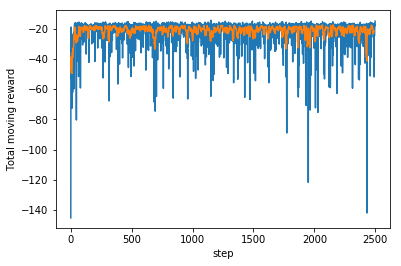

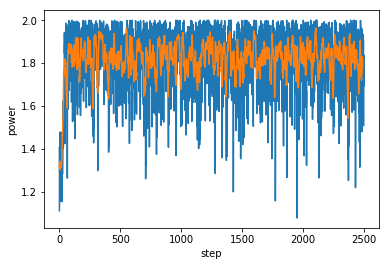

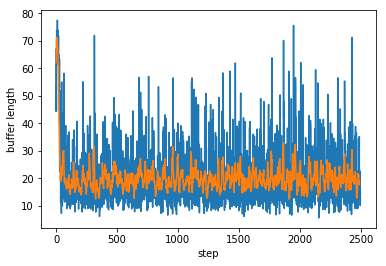

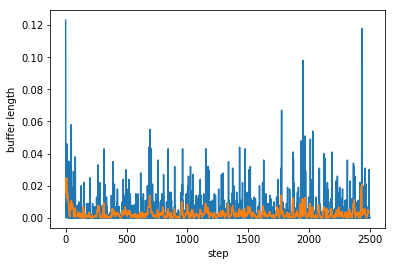

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])